In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay,precision_score
import seaborn as sns

In [2]:
skin_cancer_data = pd.read_csv(r"Classification of benign and malignant dataset\data.csv").drop('id',axis=1)
diag = skin_cancer_data['diagnosis'].unique()
print(diag)
skin_cancer_data.head()
skin_cancer_data.info()

['malignant' 'benign ']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   diagnosis                               569 non-null    object 
 1   radius_malignantean                     569 non-null    float64
 2   texture_malignantean                    569 non-null    float64
 3   perimalignanteter_malignantean          569 non-null    float64
 4   area_malignantean                       569 non-null    float64
 5   smalignantoothness_malignantean         569 non-null    float64
 6   comalignantpactness_malignantean        569 non-null    float64
 7   concavity_malignantean                  569 non-null    float64
 8   concave points_malignantean             569 non-null    float64
 9   symalignantmalignantetry_malignantean   569 non-null    float64
 10  fractal_dimalignantension_malignantean

In [3]:
skin_cancer_data['diagnosis'] = skin_cancer_data['diagnosis'].replace({"malignant":0,"benign ":1})
X = skin_cancer_data.iloc[:,1:]
Y = skin_cancer_data.iloc[:,0]

In [4]:
#Data Splliting
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,random_state=30,test_size=1/4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

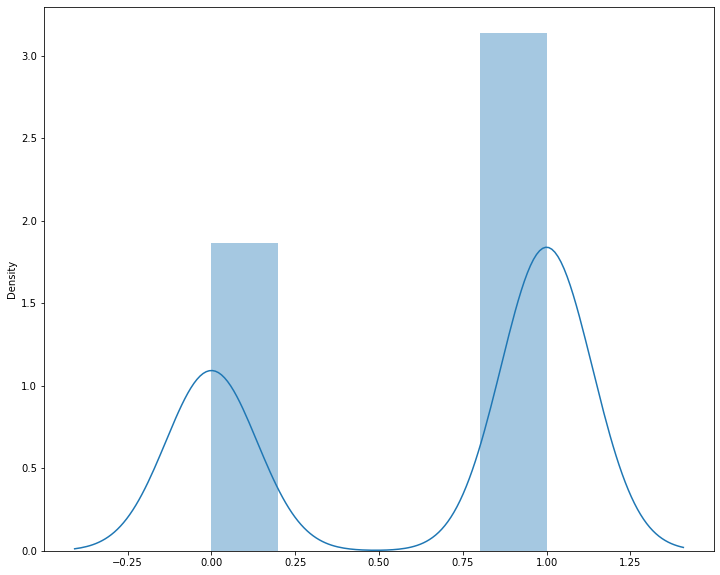

In [5]:
fig = plt.subplots(figsize=(12,10))
sns.distplot(skin_cancer_data,x=skin_cancer_data.iloc[:,0])

<AxesSubplot:xlabel='diagnosis', ylabel='radius_malignantean'>

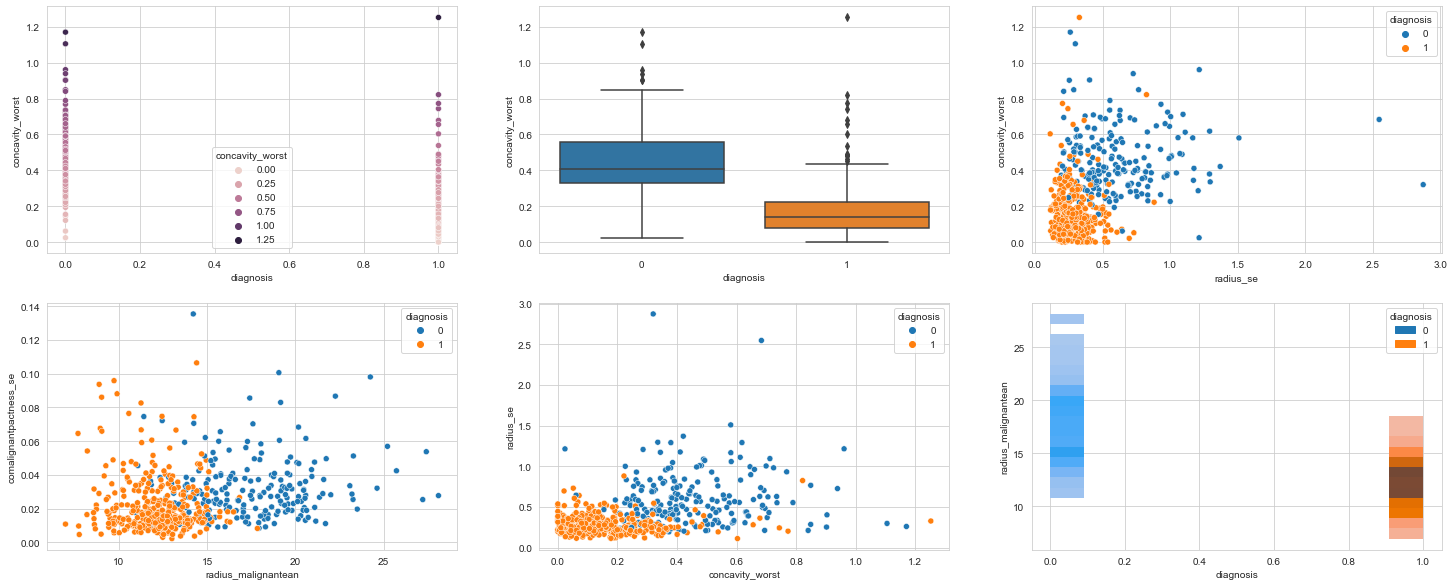

In [6]:
# Raw Data Virtualization 
sns.set_style(style='whitegrid')
figure, axs = plt.subplots(2,3,figsize=(25,10))
sns.scatterplot(x=skin_cancer_data.iloc[:,0],y=skin_cancer_data['concavity_worst'],ax=axs[0,0],hue=skin_cancer_data['concavity_worst'])
sns.boxplot(x=skin_cancer_data.iloc[:,0],y=skin_cancer_data['concavity_worst'],ax=axs[0,1])
sns.scatterplot(x=skin_cancer_data['radius_se'],y=skin_cancer_data['concavity_worst'],ax=axs[0,2],hue=skin_cancer_data.iloc[:,0])
sns.scatterplot(data=skin_cancer_data,x=skin_cancer_data.iloc[:,1],y=skin_cancer_data.iloc[:,16],ax=axs[1,0],hue=skin_cancer_data.iloc[:,0])
sns.scatterplot(x=skin_cancer_data['concavity_worst'],y=skin_cancer_data['radius_se'],ax=axs[1,1],hue=skin_cancer_data.iloc[:,0])
sns.histplot(x=skin_cancer_data.iloc[:,0],y=skin_cancer_data['radius_malignantean'],ax=axs[1,2],hue=skin_cancer_data.iloc[:,0])

In [7]:
# Using SVM algorithmdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABa4AAAJKCAYAAADEEdIRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdd3iUVfbA8e/0mUwmbdJ7SEjoTapgoQmi2AtYYO1lLYvr6uru2n6uurprX/vqgqKIrgUsUUBFRaVJN3QCCQkpkzrJZPrvj8CEYQKEkGRSzud59lnmzvu+c3KRnJkz9z1X4fV6vQghhBBCCCGEEEIIIYQQnYQy2AEIIYQQQgghhBBCCCGEEIeTwrUQQgghhBBCCCGEEEKITkUK10IIIYQQQgghhBBCCCE6FSlcCyGEEEIIIYQQQgghhOhUpHAthBBCCCGEEEIIIYQQolNRBzuAk7F+/Xp0Ot1JX8dut7fJdXoCmauWk7lqGZmnlpO5apm2nCe73c6QIUPa5Fo9WVvlayGEEKI5kq/bxpH5Wt57+pP5aCJz4U/mo4nMhT+ZjyaH5uJEc3aXLlzrdDr69u170tfJy8trk+v0BDJXLSdz1TIyTy0nc9UybTlPeXl5bXKdnq6t8rUQQgjRHMnXbePIfC3vPf3JfDSRufAn89FE5sKfzEeTQ3NxojlbWoUIIYQQQgghhBBCCCGE6FSkcC2EEEIIIYQQQgghhBCiU5HCtRBCCCGEEEIIIYQQQohOpUv3uBZCCCGEEEIIIYQQQojuwOl0UlhYSENDQ7BDOSl6vZ7k5GQ0Gs1JXUcK10IIIYQQQgghhBBCCBFkhYWFmEwm0tPTUSgUwQ6nVbxeLxaLhcLCQjIyMk7qWtIqRAghhBBCCCGOw2KxcMcdd2CxWIIdihBCCCG6qYaGBsxmc5ctWgMoFArMZnObrBqXwrUQQohuwVbfwJaNWyncc4A9u/bh9XqDHZIQQohuZO7cuWzatIl58+YFOxQhxOEaqqFgJexcBpX5wY5GCCFOWlcuWh/SVj+DtAoRQgjR5dVZ63nr1fd47fnGYoJer+P5/zzG6HHDgxyZEEKI7sBisZCbm4vX6yU3N5dZs2ZhNpuDHZYQwloKSx6ADe81PjZEwlX/g6RTghuXEEKINiErroUQQnR5O7bu9hWtARoa7Pzt7icoKykPYlRCCCG6i7lz5+LxeABwu92y6lqIzqJoXVPRGsBWCUseBLs1eDEJIUQ7sdvtTJgwgb///e8UFRV1+OvPmTMHh8PRoa8phWshhBBdXnMF6pLiMqqraoMQjRBCiO5m6dKluFwuAFwuF0uWLAlyREIIAGqaKdzsX9vYPkQIIbqpv/zlLyQmJnb46z7zzDNotdoOfU1pFSKEEKLLS0xJCBjLys4gOiYqCNEIIYTobiZNmsQXX3yBy+VCrVYzefLkYIckhACIzAgcy5oEIdLKRwjRPdTV1XH33XdTU1NDamoqAFdffTUPPfQQRqORhx56CLvdTllZGX/4wx+YNGkS3377Lc8//zyhoaGEh4eTk5PDyJEjef3119FoNBQWFjJt2jRuueUWCgsLuf/++3G73SgUCv7617/Sp08f7rvvPvbu3UtDQwOzZs3iggsuYMKECXz55ZcsX76c119/HbVaTWxsLM888wxKZfusjZYV10IIIbq8rJwMHn7yXvR6HQDxibE8/NS9RESFBzkyIYQQ3cHs2bN9H8hUKhWzZs0KckRCCACShsKEv4Ly4Jq82AEw/n7Q6IMblxBCtJEFCxaQnZ3N/PnzmTFjht9zu3fv5pprruGtt97ikUceYf78+bjdbh599FFef/113n77bXQ6ne/4oqIiXnjhBd5//33eeOMNAJ588klmzZrF/Pnz+ctf/sL999+P1Wpl9erVvPjii7zxxhuoVCq/1/3ss8+47rrreO+99xg/fjxWa/u1Z5IV10IIIbo8nU7LBZedzbCRg9hfWETv7F7ExEUHOywhhBDdhNlsZurUqSxevJipU6fKxoxCdBb6cBj7B+gzHZz1EJkOIXLHnRCi+8jPz+eMM84AYPDgwajVTaXcmJgYXn75ZT788EMUCgUul4uKigpCQ0OJjm78PDx8+HDKyxtba2ZnZ6NWq1Gr1ej1jV/w7dq1ixEjRgDQt29fDhw4QGhoKPfffz9/+9vfsFqtnHfeeX4x3Xfffbz66qu888479OrVi0mTJrXbzy8rroUQQnQLCoWCtIxkIqNNUrQWQgjR5mbPns3AgQNltbUQnY1KA7F9IGmYFK2FEN1OZmYm69evB+C3337z7bkB8Nxzz3H++efz1FNPMWrUKLxeL2azmbq6OioqKgDYsGGD73iFQtHs9desWQNAXl4e0dHRlJaWsmXLFv7973/z2muv8dRTT/m97vvvv8/tt9/OO++8A9Cue3/IimshhBBCCCGEOA6z2czzzz8f7DCEEEII0YPMnDmTe+65h5kzZ9KrVy80Go3vualTp/Lkk0/y2muvER8fT2VlJUqlkr/97W/ccMMNmEwmPB4PaWlpR73+Pffcw9/+9jfefPNNXC4Xf//734mJiaGsrIwZM2agVCq59tpr/VZ6Dxo0iJtuugmj0UhISAhnnnlmu/38UrgWQgghhBBCCCGEEEKITkan0/Hcc881+1xmZibnnntuwPjWrVt577330Gq13H333SQkJDBq1ChGjRrlO2bFihUAJCcn89ZbbwVc45FHHgkY++abbwCYMGECEyZMaNXPc6I6vFXIhg0buPrqqwPGP/vsMy699FJmzJjBAw88gMfj6ejQhBBCCHGQ5GshhBCia5CcLYQQ4nBGo5HLLruMGTNm4PV6mTZtWrBDarUOXXH9+uuvs2jRIgwGg994Q0MDzz77LIsXL8ZgMHDXXXfx7bffMnHixI4MTwghhBBIvhZCCCG6CsnZQgghjnTVVVdx1VVXBTuMNtGhK65TU1N54YUXAsa1Wi0LFizwJVuXy4VOp+vI0IQQQghxkORrIYQQomuQnC2EEKI769AV11OmTKGwsDBgXKlUEh0dDcDbb79NfX09Y8eOPe717HY7eXl5Jx1XQ0NDm1ynJ5C5ajmZq5aReWo5mauWkXk6eZ01XwshhBDCX1vm7CPztbyn8ifz0UTmwp/MRxOZC3+tmQ+n04nNZmuniDqW0+n0/fyt/W+j02zO6PF4eOqpp9izZw8vvPACCoXiuOfodDr69u170q+9fft2srOzT/o6PUFeXl6bzHlPIHPVMjJPLSdz1TJtOU/ypitQMPO1aFsWi4WHH36YBx98ELPZHOxwhBCi1SRfN+9Ec/aR+Vree/qT+Wgic+FP5qOJzIW/1sxHXl5eQPunrkqj0fh+/kNzcaI5u9MUrh944AG0Wi0vvfQSSmXHdDApLixh06955O/aR8WBWvoPycEUFtohry2EEEJ0RcHI16J9zJ07l02bNjFv3jzmzJkT7HCEEEK0se6Qs7eX1LJqTwU1NicjM6IYlByBVt01fxYhhBAnLqiF68WLF1NfX8+AAQP48MMPGT58OLNnzwZg1qxZTJ48ud1eu7y0gofu+ie/bdh2cORDbr3nGmZce0GLVo8JIYQQPUUw87VoHxaLhdzcXLxeL7m5ucyaNUtWXQshRDfQnXL29pJaLn/1ZyrrnQAoFDD3mpGcnh0T5MiEEKJn8Xg8PPTQQ2zbtg2tVsujjz5KWlpah7x2hxeuk5OTWbhwIQDTp0/3jW/durVD49i9Pf+wonWj/zw/n9MnjyYpNaFDYxFCCCE6m86Sr0X7mDt3Lh6PBwC32y2rroUQogvrrjl71Z4KX9EawOuF55Zt55S0SIy6TnPzuBBCdCqfrNvPU19to6jKRmKEgT9NyeGCoUkndc2lS5ficDh4//33Wb9+PU888QQvv/xyG0V8bD32Hht7gyNgzGF34nS6ghCNEEIIIUTHWbp0KS5X43sel8vFkiVLghyREEII4a/G5gwYs1gduNyeIEQjhBCd3yfr9nPfR5vYX2XDC+yvsnHfR5v4ZN3+k7ru2rVrOe200wAYMmQImzdvboNoW6bHFq7TM1Mwhob4jZ055VTiE2ODFJEQQgghRMeYNGkSanXjajW1Wt2lbh0XQgjRM4zMiOLILp7XjcsgPEQbnICEEKKTe+qrbdicbr8xm9PNU19tO8oZLWO1WgkNbdoTUKVS+RbBtLceW7hOyUjimf/+H+MmjiIuMYYrb7iYm/44C71BF+zQhBBCCCHa1ezZs30bdalUKmbNmhXkiIQQQgh/g5Ij+O/vRjA0JYJ0cwj/d35/zh4obT2FEOJoiqpsJzTeUqGhodTV1fkeezwe3yKY9tajG0P1Hdibh575E/m788nu01s2ZRRCCCFEj2A2m5k6dSqLFy9m6tSpsjGjEEKITkerVnJGTizD06JwejxEyEprIYQ4psQIA/ubKVInRhhO6rrDhg3j22+/Zdq0aaxfv57s7OyTut6J6NGFawCdTosHtxSthRBCCNGjzJ49m/z8fFltLYQQolMz6nt82UIIIVrkT1NyuO+jTX7tQgwaFX+aknNS1508eTIrVqxgxowZeL1eHnvssZMNtcUkAwghhBBC9EBms5nnn38+2GEIIYQQQggh2sAFQ5OAxl7XRVU2EiMM/GlKjm+8tZRKJY888khbhHjCpHAthBBCCCGEEEIIIYQQXdwFQ5NOulDdmfTYzRmFEEIIIYQQQgghhBBCdE49vnBtq7eh9KpwOV3BDkUIIYQQosNYLBbuuOMOLBZLsEMRQgghTkh1vYPSmga8Xm+wQxFCCNGOenThOm/9dh76/VM8cONTvPLEXPbvLQ52SEIIIYQQHWLu3Lls2rSJefPmBTsUIYQQokUcLg/fbivlsld/ZupzP/Ds0h0UVdmCHZYQQoh20mML1wV79vPXmx9ny69bqautI/fDZbzxz3dosDUEOzQhhBBCiHZlsVjIzc3F6/WSm5srq66FEEJ0CZuLqrn2v6vZVmKlos7Bc8t2sHBNgay8FkKIbqrHFq4L9xRht9n9xlZ/v47SovIgRSSEEEII0THmzp2Lx+MBwO12y6prIYQQXcLm/dUcWaN+++e9lNXamz9BCCFEl9ZjC9f6EH3AmCFEj1anDUI0QgghhBAdZ+nSpbhcjft7uFwulixZEuSIhBBCiOML12sCxmJMWnQaVRCiEUKInmXDhg1cffXVHfqaPbZwnd47hcEj+/uNzb5zBnFJMUGKSAghhBCiY0yaNAm1Wg2AWq1m8uTJQY5ICCGEOL4hKRGkRhl8j5UK+PPZfQk3BBa0hRCiR9q4EJ4ZAA9FNP7/xoVtctnXX3+dv/71r9jtHXuHi7pDX60TiTRHMOfRW9i+ZRcHCkrI6teLrH4ZKBSKYIcmhBBCCNGuZs+eTW5uLgAqlYpZs2YFOSIhhBDi+NKijbx97Sg2FFZRbXPSPymcgUnhwQ5LCCE6h40LYfEd4Dy4aW11QeNjgEGXndSlU1NTeeGFF7jnnntOMsgT02ML1wDRcVFEx0WxdetW+vTpE+xwhBBCCCE6hNlsZurUqSxevJipU6diNpuDHZIQQgjRImnRRtKijcEOQwghOp9ljzQVrQ9x2hrHT7JwPWXKFAoLC0/qGq3RowvXh8gOxEIIIYToaWbPnk1+fr6sthZCCCGEEKI7qD5KYflo412AFK6FEEIIIXogs9nM888/H+wwhBBCCCGEEG0hPLmxPUhz411Uj92cUQghhBBCCCGEEEIIIbqFiQ+AxuA/pjE0jndRUrgWQgghhBBCCCGEEEKIrmzQZTD9eQhPARSN/z/9+ZPub31IcnIyCxcubJNrtZS0ChFCCCGEEEIIIYQQQoiubtBlbVao7gxkxbUQQgghhBBCCCGEEEKITkUK10IIIYQQQgghhBBCCNEJeL3eYIdw0trqZ5DCtRBCCCGEEEIIIYQQQgSZXq/HYrF06eK11+vFYrGg1+tP+lrS41oIIYQQQgghhBBCCCGCLDk5mcLCQsrKyoIdyknR6/UkJyef9HWkcC2EEEIIIYQQQgghhBBBptFoyMjICHYYnYa0ChFCCCGEEEIIIYQQQgjRqUjhWgghhBBCCCGEEEIIIUSn0uGF6w0bNnD11VcHjH/zzTdcfPHFXH755SxcuLCjwxJCCCHEYSRfCyGEEF2D5GwhhBDdVYf2uH799ddZtGgRBoPBb9zpdPL444/z4YcfYjAYmDlzJhMmTCA6OrojwxNCCCEEkq+FEEKIrkJythBCiO6sQ1dcp6am8sILLwSM79q1i9TUVMLDw9FqtZxyyimsXr26I0MTQgghxEGSr4UQQoiuQXK2EEKI7qxDV1xPmTKFwsLCgHGr1YrJZPI9NhqNWK3W417PbreTl5d30nE1NDS0yXV6ApmrlpO5ahmZp5aTuWoZmaeT11nztRBCCCH8tWXOPjJfy3sqfzIfTWQu/Ml8NJG58Cfz0aS1c9GhheujCQ0Npa6uzve4rq7OL8kejU6no2/fvif9+nl5eW1ynZ5A5qrlZK5aRuap5WSuWqYt50neZPgLdr4WQgghmiP5OlBrcvaR+Vree/qT+Wgic+FP5qOJzIU/mY8mh+biRHN2h2/O2JzMzEz27t1LVVUVDoeDNWvWMHTo0GCHJYQQQojDSL4WQgghugbJ2UIIIbqDoK64Xrx4MfX19Vx++eX8+c9/5rrrrsPr9XLxxRcTFxfXITFUlVejdKqw1dkwGA3HP0EIIYToYTpDvhZtz2Kx8PDDD/Pggw9iNpuDHY4QQog2IDlbdDder5eCShsut4fkSANatSrYIQkhOlCHF66Tk5NZuHAhANOnT/eNT5gwgQkTJnRYHB63hy0r85j/1AKqLTVkDsxg5l2XkZSZ2GExCCGEEJ1VZ8nXov3MnTuXTZs2MW/ePObMmRPscIQQQrSS5GzRXVXVO1i4uoBnlu7A4fZw6SnJ3D4hi6TIkGCHJoToIJ2iVUgwFO0p5pW/vEG1pQaAXZv28M6TC6i32oIcmRBCCCFE+7JYLOTm5uL1esnNzcVisQQ7JCGEEEIIP7/ureSxL7dic7pxe7wsWF3Ap+uLgh2WEKID9djCddn+cjxuj99Yft5eqsqqghOQEEIIIUQHmTt3Lh5P4/sgt9vNvHnzghyREEIIIYS/n3YHfrH+v1/3U2tzBiEaIUQw9NjCtTHciCkilAmXnMG0WWcxfOIwwsxh6EP0wQ5NCCGEEKJdLV26FJfLBYDL5WLJkiVBjkgIIYQQh3O6Pewus7Kz1Ird5Q52OEHRK9oYMNY/MQy9RvpcC9FT9NjCdWJ6PNOvnca6ZetYOn8ZZXtL+N39VxEVFxns0IQQQggh2tWkSZNQKBQAKBQKJk+eHOSIhBBCCHFIea2dZ5ZsZ8qz33PWM8t54NPNFFX1vLamp2ZGkx0X6nscpldzw2kZaNQ9tpQlRI/T4ZszdhZVZdX874WP8Hq8ABTvOcBnr39GWp8UQkzS6F8IIYQQ3dd5553HokWLAPB6vX6beQkhhBAiuH7ebeGl73b5Hr+/upDsuDCuG5cRxKg6Xnq0kf9eM5K84hqcbg/ZcSZ6xYQe/0QhRLfRY7+mKi8q9xWtDyncsZ/q8uogRSSEEEII0TEWLVrkt+J68eLFQY5ICCGEEId8u600YOzT9ftx9MCWIYkRBib2jWPqgAQpWgvRA/XYwrUpMvAXnikyFH2oIQjRCCGEEEJ0nKVLl+L1Nn6B7/V6pce1EEII0Yn0TwwPGBuWGolG1WNLOEKIHqrH/tZLyEhg3AVjfY+VSiWX//EyImMigheUEEIIIUQHmDRpEmp1Y8c4tVotPa6FEEKITmRCTgxZh60ujjHpmDEixXe3lBBC9BQ9tsd1iCmEc649m2Hjh2IprSApI5H49LhghyWEEEII0e5mz57Nl19+CTS2Cpk1a1aQIxJCCCE6hsfjRans3AXgjJhQ3r5uJNtKanF7vGTHmUiJkr24hBA9T48tXANUlVRRVlBKXVUd5VoNIaEGIuMigx2WEEIIIUS7MpvN6HQ6nE4nOp0Os9kc7JCEEEIIPwUV9WzeX029001OnIl+CWEnVXDeVWpl0YYiVuws5+yBCUzpH0dyZOctBidEGEiIkFamQoierccWrkv3lbL4tcXsWte0U+85N5zD2AvHotb02GkRQgghRA+wc+dOrFYrAFarlZ07d5KVlRXkqIQQQohG+ZY6rntrNbvK6wDQqBS8fe0oRme27ovWkpoGbn5nLTtKG3Pfmr2VrM6v4F+XDsaok8//QgjRWfXYHtcH8g/4Fa0Blr27jJK9JUGKSAghhBCiYzz66KPHfCyEEEIE07q9lb6iNYDT7eWfX2+jrsHVquvtKrX6itaH5G4+QL6l7ihnCCGE6Ax6bOHabrMHjDXUNeByti4RCiGEEEJ0Ffn5+cd8LIQQQgRTuTXw83pBZT02p7tV1zvapoadvNW1EEL0eD22cB2fHh/QEqTXoF7EJscGKSIhhBBCiI6Rnp5+zMdCCCFEMA1OiQgYmzkyFXOotlXXy4oNZWBSuN/YRcOSSDeHtup6QgghOkaPLVwnZycz+5HZxGfEo1QpGTB2ANNvmY7BJJsfCCGEEKJ7++tf/3rMx0IIIUQwDUqO4MUrhhIfpkevUXLDab249JSUo66cPp4Yk44XZg7lb+f05ax+cfzj4oHcfVYOBq2qjSMXQgjRlnrsLgQKhYKc4TmkZKdQVlJGYmoiGp0m2GEJIYQQQrS7rKws0tPTyc/PJz09XTZmFEII0anoNSrOHZTI6AwzdreH+DA9qpPs65EebeS603px3Wm92ihKIYQQ7a3Hrrg+JCQshHpXvRSthRBCCNGj/PWvf8VoNMpqayGEEJ1WtElHUoThpIvWQgghuqYeu+JaCCGEEKIny8rK4vPPPw92GEIIIYQQQgjRrB6/4rqmvBqj0oi9PnDXYiGEEEIIIYQQQnQOdpeboiobtTZnsEMJGmuDk8LKeursrmCHIoQQ7a7Hrrj2er3sWLWNZf9dgmV/OZnDszn98jNIykkOdmhCCCGEEEIIIYQ4zI7SWp5buoMlv5XQJ97EX8/tx4j0qGCH1aE2FFTxf5//xq97KxnTy8xfzulLv8TwYIclhBDtpseuuC7cWsCGb9bT//SBjL3kNJJzkln56c9YK63BDk0IIYQQQgghhOgR6h0uft1byeINRazaU9Hsaupam5P7P9rMZxuLsbs8bCisZvabq9hV1nM+v++vtHHd3NWsya/E44UVuyzc+PZaSmsagh2aEEK0mx674rquug63y83y+csaBxQKxl81keqyKkIjQ4MbnBBCCCG6tK+++oovvvgi2GEcU2VlJQCRkZFBjuTYpk2bxpQpU4IdhhBCiHbgcnv4YE0BDy76zTd22/gsfj8+E4O2qVxRWGVjdX6F37n1Dje7y+rIjOkZn9/3Wuootzr8xgorbeyrqCc2TB+kqIQQon312BXXXreHHSu3Hjbg5ZdPf0IpuxULIYQQogewWCxYLJZghyGEEKIHy7fU8/fPt/qNvfjtTnaW1vmNhWhVGDSqgPNN+p6zFq+5n1WlVBCq6zlzIIToeXrsbzi30x0wZqupR6XpsVMihBBdXk15NVqXmgarDX2oIdjhiB5sypQpnX6V8J133gnAc889F+RIhOgaLBYLDz/8MA8++CBmsznY4QjRLdTYnDjcnoDxKpv/yuLUqBDum9aHBz7d4hubOiCOnLiesdoaIDMmlGvHZvDmij2+sdsnZJERbfQ/sHo/NFSDKQFCOvddVUIIcTw9tkobkxaLUqXEc1iSTMpJISw6LIhRCSGEaA23y83O1dvJfXkx9dV1xPdOYtrvzyMuIz7YoQkhhOgm5s6dy6ZNm5g3bx5z5swJdjhCdAtJkQYSwvUUVzf1aQ7VqUmJCvE7TqFQcPGwZHLiTOwpryPGpGNgUjiRRl1Hhxw0ITo1t0/MYkKfGIqrG0iKMDAgKQzdoZXobhfs+AoW3wl1ZZAwGM77NyQMDG7gQghxEnpsq5CY1Fgu+9sVmMyNheq0Aemce/t56I2yQk8IIbqa8n2lfPzk+9RXN95WemDHfr789yIa6mSzGiGEECfPYrGQm5uL1+slNzdX2uwI0UbiwvS8ctUp9Eto/FzeKzqE/8weTrrZGHCsUadmVC8zM0amMrFvXI/s6xwZomVc7xguHZ7CqVnRhBm0TU+W5cHCqxuL1gDFG+DTW6C+MjjBCiFEG+ixK66VKiW9h+dw/TM3U1pcSlJGMrqQnvNtrRBCdCcVxRV4PV6/seId+6m11KA39rwPNUIIIdrW3Llz8Xga79R0u92y6lqINjQ4JYJ3bxiFpc5BhEGDOVQ+l7dKxR7wHNES9cAmqC2SliFCiC6rx664PiQ0yoRd6ZCitRBCdGHG8MBVOSHhRnRStBZCCNEGli5disvlAsDlcrFkyZIgRyRE9xIRoiUzJlSK1ifDGB04FmIGfXjHxyKEEG2kwwrXHo+HBx54gMsvv5yrr76avXv3+j3/5ptvctFFF3HxxRfLG0EhhBAnJDY9jiFThvseK5RKzv79dMLMsm9Ba0jOFkIIf5MmTUKtbrxZVa1WM3ny5CBHJITka3GEuP4w4oamxwolnPsshCcHLSQhhDhZrS5cv/TSS36P//Wvfx3z+KVLl+JwOHj//ff54x//yBNPPOF7rqamhnnz5rFgwQLefPNNHnvssdaGdUKcDielew7grXJTWVzRIa8phBCi7elDDYyfNYkrH7uGs+88n2v+dRNZw7ODHVancKL5GjpnzhZCiGCaPXs2SmXjRyeVSsWsWbOCHJHojrrDZ+yeprjKxk+7yllfUIm1wRncYPThMOFvcM2XcOk8uPF7yDk7uDEJIcRJOuEe1x988AEffvghu3bt4vvvvwca+7y5XC7++Mc/HvW8tWvXctpppwEwZMgQNm/e7HvOYDCQmJiIzWbDZrOhUChONKwT5rDZWfflan6c/w14QWvQcv6fLyd1YEa7v7YQQoi2pw81kNo/nTqljbhe8cEOJ+ham6+h8+VsIYQINrPZzNSpU1m8eDFTp07FbDYHOyTRjXSXz9g9zZb91Vw7dzUlNXYALhuezJ+m5BBjCmKrOkM4pJ0avNcXQog2dsKF6/PPP58xY8bw6quvcvPNNwOgVCqP++bNarUSGhrqe6xSqXC5XL5b7hISEjjnnHNwu93cdNNNLYrFbreTl5d3oj8CAGqbkh/f+cb32GFzkPvCp5x19/nY3A2tumZP0NDQ0Oo572lkrlpG5qnlZK5aRuapUWvzNbR9zj6ZfC3aT319PYD83QjRQgMGDODrr79mwIAB8u9GtKnO8hn7yHwt76n8HT4fKq2ef31f6itaAyxcU8jpmRFk6uuDFWKHkf82/Ml8NJG58Cfz0aS1c3HChWutVktycjL33XcfNTU1qNVq3n//fS644AKSkpKOel5oaCh1dXW+xx6Px5dQv//+e0pLS1m2bBkA1113HcOGDWPQoEHHjEWn09G3b98T/REA2P7zbwFjteU1GPVG0lNl1fXR5OXltXrOexqZq5aReWo5matjczQ4qCwsx1LhJC4mhsgk80mvLurKbzJam6+h7XP2yeRr0X5CQkIA5O9GiBb68ssvsdvtbN68WXpcdzJdOV9D5/mMfWS+7pD3nvY6KN8GdRaITIPo3tBJV4cfPh8lNQ2s2bc94JjSOg/nDu3+eVU+l/iT+Wgic+FP5qPJobk40Zzd6h7Xd9xxB5s3b+bJJ59Eo9HwwAMPHPP4YcOG+W57Wr9+PdnZTb1Hw8PD0ev1aLVadDodJpOJmpqa1obWIqbowJ11IxOiMIYb2/V1hRBCtD1HvZ01H69gwX1vsuTZRbx37xvs27gn2GF1Ciear6Hz5WwhhAg2i8VCbm4uXq+X3NxcLBZLsEMS3VBX/4x9wuy1sOIZeH08vHsJvHY67Po22FG1SESIhtN7xwSM94rpmvUEj8fLlqJqPvq1kC83FVNQ0f1XjQshuoZWF64bGhqYOHEiBw4c4MYbb8Ttdh/z+MmTJ6PVapkxYwaPP/449913H2+99RbLli1j+PDhDBw4kMsuu4zLL7+c9PR0xo4d29rQWiQ0OoyxM89EpVEBEBJh5PTfTSZECtdCCNHllO8rZfVHK3yPXQ4XS1/+jLpKaxCj6hxONF9D58vZQggRbHPnzsXj8QCNvYfnzZsX5IhEd9TVP2OfsJIt8P1TTY+dNlj0e6g5ELyYWkinVnH7hN70jmts1aJUwE2n92JwckRwA2ulVfkVXPDvFdy1cAO3zP+V2W+uIt9Sd/wThRCinZ1wq5BDnE4nc+fOpX///uzcuRObzXbM45VKJY888ojfWGZmpu/Pd9xxB3fccUdrwzlhVYXlbP1+EyMuOBW84Gxw8N0bucSmxREWG9FhcQghhDh5dZW1AWNWSw222nqMkaHNnNFznGi+hs6Xs4UQItiWLl2Ky+UCwOVysWTJEubMmRPkqER309U/Y5+w2mYK1DVFYKuAsM6/0XZOvIkFN4xmb0U9IRoVGTFGdGpVsMM6YXV2F08v2Y7T7fWN7S6v49e9laSbZWGfECK4Wr3i+t5776W0tJRbbrmFX375hb/85S9tGVe7s9fbqT5QyZqPVrDm4xVs+HI1dRW1OO3OYIcmhBDiBIXFRgaMmVNienzRGrp+vhZCiM5g0qRJvt7BarVaelyLdtHjcnZkWuBYTF8Ijev4WFrJHKpjWGokfRLCumTRGqDB6W62NUhprb2Zo4UQomO1unA9f/587rnnHsLCwrjqqquOu5FiZxOZaPa1CTkkZUA6JnNYkCISQgjRWubUGCbfOh21TgOAKSacSbdOx2AKCXJkwdfV87UQQnQGs2fPRqls/OikVCqZNWtWkCMS3VGPy9kx/eCCl0Fz8P1aRCpc8G8wmsFuhdI8qMwHr/eYlxEnJ8qo5fIRKQHjQ1IiOj4YIYQ4QqtbhTgcDrZu3UpGRgaKg7v+arXaNgusvUUlR3PBX2ayYv43NFgbiO0Vz6hLT0cbogt2aEIIIU6QQqEgJCKE4eePweP2oFKpUGu65qqXttbV87UQQnQGZrOZxMRE8vPzSUxMxGw2Bzsk0Q31uJyt0cHgmZAyCmxVEJECobFQvgO+vBd2LQNtKEx+BAZdDjq5k649KBQKLj0lhTq7m3k/5xMRouEv5/RlSEp4sEMTQojWF67z8/O59dZbfY8VCgXLli1rk6A6gkKhwGAKoc+4AVQUlJE0IB2dFK2FEKJLqigo44snP8R72Iqcvet2Mv0vM9Eb9UGMLPi6er4WQojOwGKxsH//fgCKioqwWCxSvBZtrkfmbIUCzE19uXE54IenG4vWAA4rfH4XxORA+rjgxHgUJTU2ftldwcrdFQxJjeDUTDPJkc3f7beztJatB2pRKRX0SwgjrZP1jk6KNPDns/vwu1PT0KqVxJh69vtnIUTn0erC9eLFi4HGN3ERERGoVF1rZVtVsYWvn/+Yqv0VAGz9biNDzxvNyMvP8N0GKIQQomuoLqn0K1oDlO4upq6itscXrrt6vhZCiM5g7ty5vjzj8XiYN2+ebM4o2pzkbKCuDPIWBY6XbetUhet6h4unv97B+2sKAHh31T7GZZl5fuYwooz+q+Q37a/mitd+odbeuMFrfLiOt68dRe84U4fHfSwqpYKkoxTehRAiWFpdoV25ciUTJ07kuuuuY/LkyaxYsaIt42p35fklvqL1IRu/XI1lX2mQIhJCCNFahrDAN9kh4UZ0RrmTpqvnayGE6AyWLl2Ky9VYdHK5XCxZsiTIEYnuSHI2oDNBbN/AcVN8x8dyDPnldb6i9SE/7rSws9TqN+bxeHnn53xf0RrgQLWdZVu7Tt2hpKaBzzcV848v8/hsYxEHqm3BDkkI0YO0esX1s88+y7vvvktcXBwlJSXcdtttjB07ti1ja1cuhytgzOPy4HG6gxCNEEKIk2FOjaX/pKFsWboOAIVSwRk3nE1olGy429XztRBCdAaTJk3iiy++wOVyoVarmTx5crBDEt2Q5GxAHwZnPQpvXwjO+saxzEmQOCy4cR3B5Wl+w0iX23PEcR7yDtQGHLerzBow1hlZ7S7++dU2Plhb6Bu7YEgiN4+IDGJUQoiepNWFa5VKRVxcHABxcXHodF1rVVtYbAR6k4FQcxim6HBKdhURn5OMzmQIdmhCCCFOkD7UwOiZ48ke25/K0gri0hOISo4JdlidQlfP10II0RnMnj2b3NxcoPH36qxZs4IckeiOJGcflDoabvyucZNGnQni+oGxfd7XOV0eHG4PRt2JlUbSzUbG9Iri591Nd3H3ijaSGeu/gaRWreLy4SlsLKz2G5/cN671QXegPeV1fkVrgE/WF3Hp4Jb/fewps7K91IpWpaRPvImECKm5CCFartWF69DQUN5++21GjBjB6tWrCQ/vWjvOulxOpsy5iJqSShpqbWSN6Ys+zIj3iG9IhRBCdA16o57EvqlUU0d0Wtf4MNARunq+FkKIzsBsNjN16lQWL17M1KlTZWNG0S4kZx8mJqfxf+3o172VvPb9bvItdVwxKpUp/eOJC2vZ3ihhBg2PXzSIj9YV8vWWEsZmRXP5iJRmz5/UN5YwwxB2ltZhc7hJjtQzMiOqrX+cduE4yh3pDnfzK86PtKmwiiv/s5IaW+Md7zlxobx29XDSojvX5pRCiM6r1YXrp556ipdeeolnnnmGXr168dhjj7VlXO1OZ9Czb+1ONn25Go/bg95kYNQV4wmLjwh2aEIIIUSb6er5WgghOovZs2eTn58vq61Fu5Gc3XbsTjdr9lby/up9qFVKLh+ewrC0SDSqxm2+8oprmPn6L9hdjQvXHvh0C1X1Tm6fkIVCoWjRa6RHG5kzKZubTs/EoFGhVAaeV2d38fH6Ip76ahtuj5cYk47XZ51CRIi2mSt2PunRRvrGm3ztTnRqJbNPTceg01BUZSPxGKunXW4Pb/y4x1e0BthWYuWnXRYpXAshWuykCtdnnXUWd999d5fc7bihup4Nn61selxr49ePf2LCbdMhugd/sy2EEKJb6er5WgghOguz2czzzz8f7DBEN9aTc/Y+Sx37q2xEGrX0ijaiVZ/cz796bwVXvbHK9/iTdftZcOMY30rnrcU1vqL1Ia9/v5tLT0kmIcJAYWU9m/dXY3O4yYk30Teh+X1TFArFMduM5BXX8MSXW32Py2rt3PfRJhbcMJrwoxSvrQ1OvIBJr2npj9tuzKE6np85lHk/5/PTbgt/mJjNs0u389r3u4kyanny4kGM7xOLqpmivc3hZvP+moDxnV2kv7cQonNodeH6ggsuYNmyZbz44oukpaVx1llnMXHixLaMrV3ZausDxmpLq3DZAzdtFEIIIbqqrp6vhRBCiJ6ip+bsX3ZbuPHtNdTYXKiUCu6f1ocrRqZi0LauXOH1epm7Yq/fmMcLn6zf7ytcH1p5fTi9VoVapWCvpY7r/rvGV2DVqpS8dc0IYlQqKusd1DvcxIbq0KgDr3Gk/VW2gLG84losdY6AwnWd3cUPO8p44ZuduD1ebjkzkwk5sZgMwS1g944z8eD0/hyobuDK/6xkr6WxllJR5+CW+Wv57PbTyIk3BZxnMmi4cGgi//x6u9/4mF7SakkI0XLH/017FMOGDePaa6/lyiuvJD8/n4cffrgt42p3IRGhmNPjOOXicQw9fwxDpo/GnBaLupXJUQghhOiMunq+FkKIzsJisXDHHXdgsViCHYropnpizi6tbeCPCzf42km4PV7+77M8th1o+1W53sPaMg9ICicuzH/zy3un5BBj0rN2b6XfqmCH28PcFXvYbTdx6Ss/MeGf3/HXTzeRX1533NdMCA9spZEdF0pkM6ut1+RXcvM7v7KlqIatB2q5c8F6ftptwen2UF3vwO1pWV/p9qBWKamyOX1F60Ocbi8FFUefhwuGJnHZ8GSUCtBrlPx5ah+Gp0e2d7hCdFoVdXZW51ewak8FFqs92OF0Ca2u0p533nmoVCqmT5/O//3f/5Gdnd2WcbU7bYiO1MEZbPh0BXhBo9cy7vqzUfawW7KEEKK7cNQ1UFlYjrLCSUVBKRGJ0SibWU3T03T1fC2EEJ3F3Llz2bRpE/PmzWPOnDnBDkd0Qz0xZ1dYHc2uSi6utjGEiFZdU6FQ8ODpJm5N3oVCoWBNfTxP/mzlwqFJvmPSo428c90ofthRTmGljTOyozklvXE1dlltYDFpeEYUt723DtfB4vH7qwuxOz3845JB6I7R1qRfgok5k3rz7LIdeL0QEaLhkfP7E2kMLFx/sn6/32ONSkFlnYO/fryJn3dXMLFPLFeNTiMzNrRV83Kywg0awvRqahr871I3h+qOcgYkR4bwfxcM4OYzMlErFSRHhjTbC1yInmCvpY4/frCBNfmVAAxODufZGUPJkJ7vx9TqwvVNN93EDz/8wPLlyykpKWHcuHGcdtppbRlbu2qoqWfTYT2unQ0OVr37DWfedn4QoxJCCNEa9voG1n30I9u/WQ+AQqngzNvOJ2VoVnAD6wS6er4WQojOwGKxkJubi9frJTc3l1mzZmE2y+3uom31xJwdHaojOdJAYaV/8fpYm/4dV+lWkj69jOSqxnYhg8LTuPCGdwhLifA7rHecid5xgS0uBh9xHIACha9ofciiDUXMmZxNmvnoRadQvYYLhiQSZtBQUeegwenh4UW/8dzMoWQf8drRof7F7BkjUnnx252+uXnrp3zWFVTx1jUjml2x3d5SokJ47KKB3PHeOg5Nxe/HZzU7h4fTqVX0iglOsV2IzmRpXqmvaA2wobCaLzYW8fsJvYMYVefX6qVo55xzDv/3f//H9ddfz2+//cb999/flnG1O0ddQ8BYXUUtboczCNEIIYQ4GVUFZb6iNYDX4+Xn/35NfWVt8ILqJLp6vhZCiM5g7ty5eDyNG7m53W7mzZsX5IhEd9QTc3a0ScfTlw0mIqSxj7NaqeDh8/qRE38Shc4tH6Goaupxrazei3nPF832tW7OkJRwnpsxhBiTDq1KycXDkjBoA1dVm0N1GDTHv2P7h50WHl78Gy98s5PXf9hN3oFaPlhTgNfrXwg/d1Aiek1TjFFGTUBBf31BFXstx29R0l6m9I/ns9vH8dyl/fnfLWO45YxMQo+xOaUQoslPO8sDxr7fUR7wu0D4a/VvmJtvvpmioiLGjRvHnDlzGDp0aFvG1e4MEUa0Rj29RvdFZ9RRVVRBZWEZGv3Rb3MRQgjROTXUBG6421BTj6PeTkjksVeBdHddPV8LIURnsHTpUlyuxtvjXS4XS5YskXYhos311Jw9MsPM4tvGsb/KRpRRS0a0scVF5mYVrAocK2xm7Cj0GjXnD0ki3Wzkqy0HWJZXikalZFByOBsLq33HPXxef2LD9Me93vqCqoCxn3dbsLs86A8rfA9OieDDm0/ll90WXG4vfRMC38MqFKDtoPamTpeHgsp6lAoFKVEhqJQKNCol/RLDUVQX0TctvUPiEKK7ODMnlmVbS/3GJveLQ6GQ9jnH0urC9R/+8Af69OkTMP7iiy9y2223nVRQHcEQbmTkzPFs+OhHGmrqiUqLZdRVkzBG9ewChxBCdEWm2AhishJJGpiBx+XGC5TvLiIkUm5L7Or5WgghOoNJkyaxePFivF4vCoWCyZMnBzsk0Q315JydEhVCSlTIsQ+qLYay7aBUQXQOhMY0f1z/C2H3t4FjJ2hQcjgqZWPbEo1KwaXD4rHYPFTVOcmKDaV/YljAOS63h9+Ka9hRYsWkVzMgMZxxWdF8uLbQ77hpAxL8itaHDEgKZ0BSOADVNidT+sfx1ZYS3/NXjEwlI/o489QGiqttvPrdbt5ZuRelQsFNZ/Ri9qnpRB+jn7UQ4tjG94nhrJ1xfH3w3/SZ2TGc1T8+yFF1fq0uXDeXUAFWrWr5N5nB5PV4WDVvCd6DzZkq9pay8eMfmXDXJUGOTAghxIkymsOIz0lm06KfAVBp1Yy76Ry0IcdfBdPddfV8LYQQncF5553HokWLAPB6vUyfPj3IEYnuSHL2MZRtgwVXgmVH4+PkUXDRqxCVEXhs77Ng5E2w5o3Gx8Ovh6xJJ/ySCoWCAUkRDEiKACAvL49T+vU95jk/7bJwzX9X4z5YZxiYFM7Tlw3iylGpvLtqH14vTO4bx7mDE4/7+uEGDQ9N7885AxPIK65hUHIEw9MjMWjbpjWHzeHG4XIT3ky/7CW/lfDfn/MPPvLywjc7yY4LZfrgpIBjhRAtkxwZwtOXDmbPhHq8Xi/pZiNhBk2ww+r02rwZUVfpzVJbXOkrWh9SsbeU2pJKdL0SghSVEEKI1qg5UMFvuWt8j90OF6vnf4M5PR5DuOzS3Jyukq+FEKIzWLRoEQqFwrfievHixdIqRHQYydnAhveaitYAhSth1zKIuj7w2LAEOOtRGHHwuch0ULf/ZobV9Q4e/fw3X9EaYNP+anaV1fPAuf2YNSYNt8dLmtmIsYV9oRMiDJw3JInzhrRdwdjt8bJ6TwXPLtvOgeoGZp+azjkDE3xtT1xuD5+s2x9w3ldbSkiJCqGgwoZZZ8LhcqNVd0zbEiG6i1C9hoEH76oQLXMSjaOa11V6s2iNgavwdKEGlC3YXEEIIUTnUl8VuElNfUUtdqutmaMFdJ18LYQQncHSpUt9xUOv18uSJUuCHJHoSXp8znY5YM/ywPF9vxz9HLUWYrIhJpt6j5Jfdlt4d+VevtpygLLahnYJs97hZn9l4HvPqnoHOo2KnPgw+iWGt7ho3V4276/mqv+s5JfdFeRb6nl48W98dFihWq1SMjglIuC81KgQrv3vGm5/bx1Xzt3g18JECCHaS5sXrrsKjUFL2sgc32OFQsHgi8ahPJlNIIQQQgRFaHRgj8HwRDOGMFltLYQQ4uRNmjQJtbqx2KRWq6XHtRAdSa2FPucFjmdObNHpH/1ayIzXfuH+jzdz09tr+cvHmympaSww1zY4WZ1fwdLfSthVaj2p1e0xJh2XnpLiN6ZQQHZc59pHa9P+alxH3H3+nx/2+BX0LxueQnRo0yr11CgDGpWSijoHAF4v/PWTzRRWBm6QLoQQbanHtgppqK7DY3cw+IJTcbvcqDQqdn+/gchkc7BDE0IIcYLCk8yM/t1kVr/7LW6Hi5AoE6OvOQudyRDs0DqtrpKvhRCiM5g9eza5ubkAqFQqZs2aFeSIRE8iORsYcCHs+xl2fAWAZ/CV7I8YwaZNxaSbQ8iOM6FuZhFafrmVx7/Y6jf29W8lXHJKMiMzVDzx5VYWrC4AQK9R8vrVwzkt+yibPh6HWqXk2tMycLg9fLC2gJhQHQ9O78+ApMAFFsEUog28yzzMoEZ72Pz1TQjjo1tOZVtJLUqFAr1Gyew3V/udU21zYm1wtXu8QoierdWF65tuuolLL72U8ePHo1I1/eJ78skn2ySw9uZxuSnenE/x5ny/8SP7XgshhOj81BoNvU4dQExWMhWlZcSlJmKICA12WJ1CV8/XQgjRGZjNZqZOncrixYuZOnUqZrMsdhFtT3L2MUSmw8X/gcrdODwK5m9X8/Ar2wBQKRW8ctUpTO4XF3BaZb2TOoc7YLyizsGavZW+ojVAg9PDA59u5sNbTsUcqmtVmKlRITx8fn9uHZ+JXq0i2tS667SnISkRxJh0lNXafWN/mtInYJPGVLORVHPj3YvbDtRwZMeawcnhJITLRuhCiPbV6r4Y99xzD7/++isXXXQRTz31FPn5+QAkJHSNjQ0NEaEoj9hIICY7GXUb7dArhBCiYymUCsLiI7Fp3FK0PkxXz9dCCNFZzJ49m4EDB8pqa9FuJGcfh94ECYP51Z7Ew1/t8Q27PV7u/2gTB6oD+0snRRgYekS/Zr1GSXKkgeKqwOP3WOopqbEHjJ8IjUpJcmRIpyxaA/SKCeW9G0bx9wsG8IdJvVlw42jOzDn2KvOsWBOvzRpO/MENHE9JjeCJiwcFFLuDqbzWzpLfDvDvb3bwdTv2MhdCdKxWV2kzMzO55557qKio4O9//zvnnnsuI0aM4M4772TIkCFtGGL78OJl5O/O4rcvVlFbXEHi4F70Gtsfj9yGJYQQohvp6vlaCCE6C7PZzPPPPx/sMEQ3Jjm7ZSzWwMJymdVOTYOL+HD/8dgwPfdN68ML3+xkxc5yMmNCueG0XmTHmahvZiX2sNQIwgwnViYpr7Xj9nqJC+scq4+37K9m8cYiCipsXDA0iVEZUYQZNH7HZMWayIptee9tlVLB+JxYFt02ltoGFy6rhZyEE2uBsrvMyuaiGtweD/0SwsiJb7sWKnUOF08v2ca7q5pW0F8+IoW/nduP0CBvhimEODmt/he8fPlyPv74Y3bt2sX555/P/fffj8vl4oYbbmDRokVtGWO7UKBg7y95RKbEkDwkk/KdRVTuKyV5eM7xTxZCCNEpuV0ujFoDXq8XxZH3M/ZQXT1fCyFEZ2GxWHj44Yd58MEHpVWIaBfdJmfbrY279+nbZ1PCdLMRpQIO7/I5JCXiqIXjEelRPHhef8qqG9ColaSbjUSbdPSODeUPk3rz6vLd2JxusmJDuW1CFsmRIS2Kw9rgJHfzAZ76ehsOl4ebz8jk4lOSiW5lm5G2sPVADTNe+4Vae2Pv6c83FfPPSwZxyfCU45zZMrFhemLDIM9ScPyDD7PtQA1XvL4Sy8HNHUO0Kt67YTSDj1gN31q7y+r8itYA768u4MpRqQxKbpvXEEIER6sL14sWLWLmzJmMGjXKb/z2228/6aA6gqOugdK8fX5j1fvLie+fHpyAhBBCnJTKfSVs+2oNNfvLqT0lm/Qx/TBGhx//xG6uq+drIYToLObOncumTZuYN28ec+bMCXY4ohvq8jnbaYNd38LyJ8HdAGPnQM5U0Lft+7HseBP/vnIYf/l4MxV1DgYnh/P4RQMJP2JV8SEKhYKsmFCyYvxbyWXEhHLe4ARy4k3U2Jykm430SWh5sX11fiV3f7jR9/jxL7cSadRyWRsViVtjU2G1r2h9yDNLdzChTyxRQSyoL80r9RWtAeodbub9nM9TSYNRKk9+sUmDM3D1/LHGhRBdR6sL1+Hh4X4J9Z577uHJJ59k8uTJzR7v8Xh46KGH2LZtG1qtlkcffZS0tDTf88uXL+ff//43Xq+X/v378+CDD7brajmPy43RHEbGuIFoQ7TUllSxe8VmvB5Pu72mEEKI9lFbUsmKFz7GaWt8Q7z9q9XUW2oYeuVE1JqefXvgieZr6Hw5Wwghgs1isZCbm4vX6yU3N5dZs2bJqmvR5rr6Z2wKVsKCmU2PP74RLp0L/S9o05fRqJScPSCBwckR1Da4iA/XEW5oXa/lXjEmesW0bmX417+VABAXpuPCoUmoVUosVjt2pxudRnWcs9tHc61P3R4vwW6IutdSFzC2q6wOl8eDVnnyc5VuDqFXdAi7y+v9xtIPbi4phOi6TvjT/Pz583n55Zeprq7m66+/BsDr9ZKVlXXM85YuXYrD4eD9999n/fr1PPHEE7z88ssAWK1WnnrqKebNm0dUVBSvv/46lZWVREVFteJHahljTDiDLzmdsm37sOyoIqpXImOun4bO1LLbgoQQQnQetQcqfEXrQwrXbqPP2SMwxbVfLunMWpuvofPlbCGECLa5c+fiObjAxe12y6pr0aa6y2dstnwSOLbyVehzDqiaXw19MjQqBWW1DewqrUWrVvHZxiJUSgWXjUhhWGokGpWyzV/zcCmRBlKiDMwYkcpL3+6kzuHGbNQyOCWCUzOj2/W1j2ZgUjgGjQrbYSuNb5+YhTmIq60Bzuofz8I1hX5jM0emoFW3TYE/xqTn5auG88ryXfy4s5yxmWZuPjOT2E7Sd1wI0XoKr7d1uxG+8sor3HzzzS0+/vHHH2fQoEGcc845AJx22mn88MMPAPzwww98/PHHaDQaCgoKuPTSS7nwwguPe83169ej07XuF3C0Joxf531FQ1XTN3+po/qSeEZ/KmqrWnXNnqChoQG9Xn75t4TMVcvIPLWczNXRGeoVrHvra78xlUbNsFunUesK3DH+RPTt2/ekzg+2E83X0PY5+2TytWg/Tz/9NAB33XVXkCMRovObM2cODQ0Nvsd6vZ5nnnkmiBGJI3X1fA3B/4x9ZL4+kfeearWa9N3voPn5Wb9xd5/p7Bv5MA12R/MntoJCo6PIrufbHRW8s3Iv90/ry2Nf5HGosqFQwH+vHkKsoqb58xUK3NpQiq0edGoF0ToPOOqbPfZwR85HnTqMlYU2nl26Hae7qawSHarlv1f0RWWvPbkftBVUKhUWbyifbCqloLKBS4bE0ycSFM6Tez98pKP9t6HW6qn2aFEpIBQbLqez8QmNntUHPDz37W4cLg83npbG+HQDKmfTvKvValwqHWqvG5ejIeDaLaHS6nApNGi8rlZf40QpFApQqlCrVDgdgRuH9jTymdWfzEeTw+fiRHL2Ca+4/vbbbxk/fjwRERG8//77fs9dfvnlRz3ParUSGtrUU0qlUuFyuVCr1VRWVrJy5Uo++eQTQkJCuPLKKxkyZAgZGRnHjEWn07X6DcreX37zK1oDFKzeRuqYft3iTU97ycvLk/lpIZmrlpF5ajmZq6OzVVuJSImlqqDUN9bnnFEkZaahOIm+eXl5eW0RXlC0Nl9D2+fsk8nXov2EhDTeZSZ/N0Ic31lnncUXX3zh+104ZcoU+bfTiXTlfA2d5zP2kfn6hN97Gi+ANa/BoWKkUo1qzK1kpGW2/BotsHxbKRuLq3hn5V76J4bxy24Lhy/H83rhsy3lPHXp4GbPzyuu4ca5q9lf1VjYPG9wIn85p+9RN3f0ndfMfJTZi/2K1gDlVgdOtZEBvZIDrlFhtaNSKggPaV1rk5Yak5PYrpuVNzcXBRX1PPX1NhZvKEKjVHLr+ExmjelFlLHxy5C+WTB1cBIeD8SH+8/13vI6Fqwp4LONOxmSHMFNZ2QyIKnz71VTWefgu+2lvP3zXpIjDfzu1AyGpkb06BZ68pnVn8xHk0NzcaI5+4QL11VVVQCUl5ef0HmhoaHU1TUVij0eD2p148tHREQwcOBAYmJiABg+fDh5eXnHLVyfDGU73zYkhBCi4xjCQxl53dlYdhVRWVROXO8UonrFn1TRuqtrbb6GzpezhRAi2GbPnk1ubi7QWBycNWtWkCMS3Ul3+YxN4lC49ivI/wFcDsg4rXGsFRqcLspqHRh1aqKM/kXeD9cWkh5txOsFBQqau4e8uV7PAHaXm5e+2+krWgMs2lDE2QPiOXtgQovjc7k9rNhlobiqAYUCvxhMOjXmI2K21Nn5bEMxry7fhUGn4u7JOZyZE4NB2357sXR08fTjdftZtL4IAIfbw7NLd9AvMYyz+sX7jok1BX45UOdw8ejneSzJa+wZXlBh48ed5Xz6+7GkdvIe1Z9tLOJvn24B4Nd9VXy1pYT/3XJqlyi6C9FVnPBvyUO3F1VXV3P55Ze3qFcmwLBhw/j222+ZNm0a69evJzs72/dc//792b59OxUVFYSFhbFhwwYuu+yyEw3thISYw9BHGP1bhYzuh6qVmzoIIYQILmN0OMbocBq2byc+Oz3Y4QRda/M1dL6cLYQQwWY2m5k6dSqLFy9m6tSpsjGjaFPd5TM2AAmDGv93EnaVWnnq6218teUAGeYQHjl/AKdmRqM8uCAh0qiltsFFrEnH5qJq7p/Wl2+2Nt11p1DApcNTmr22tcHFqj0VAeM7S63NHr+9pJZtB2rQqlQkGMJ845uLqrnmrVVkx5m46fRevPb9bjxe0KqU/PPSQQEF12V5pTy4aIvv8S3zf2X+9aMYmxWcXthtrdbm5NODRevD/bKrwq9w3ZyCinpf0fqQynonO0utnbpwbbHaeem7XX5jdpeHDYVVUrgWog21+uu94cOH89RTT1FXV8dFF13EtGnTjtm3ZfLkyaxYsYIZM2bg9Xp57LHHeOutt0hNTWXixIn88Y9/5Prrrwdg6tSpfkm3PdiqrAyZMYGybQVU7y8nrn86hohQ3PVt13tLCCFEx3O73cc/qAc50XwNnS9nCyFEZzB79mzy8/NltbVoN139M3ZbqLO7eHjxFr7f0bj6fHd5Pdf8dzWLbxtHn4TGwvFFQ5P43VuruXNSbz5dX8QHawr4+wUDWLGrHI1SycyRqQxLjWz2+mEGDWdmx/L+mgK/8b4JYQHHrttXyRWvr/RtdJgSaWDuteH0iglla3EtHi9sPVCL1wt3TsrG4/EwqW8c/RIbi5ZV9Q4cLg+hejVzf8oPuP43W0u7TeFar1UxJCWcXWX+XwDkxIce5YwmWpUSrUqJw+3xG9dp2mbjxvaiVCia3QBU3YPv+BSiPbS6cD1lyhSmTJlCaWkpjz/+OI899hhr1qw56vFKpZJHHnnEbywzs6nX1TnnnOPbVKIjKBQKdi37lYwzBhPXP536ilq2Lv6ZobPO6rAYhBBCiPZ2ovkaOl/OFkKIzsBsNvP8888HOwzRjXX1z9htobi6wVe0PsTp9rKj1OorXA9OiWDedSNZsbOc2WPSyYgJoVd0KFeOTjvu9TUqJdeflsHmomq2FNWgUMA1p6YzJCXC7ziHy81ry3f7itYABZU2ftploVdMKKG6plLKtpJati2ppVeMkWvGZuBye/hmazlPfJlHVb2Te8/OIT5Mz5aiGgYlhzOpbxwOt4cBiWF4PF7fSvKuTKNScu24DL7ZWkplfeOGjP0Twxjd6/h3p6RGhXDr+EyeXbrDNzY8LZLsOFO7xdsWIo1a7j4rmzsWrPeNhenVDElp/ksTIUTrtLpwXVRUxCeffMJXX31Fv379eP3119syrnanMxkITzKzbm5jrzqlRs2AS85EqWm/HlNCCCFER+vq+VoIIYToKSRnQ4hWRUSIhqqDxc9DSmsayCuuoW9CGAqFgkHJEQxKjmjVa/SOM/H2dSPZa6lHr1HSKzo0YHWv3elhR1lg+5C9lsZWo4OSI+gVbWR3eeNjhQLuP7svESFaVu2p4IZ5TV843Pu/Tbw4cyjVNgcDkiJ4esl2AHRqJS9dOYyJfeNa9XN0Nv0Tw/nk92PZUWpFo1LSJ9503A0vAdQqJbPHpDMwKZxf91aSGRvKyPQoYky6Doj65EzoG8fca0by+cb9JEWGMLlfHDnxnbvgLkRX0+oq7e23386ll17K/Pnz/XYy7ircDhd7V2z2PfY4XWz/4mdOue7cIEYlhBBCtK2unq+b88ILL7Bz585gh9HlHZrDO++8M8iRdH1ZWVncfvvtwQ5DCNHFdcecfaISIww8NL0/f3h/vW9sTKaZDYXVfLxuP/OvH0V4yMnvSxVl1BFlPHph1GTQcNnwZB77Yqvf+KHWHqnmEN66ZgQbCquprnfQLzGcgUmNK8LX7av0O8frhde/381dZ+Uw681VvnG7y8M9H25k8e3jSIwwnPTP1BmkmY2ktaIvdaRRy8S+cV2uiB+qU3NGTgzJ6hq/ux2EEG2n1YXr//3vf5SWllJTU0N1dTWlpaUMHdq6HYODwVFbHzDWUF2Hq8EehGiEEEKcLI/bTV1ZFaEuFbbKWgyRstoBun6+bs7OnTtZvzkPd0hUsEPp0hTuxreBa3eXHOdIcSyq+sBNvkT3ZLFYePjhh3nwwQdlc0bRLrpjzj4mhxXKd4LLDuZMMDYWhc8eEE+ofjjrC6rQqpTsKa/j43X7ASiqbiA8REuNzcG2A7WUWx2kmUPoHWdqtt/widheUssXm4rZVFjNOYMSmNgnlnKrg7k/5aPXqJgzoRenHNY7+2hF2khjYGFdqVRQ73AFjFvqHFTWOVpcuC6rbaDa5iLGpCXccPIFfNE2HA7ZK02I9tLqwvX999/P+vXrsdls2Gw2UlNTWbhwYVvG1q70kSZQKIjOTsYQaaJyzwG8Hg/6sM67a60QQojmuRwuClf9xrbFP+H1eNAaDQydPZXIjIRghxZ0XT1fH407JApbn2nBDkMIDFu/CHYIooPMnTuXTZs2MW/ePObMmRPscEQ31F1zdrNqD8A3f4d18xofx/WHi9+E2D7oNCrC9Wpe/Mb/7qowg5pQnZoam5NnluzgrYMbHioV8K/LhrClqIrtB6zMGJnK2Cxziwq7dpeb6nonDpeb2W+uori6AYBlW0u59cxM7p6czdVj0lArFVhLCzEZNM1eJ6+4hvUFVXi9XrLjTPRLMPFbcS0AKqWCu87KITJEg1IBHm/TecmRBmLCjt8Sw+v1smJnOff+bxP7q2wMSg7jsQsHMSApvNnjtx2oYWtxLWqVgv6J4aRHS51DCNE1tforya1bt/L5558zbtw4vvjiC3S6zt9/6HBqvYZhs6fgdXmw/LaXyNRY+l98Ou4jdrIVQgjR+VkPWNj66Y94PY2/wx11NjYtXIbdGnh3TU/T1fO1EEJ0BhaLhdzcXLxeL7m5uVgslmCHJLqhHpWzC1Y2Fa0BSrbAylfB3bgqOTs+jJkjU31PKxTwf+cPICUqhG0ltb6iNTQWgn/eWU7vWBNDUiNYtaeCpb8d/26irQdq+OPCDUx97gce+3Irvzs1HY2qaaPEN37YQ3FNAymRISSEG3C5AldMA2wsrOLil3/ivo82cf/Hm7n6P6t4cHp/nrt8CH+/cAD/u2UMozOi6B1r4unLhmDUNvbTjg/T89yMIcSajt8HeleZlevmrmF/le3ga9Zw54J1VFgD7xhfX1DFhS/9xJ3vr+f3767jstd+ZntJ7XFfQwghOqNWr7iOjIxEoVBQX19PVFTXu1XXbXOwZeG3eFxu1Hotxb9ux1FbT9bZI4MdmhBCiBNkqwx8M15fXoPDakMXGhKEiDqPrp6vhRCiM5g7dy6eg1+Out1uWXUt2kWPytlF6wPHdi0DezWEmAk3aLh3ag7nDU7wtQPpc3DTO5fbQ0yojrKDRdurR6eRV1zDwrWFACSG60mPDqGizkFUM207oHGzxxvnrWFfRWMh+ItNB9hSVMMlpyTz8br9nDsokcQIPZ7Dl0cfxafr91PvcPse25xulm0t4f5p/QKOPX9IIkNTIqi0OUkI17do80KAfZZ67C7/RXa7yurYX9VAVGjTFxwut4e3Vuzxi6e0xs5328rIjpM2ekKIrqfVhev+/fvzn//8h9jYWObMmUNDQ0NbxtXuGqqt9Jo0HJVaSUOlFWN8FJbthbjtzX+LKoQQovMyRARuYGQwh6E1do+Nbk5GV8/XQgjRGSxdutS32tLlcrFkyRIpXIs216NydvygwLGMM0AX5nsYEaJlTGa073FJtY3lO8rJ3XSAqQPiiTJqef2H3USEaFizt2lDxKLqBtbmV3L+kMSjvvweS52vaH3IXks9l56SzD1T+jD353z2WupZubuCh87rT9+EsKNcCfZXNf09DUuNZHK/WEpr7SxcXcDIjCi/Nh0KhYK0aCNpR71a85rrm23UqgjT+5d0XB4vu8qsAcfutdQd8/o2p4udJVYO1DSQFGEgKzYUrVp1glEKIUTba3Xh+q677sJqtaLX61m+fDmDBw9uy7jaXYg5nMJVeYTGRqDSqrFZaghLMqMOadk3nkI0x+l0UlhYSENDA06nk7y8vGCH1Okdmie9Xk9ycjIaTfN944Q4ltB4M9nTxrD9y1/A60Vt0DHw0gnoTD17tTV0/XwthBCdwaRJk/jiiy9wuVyo1WomT54c7JBEN9SjcnbqaBh4KWz6oPGxuTeMuRVUzX8WsLvc/Pu7Xcz7eW/TJaJCuObUdA5UBxb4txTVoFQ0dUYtqKgn31KHSa8mK8ZEiKb5UkjfhDB+/+6vNDgbVzev3FPBnPfX894No4/6o1w8LInczQeIDNFwenY0/8jd5nsu3RzC29eNIiXq5N6T9o41ce3YdN5cke8be/j8/qSa/a+r16iYOSKVv+zf7Dc+sW/sUa9td7p5b2UBj3z2G9DYM/zJSwZz0dAklErFUc8TQoiO0OrC9cKFC9mzZw/33nsv8+fPp7a2lgsuuKANQ2tfbrsDrUHHnmVrwAsqrZpek0fiOUrfKiFaorCwEJPJRHp6Og0NDRgMstrzeGw2G3q9HovFQmFhIRkZGcEOSXRBap2GtHEDiclJobLMQnRyAiHmo6+M6Um6er4WQojOYPbs2eTm5gKgUqmYNWtWkCMS3VGPytlhCXDOMzD6FnA14I3KoswbjsHmbHYDxIKKet75ZS+RIRrGZJoxaFRsKKhiYHI4LreXDw62CTlkcr84TLrGcsf6gkp+99ZqquqdAMwak8YtZ2ZyxcgU3l1V4DvnqtFpGDQqX9H6kK0HaimracCpC6OoykZihP9nvNEZZp6+bDC7y+p4+7DCOkC+pZ4tRdUnXbgO1au5c1JvzuofT1mtndSoxtYpCkVgYXlyvzjK6+y8unw3OrWSP03JYXja0VvP7Cqr49HPf/M99njhr59sYlhqBL1iAu9qFEKIjtTqwvV7773HBx80fjv66quvctVVV3WppOrxeNm/covvsdvhYt+PGxiQIqsnROs1NDSQnp7e7BsIcXQKhQKz2UxZWVmwQxFdmEqjxpQYTWF1GalStPbp6vlaCCE6A7PZzNSpU1m8eDFTp07FbDYHOyTRDfW4nK03QdIp7K+sZ+nGA6zKL6Ss1s4dE7MZk2lGddhqX68XZo9JI9qk56Nf9xNn0nHr+CyMOjV94kzMHpPGOyv3EmHQkhMfyoyRKSiVCmptTh5Z/JuvaA0w7+e9TO4bx12Tc5jQN45dpVayYkMZnBJBfnlgS41rx6Yzb+VeFqwqwKBRcc/ZOVwwOMlXYDcZNFw0LJndZVZe/2F3wPlHFsJbK9ygZXSv4//uiQ3Tc8eE3lx2SgoqpYLY4/TRttTZObKVd4PTQ0Wdg14xJxOxEEKcvFYXrpVKJWp14+kajabLFercdkfAmL362H2fhGiJrvZvobOQeROifXT1fC2EEJ3Feeedx7Jly5g+fXqwQxHdVE/M2W6Pl1/3VfHznkoOVDdwaqaZD9cWEG5QMzA5wndcqjmE8BAtT33V2IZjV5mV1Xsr+MOkbAxaFTefkckpaZHkFdfSLzGMEG1jf+bqBifrC6oCXre4xsZp2TFM6hvHpL5xvnGtSsHMkSm8d3AldlyYDoNWxZvf5gNQa3fxt0+2kBIZwpk5/u030sxGZo1J4/Uf9vjGdGol2XEdv2pZoVCQENGyu3+TIgwYNCpszqYNHc1GLQnhrb97uLLOQUFFPQadinSzEY1KefyThBCiGa0uXE+cOJErrriCQYMGsWXLFiZMmNCWcbU7TTMbdhmiwxsbOgkhhOhy7NVWavaXY6x2UbWniNCkGNRa6Zne1fO1EEJ0Fh988AF1dXV88MEH3HfffcEOR3RDPTFnb95fzZ//t5E6R2PRdH1BFbNPTWdfRb1f4bqkpoF3fvFvw+F0e6mzu1i/t5JPKvbzzi/7fM9NH5zAYxcOJNKoZVxWNN/vKPc7NyWy+dYdYQYt90zpw7mDEimttdM71sht764LOG7VnoqAwrVKqeCasRmEGzS8v6aAdLOROyf2PubGjp1BRrSRV64axh8/2EC51UF8mJ7nZgwhKbJ1hevtJbX8YcF6fiuuQa1UcMuZmYzuFUWa2UjyUeZdCCGOptWF61tvvZXx48ezZ88eLrjgAvr06dOWcXWIjImnsHf5ejwuN7owIyljB6HAe/wThegCPvroI8LDw5k4cSLvvPMOV111VbBDwm63s2jRIi699NJghyK6GYfVRt7Hy6natd831nv6WJJG9g9iVJ1Dd8jXQggRbBaLhSVLlgCwZMkSbrzxRmkXItpcT8zZu8qsvqL1IR+uKWBq/zi/Ma8HjDo15Vb/O6c1KiURRi3vfLHVb3zxhmKuHZvB0NRI7puYREFFHXssNtRKBXPGRDAgpBqIbjamSKOWsVmNz9ldbrLjTORb6v2OOVrP6sQIA7dN6M2Vo9LQa1QYDq787swUCgVn5MSy6LZxVNQ5iDXpjtlexOv1YteY2Ly/mqQIA5FGre85u9PNs0u381txDQAuj5cXvtmJTp3Dn/+3ibeuGUFWrKndfyYhRPfR6vs1iouL+fHHH9m9ezdLly7lxRdfbMu42p1CAY46G6mnDSZ9wjBi+qejVCnxSt1adBMXXXQREydOBODll18OcjSNysrKfH37hGhLNYWlfkVrgN1fr6LeUh2kiDqPrp6vhRCiM3jttdfweBr71Ho8Hl577bUgRyS6o56Ys7XqwJKERq0kOlQHHg+UbIHNH5FasYJXzo7wOy4mVIfH6yUqRBtwDQC7ywNeL303PskHvZfy8aRavpxYyo37/oRp68IWxadTq7jlzExf6xGAzBgjYw7rNe31etm8v5oP1xayeEMR+eV1RBq1XaJofbjECAMDksKPWbS2OVz879dCFm+t4fONxdz30UbyDhapASrqHCzfFrhvUZ3dRVF1A99slT2NhBAnptUrru+8807GjBlDQkJCW8bTYVRaNdF90qgvrcJltxOaYEZr0qPWyW3lou00NDRw3333UVRUhNPp5P7772fBggUUFhbidru55pprmDZtGldffTV9+vRhx44dWK1WnnvuOZKSknjppZdYunQpbrebmTNnMmPGDP71r3+xefNmqqqq6NOnD48//jgXXXQRzz//PMnJyeTm5rJmzRrCw8OJjo6mqqqK6upqHnroIWpra5k+fTpnnnkmu3bt4h//+EezH7y2bt3KM888w6uvvsrnn3/OK6+8wuLFi1m7di2ffPIJf/rTn/jTn/6E1WrF7Xb7fh+ce+65pKeno9FouOqqq/jHP/6BWq3GYDDw3HPP8corr7Bz505efPFFbrvttiD8jYjuylnfEDDmtjtx1duhhy+I6+r5WgghOoOlS5cGPJZ2IaKt9cSc3T8xnOhQrd9K6j9M7E3vOBPsXg7zLwa3EwXQJ3UMy69+mHd2G9DrtCSF68gwKchICqdvgom84lrfNdKiDGREG8HjhrJtRBf84r++umoAtTYnxTUNhBs0xB2jWDs0NZJPfz+WTfvKMRkN9EsI92ujsTq/kqveWInD3fjlVkK4nneuG0VmbGNv67yiGn7aXU69w82pmWYGJ0egboeezxV1DhQKiDxKIb8tbDtQS0GFjY/X7ae2wcm5gxL5fnsZqZEhGPVqwgwaBqWE8/OuCr/zQnQq3B4vecWyqEQIcWJaXbg2Go3MmTOnLWPpWB4ve79ZS3SfNJQKJfYqK5ate8mYPDLYkYluZMGCBSQlJfHMM8+Qn5/PF198QVRUFP/85z+xWq1cdNFFjB49GoBBgwbxl7/8hWeeeYbPP/+ccePG8f333/PBBx/gdrt5+umnqa2tJSwsjLfeeguPx8M555xDSUkJl1xyCZ988gm33XYbH330EXfffTdfffUVALfccgvvvPMODz30EL/88gvvvfceZ555Jh9++CGXXHJJs3H36dOHoqIiHA4H33//PUqlkvLycpYtW8bkyZN5+eWXOfXUU5k9ezYlJSXMnDmTZcuWUV9fz6233kq/fv34xz/+wdlnn83s2bP55ptvqKmp4eabb2b79u1StBZtThdmRKlR4TlsU5mIjESU2lanuW6jy+drIYToBNxu9zEfC9EWemLOzog2Mv/6USzNKyXfUsdZ/eIYmREF9ZXw5b3gdvqOVez7mbTM5fxl+1t4zb1hTy2KSQ9AWDovzBjGmyv28N22Uk7NiuaG03o1FaOHXwMFv/i9rq33eVzxxi9s2l9DrEnHPy4ZxBm9Y1AeZc+r3nEmXBWF9O2b4Tfe4HTz5o+7uWx4MhFGLb/ureSnXRZ+2W0hMzaU34qquezVX7DaXQA8o4B5141idEZUmxWvq+odfLX5AC9+txOVQsEfJmUzqW8cofq2fR9cbrVTXN2AUgHDUiNYmlfKx+v2c9XoNCptDox6NUadmj9P7cvst1ZRVd/4dzexbyw7SqwAfhthCiFES7T6N2Xv3r35/PPP2b17N3v27GHPnj3HP6kTcTbYichIZN8P6yj4YR0la/OIykrGbXce/2QhWmj37t0MGTIEgPT0dMrKyhgxYgQAoaGhZGZmUlDQuGN1v379AIiPj8dut7Nnzx4GDRqESqVCq9Xy5z//Gb1eT0VFBXfddRcPPPAA9fX1OJ1Opk+fzldffUVJSQlWq5Xs7Oxm4xk1ahS7du2ioqKCFStWMH78+KPGPm7cOH755ReKi4uZPn06P/30E2vXrmXMmDHs2rXL93PExcURGhqKxWIBICOj8c3czTffTGlpKbNnzyY3N9e3Q7oQ7cHtcNJr8khCE8yNd9T0SyeyVwKy3W7Xz9dCCNEZqFSqYz4Woi301JydEx/G78dn8dQlg5ncL55wgxYcdVCxK+BYpyaUst6XoTiwAYUCiO0LQFZcKI+c35/P7hjH4xcOJCf+sD7KWZNg6uNgjAZTAu7pL/KP3yLZtL+xxUVprZ0b561hV5kVLLtg6xew6zuwlh43dpvDxfD0KL7+rYQXv9mJUqHgj2dlc6C68W7A77aV+YrWAB4vvPTtTl78ZifrC6paPWeH+3FnOfd+tImCChv5lnr+8P56VuVXHP/EE7Cz1Mqs/6zklvm/8szSHTQ4PVw5KhWAb7f6z9PglAgW3TaON2YN58lLBoEXvtpygD9M6s3oXj38VkghxAlrdSUpLy+PvLw832OFQsG8efPaJKiOoFSpKPplk++xq8FB0crN9Ll0YhCjEt1NZmYmmzZtYtKkSRQUFPD555+j1WqZPHkyVquV7du3k5yc3Oy5vXr14r333sPj8eB2u7nxxhu58sorKS4u5tlnn6WiooIlS5bg9XoxmUwMGDDA1zbkSN6DzdsVCgXnnXcejz76KGPHjkWjOXprnEmTJvHss8/Sp08fxo0bxwMPPEBaWhoajYbMzEzWrFlDv379KCkpoaamhoiICACUysbvwxYtWsSFF17Ivffey6uvvsrChQu56KKLfP0hhWhLuvBQtv7vGyKzUojISKRm7wEqrPUkjh4Q7NCCrqvnayGE6AxOO+00vvvuO7/HQrQ1ydlNbLooyD4fQ57//jjFIX24dHM2D0+5ggnpIWhN8b7n1ColUUZd4MWM0TD6Vuh/ESiU7LDq+e8HP/gd4vJ4ia7ZAv+7DBoOtrNIGwsXvgoRKUeNc1+Fjb9/kefbK+vHneUoFXDnpN4AVNsCF8bVNDjZuL+a137Yzce3jvUvsp8gt8fLuyv3BYx/un4/E/rEtvq6h/N6vSxcs4/fDmvF8uPOcganZKFTK0kzh2A+Yt5To0JIjQrB6fYwMj0KhQJSIkOOuqJdCCGOptWF67fffpvKykoKCgpITk4mKiqqLeNqdy6bPWDMXmXF65Lb/kTbmTFjBvfffz9XXXUVbrebN954g/nz5zNz5kzsdju33XbbUXek79u3L6eddhozZ87E4/Ewc+ZMBg8ezMsvv8yVV16JQqEgJSWF0tJSUlJSuPTSS7n++ut57LHHAq6VmZnJ3XffzT//+U8uuugizjzzTD799NNjxj506FD27NnD9ddf72sdcsMNNwBw0003cf/99/PVV1/R0NDAI488ErCietCgQfz1r3/FYDCgVCp55JFHMJvNOJ1OnnrqKf70pz+1claFCOT1eMi58EzsVVbcDidxQ7NR6bR4HC7QN/MBpgfp6vlaCCE6A63Wv2esTtezc4toH5Kzm+ytdrEtehaTe9USsjsXQqLYO/JBfqpPpqRmB7d8uJOlvx9G8s7vcVn2YDfEYjMPJCEh6ejF0YNFbqOjnjC9mpqGppXQp2eYCFv5dFPRGmDvCihYdczC9Z5yq69ofcgPO8t56Lz+AIzvE8ur3+/2e35S3zhe+3439Q43Ww/UHLdwbXe6+a24hl1lViIMWgYkhRMf3tgGRaVUkBRhCDgnMTxwrLXqHW6+a2bDxX2WOlKjQrhrcvZRN6LUqJSkRxvbLBYhRM/T6sL1l19+ybPPPktmZiY7duzgtttu4/zzz2/L2NqV2qDHEB1OTP9eALgcTqp3F6GQdgaiDel0Ov71r3/5jQ0aNCjguLffftv355kzZ/r+fNNNN3HTTTf5Hfu///2v2dcaNmwYv/76q+/x7bff3uz13W43p5xyCpmZmceMXalU8uOPP/oeH/7niIgIXnrppYBzvvnmG9+fBw8ezMKFgbt1H69gLkRruB1OStZto3pPsW8s5YyhuB3S/qmr52shhOgMfvjBf3Xm999/L5szijYnObuJRqnk7m+snJZ+K+eMvYXyBhWv/9jA1Y3bA9E72kDCjgXolj+EDjAClX2vZMfov5CTlnTU69bZXdhdHl68Yhh//GADZbWNC9quGhqJ6vuNgSdU5h8zzohmNkJMCNMTpm+8s3VoSgRvXTOC55ftoM7u4uwBCWwoqKbe0bhgTq1SYHO4MWhVuNwe9pTXUVnvICkixLcB5LKtpdw6v+lz3qmZZp69fAixB3t4XzEqlUUbirC7Gu9sDdWpmTao7Tb4DNGqmNgnlu0H+1QfMjIjit+fmUWfxLA2ey0hhDhSq6u0//3vf/noo48wGo1YrVZmz57dpZKqNiyE+GE5FCxfh9fjQROiJ/Pccai0R2+dIERX9/XXX/PCCy/w0EMPAVBUVMS9994bcNyIESO44447Ojg6IVrP43L7Fa0BilZuIab/sb+g6Qm6er4WQojOIC4ujvz8fL/HQrQ1ydlNUs0h3HxGJi98s5NvDra6HpgUTkGlDYBbBikI+fHvfudE5s0nP/VCrPGxhOoCP9fvKrXy8OItfL+jnIgQDfdP60u0UUuoXkO/uBCwXAS//Nv/pMQhx4yzf2I443Ni+PbgimSVUsH/XTCAaFPjXRk6jYrxObGMyohixY5y5izcgNXuYmRGFJP6xvLr3ir2lNUxoU8sa/dW8shnv+F0ezEbtbx69SmkRIXw4Kdb/F7zp10Wfiuu8RWuh6ZG8tEtp7KuoAqVUsHQlAj6JLRdMVmhUHDp8BR+2lXBhsIqAKYNiGNS3zgSmlntLYQQbanVhWuFQoHR2HjLR2hoaJe7Xc5ts7Pv27W+x876BvZ8vZKcS6THtei+zjrrLM466yzf48TERL/V2EJ0We7A3unuBgder/RU7+r5WgghOoOSkpJjPhaiLfSYnO3xQPF62L8G1AZIHgGxffwO0aiUXDM2nUHJEazJryAlKoTdZVbeXJEPQKrRA+7AO+sUDdXYHO6AwnWD08VTX2/j+x3lAFTVO7nnw418fOupDE2NbDxoxPVQsRu2fwlqPe4z/owq6ZRj/igxJh1PXjKY34pqqLI5yIwJpU+8iaIqG5Y6BzEmLfFhBkK0akb1MvPCzKGs2FlObJiex75o6mdu0Kr4v8+aHlvqHNy1cD3/mT2C8rrANqc1R/TO7p8UTv+k8GPGejJ6xYTy1jUj2FNuRaNSorNXSdFaCNEhWl24TklJ4YknnmD48OGsXbuW1NTUtoyr3dlrGm9zUWrUaEL02GvqsFfV4rY1BDkyIYQQJ0oXEYpCpcLrbtqnIDw9AZ1Jeup19XwthBCdweTJk1m8eDFerxeFQuG3EECIttJjcva+n2HeeeA52GM6LBGuXgQxvf0OizLqmNwvjsn94nB7vPxWVMOgpHBiw3R47JV4onNQlm9rOkEfgcKcSXRoYMG/rNbBV1sOBIzvLqtrKlybe7H7zOfIT7mFsnovCzaouNVsZ0IfL6pjbCoYY9JxRk6M7/EP28u4a+EGyqx2Yk06npsxhDGZ0YQZNIzvE4vFaufRw4rWABV1gUX4fRU2nG4PU/vH8+XmptjVSgWZsaFHjecQj8dLaW0Deo2q2ZYmJyrKqCXK2Nh3PS+v+DhHCyFE22h14fryyy9n9erV/PTTT3z++ee88cYbbRlXu9MYDCSNGYhCAfbaOgxRETRU1qCUViFCCNHluB0OMiYNp3jtNmyWaiIzkwhPT8Bla0CtP/k36l1ZV8/XQoie4auvvuKLL74IdhhH5XQ68R62A9uOHTu48847gxjR0U2bNo0pU6YEOwzRCj0iZ7vssOLZxqK1QsHe0Y/wk3cwW7+vYUxOMSMyojAbAwvPKqWCgcnhmI1arn5zJfsq6nnz7CcZvuNZDPuW44wfQumpDxOTkoNCEVhkNurUZJhD2F1e7zceFdr0PrGs1s7sd7ZQUGHzjd06fy2f33Ea2XEm9PrjrzDOL6/j5nfWUnewh3VprZ2b3/mVz24fR0pUCADhIRrq7C6/8wyawM0NE8P1RIfquGdqH/QaJYs3FJNmDuHB6f3pE3/sViBFVTbe+WUv76zcS0yojvun9eW03jFo1crj/gw9QY3Nye7yOjxeL72ijW1S2BdCtI9WF64ff/xxnnnmGVJTU7nmmmv485//zPz589sytnalCdVTvbsQW3mVbyxxzCCU8otcCCG6HLfdxb7v1hKVk0p031RqCkoo+G4NUdnddKXSCejq+VoIIToDjUaDWq3G5XIRFRWFRiOLXUTb6xE52+2EmiIASofcwW15/dl0wApYmbv6ALdPyOLOib1Rq5r/XJ53oIZdZXUAzPq8jslZdzHh1D9x+qAs4qJjjnpelFHLI+cP4Jr/rsbpbvwSanLfOAYkNrXXOFDT4Fe0BnC6vZTX2lmxs5zPNxYzqlcDk/vFEWvSk9hMq4yiapuvaK1VKbliVCrhBg3bS2ox6dVEhGjJiTdx/uBEPvx1v++877eX8qezcvjXkm14vGDSqfnXZYN9fayfuHgQd5+Vg0GrJsp47CKr1+vl3ZV7eem7xubgNTYX189bw/9uPpVhaZHHPLcnKKys56FPt7B0aykAw9Mi+eelg0mPljs1heiMWl241mg0vluXUlJSUCq7VsHXWVOHJjQEc98MvG4PqJSUb95FRFZKsEMTQghxggzmcBRKBZbf9vjGonLS0IUd/zbK7q6r52shRM8wZcqUTr9K+NZbb2Xv3r289tprmM3mYIcjuqEekbN1oTDyJlh8O9tCR7LpgH+rzleW7+LCoUn0imn+PdyhojOA1wtf76hl2S4FS4YYj1q0PuTUzGgW3zaO3eVWwvQa+iaEYT6srUiEQUOYXk1NQ9Nq6DG9zLy3ah+LNza2xlizt5LFG4qZOiCe7DgT5w6KR69pKqtEGbWolArcHi93Tc7m7V/2sr+qsRg+PjuGv180kNQoIzedkUlChIFP1u+nV3Qod0zMYkBiOBP6xlJR5yA50kCauamQqlOriAvTs6e8jt1lVpIiDSSEN78CvKzWzrurCvzGvF7YUlTd6QvXe8rr2FVqxaBVkRNn8m1y2Za+317mK1rDob/TIm6f2PsYZwkhgqXVhevExESefvpphgwZwsaNG4mNjW3LuNqfWoXWqKdoxXoAFEoFSacN87sFUIjuzuPx8NBDD7Ft2za0Wi2PPvooaWlpvucXLlzIggULUKvV3HLLLYwfP56KigruvvtuGhoaiI2N5fHHH8dgkI05RHCFREfQ76qzse4vxW13ogkNISwlDpW21Wmu2+jy+VoIIToJjUZDVlaWFK1Fu+kxObvP2eB6Eme9HvDfeNDp9rKlqAar3UXvmBAM1n1gq4bwFDDFkh0XSphBTY2tqbh8+fAUkiMbP4/U2V24PB7CDYGrkpVKBX0SwuiT0Nhmw+nyUFHnIEyvRq1SkhIVwmMXDuSOBevwHCwLzByZwh0L1vtdZ19FPSFaFXd/sIE0cwgj0qN8z/WKDuXB6f14b9U+Nu6v8hWtAb7dXsaqPRYuGJpMtEnHVaNS+d2paRh1GvQHW4X0TWi+BYjN4eL91QX8/Ys8nG4vsSYdr159SlN/7sPoNEpiTVoq6hx+4+GdvB3GhsIqrn5jpe+LgzG9ovjXZUOaXdl+MlbstASMfbO1lFvOzDzulx9CiI7X6n+Vjz/+OFFRUSxfvpyoqCgef/zxtoyr3SkVCirymlbmeT1eDqzeglIV2FtKiM7CXmmhKm8jFRvXUJW3EXtlYNI9EUuXLsXhcPD+++/zxz/+kSeeeML3XFlZGW+//TYLFizgP//5D08//TQOh4OXXnqJc889l3fffZd+/frx/vvvn+yPJcRJ87hcNJRVUvTDOopXrOfAzxtxNziOf2IP0NXztRBCCNFTdPucXZoHG96Hncsg/TSy+g3DfETbi/E5sby7ch//+Gw97l/nwyvj4I0J8J/JULSOXjGhvHv9aC4amkROnIn7zu7D78dn4fXCt1tLufKNlVz4759455e9VNTZjxIIbC2u4b6PNzH9hR95aPEWdpbWAjBlQDyLbhvLe9eP4rPbxpIZG0ozLbN9dpda/R5r1UouH57C05cOJq+4NuD4LUU1/LyrnEte/okz/7mc55btpLSmIeC4w+Vb6liSV0p1g4tzBiY2TmWtnT9/tInKusD3u+EGLfed3Y/D95PMiDYyODk84NjOwuZw89yS7X6r3X/eXcGv+yrb/LVOzQz88vHMnKO3mRFCBFerl6LpdDp+97vftfj4463sPHTMjTfeyMSJE5k5c2ZrQ2sRV0NgEnPVN+BxuZo5Wojgs1daqCvcC14PAB6no/ExoIts3cqftWvXctpppwEwZMgQNm/e7Htu48aNDB06FK1Wi1arJTU1la1bt7J27VpuuukmAE4//XSefvrpE/pdIER7qC+xkJ/7k++xo8bKntwf6TNzGhpD299i2JWcaL6Gzpezj1RRUYGq3oJha+fdyE30HKp6CxUV0u9YCHHyuvpn7GMq3gBzp0NDdeNjnYnU333O29eN5K2f8lm3r4rRGVHotSre+GEP86aqCf3qD03nV+XDotth1mIGJEXy5CWDsLs8GHWNJY1fdlu45r+rfYf/9ZPNOFweLjklmTCD/+/oA9U2rp+3hsLKxtXQ7/yyj/X7qnh99nC+ySvlH7lbqXe4mTkyhZvPyOTSU5JZuKbQd35WbCilNY31hMNbjRxSUGnju21ljEyPZE95nd9z/RLCmP3mKhwHW57M+3kvDU43d03KJr6ZlcUbC6u4+j+rqLY5ATglLZIrR6Uyf+U+th2oxVLnIPKw4r+ltoHqBhdDU8P56JZTyTtQi0mnZmByuF/rkc7GanexqagmYHyvpb6Zo0/O6TkxnJkdw3fbywAYkhLBeUOS2vx1hBBto8PuoT58Zef69et54oknePnll/2OefbZZ6mpCfxl1R40RgMoFI3Nng4yxESglI1WRCdlO7DfV7T28XqwHdjf6sK11WolNLSpf5xKpcLlcqFWq7FarZhMJt9zRqMRq9XqN240GqmtDVxJIERHs1UE5o6G8mrslTVoDDFBiKhr62w5WwghhBCBulS+3vRhU9EawF4L696h37SnuG9qDk/mbmNpXikHDq4+jnEdCLzGgU1QVwohkahVSr8Vsj/sKA84fOGaAgYmh/u18gCw1Dq46bRelFrtmPRqzEYdm/ZXs6Ggir980rSQ5+1f9mEO1WE2avn9mZlsLaklNSoEg0bFy8t3cVpWNAOOWMVcbrVz+3u/kldcyx0TsxiaEsG6gioUCpg1Og2TXu0rWh/yyboicuJNnDMokfiDmzECVNc7eGbJdl/RGmDt3kpO6x2NSqkgOdKAVt24rNrudLM6v4LPNxbz465y+sSbuOn0TGaObOyZXlnnoKTGRqxJj+JYS8hPgtvjxen2+NqenIgoo5ZzBibw35/y/cYHJjXfOuVkpESG8NzMIewuq8Pj8ZIRE3rcDS+FEMHTYYXrY63sBMjNzUWhUPiOaQm73U5eXl6r4olT6kk+bSjFqzbjbnCgN4cTPTAbr8vV6mv2BA0NDTI/x+B0OrHZGr+593q9vj+3BY+z+bYHHqej1a+j1+uprKz0ne92u3E6nTidTrRaLdXV1b7nampq0Gq1hISEYLFYiIqKwmKxYDQaT+rnPHyenE6n/Pd1DPLv7+jitIErVLSmEFwet8xZK7R1zj6ZfN0cvV6PO8SMrc+0NrumEK1l2PoFer1eftf0APX1jSv/5O9adBbtna/b6r2nXq8nrXxHQJ9Sb/lO9ubn43A46BNnZMFhq5pr1c0szAlPodTqwlLuH5NSqcSoCSzGhhk0bCioINJVgdPpxKEN45tdNSzdWk5OvIle0aE8mbuNfolhnJkTw+o9gW0pPl63n8HJESzNK2F4WiQJYXqsdhcvXzGElBA3lfv3ULm/6fgD7lBfi5Dl28qYMTKVS05JJjnSQEIIbC0L/NwUG6Zj2wErCcYSMvSNv2e8GgObKhRsbmYVckWdg/gwHb87NZ3q6mrySvZRpzXz2vd7+P5gAb+gwsbq/ErenjWY/Eo7/1q6i4p6B1eNTOHs3ibUTmvAdY9HpVLhdrsB//82lEollQoT7/96gB1ldVw0OJ4RiTrUzrpjXS7ABf0j2VNuZfn2cnRqJbefmUG0ov6E/htUq9VoNBrsdjsej+eYxx76iqBkXwklJxRpIPmc1kTmwp/MR5PWzkWHFa6PtbJz+/btfPbZZzz//PP8+9//bvE1dTodffv2bVU8FdvyUel19Dr3dDxOFyqNmqr8YoyJ0a2+Zk+Ql5cn83MMeXl5vo0KbTZbm25aaNdomy1eKzXaVr/OyJEj+fbbb7ngggtYv349OTk5vmsNHz6cl156CaVSicPhID8/n4EDBzJ8+HBWrlzJRRddxKpVqxg5cuRJ/ZyHz5NGo5H/vo5B/v0dXc2+A0QP6k35xh0AKNQqEsYMRmc00Dc5vtXX7alvMto6Z59Mvm5OSEgIIHd7iM4jJCREfj/3AI2/e5C/605I8nWjts7Xbfre03YFbP/Sb0gx7GrS09MBiElyEBFq4O2f95IUpsQc4cA74gYUq19vPFhjgPOeJzajP81tWek2VfPKD3t8mzYqFXDh4AScHsjKSqestoG7P9jA8u2Nhd0tRTUkRxq4cnQac3/KZ2r/eFwab8B1M2OMKBVQ73Dz/Y5yvt9RjkGjYsmc09FrVJTUNhBh0JJ0cHPIhoM9mfvEmxiREcV9H23yXev2CVlM7BvLwMQwX1sMhQKuGp3Gi9/sZGyW2TffP+4o440ff2NMLzOLNhT5xTQgMRyjVk1eUTVXjBqITp3I0t9KfEXrQ6rqneypcnHH+00xvLR8DyG6bG6b0PK/1+IqG2v3VrLtQC0DkyMZlhZJWcFuX6w7Smq5/qWfsNob537z/hpuG5/JXZP7oFSe2Orul5JjKaisR6dSkmY2ntD5O0pqWbShiDX5xZw7KJEJfWNJCG/bjR2PRj6nNZG58Cfz0eTQXJxozu6wwnVoaCh1dU3fuHk8HtTqxpf/5JNPKCkpYfbs2ezfvx+NRkNSUhKnn356u8WjCQ3BUWNl31crcNsdaCNMJIwZjErdYVMixAkxxCf59bgGQKHEEN/6flyTJ09mxYoVzJgxA6/Xy2OPPcZbb71FamoqEydO5Oqrr+aKK67A6/UyZ84cdDodt9xyC/feey8LFy4kMjKSf/3rX23w0wlxcpRqFRG9kjFER+JusKMxhaANM6JUyoa7rdHZcrYQQgghAnWpfJ1+GpzzDCx/vLFd5xn3UBozmu/XFlBjczE4JYKsuFCSI/X8LXEN0fu3gaMext8PbgcolOA9ehGzX2I4/501jPV7DtBQV83oiGqyyt/AM+x3AKzJr/QVrQ8prLQRcbD/tdPtweP1khljZFdZ45yGaFWMy4pBpVSwaEMRnoN17T+elU2Z1c4f3l/PXks9kSEanrxkMBP6xNIrJrSxOJ0UzvPLdvi93ivLd6FSKnj8ooGs3ltJRZ0DvUbFh2sLsbvc9I5t+hLiQE0DO0qtnD0wntG9ovhldwU6tZLrx2XwxaZi9BoV90zNQadufK+r1yjRqpQ43P6rjJvrCvL2L3uZMTKV6Gb6cx+put7BglX78CrA7fXyxJdbOTMnhsv7NhWEtx2o9RWtD3n9hz3MGJlKcmTIcV/jcEadmj7xJ94epKjKxjX/Xe3rW/7z7gquKE7lwen9fHMkhOiaOqxKO2zYML799lumTZvG+vXryc7O9j13zz33+P78wgsvEB0d3e4J1d1gp3jFOt9jR1UtB1ZtJnXy6HZ9XSFa61Afa9uB/XicjsaV1vFJre5vDY23dT3yyCN+Y5mZmb4/X3bZZVx22WV+z0dHR/Of//yn1a8pRHtw1duo+G0nEX0y0IWH4GpwUPTjr/Q654xgh9YldbacLYQQQohAXSpfh0TCiGuhzzkA7LWHcvnrP3Og2k6YQc2ItEjuGRfFw/1LCHXoIPk8yPsEfv53U29sc2+47msIiWr2JYZ5tjDslytApQVb48pnu1bLWsfv2VFqPXKLK6CpsJsZE8odC9bx7yuGsb20FrfHi0qh4IVvdjA4JYIXZg7hh+1lTOgbT594E1e8sdJXJK2sd3Lr/LV8fsdpZMeZ+L/zB7Bqj8VX6D7E6fbi8ngprrEzPieWV7/fzSfr9pMeHcJ/rxnpV7BNjmgs+D6/bCfjc2K5Y2IWkSFapvaPw+7yEh+u9+slnRkTypWjU3lrRb5vbEhKBCZ94B5eiREG9JojG7cEKq1pIN9Sx8r8Cl/h/IpRqewqq6MmJ8J3nEoVWB3XqZWoTnC19cnYXlLr+/s4ZMGqfVw7Np2sWNNRzhJCdAUdVrg+3srOjuaqbwgYs1uq8LrcHR6LEC2lizSfVKFaiO7Kq1AQkZNO7e5C7FW1hCbFkjBqEC678/gniwCdLWcLIYQQIlCXzNemOABWby/gQLWdi4YlEWvSkWGoo/eut1Cunw+n3w2rXoHaYhhxA1Tvg40LoboAnPVA84VrCleDow5oWoWu27KQavMl/LijinMGJvDZxmLfcwOTwgnVqXlx5lDcXi/Xj8ugqt7BM0v8V0o7XR7O6p9AToiNrKx4NhVWBRRJnW4vBRX1ZMeZSIwwMDQ1EpNOTe1hK5EjQzTYHG4iDGrSo408cn5/bp+QhVGrIjzEf3PA/olh3H1WNs8s3cG320rZWVbLK1edQkJE8yuYEyIMXDU6lcHJ4WzaX0NWTChjs8y4vV5SIg0UHIxXpVTwx7NyCNUFFrQPqbU5WbnHQn55HTtK6/hldwUAdpeHt1bkc/dZOX4bTPZLCCMhXE9xdVON5a7J2R3WpuNoGjeh7LjiuRCifXRY4fp4KzsPuf322zskHnWIvtkxhbQKEUKILkelVVO47GfcNjsAtrIKIupsxI4aGOTIuqbOlrOFEEIIEagr5+ssvZU3zzbgMqi4c/Fefr5MgfJ/Lza2Bvn2sYMFaKBoHYy8ASLT8fYajyI07ugXjUgJGLJF9Obb3XWkmo14vF7umJjFjhIr2XEmxmRGMfenvXy5+QAAg5PCGJ4eFbAy+9pxGWhUSpzOxgUR4QZtQFEawBzaVHxOMxt5ddYp3L1wA0XVDSRHGrhuXAa7yqxkxzWurNaolCRGNF/cNRk03HR6JpP7xWG1u0mJNBAbFljDcLk9FFbZqKl38tG6QhasLmBc72imD0og1WwE4O3rR7GpsJo6u4u+CWEMSAo/+hwCvxZUcseC9Zw7KJFvt5UGPF9V7yDG0NRmJM1sZN61I1m+vYydpVYm9o1jZPpRvlxoJ9lxJtLMIey11PvGrh6VRmpUcIvnQoiT12OrtEqNmuhB2ZRv3A6AQqkk6fThB7+VE0II0ZU4a+p8RetDqnbuI3pwTpAiEkIIIYQQPjVF4LRBaAIUrmRI7i1QW4wnIp0FZz+Jzm5pPM7jbipaH7L+PeyTn2CHYSApDi9HXcibMhriB8KBg5sRakLYmnMr7ywu5f6z+1DncLPktwOMSIsixqTl510VvqI1wIb9Nfy0y8J714/irZ/ysTnc/O7UdEb18r/jNdUcwuMXD+TOBetxH+wH8odJvel9REuKUzOj+eDmMeyrqMfh8qBWKjh/SCLhIUdf7Xw4jVpJzjH6PZfVNvDWinze+GEPXrxcMDSJaQMT+OjX/azeU8mi28aSZjaSfvB/LfX1lhLqHW4KKurpHRtKWa3/e+z+SWG4bf6bZPeOM9E7LngtORIjDPxn9nC+3HSAXwuqOHtAPGdkR6OV/tZCdHk9tnDt9Xiw19SSPGEkSrUal62Byu17iBspq/OEEKKrUTbzplShVKBQHb9/nxBCCCGEaCfOBtj6OeTeA/UWOOdZ+Pp+X3FaWZXP4J9ux3nxW6AxNG7CeCS1jpqwLLwFW3CEKCBjUPO7Dkalw8z3oWQz1TU1/FAdzd+WOukVHcreChu5m4s5JS2SKpsTo1bN+soqv9ONWhUVdXYGJYfz8pWn4PF6UR/2XtKr0fP1lgN8sm4//RPDePf6UVTbnMSa9PSOC8WoCyyvJEWGkHSCGxS21A87ynnpu12+xx+sKeTWMzMJ0aqotjnJL69DqVCwaX/jauvsOBP9E8P8fqbmVNY5APhlj4W/ndOPzUXV1NgaV5efmmlmVIaZ6uLaY12iVcpr7eQV11Bpc9ArOpQ+8abjxnq4rFgTt0+UftZCdDc9tnDtqm8gIisVZ7UVm6UKU2oCuggTeDzHP1kIIUSnotJr0UaE4aiq8Y3FDOnT/IcaIYQQQgjRMQ5shP9d2/S4piBwRbW1BI21BC54Bcp3QGgsWJtaVHjGziFm8SxirKXwix6u+h+kj6Owsp788jpC9WqyYkyE6tUQnsT/s3ff8VFV6R/HP1PTC+mBEEogdKSogAgoRRB1LUhTwd4rdlkL62LXn70suuIuropiWeyLgqKoKGhoBpBOCCUhCelT7++PKwkxlBiSTGC+79eL12bOvXPuc8+OOZlnzjyHmFZ4Slys/WEz5e71nN8vmRkLN+L2+fl81U4APl25g3tHtWfOz+Y1zu2bRnJ0KCtyivjHwo2ckBFPhdtHu8QI2vy+Wnl5Ptz5wVIAPlm5gwinjXevOaHGpopN6cN96nXv9cuWIrqmRrNkcyF2m5WLZ/7EurxSwKxv/drFxzGoY+JB+z2jV0s+WbkDw4An561l0oA2tE+IoGVsGJ1SooiPDGFP7UsflvwSF3e9v4J5v5r//1gtMGPSsQzvepDSMAdQ5vLg95vlVkTkyBe0iWtnTCTbvvweT6lZA6ksZwctunXA6tQvNxGRI47VSlLvTngqXLgLSwhLjscWYlfiWkRERCSQdq2u+djmpFYR6bgMKNoA3z4Nx5wHox6Bnatgz1aMtidi3fRtdSLbW4nxyW0YvSfjckfx6dZW/GdlOef1a80tp3QiPsKsvZwQFcKNwzoypk8rCsvcPLdgfY0wXF4/bSM8DM+IYEelDZ/f4PkF6wBY+Fs+c5bmMKp7Cje9ncWsS46nVYswnvt6Y40+ytw+lm/dQ6fkKJbn7OHzVTuo8PgY1S2F3umxjV6momerGBasrlmDOj0+nG9/y2dMn1Z4fP6qpDWAz2/w0KerOSYtluiDJHUHdUjkibHH8MJX6/D5DdJahDGiWzIxYc4DPudw/bq9uCppDeA34O4PVtIzLWa/tb33p8LtZeFv+Tzz5W+4vX6uObkDwzonEt2IcYtI4wvaxLW3tLwqab1XYfZ6WmS2C1BEIk3P7/czbdo01qxZg9PpZPr06bRp06bq+GuvvcbHH38MwJAhQ7juuuswDIPBgwfTtm1bAHr16sUtt9wSiPBFqvhdbrZ/+zNWpwNHeBjFm7Zitdloe8bQQIcmIiIiErxsf0g5rP4Y+l8L3z9nPrZYYOjdMPd6cJfCjy+Z/8Lj4IxnsJTuguWza3RhyV+DpWwXGd/eyU19p/Bj4hDeWLyVkV1TGNIpqfrSVgtt4iNIigplVPcUPtunnnWLcAdp+d/wROTPrBtwC+Pe2FDjGtuKKogKtVNU7uHpL3/jobN71Mi17+U3DJbn7GHcP77H5TW/vf3ad5t4/dJ+DOyQUK8hKyxzsXpHCXsqzDInHZMj97sX12k9U3l7yVa276kEICkqhFO6JjOqWwo90mL4ZEXtZdHbiyqo8PgOmriODLUzpm8aw7skYQCx4Y2f+C0sd9dq21FcSbnbV+c+ftpUyJWzllY9njI7ixfO78PoHqkNEqOIBEbQJq6NA5QEMQyVCpHmq3jjFnZnrcRbXoE9PIz4Xt2Jbpde7/6++OIL3G43s2fPJisri4cffpgXX3wRgK1btzJ37lzeeecdrFYrEydOZPjw4YSFhdGtWzdeeumlhrotkcPm95h/1PrdHlxuc8d3v997wN/1IiIiItIESvOg9fGw9Ufz8a5f4YQpMPpxwAKt+kLRFjNpva/yArNsSEJHGPUwhLWAku2w4AFoNxi2/gBA4rIXuPS4k7lzAeT+nsD9ozCnjbtO7UzHpEg+XJbLsE7xnN01moqKeLZZkrE7979x4d5E9bKte8ACVw1qwz0fmivIW8Y4+fsAG/2s31O8I4zLesXw/JLSque9/M0Gjm8bh8NetxrN5S4vG/LLKHF5yM4t5oFPVuPzGzhtVl69+DhO/D0JXurysnZHCfmlLtJahPP2Ff1Zs7MUA+iUEkV6XHU97W6p0bUWt084Pp3EyJA6xRTTBAnrvdonRGC1mCut9xraOZGk6LrFCvDx8txabf/+fhOndE3+U7WyRaSax+tnS0E5fsMgPS6cEEfTb3gatIlrZ3QkjsjwGquuW3TOwOrQ10ikeSreuIVdi3/G8JkJOm95BbsWm0XZ6pu8Xrp0KYMGDQLMldMrV66sOpaSksIrr7yCzWb+YvJ6vYSEhLBq1Sp27tzJpEmTCA0N5a677qJ9+/aHc2sih80RGYbVbsfv9Va1RbZOxabyT0ctW3kBYas/CXQYRzSLpwIAwxEW4EiObLbyAuDP1+AUEQkK7jKI7wAdhoPPY5YKyV0Kaz6C7mOhJBeiUiFjOKz/ovp5zghIPQa2Loa81fDrf6HPZDjnFSjYAF/+zTzP78VpA4fNUiNp+0dt4iO4eUQm13apxFj8ImGfLWFXm9EstQ/Ft9vHGT1b8kHWtqrzW8aEUuoy/64c2T2ZFuFO+ibbeHZiL+YszeHBXoW0+ngi+DxEAte1HIDj+Dt56kezfneF24fBfpZo70deSSVfr8ljS2E5NouFPRUepgzP5PH/rcHt83PvByuYc/UJOO02XvpqPc/9XtLEZrXw7MTeB1xR3L1VDC9d0JfpH//K7lI35/dL5/x+6Vitza+UXufUaF68oC/3fLCSXSUuTu6UyNTRXQl31j1lFbefhHxCRAhWlQ4UqZe8kkpmLNzAzEWb8BkGY/qkMWV4x0bbcPZAgjZx7XO7ievaAU9pOa49JYSnJOB3e8Co+1dRRJrS7qyVVUnrvQyfj91ZK+uduC4tLSUyMrLqsc1mw+v1YrfbcTgcxMXFYRgGjz76KF27dqVdu3bk5+dzxRVXcOqpp7JkyRJuu+023n333cO6N5HDZXE4aDnkOApW/YarqISo1qnEZLbBaIZ/mMvh69ChQ6BDOCqsW2e+8e3QXknXw5Os16SIyIF0PxtmnW2ulgaISIT+10C3MbByDix81Gw/4xlokW4mqBM7Q+8L4L3LzJXXrfvBwBth0dOQ2hvWzzefExqD55SHOaF4DUtOtRIetg04cHkOS9EWQmefW1UvOyl/LWe1X8P8xOk47BauOSmDX7YW0TU1ihbhTp7+8jcGZMRxycB22G1WLJ4KkqOiGNjKTsr3fzMT8b8Ly/2ekZk7eIooAC45sV2da1z/ur2YBz7JprDc7O+4ti0Y3T2VzilRrN5Rwob8ckoqvRSUlVclrcGsWX3Xeyvo0SqG1n9I2u/cU8mO4kq6pETz32sHUunxkxwdiq2Z/m3ssFkZ2S2F3q1jKXN5SY4J/VNJa4BTu6fw2qJNVPz+TUyHzcJFA9s2y0S9yJHg+/W7efmb6tr+c5bm0CU1mktPbNoSy0GbuPa7POxasgJHRDj2yHAKVq7F7/ES3T4t0KGJ7Je3vOJPtddFZGQkZWXVu3r7/X7s9upfCy6Xi6lTpxIREcF9990HQPfu3atWYR977LHs2rULwzD2W3dNpKn4Kioo3pRDi64dsFgt+D0edq9YS9JxPQIdmjSC66+/PtAhHBVuvPFGAJ5++ukARyIiIketpC5w8WeQ+zMUbgRXCSx+EXpOMFdO7/XhDTD4NhjzTzOx/MFVsLeM59bF5urryCSwWvEefyV2VwmeE2/FMfdqUlwl5nmOMDh7BtgcVKYexx4iiY9wVpeJyFtTvcnj7yI2fEq7Hjfy1GYXO/ZU0iklml9zizm/fxtmXnQcx7SOJSq0+ht8dpsVu68cW2HNmtgA8ZZS+rdvwyUD23FCHetbuzw+Xlu0uSppDWat5iGZSXRrGc3qHSUM65xEUlQoa3eW1Hr+ngoPeyo8tN6nbcmmAq5942d2FruICrHzyLk9OaVrcrNNWu+rrhsx7k/PtFjmXDWAHzbuxusz6N8+nh6tYhowOpHgMv8Pm78CzM3axqT+6Y2++ey+gjZxbY8IA4sFT1k5njKzXEhIXAy2kLrXUBJpSvbwsP0mqe3h9f+Kd58+fViwYAGjR48mKyuLzMzMqmOGYXDNNdfQr18/rrjiiqr25557jtjYWC6//HJWr15NamqqktYScL5KN6Wbt1G6eVuNdsPXNUARiYiIiAgAcW3Nf0VbYccKSB8Aqz+qeU5IFFQUgS0EVr5TnbTea3sWpPSEPVvx2GO5L+5xbln3PnGufZK5ngpY9QF0HEHZ0re5cFl3+rWL45IT29EmPgLs+ykLarXzW34lo3u0JC7CyZaCchIjQ/jnNxu5akhGjaQ1QPukCD5bHk1xhzOJXl1z08iEdt3594nH4bTVPaFT6vKyKndPrfaiCjc5hRUc17YFd57amTCnjfS4cOxWC959CkG3TQgnNaY62buzuJLr3viFncUuAEpcXm548xc+vmEQnVKi6hzXkapbqxi6KVkt0iB6pMXyQVbN2vHHtm2Bo4lrxgdt4trv8ZB8XA/yl63G53ITEhtNXJeMGvVRRZqT+F7da9S4BrDYbMT36l7vPkeMGMGiRYuYMGEChmHw4IMPMnPmTNLT0/H7/fz444+43W6++eYbAG6++WauuOIKbrvtNr7++mtsNhsPPfTQYd+byOHa+2FkVHoqjsgIynfk4XN7sDqCdpoTERERCZzyQvB7zFXSe8W2Nv8B+Nzw87/Nn7v8BRIyYd08KMuD1gPgt3k1+0sbAO0GwoavCV33If3TbyMstwxOuB7iM8AZCfnrzOutn098XDvGZ8J764sI/3ErNw3vSEhSV0g7DnJ+quo2/5irmb3OzogeDoor3CzdXMjynD2EOWyktai9QCg2zMlFgzIpyruOEH85Ib99BGFxMOoRrKm9/lTSGiAmzMGIrsn8Z/GWGu3dW8YQFWLnL8e0pF2iWdqxQ1IUL5zfhzveXU5huYf2CeE8Ob438fvUdt5bImRfXr/BtsLyoEhci0jDGdo5idk/bWHtTnPj2ZSYEMYd27rJFy4G7Tt6i81Gwa+/0aJzOyw2O56yMgpWriVtxMBAhyayX3vrWO/OWom3vAJ7eBjxvbrXu741gNVq5f7776/RlpGRUfXzihUr9vu8GTNm1PuaIo3BFhpC6+EnsHt5NpV5uwlvmUyLzhmAvg0gIiIi0mQ8FbDuS3PzRFcxDLgOeoyDqD/sp9DqWBj7GuSvBYsN5v/dbN++zExupw+ALd+bbb3Ohxat4eNbwOfC0udihieXEmrvA/Pugco9ZuL72Ivhf3fDsHvBVUz/trF8s8tFqcvDL1uKaBERSvo5/yZs03y8O1ZQmHgcv9CZng4bz85fR2mllxuHd8RmtXB2r1bc8e5yrh3agZM7JRHqqE5It4wNg9ie0PZlKM41S5REt6zXcNltVi4Z2I71u0r5YWOBWZf5hLZ8tWYXZ/duVZW0BnMzxlO6pdCtZTR7KjwkR4fWSFoDtIhwEh1mp7ii5oK8xKj6l+AItNyiCgzMDTP1TV+RptMuIYJ/X3I8a3aW4vf76ZgcRVoTb8wIQZy4toY4iOmQTsGKtQBYbFZanTygjvv+igRGdLv0w0pUixytDK+H7d/8WPWNhNLNOfg9HhKPOybAkYmIiIgEkW1LYfb51Y//dzfYQ+D46tKD5K2BD6fAlkVmiZAB10KrPrDtZ/P4d8/CX56HjJPNjRorCuHDG6ufv/ARwqKSYd694DZXApK/Fn75D3Q6FZbOxD/sb9zyWQHJMRHYrFYunPkjLq+fU7uncOepZ7M74TTGvvQ9Pv/mGuG3jY8gPsLJ3z76FZ/f4OrXf2b2Ff3p1z6+6pxyt5fCMjexYU4i4jM4XBlJkcyYfCxrd5ZgYBDhtOO02WifGFF1zoa8UtbsKMFmtdAlNZquLfdfDqN1XDiPjOnJDW/+gsdnZjfuPLUzHZMj9nt+c1ZQ5mLO0m08/cVa/AZcc3IGE49PJyFS5V1FmkpKTBgpMfUvT9sQgjZxjc9P5e4iko7tgd/nw2K1Urh6HUn9egc6MhER+ZM8JeXYQkOIbp+OxWrBW+GieP1m/C53oEMTERERCR4bFtZu+3GGuRljaLS5Inv+dDNpDeZmjblZMOB6yMuG9QvMUh6GFzqOMkuAfPNY7T6XvQGtj4f186vbdq6ETqPg1/9S6Egme+d2RvdM4/H/rak65dOVO2ifEMH5/dKJDLGzp6J6U8ToUDsb8sv4IrvmhmS/bC2iX/t4LBYLv24v5pFPV/P9+t30bRvL1FO70CMt9jAG7PdrhznomRbLt+vyuPPdFeSVuDivXzqT+rehqMLDeS8vroq1VWwo/7qkHx2SIvfb1yldU/j4hkHkFJSTGB1Cx6RIQo/A8nnfr9/Ng59kVz1+4n9raRkTxpi+aQGMSkSa2pH326uBeErLqNyVT+Wu/Brt/kpXgCISEZH6soWFEJvZjoJVazC8PuwR4SQd1xNLE28cISIiIhLUIhNrt0W1BNvvmxyW5cGaj82fIxJg+P2wfDbMuRgsFug+BpK6QOv+kNQZACM2vXbxt+g0KNz0h+ukQEURRpczeTnbRnyEk5zC8lrhzF2ey2WD2vOvi4/jqtd/ZkdxJSnRoTw+tif//HZjrfPjI8xNHf3OCK6atYQtBRUAfL++gEteW8J/rxtIy9gwXF4fm/LL8PoN2sSFE/mHjR0PZWXuHi791xKM378G/tLXG7BglgjZN8G+raiSL7N30iEpEo/PT3GFh6hQO067Wc7EZrWQmRxFZvKRXdP6w+Xba7W9s3QrZ/duhdWqkiEiwSJoE9e2kNpfL7GFhmCxB+2QiIgcsax2O7uX/Vr12FtWTtHa9aQOGRDAqERERESCTLtBEJFoJqgBrHYYfJtZBxogJBoSukBsK2hzIuxcBRu/No8ZBqyYA2e/VJW0BqjocBrhP84wS4YA2EOh4wjY8BVszzLbbA4YcB3+rUuwDrubgYWxvPp9LolRtd/3d0uN5rMV2/h1RykPj+lBclQIcREhJMeEEmK30jY+gohQO/klLpZuLuDYNi0AyKswqpLWe+WVuti0uwy71cKz83/jP4u34DdgUMcEbh6RSe/0FnUeuuztxVVJ673e+HErlw9qV+vctTtL2JJfzgtfr+OrNXn0ax/H1UMy6JwaXefr/VFRuZuicg8tIhzEhDnr3U9DyUyO5LOVNdu6pEYraS0SZII2S2uPCCOmYzv2/Pb7J6oWC0nHH4PlCPwKjYhIsPOVV9RqcxeVYHi8+zlbRERERBpFYme4+BPIWQqeMmjZB5J7mElpiwUc4TDsbtixHMLjYdmbtfvIWQLHTDR/9vupcMTz68mzSC77jVRHKXaLAV89bK7MHv0E2Oy4Yzuw1RNFxrGXgDOC42N8zLz4ODbml9GzVQzLt+0BICbMQb/28dz1gbngYdYPW5gxqS9dWsZgGAalbh8fLs8lv9RN6xZhPHJuT3ODxD3bSLBVYLWA/w/J5agQO4s37mbWD1uq2r75LZ8uqdE47Ra6tYyt09DF7GeFdnJ0CJ1Saq+cPrlzEte++TMrfr+v/2blsnRzIXOuGoDfgAWrd/Hpyh0c364Fp/VoScYByors9cuWQv76/kp+3V5Mz7Ro/n5mD45pXbe4G8tpPVL5zw9b2F1mlv6LCXNwrsqEiASdoM3S+l1ubCEOUgf3w+92YwsNpTR3B86Y+n9CKSIigWF11v5D3x4eZr5BEhEREZGmk5Bp/nOVweZv4a0J4IiAfldASCz8/C+whYIBJHeDXb/WfH5qL/N/CzbBT68Qv/wtolt0IPe4u/Ba9mDfPB/6XghxHWDRUxi2EOh3DcX2ZHCamxCGOGwM7JDAwA4JjEjzsXbtHioNB5b4Dtz0/toal3v6y984ISOencUurpq1FJfXD8DWwgqmzM7iv5d0I2XO2XSwR3HtcdN49sfiqudeOKANGUmR/OfHLfzRwrV57Cyu5Koh7emSGkNppYfNBeXYrBbaxUcQ4rDVOP+Y1rFkJEawPq8MAKsFpo7uQpeUKK4a0h6X109smIO0FuG0iQtjZe6eGs/PKaxgXV4p//0ll3eW5gDw7bp8/vtLLv+5vN8BN1jbVljOZf9aUpUgXp5TzGX/XsJ/rzVLoARKp5Ro5lx9Atnbi/EbBl1Sog+ZgBeRo0/QJq4Nnw/D72fXD0sAsFitxPfqjuHzBTgykabj9/uZNm0aa9aswel0Mn36dNq0aVN1fPr06fz8889ERJh/AL7wwgt4PB5uvfVWKisrSUpK4qGHHiIsLLC7zIoYPn+Nb9FYbFZadM3E8PkDHJmIiIhIkNq0EN6cUP149Ycw4U0ziR3fETZ+BR1GQExr2LPVPKfVseYqba+LbetXUGTLJKXjWOK3zqPNzi/gu2eq+0vsBG0HYfnpFZw5i+l1zsuwdj1kvWmWKOl7EbTuR7JvB8kLz4OQaGb0eINzOoVwRmo54f4yNtOK19Za8RkGOYXlVUnrvXYWu9i+axcp+WsIAS6NmEH/UeexlRRatmxF91YxhDvtdG8ZA2yt8dzOKdGs2FbEO0tyuPREB/d8sJL5a/KwWOC849O5YVhHkqNDq85vHRfOzIuPZ0VOEcWVXrqkRNGtVQwOm5Wze7fi8n9X19c+Ji2GKwa15x8LN9QccwPm/JxTo2l9fhm/7Sw9YOJ6S0FFVdJ6r7wSFzmFFQFNXAO0S4igXUJEQGMQkcAK2sS1xWqleF31xguG309h9lrVQ5VmbUfWb6yf9yOuolJCYiPJGHE8Kb061ru/L774ArfbzezZs8nKyuLhhx/mxRdfrDq+atUqXnnlFeLi4qrapk+fzumnn84555zDjBkzmD17NhdddNHh3JbIYbM6HdhCnKSceByGx4MtJJTiLbmEpSQEOjQRERGR4ONzw3fP1mwz/LDuf2C1Qave4C6Brx6Ek6ZCbGsozYPoVHwVe5j/605u/zSEwvJ42saP4KnRk+j18Rk1+8tbA93OMX+2WLF4K+GNy6uPr3oXLvoY4jpCfCbsXstprT3EZP2DyK8/A6CbPYQTzvwXMUVriI9Mx2KhRp3pcKeNWN/uqsex6+cycP1cSO5GaZ9PyK/w4rRbGZKZQO/0WH7ZUgRAq9gwOiZH8kHWNuIjQ/j2tzzmrzHrfhsG/GfxFo5vF8eZvVrVuKX0uHDS48JrDpth8O7P22rU116Ws4dhXZKJDrVTXGmWxjujZyqJUQeoTX2QLyFGh9lr3bfNaiE6NGjTRSLSjFgDHUCg+Nzu2m0VlVqdJ83WjqzfWP3BQlxFpQC4ikpZ/cFCdmT9Vu8+ly5dyqBBgwDo1asXK1dW737h9/vZvHkz9957LxMmTGDOnDm1njN48GC+++67el9fpKFYbVZ85RXk//gLu39Zya4flhDZKkmlQkREREQCwgK2/SRRo1ubdbB/nAEdT4Hu48BdCu9eBp/fBe9chLFyDu/8uJ7Ccg8Am3ZXcMPHO8jvfF7t/ozf37+37A3ZH/3hmAG//Mf8e3D8v6H3ZFqWZRO58bPqc7wuYhZOg9yf6ZAUwW2ndKq+AwtMP6s7bSNq5wh2tj2Tj9cUc9LjX3Hpa0sodfl4dmJvnp7QixuHdWRE12Se+sIsSTK4YwJvL9lWq4/v1u+u1bY/Hp+fHzbUPndDXikvTerLlOEdefH8Ptx9ehfaxEcw9g91oDMSI+iYfOASGxmJkdwwtOZiqCnDO9I+USudRSTwgvYjNJuz9iTqiI7Coh1qpZlaP+9H/H/YaM7v8bJ+3o/1XnVdWlpKZGT1HzE2mw2v14vdbqe8vJwLLriAiy++GJ/Px+TJk+nevTulpaVERZkbhERERFBSUlL/mxJpID6Xi7Kc3BptBct+JWVw/wBFJCIiIhLEbA444XrYsKC6LTwOQqPg41vMx/lr4bT/g9kX1Hiqfek/OX/wCP63rrptS0EF21OGksA+pUJC9tm00OoEy37W5XkrYf7fYdg9uEY9jm3FW7WSIJb8tWD4CXXYuWhgW7PedYmLtBZhdEyKxOIKo2LQXYR9/yT43BR3mcD7nv6s+i2fzORIFm8s4KbZWbx5eT9O7JDAqtxi3vppC1aLhUsGtiEm1EG7hHCWbimscd1j0mLrNJROu43R3VNZnlOzpvWQzEROyEjghIya3zC8aXgmAzPiyd1TSXJ0KMekxZISfeCSH6EOG5ed2I4BGfFs31NJy9hQuqXG4LTbDvgcEZGmErSJa4vdSlyPLhRm/4bh9WKPCCe2UwYH/Q6NSADtXWld1/a6iIyMpKysrOqx3+/Hbjd/LYSFhTF58uSq+tX9+/dn9erVVc8JDQ2lrKyM6GhtaCqBZ3hr70/gd7sx/PoWjYiIiEhAtBkIkz+EFbPBHgqZo+DzqdXHi7bA9uVmcvkPIvwlQPWK3+gwO7HhDuh/Naz5DBI6wfGXwcZv4fjLIbqVWTt77afVnVis0KoPfP5X/N3O4a2dbejsSaTfHy+WMRRatAUg3GmnV3qLmsft8fyTs4k/dgAhNoO31sKPW0vp3srK2L6t2VPpYeW2PeQWVtI9LYbhXZKIDrVT5vLxv193sjq6hKsGZ7B4YwFbC81yH8e2iWVQx7qXtDutZyq/bCnk8193YrHAxOPSOaFD/H7PNQyD9XllvPXTVlq3CKflyDDaJURgPcgivagwB/3b77+/fe0udbE+r5RiTwRxxZU1anSLiDSG4E1cOxz4fT5iM9uD1Yqv0oUtxInFEbRDIs1cSGzkfpPUIbH131m5T58+LFiwgNGjR5OVlUVmZmbVsU2bNnHTTTfxwQcf4Pf7+fnnnzn77LPp06cPX3/9Neeccw4LFy6kb9++9b6+SEOxh4fxx+J8IfFxWByOAEYlIiIiEsQcodB+MKT1hQ9vgqWv1S4fUrgR4tpDwT6bDDojCItrBRQBZr3lh0e2pLVtE7grzP6cUWZpEMNHaccz+c3aDq9ho/eEt7BnvW7W0U47Dn76JwCusj3c/1E2vVND+Mew/yN+0d+gcg+kD4B+V5ulRg6iXWIU175RvQQ8JTqUiwa05akvfyOnsIJj27TAa/jx+Q0+Wr6df3+/uerc9XmlnNOnFe9cdQLrdpVgt1npmBRJfGRInYeydVw4/ze+F5t3l2G1WmgXH0GIo/aKaJ/fYOaiTbzyrbmf164SF5NeXcz71wyke6sYyFttfliAASk9IalLnWPYWlDGLW8v58dNBQC0T4jgH5P60jE56hDPFBGpv6DN0hoeL/YQJ4bfwPD7cESEY/h8+121J9IcZIw4ntUfLKxRLsTqsJMx4vh69zlixAgWLVrEhAkTMAyDBx98kJkzZ5Kens6wYcM488wzGTduHA6HgzPPPJOOHTty9dVXc8cdd/D222/TokULnnjiiYa4PZHDYlgtJPXvS8GyVXjLKwhNSiC2aycMv36ni4iIiARU4SbI+QlatINe55u1rPda/TGc+RwsfAJyl0J8Bhx/FW3J5f2/xLKrzEO6fQ8dVj4LKZ0hIgG+eQ16T4aNX1PS8Uye25jKP75ZQ//W4fz1hFi6hydgyVkMv/7XvIYjjNLIdvj8W1myrZLRJW246dg36ZXgJykljfiW7Q55C8e3i+OCfmm88WMOfgOuHZrB1PdX4v59j6wlmwuZNncV/5h0LIvW1a5HvWpbMef2bU1KTP1XKEeE2OnaMuag5+zYU8GsHzbXaPP4DNbuLKG7dRP86wwzYQ8QEg0XfQSpx9Tp+t/8ll+VtAbYkF/G20u2MnV0FyzaV0ZEGknwJq69XgpXZtdos4WGknTCcQGKSOTg9taxXj/vR1xFpYTERpIx4vh617cGsFqt3H///TXaMjIyqn6+7LLLuOyyy2ocT0hI4J///Ge9rynSGPyVbqwhTlr06Izh9WENCcFbXoYzRqVsRESeffZZ1q1bd+gT5aD2juGNN94Y4EiOfB06dOD6668PdBjSFIq2QkURtDkBdq8DTwWc9w6sfBcik6HDMPjfPdAiHXqdB4mdoKKIiE9vpXfJjup+Wh0LxdsgPB6i06DvhdDvCrLLkvnHyz8xqkMYf0/8ksS5z8FJd0FFR/PaSV3glL9TFp5BuDOXS3uFMzg2nzB7CaW2DjjsCRy6QAYkRoUyuUcUkwYMwuMz2LS7rCppvVfW1j2UVHgY3iWJ9Xk1vynbp03sYQ9lXTjtVmLDHewsdtVoj49wwvJ3qpPWAK5iyHqrzonrX7YU1Wr7bv1uXF4/oftZ/S0i0hCCNnHt93prtfkqK2t8zVykuUnp1fGwEtUiRyt7RBh5P/yEr9KFxWbD8PmIateGkMS6vBURETm6rVu3jt9W/UJ6pL6FcjiiDXNFoWvzkgBHcmTbUqoEV9DIWw2rPoClM2FvEnrrYjjmPMg4CRY9Yx479hKw2c1E6q//hagU6H8tLJgOXpe50WOPc+F/d0OfC81/sa3NSyw3N+e+pEMZiV89a15jwYPQsg8MvBG6nQMJHWhjGHxxUWsSP7sCx/KVAPii0/n6uOf5eXM7RvdMJTLk4OkRn8dFlxRzUUSpq3Y+ITrUTojDxvjjWrN4YwFZW4sAOLdPK45vF3d4Y1lHiVGh3HN6V65745eqtozECDqnRMOS32o/IX9Nnfs+ISOed5bm1Ggb1S1FSWsRaVRBm7i2h9XeVdcRFal6qCIiRyBvWTnhLVOxhYXi93iwOZ1U7MzDcHsCHZqISLOQHuljap/iQIchwoM/69tQQWPVf8HwVyet91ox21xZvetX8/HP/4LR/wfFW80ktd+D4SmHcf/GsnsD+L3w/XPQY6y54WNYbFVX6XHhALTw5tW8Ru7P5r+uZwFgsVhomfcN7FpZdYqteAu98j/mrN9GkRoTyqDMxAPfi8+H01ldn7tzShTn9G7Fe79sq2qb9pdutP49npkXH8em/DKcNittEyOIcDZd6mVYlyRmX9Gf5duKSIwMpXd6LMkxodBrAvz2Wc2Te19Q534HZMQz7tg03l5iJq8HZybwl14tGzJ0EZFamuy3p9/vZ9q0aaxZswan08n06dNp06ZN1fHXXnuNjz/+GIAhQ4Zw3XXXNW48Hg8tunWmaM06DK8Xe0Q40R3agU8rUUREjjQ2pxPXnj14Nm+paovumHGQZ8jBNLc5W0RERGprtvN1cS4UbYFtP0H7obWPW6zQoq35c4t2MOw+2LMV5t1bfUpyN0jugdcejsewYxv9FM60XtVJa8OA3evp5stnzXkefJ4wGHQLLP4HuH8v09FjHDj32cg+p/a3JeLyf6RD/F/4bm0ug2J3gzMcYtOrTyjLh3VfwNJ/0bZFewi9FFr1ITbcyd2nd+GcPmnkl7poGx9Ol9Ro8ktcrN1Vgsvjp0NSZFUiuymFOez0ax9Pv/Z/+OZhu5Ng9OPw9cPm+A25A9qfVOd+U2LC+NtfunHxwLYU7Smhe9tkokK18E9EGleTJa6/+OIL3G43s2fPJisri4cffpgXX3wRgK1btzJ37lzeeecdrFYrEydOZPjw4XTu3LnR4rFYrZRu3kJMh3ZYrFa8lZUUr/mNpEEnNNo1RUSkcRh+H56iPTXaSjZuIrxlaoAiOrI1tzlbREREamuW83XRVvjuWXMTxR7jzA0AY9tA0T4bBvYcD34fjHnVfJzzIyx7s2Y/O1eBuxS7qwjD68XqsJr1mSN+XxW99jPIWYI1+7+E5P9eAiOsBZx8F3z/PJx4M+Qshp//Da16Q0wb6DACVrxT4zK5aaNZtqScYW1D4JXTwGIxE+lpx5nJ9Py1sPAxiErBtm0JZH8Al86D5K7ERYRwYseQqr5yCsq5+e1lVRsYJkQ6+dclx9PtEBsqNpnwFnD85dDlDPNxVMqf7iLMaadLagzZRblEhaY1cIAiIrU1WeJ66dKlDBo0CIBevXqxcmX1V3RSUlJ45ZVXsNnM2kher5eQkJD99rMvl8tFdnb2Ic/bn9Zx8Tiioij+bX1VW2zXzpSUl7Ehd9tBnhncKisr6z3mwcDj8VBRUQGAYRhVP8uB7TtOHo9Hr6+D0H9/B5YWHlGrzfD6MPx+jVk9NPScfTjztTSe8vJyAP1/EwTKy8tRBVJpTsrLy/W7pwE09nxdn789O1pzsFcUgM9lrlTu8hc49mJzFXbhJnMjwMJN4HfDjlWwYwWkHVtz08C9/F74chqO3/ehMjqMwD3kbixWK86PbzFLh+TvU7e5ohAjdxmWs2fAJ7eaZTB++ics+j+M7mPw9b0M+lyC/ZfXwPBT2uEvfOo9jjCHjwFGFrhLzH4+ucVMXpfkgiMC+l9txtzjXCjagmvLEjYUWGqEarFY+KXQWZW0BsgvdTPj63Vcd1wLvJ6amyU2D4X1fqbel9Sk8aimsahJ41GtvmPRZInr0tJSIiOrv6Zjs9nwer3Y7XYcDgdxcXEYhsGjjz5K165dadeu3SH7DAkJoUuXLvWKp2zbdmyhIcR264Th82Ox2ynP3U5CqxQSUrVC70Cys7PrPebBIDs7m7Df66dXVFRU/SwHtu84ORwOvb4OQv/9HVj5jp1VmzLuFZaSDBbrYY1ZsP6R0dBz9uHM19J4wsPNry/r/5ujX3h4OM0xZSLBKzw8vEF/92i+NjX0fF2vvz1/2wbJ3WF7FnQaDUldAQv88KK5wve7Z6HdINj5q1mmYvO3sPFr89zVH1X3Yw8FT5lZ0sJigZOmYtm5kpA3z4bknmZZkO1ZtS5v2bHcTDj3HGeWHjH8ZnvWG9itDhj1EPS/guLiIlYVWEn12Hnj+CzSF91Zs6OSXPM+fnkdcn6qbu92DiHRyXTpVHtc3v+k9uswK6eYpDN7EBPurHXsSKb3JTVpPKppLGrSeFTbOxZ/ds5ussR1ZGQkZWVlVY/9fj92e/XlXS4XU6dOJSIigvvuu6/R47FHhFO+LbdGmyM6CltoaKNfW6S5OFhdvOzsbB588MGqc7Oysnj++efp2bMnI0eOJDMzE4Dhw4dz4YUXBiR+kb0sTidxPbpSunUbnpJSwpITCUtOwtKEG+EcTZrbnC0iIiK1Nbv5ujQPvnkMtvxgPl71vlmWovs5cOqjsHMldD7dXGX93TPQshdkjoKvHoKBN0Kv8+G3/0F8BzhxCsy7x+yn8xlmaZBtS83HG7+CHcvg9KfMUiD7yhgKrhLwVFQlrassfwsG3w5JXYi2rGXA+6MhuRv4POa/fYW1gPLdNZPWAL++D/2u3O/t923bAhbWbDutRyrRYaoDLSJSX032jr5Pnz4sWLCA0aNHk5WVVZX0ArNUwDXXXEO/fv244oormiQeZ1Qk8X17U7Bsxe+bM0YQ3/sYbM6j65NQObqs/XYl37/1FaW7i4mMj2bAhJPIPLF7vfs7WF28Ll26MGvWLAA+/fRTkpKSGDx4MN999x2nn34699xzT4Pck0hD8JWWUrhiFSEJCUS0SsVVUEDFjp0kDegX6NCOSM1tzhYREZHamt18vXNlddJ6r+wPoetZsHEBbFxoltwAcxU1FjMZPeQO+PW/EJ8JZ71kJq+/vB+Ou9ysdZ2QCZ/fVbPfikIzUd7/WljyT/C5oevZkNITopL3X3okqiU4fv9GbGImXPghbPjaPH97Frh//xAguTu4Ss34/uj3siW4y8BZs1Rd3zYtuOakDGYs3IDXbzC0UyLjjm2NxbKffkREpE6aLHE9YsQIFi1axIQJEzAMgwcffJCZM2eSnp6O3+/nxx9/xO1288033wBw880307t370aLx2KzEdm6FSFxsewpKCA2KQl7HepqiwTK2m9XsmDGJ3jdXgBK84tZMOMTgHonrw9WF2+v8vJynn32WV5//XUAVq5cyapVq7jggguIi4vj7rvvJikpqV7XF2lo3tJSDJ8PX0Ul+P2AEeiQjkjNbc4WERGR2prdfO337b/dMGDzd5Daqzpx3fVsWPs5tOoDS/9lrrhOyIS3JkLHU6DPhWZ/BRsgpQfYnIBhJqZtIZA5ElzFEJUKE96A3KXw2zz44CpztfTYf0NyD9i5wryexQqnPgIR8dVxJXUx/+39eddqcIRDdCp8OR1atK69sWSbgWbZE1cJDJ8GqT2rDsVHhDBlRCbn9EnD4/OT3iKciFB9+09E5HA02W9Rq9XK/fffX6MtIyOj6ucVK1Y0VShVfC4XvopKbF4f/opKDLsDi83a5HGI1MX3b31VlbTey+v28v1bX9U7cX2wunh7zZkzh1GjRhEXFwdA+/bt6d69OyeccAJz585l+vTpPPPMM/W6vkhDsUdGEtu1M97yCrzl5URltMPqdIJD36Kpj+Y4Z4uIiEhNzW6+Tu5ulvnYva66LX0AeCvMpHWr4yA0Glr3MxPCmxdBaAwMm2bWui7Ph5Boc+W1pxy++L28SekO8xxvOWz+HmJagdUGi54yV16HRMGJN8PWH83zKwrN/kY+aCa3K/dAYucaSeZaEjtDYmd2FleSvb2Ykq6P0yHaT+cuZ2JZ9T5s+d68l9AY+Pb/oO0g2PAV/DILWrSDDsMgsRMOm5UOSZEHvo6IiPwpQfvxn8/tpih7NRW52wEoA+J6HUN4S23MKM1T6e7iP9VeF4eqiwfw4Ycf1khM9+/fv2ozxREjRihpLc2C4fNStmUrvspKANwFBUS0TsPSIjawgYmIiIgEi+gUGPsvs+70lu+h3RBI6wvz7oMznoJdv4K7HD66CZzRMOF1KNgIkYmQ9R84eaq5krpgA5TtrO63dBf4KmH+9Oo2Z4RZB3v+dHP1854ciEyG0n2e5ykHewh+ZyReewRO28FrTecWVTBldhaLNxYA4LBZ+NfocE7Y8j10ORMqC8ykdXg8tBlQXYMb4LtUuOhjiM84QO8iIlIfQbu82FNSUpW03qto1a94KyoCFJHIwUXGR/+p9rro06cPCxeaO4j8sS4eQElJCW63m9TU6g907r77bj7//HMAvv/+e7p161bv64s0FF+lqyppvVdZzjYMv0qFiIiIiDSZlO5mSY7z34Vu55grqC/62Ew+f/5XWDnH3AixYjd8eieERplJaIvl99Ihx5qrqa37JJk7nQpLX6t5HXeZuQHj3mR0ZRGE/L7S2RFurur+6gF46zysG+bjXP0+7nVfk1+0n9rXv1uxbU9V0hrA4zOY/hPsie8FXz8E4QnmgW5nw5KZNZ9csh22L6vXkImIyIEF74rrSletNr/Hg9/tgd9Xk4o0JwMmnFSjxjWA3WlnwIST6t3nweriDRs2jI0bN9KqVasaz7nllluYOnUqb775JmFhYUyfPv0AvYs0HesByjxZrNoMR0RERKRJWSwQlWT+22t7pLkJ497j378AZbvMFdd+A3qdb67Utjmgxzhwl8LGr83znVGHvman0VCcCy37QJczIOcn2L4cTpkOP/0TCjfitFiJG3A9RvoALFt/hLj20P4kKN0OPjdJthTsVgvefRY+bCqopLxzBjGA4Qgzt2u0h5hJ8z/yeeo5YCIiciBBm7i2OR3mhGlUT0qOmGgs1qBdhC7N3N461t+/9RWlu4uJjI9mwIST6l3fGg5dF69nz5688MILNY63bt2aWbNm1fuaIo3BGh5ORHprbKGhGH4/FpsVww/Yg3aaExEREWkecrPgg6vNetNg1okefCtUFJm1rj+6ETqfBiPuh/ULoKIA4jvCmc/Dlh8gvT+ExcLXj1T36YwwS3bEd4T+14DVbia4d/1qJq2H3GnWuPa6oPcFZi3qwk1Yv3varHXtKYXYdPj+WVjyCvh99ErswiunPsJFH5dWXeYvnSJI2PghWCwYcRlYht5tbhR53GVmje29HGHmanMREWlQwfuO3molpnMmpRs346usxNkilrCUZK3Ok2Yt88Tuh5WoFjlqeb343C7Kc7dVNUV36gR+fwCDEhFpHgoKCsgvsfHgz/UvLybSUDaX2EgoKDj0iXL0yHqjOmkN5iaH4fEQmQI+t7mZ4i+vw/C/mZs35vxkJqmjWpoJ4gUPmEnmoffAlu/Mkh2dT4f1X0JCJuQuhZ2rzA0W1/3PfM6P/4DcX8zrWW1mUvzLv4O30qyHbbFC/mrzvN9Z8rI5MedlTu18DZ+tKeS0zi24KmUVjtwcOHcmxpYf4bsnzQVwPcfDwBth3ZdmXesB10OySiiKiDS0oE1cOyIiqMjPI7pLJ/PrPn4/Pp8PW3h4oEMTEZE/ye9248rPr9FWsn49cb17BygiEREREQGgYH31z8dfAflr4b/Xmo87/wXOeQV2r4OEDmZiecv3cOLNZjI6uZv5/N3rYONCc7V0wUaIbV1d9/qYiVCyE9oNNh9HJlUnrQH8PvPcLqfDijlURLejJHkwSTu/rhWqfeMCnrj0fu44/RhSww1CyhPhuNMguiUetxcbmN/aXvYWhLWA05+CTqeB/eAbP4qISP0EbeIamw18fvb8uqqqqUX3HlgsWnEtInKkMYzamzAaXi/6jS4iAnFxcUSUbGBqn+JDnyzSyB78OZqQuLhAhyFNqdvZsO4Lc6NGRxhs+MpsD42B9ONh7nVmwhqg78VmreivHoLh06AkD9oNMZ/j98K2n83zHL8vOLNYIakr7FhhJrTBXMX9R3tyoONIjGMmstqXRudF0yHz5NrnpfYk3LeHtsntzcfhHc3/LdxiJqrH/gvmT4fCDdBtDKQdq6S1iEgjCtrEtbe0hIrtuTXa9qxZjSMmBntoaICiEhGR+rCFhtbat8AZGwsH2LRRRERERBqJz2OukK4ohOg08FTCyX+FzYtg58rq83qMhe+fq05aAyydCee+apbfWPkuDL4dBt5kbtaYs8RMdp98N+zKhsxR5irr1Z+YGz9+eqf592BMeq2/C+l2NrRoCxYrnSLLCNs8H7qdbm7kmP2heU5Eovl4xwpouc+39jZ+A+9MJrS8AOyhMPpxSD/BLF+ipLWISKMK2sS13117x1+/x4Ph9QYgGhERORw+t5u4nj3Z89tv+MrLCUlIILxVKwyfL9ChiYiIiAQPdzn88m/4/K/mCumT74avHoCMYdDvGsjLNutCA4TGQsmOms/vfBqU74bi7dCyD/g95mrriCQYfBtEJkP2R2Yt7IxhULbTLDGy8Rs4+x9Qvsvc9PH0p+Hrh6F0p1kPOzIFPrkVy7D7CJt/L/Q6HzZ9Y276ePJUM9nuqTBXU5/1onn97VlQlgeVe8zrlxeYSfYPb4ArFyppLSLSBII2cW0PD6/1Kaw9KgprSEgAoxIRkfqwh4VSumkjIXEtsKWm4C7eg99ViS1C+xaIiIiINJldv8Knd1Q/Ls83E9TrvjD/nf4UtO4PW3+A4m0Q38FcnQ0Q3RLi2sMnt1U/P3sunPIALHoK1nxi9nXcpfDNE+axvca8Ctt/hi/uM9/jh8ZA/2uh/Unw4wzzuUPvhvVfYtn+C3QaCd8+CcPuM5/j+31hW8s+YLHBe1fApoVmm8VinvftU1BZBIbfLD2S0qORBlFERPYK3sR1RAQtevRkz+ps/G43juhoYjt3webQp6YSfJYtW8bjjz/OrFmzarTPnz+f559/HrvdzpgxYxg3bhyVlZXcdttt7N69m4iICB555BHiVKdQAszncmF1OMwPJQ2D0Lg4KvN24YiJCXRoIiIiIsGjaGvNx6veg/5Xw4IH4YTrzU0S4zPg2JegaAtkDIUv74c9W6H7ufDzv2s+v6LQXAldxTBLfox+3FwJbbGZj0Nj4H9/rV6YVrkHvnoQbA5oeyIYPjPx7C4FwB8Sg9Xrgh9eMBPjht98TvE2s5zJ3qQ1mH0ufgm6nwNLXjUT2VYHfDEN4jKg7UAz4S4iIg0uaBPXFquVsMREnNHRFO7eTYvERCWtpdn7/vMfee+luezeVUB8UhznXPUXBow8/rD6fPnll5k7dy5hYWE12j0eDw899BBz5swhLCyMiRMnMnToUD788EMyMzO5/vrr+fjjj3nhhRe4++67DysGkcNlsVrNTXcxwGKWfgpJTILaezaKiIiISGOJafWHBgvsXAWXL4TC9Wbd6u1Z5krrhY+aNaNPexKKNpsJbQyISDBLeVgdZkLZaoXhf4Nlb8Bxl5llSFy/bzYb3QpGPWRuyFi6s3Y8nnKw2mHV+1VNRmIX/AmdsF70iVn6Y9mbsOKd6ucMvq12P6U7ISwOrDaz/MmX08xa2GBuDnnBHDMWERFpUEG/a5UtJIS8PXuUtJZm7/vPf+RfD7/B7p0FYMDunQX86+E3+P7zHw+r3/T0dJ599tla7evXryc9PZ2YmBicTid9+/blp59+YunSpQwaNAiAwYMH8/333x/W9UUagsVqxR4ait/jwYIFn9uNzW4z3+iIiIiISNNI6gbDpkHbQTB8GvQYBz3Hm/Wm5/8dOp9h1p9O6QndxpirqT+7ExI7w5LXoN9V5maMS1+Dbx43y3xYHWaN6VMfhy0/mknrdoNh8K3QYRhs+9lcFd19TM1YrDawh5j/Bt0CbU6AE27EMuA67L99bq6udoSZq7b35Qgzn7uvLn+hovVguPgzs0TJ3qQ1mOVRdqxq8KEUERElrkWOGO+9NBe3y12jze1y895Lcw/wjLoZOXIkdnvtL1+UlpYSFRVV9TgiIoLS0tIa7REREZSUlBzW9UUaitXuwFNUSFnOFgyv9/fF1lpyLSIiItJkQiLM0iBd/mKW0nCGm/Wi134CBRvgx3/AlkVmstkRBkNuN5PPlXvM1dqt+sDXj5qPwSzt8cktsGeLufq6YB0MvcdcRf3NE7B+gVmmo6LQLDXSc7yZqI7vACPuh2VvQVw7yF9r9rfibfhllrmq+73L4bXREJkEA64zj7doZ9bgnjjb/NlqM5Pvw+5jky8JwuJh+7La9+2tbJLhFREJNkFbKkTkSLN7V8Gfaj9ckZGRlJWVVT0uKysjKiqqRntZWRnR0dGNcn2RP6t088aquoae4j3g92OPjDrEs0RERESkQZXvhgUP/P7AqKorDZibKyZ2Aqzgd4MjAopyzHrXv/0PYltXlwHZy+sCvwd2rYJjL4MVs2Hj7zWo92yFj6fASXfBf682a193PgO2fAcbvoaTp4LHBa4S2Pyd+ZyS7ZDaAyKTzRIg3z0Dk96HYy+BkGiITDTPu+wLcJdDVLKZDN+VDbFpcMx5kPV6dXwh0ZDU5dDj4iqB3CwzgR+VAqm9zL5FROSAlLgGHCoTIkeA+KQ4s0zIftobQ0ZGBps3b6aoqIjw8HCWLFnCpZdeSm5uLl9//TU9e/Zk4cKF9O3bt1GuL/Jn+D2e6s14fucpLanVJiISrLaU2njwZ33YfDj2uC0AxDg1txyOLaU2OgY6CGlcPjd4fl8A88cyHCfeZK6Udv3+rU2b0ywpsngGjP03lO4CZwS4qxfQYHOY/djDwEJ10novv89MbgN8ciucPQMSu0J8R3j3MnOl9rGXmKu4c38xz8vNMsuT2EPBEQrFueZGkfuKSICIP9yb1Q4nTTVXeWe9Dsndoe9F5gaTjlA49lJIO752uTq/39x48vOpEJForjZvdSyc/n8Q1qKuIysiEnSCOnHtrajAvaeIBMOHa3c+9uhobA5noMMS2a9zrvoL/3r4jRrlQpwhTs656i8Nep0PP/yQ8vJyxo8fz5133smll16KYRiMGTOG5ORkJk6cyB133MHEiRNxOBw88cQTDXp9kfqw7qfcjcVuN3d9FxEJch06dAh0CEeF4nXrAEhqo/E8HB3Ra/Kolv8brPqvWbZj2ZtQUWCW7di9DqJbQuGm6qQ1mEnuzd+ZCe2510J0Gpz6KHx8s5mMtjnM+tTrv4I+k82SH5FJZoJ7X7Z9FqPt/g3WfWmWLIlINFdVL33NLEuyN3GdfoIZz45l5qrq0Biz3raj5ob1VQyDNrZd8O7jULzV3CRy8oewey3MOrv6vJXvwSWfQ9qxNZ9fsAG+e5aVQ19jfmECe1wwIqWS3vmbCGmtxLWIyIEEbeLa53JRvDYbX0U5AJ7deYS3ak14WjoWJTqkGRow8njArHW9e1cB8UlxnHPVX6raD0daWhpvv/02AGeccUZV+9ChQxk6tObKg7CwMJ555pnDvqZIQ7I6nDhbxOEurP5WQkR6Gyy2oJ3mRESqXH/99YEO4ahw4403AvD0008HOBKRZqqiCD64FnIWm4nd468wE8j9rgK/10wQ56+p/byyfFj1vlkupGiLWf5jwptmSQ8s4CqFIbdBzhJY/yWc/Ff46Kbqb9a1HWQmzKF6Q8bcn2HDAmh/Mix/y1x17feZ56T2Nmtpv39ldW3qXz+A896BzFP2f287lhH+9tjqld1bF8Np/we//mG/Ib8X1s+H1GPMJPnm7yE0GpK68uvxDzNuXijlbrMUyj+B186L4aTWBxlTrwdKd4AjHCLiDzr8IiJHo6B9R++rKKtKWu9VnptDSGIS9tADfMoqEmADRh7fIIlqkaONz12J1WEnok1b8Pux2GxU5u1UjWsRERGRplK40UxaA/z0CkSlQrshkNTVrA8d3wFatIXls2s+r/OpsOAhs2yHt9JMXP/6X2gz0Kw/7SqF+Ayz3IerxPx37mtme1iMmeyed69ZvuO4S+HHl81+N30LHYabP0cmm5sujvkn5CyFbUtrb6j47RNmEty5n3xAzpLqpPVei56CnhNh41c1260O2PgN/GeMmTAHCI8nZNQsyt1FNU59ftF2+nVpQ5jjDyVVwFyl/c2TZuI9upW5Ej3j5Jqry0VEjnJBm7g2/PupTWcYqocqInIEsmDBXbAb2L1PowV9f0ZERESkidhCwGKtTtZGJEJKD/j0DnCXQLezzfrPw/9mlhHxuaH3ZAiLh0E3mwnp0FizdEhkEvzvr9D7AnMVc8EGyMuGzqebSeTYtmB44e1JENUSJs6Gle/A/OlmyQ8wr5WbZW6CeMwEeGcyxKZD5mioLKwdv9cNHCAfYN1PstjmgPaDYeEj1W32EOg4Aj6aUj0OAOW7SShaTpijHRUeX1VzqduH3+8H/pC49npg4RPVm0AWboQ3x8Nl86FV7wP+XyAicrQJ2sS1LTwci92O4fVWtYUkJGELCQlgVCIiUh9WpxNrSCh+V/XKmbDkVLDtZ/WKiIiIiDS8+AwYcJ25SrrrmWaS+b3Lq49/+ySMfMhM6B53mVnv2hkBaz6DNR9Vn3f8lWbSuXQXrP3MXK0NsPpjc9V1am+zfEbOT1BRaG6sWFkIJTurk9bRraDnOPCUw8p34X93mwnwXdnQ9Sxo0c4sK+KvTiIz8EZwhu//3tKOg5BocBVXt538V2jZBy54H5a/CWFx0GOsee3y/FpdhPlKCXNaaySurxicQUTIfpLipTvMldb7MvyQt1qJaxEJKkGbuLaHhhHTpTsVO7bjLSslND6RkIQELFYlOUREjjR+r5fQxEQMrw+fy4U9PByf2wX7+3aNiIiIiDQ8e4iZ/O0wHDZ8BZu+qX1O0RbYngVbvjcfnzy1ZtIaYOmr0PZEiE6tTlpXHXsNzj4BPr0dnJEw7D6zPnbOEgiJglEPm8nwwk3w3hXmSuuwFmbSei+/1yxlMuLvsOUHqNxjJsvbDz7wvSV3pXTsbCK3LoTibWZiPr2/mejuMNT8t6/+18Ant1Y/tliwtz+R59Mz+cfC9RSVu7n0xHYMzkw8wFiGmqVW9myt2R4ac+AYRUSOQkGbuAZwRERiTW9LafEewlrEYbFaAx2SiIjUg+H3UbF9GxabHavDQUVJERgGoYnJgQ5NREREJHhEJJhlPpbOhEG3wUl3geGD4u2w7A2IaweLX6w+f9+E8l4+j7mKOjyh9jHDD7vXQtFm8/Fnd8KI+83604tfMjdd/OzO6vMXv2QmkSOTzBXcFiuEtjDjTOhkrvy22KAOG3pv9bSgy8l3HvI8wExsA/zwgrkS++S7sLbqywC7k75tYvEbELq/utZ7RSbC6MfgrYnV5UzTjjc3fQxCO/ZUYrFAcnRooEMRkSYWtIlrwzDwlpZQtnUTvspKSvcUEpaahj1MGzOKiBxpbM4QsFoxfF58PvMNkCOmBegDSREREZGm5XNDxlDYucKsZQ2QkGmW1ohr/4dzPeaK6Ip9ak637AtbF0PLXhDTuuaq48xTYcvimn3k/2Ymh0+6Cwo21o7nt/9B+6FmaZFT/g4pvaDvZHOFdl1VFtPGvwkW/Q9i0szSIbHpBz4/MgmOvxy6jwGbE0Iiqw457QdIWBdthZ0rzWR+YhfIGAaXfgl5a8xNKFN7QUyrusd8FNhd6uLdn7fx3ILfsFksTBmRyV+OaUlsuDPQoYlIEwnaxLWvsoLidaurPr10FxXg93qJysjEqpqoEmSWLVvG448/zqxZs2q0f/TRR/zrX//CZrORmZnJtGnTsFqtnH322URGmn98paWl8dBDDwUibJEqBhCR1gbX7jx8lZU4YmKwR0Sh7RlFREREmliL9mbt5//9tbotf62ZYE7uCd3PhZVzzPafXjHrXq94B7Yvg7YDzQ0by/Jhw5fmaurN38G2pdD+JAiLhXn3VvfrCIOOp8CO5WbSuu2JZqJ7/fzqc2LbmPWuMWDPNvj6URj5ALQZCJY6/K1oGLDsLcI/va26La0fjP83RKUc/LnhcYfuH8yx+c84KNxgPg5rAZPnQlpf81+Q+nptHg9+Ul0u5t7/riIpKpRR3Q8x7iJy1AjixHVl9VdufuctLcbvdmENO8CGDCIB9vEH83jm0ZfZkbuLlJZJ3HD75Zx21ojD6vPll19m7ty5hP3h2waVlZU89dRTfPjhh4SFhXHzzTezYMECTjzxRAzDqJXkFgkkw+PBW1FGSGKSWdfaYsG1Ow97xJ9YSSPSgD7//HM++eSTQIdxUOvWrQPgxhtvDHAkBzd69GhGjhwZ6DBERKSuQqOgsqh2+8aF5v/2GAvp/cy61C3amSufh//N3NCwohh2/QrxHc1V0n4f9J4EnUabGy3u2QpWe3WJkYFT4OMpZqIbzA0Nh9wBO1ZAWZ5ZK7rPZMj9BZbPNuOyWOD1c+DSL8yV0RGJ5kaNB1K0Bb78W822nMWwc9WhE9d1te6L6qQ1mCvQf3wZznjq4LEdxXx+g9k/ba3V/tGyXCWuRYJI0CauLftZVW2x2lTnWpqtjz+Yx9/ufIzKChcA27ft5G93PgZwWMnr9PR0nn32WW6//fYa7U6nk7feeqsqoe31egkJCWH16tVUVFRwySWX4PV6ufnmm+nVq1e9ry/SEKxOB4bXi7sgH1t4JO49BYQlpGCxacW1yIHEx8cHOgQRETla7a8Wc3p/yFtrJqa/egiiW0L2XPBUwNkzzMR2aBS0GwzvXQmuYvN5EQnwl+fMDR87n2aeW7DePBaZBK2OhR3LzDraYK7iPvN5KNxsrtD2e6Fsl1mmxOc1E8FeF6z/Er571lwB3v9aiGuz/3vxucBTZia84zuYmzlW7jHrZTeUP25CCeYmlj43WIOznKnNaqFDUiSLNxbUaG+XGBGgiEQkEII2cW0PC8cRE4tnT1FVW3haOrYQFfuX5umZR1+uSlrvVVnh4plHXz6sxPXIkSPJycmp1W61WklIMDdEmTVrFuXl5QwcOJC1a9dy6aWXMnbsWDZt2sTll1/OZ599ht0etL9OpBkwfD5Ck1Lxlpfic1USnpqGYbGYq69FAmDkyJFaJSwiIsEr7XjoORGW/17jOq49HHMefPUgbP7WTMgWbqo+f+U7ULbbTBCX7qpOWoO5mvq3/5mrkh1h8N0z4IwwV2lXFJpt/a8zE9xzrzfrZm9cCKs/gVMfNVdZ+/1mGZGMobDwcbNfr8s8NyrF3DDSU25uqti6P4TskxyNbg0n3GTWmd6+3CwxYvjM+t2710GHYbVrd/9ZHUfAz/+q2dZronlvQWzCcen8NyuXUpe5wr5FuIPRPVIDHJWINKUmyzT5/X6mTZvGmjVrcDqdTJ8+nTZtqj/RfPvtt3nrrbew2+1cffXVnHzyyY0aj9XhILJ1O7wJZbjKywmNisauEiHSjO3I3fWn2huC3+/nscceY+PGjTz77LNYLBbatWtHmzZtqn6OjY0lLy+P1FT9ASGBY3E6Kd+6Cb/b/HDHs6eQkPgkjBD9Xq+P5jZni4iISG3Ner6OSobRj0K/y8FTCfEZULAJEjuDt7L2+aGxULABolpC8bbax0u2m+c4f08o97kQsl6H3Czz8ar3zY0QR/zdLLmR/SH0vwrys2HBQ9XX/PnfcMp0+PW/ZtmRE66Hb5+sTpT//C8Y+xp0O7v62s4wSOoM718JacfCVius+L1G9/LZkNobzptt3nN9tRkIw+6DhY+ayfRjL4UuZ9a/v6NEj7QY3rvmBLJzi7FYLXRrGU1GYuShnygiR40mS1x/8cUXuN1uZs+eTVZWFg8//DAvvvgiAHl5ecyaNYt3330Xl8vFeeedx8CBA3E6G3enWKvTidPpZH3uDrqkBtfuvHLkSWmZxPZtO/fb3ljuvfdenE4nL7zwAtbfy+jMmTOHtWvXMm3aNHbu3ElpaSmJiYmNFoNIXRhuV1XSei9XQR7OmBYBiujI1hznbBE5uqkufMNRXfjg0ezn69BoaLXPxoJFOdBhhFmqY/XH1clkR5hZWmTFO1CyA/pfDVt+qNlXy97w2zxIOw5a9YGkLvDDCzXPWfUedDsHcn4EZzjk/QY2e+1E+ZpPoetZMP9+s0TIvqu7wUx0tz/ZLDMCUF4AXz9i/rzviu29tv8CeasPL3EdHgcnTjGT734fxLYGm6P+/R1FMpOjyEzWvjUiwarJEtdLly5l0KBBAPTq1YuVK1dWHVu+fDm9e/fG+XsiOT09ndWrV9OzZ8+D9ulyucjO3k8tqD+psrKyQfoJBhqrg/N4PFRUVABgGEbVzw3hqpsu5KF7nqaysjo5FxoawlU3XXjY16msrMTv91NRUcEnn3xCeXk53bp1Y86cOfTp04cLLrgAgPPPP5/TTz+de+65h/Hjx2OxWLjvvvvweDx4PJ56XXvfcfJ4PHp9HYT++zuwdskJtRsNAwM0ZvXQ0HN2Q83XInL0ys3Npby8PNBhHFRkpLnKr7nHmZubq9+5QaKx5+uG/tszwhFOy9zl2C1+OPdVs961pwJaHgMf3mCe5C6D3Rtg0K2w+CWw2jFOuB5Lzo9mreol/4RjL8EfEk2tCtOGYZb/WPkupPQAwws+f+1APBVQtNmsUb13k8d9+Vzs2JFLYaVZMzsu1E+yd58FEkbtPsvLStjckP/d7VrXcH01Ar0vqUnjUU1jUZPGo1p9x6LJEtelpaVVf+wB2Gw2vF4vdrud0tJSoqKqP0GLiIigtLT0kH2GhITQpUuXw44tOzu7QfoJBhqrg8vOzq7azLCioqLq54Zw9rjTcDqdPPPoy+zI3UVKyyRuuP3yw6pvvVeHDh2YM8f8utuYMWOq2levXr3f859++unDvuZe+46Tw+HQ6+sg9N/fgXnKSrDY7Bi+6jcfztg4rPbDe00F6x8ZDT1nN9R8LSJHry5dunDxxRcHOgw5Qmm+NjX0fN0of3umTTE3IizbBak9YdV/Yd1uGHqPWTPa5jTrTLvK4ZwZ4IzA0qIdhMdDWR4kdYc+F2INT4DYtlC0qbrv9ieb54XGwM6V0Ot8s5a2xVoz2dx5tFk3e/jfICrVvKbPXX38xJtJadeVlH3jPnEKfHIrbP3JrGm97svqY7FtCE/vRZeYtIYdq2ZM70tq0nhU01jUpPGotncs/uyc3WSJ68jISMrKyqoe+/3+qs3c/nisrKysxiQrIqbTzhrRIIlqkaONIyKKiPT2uAvz8bkqcUTF4IiKwR6qDXfrQ3O2iIhI83dEzteh0ZDez/y5vNDcXPHHlyE2HfpfA+vnw9pPoddkiE2DFr/X7D72Yuh1Hlgd8HsJQ8b9C355HXJ+gvYnQbtBZl+jHweLzVxxHRYHZzxt1rR2l5v9OCPAEWEmzsNawIUfweJ/QHEOHHe5mZj+o27n4LKEELLs33DMRHMDxzWfmLWpe18AQZS0FhFpSk2WuO7Tpw8LFixg9OjRZGVlkZmZWXWsZ8+ePPXUU7hcLtxuN+vXr69xXERE5FCcUdEQEgp+P04lrA+L5mwREZHm74ifr8NbQI9zoctfzLrXVht0GAkWwLGfv+XsITUft+xl1sZ2l5qJaL/HTCQ7wsDrru7T54We48FiMVdX/1F6P3PTRb8P7AeoAR4Rz8ao4+l80YTqfk+4wYzJYjnckRARkQNossT1iBEjWLRoERMmTMAwDB588EFmzpxJeno6w4YNY9KkSZx33nkYhsGUKVMICQk5dKcizZBhGFj0x8ufZhhGoEOQo4DT6dTXsRqA5mwREZHm76iZr/dNFjv/5OIDiwVCfl9Jbt3n/vbt02bnkKmPvcnogzAMo2a/+0uui4hIg2qyxLXVauX++++v0ZaRkVH187hx4xg3blxThSPSKEJDQ9m9ezfx8fGBDuWIYhgGu3fvJlSrZEWaBc3ZIiIizZ/maxEROdo1WeJaJBikpaWRk5NDXl4eHo8Hh8MR6JCavb3jFBoaSlqaasOJiIiIiIiIiIgS1yINyuFw0K5dO0C7x9aVxklERERERERERP7IGugARERERERERERERET2pcS1iIiIiIiIiIiIiDQrSlyLiIiIiIiIiIiISLNiMQzDCHQQ9ZWVlUVISEigwxARkaOUy+WiV69egQ7jiKf5WkREGpPm64ah+VpERBrbn52zj+jEtYiIiIiIiIiIiIgcfVQqRERERERERERERESaFSWuRURERERERERERKRZUeJaRERERERERERERJoVJa5FREREREREREREpFlR4lpEREREREREREREmhUlrkVERERERERERESkWQmqxLXf7+fee+9l/PjxTJo0ic2bN9c4/vbbb3POOecwbtw4FixYEKAoA+9Q4/Taa68xduxYxo4dy3PPPRegKJuHQ43V3nMuu+wy3nzzzQBE2Hwcaqy+/vprxo0bx9ixY5k2bRqGYQQo0sA61Di9+uqrnHPOOYwZM4Z58+YFKMrmZdmyZUyaNKlW+/z58xkzZgzjx4/n7bffDkBkIs1TXeYuEantQPONyJFM75FrOtR4TJ8+nXPOOYdJkyYxadIkSkpKAhRp09Hf2jUdaDxee+01TjvttKrXxoYNGwIQXdPweDzcdtttnHfeeZx77rl8+eWXNY4H22vjUOMRTK8NAJ/Px1133cWECROYOHEia9eurXH8T78+jCDy+eefG3fccYdhGIbxyy+/GFdddVXVsV27dhmnn3664XK5jOLi4qqfg9HBxmnLli3G2WefbXi9XsPv9xvjx483srOzAxVqwB1srPZ64oknjLFjxxpvvPFGU4fXrBxsrEpKSozTTjvN2L17t2EYhjFjxoyqn4PNwcZpz549xpAhQwyXy2UUFRUZJ510UqDCbDZmzJhhnH766cbYsWNrtLvdbmP48OFGUVGR4XK5jHPOOcfIy8sLUJQizUtd5i4RqelA843IkU7vkWs61Bw5YcKEoHqfor+1azrYXHDLLbcYK1asCEBUTW/OnDnG9OnTDcMwjMLCQmPIkCFVx4LxtXGw8TCM4HptGIZhzJs3z7jzzjsNwzCMH374ocbv0fq8PoJqxfXSpUsZNGgQAL169WLlypVVx5YvX07v3r1xOp1ERUWRnp7O6tWrAxVqQB1snFJSUnjllVew2WxYLBa8Xi8hISGBCjXgDjZWAJ999hkWi6XqnGB2sLH65ZdfyMzM5JFHHuG8884jISGBuLi4QIUaUAcbp7CwMFq2bElFRQUVFRVYLJZAhdlspKen8+yzz9ZqX79+Penp6cTExOB0Ounbty8//fRTACIUaX4ONXeJSG0Hmm9EjnR6j1zTwcbD7/ezefNm7r33XiZMmMCcOXMCFWaT0d/aNR1sLli1ahUzZsxg4sSJ/OMf/2jiyJrWqFGjuPHGGwEwDAObzVZ1LBhfGwcbDwiu1wbA8OHD+fvf/w5Abm4u0dHRVcfq8/qwN2q0zUxpaSmRkZFVj202G16vF7vdTmlpKVFRUVXHIiIiKC0tDUSYAXewcXI4HMTFxWEYBo8++ihdu3alXbt2AYw2sA42VmvXruWjjz7imWee4fnnnw9glM3DwcaqsLCQxYsX88EHHxAeHs75559Pr169gvK1dbBxAkhNTeW0007D5/Nx5ZVXBirMZmPkyJHk5OTUatfvdJEDO9TvGRGp7UDzjciRTu+RazrYeJSXl3PBBRdw8cUX4/P5mDx5Mt27d6dz584BjLhx6W/tmg42F5x22mmcd955REZGct1117FgwQJOPvnkJo6waURERADm6+CGG27gpptuqjoWjK+Ng40HBNdrYy+73c4dd9zBvHnzeOaZZ6ra6/P6CKoV15GRkZSVlVU99vv9VW/S/nisrKysxmAGk4ONE4DL5eLWW2+lrKyM++67LxAhNhsHG6sPPviAnTt3cuGFF/L+++/z2muvsXDhwkCFGnAHG6vY2Fh69OhBYmIiERERHHvssWRnZwcq1IA62DgtXLiQXbt28eWXX/LVV1/xxRdfsHz58kCF2qzpd7rIgR1qnhcRkeCh98g1HWw8wsLCmDx5MmFhYURGRtK/f/+jfgX6gQTja+NgDMPgwgsvJC4uDqfTyZAhQ/j1118DHVaj2r59O5MnT+bMM8/kjDPOqGoP1tfGgcYjGF8bez3yyCN8/vnn3HPPPZSXlwP1e30EVeK6T58+VYnDrKwsMjMzq4717NmTpUuX4nK5KCkpYf369TWOB5ODjZNhGFxzzTV06tSJ+++/v9ZXIILNwcbq9ttv55133mHWrFmcffbZXHTRRQwePDhQoQbcwcaqW7durF27loKCArxeL8uWLaNDhw6BCjWgDjZOMTExhIaG4nQ6CQkJISoqiuLi4kCF2qxlZGSwefNmioqKcLvdLFmyhN69ewc6LJFm4WC/Z0REJLjoPXJNBxuPTZs2MXHiRHw+Hx6Ph59//plu3boFKtSA0t/aNZWWlnL66adTVlaGYRgsXryY7t27BzqsRpOfn88ll1zCbbfdxrnnnlvjWDC+Ng42HsH22gBzEefekihhYWFYLBasVjP9XJ/XR1AtrxkxYgSLFi1iwoQJGIbBgw8+yMyZM0lPT2fYsGFMmjSJ8847D8MwmDJlStDWbj7YOPn9fn788UfcbjfffPMNADfffPNR/4voQA71mpJqhxqrW265hcsuuwwwa0Qd7X8UH8ihxum7775j3LhxWK1W+vTpw8CBAwMdcrPy4YcfUl5ezvjx47nzzju59NJLMQyDMWPGkJycHOjwRJqF/f2eERGR4KT3yDUdajzOPPNMxo0bh8Ph4Mwzz6Rjx46BDrlJ6W/tmvYdjylTpjB58mScTicDBgxgyJAhgQ6v0bz00ksUFxfzwgsv8MILLwAwduxYKioqgvK1cajxCKbXBsApp5zCXXfdxfnnn4/X62Xq1KnMmzev3r87LIZhGE0Uu4iIiIiIiIiIiIjIIQVVqRARERERERERERERaf6UuBYRERERERERERGRZkWJaxERERERERERERFpVpS4FhEREREREREREZFmRYlrEREREREREREREWlWlLgWOQK4XC6GDh3KAw88QG5ubpNff8qUKbjd7ia/roiIyJFE87WIiIiISMOxGIZhBDoIETk4l8vFqaeeyvz58wMdioiIiByA5msREZEj377z+QMPPMDFF19My5YtAx2WSFCyBzoAEdm/srIybr31VoqLi0lPTwdg0qRJTJs2jYiICKZNm4bL5SIvL4+bbrqJ4cOHs2DBAp555hkiIyOJiYmhU6dOHH/88bz88ss4HA5ycnIYPXo0V199NTk5OUydOhWfz4fFYuHuu++mc+fO3HXXXWzevJnKykomT57MWWedxdChQ/n000/5+uuvefnll7Hb7SQlJfHkk09iteqLGyIiErw0X4uIiBy9/vrXvwY6BJGgpsS1SDP11ltvkZmZyZQpU1i2bBmLFy+uOrZhwwYuvvhi+vXrx88//8yzzz7LySefzPTp05k9ezYJCQnccsstVefn5uYyd+5c3G43gwYN4uqrr+bRRx9l8uTJDB8+nOzsbKZOncq///1vfvrpJ95++20AFi1aVCOmjz76iEsvvZRRo0bxwQcfUFpaSnR0dNMMiIiISDOk+VpERKT5e++993j33Xfx+/2MGjWKL7/8koqKClq0aMFzzz2Hx+Op9UE0VH8Y/cknn5CQkMDEiRNZv34906ZNY9asWTz55JMsXrwYr9fLKaecwhVXXLHf67tcLm688UZKS0upqKhgypQpnHjiiXz66ae89tprWK1W+vbty6233tpUQyJyRNDSC5FmatOmTfTo0QOAY445Bru9+nOmxMREZs+ezW233cZbb72F1+uloKCAyMhIEhISADj22GOrzs/MzMRutxMeHk5oaCgA69ev57jjjgOgS5cu7Nixg8jISKZOnco999yz3zqZd911Fz/88AMXXHABP//8s1ZviYhI0NN8LSIicmSIjo7mP//5DyUlJbz22mu88847+Hw+VqxYUfVB9H/+8x8mTJhQ5z4//PBDHn/8cd54442Dfki8ZcsWioqKeOmll/i///s/fD4fRUVFPPvss7z22mu8+eab7Ny5s9aH0SLBTn/FijRTGRkZZGVlAfDrr7/i9Xqrjj399NOceeaZPPbYY/Tr1w/DMIiPj6esrIyCggIAli1bVnW+xWLZb/9LliwBIDs7m4SEBHbt2sWqVat4/vnnmTFjBo899liN686ePZvrr7+e119/HYB58+Y1+H2LiIgcSTRfi4iIHBnatWuH1WrF4XBw8803M3XqVHbs2IHX6z3oB9EH89hjj/HEE09w6aWXUlxcfMDzOnbsyPjx47n55pv529/+ht/vZ8uWLRQUFHDFFVcwadIk1q9fz5YtWxrkXkWOFioVItJMTZw4kdtvv52JEyfSvn17HA5H1bFRo0bx6KOPMmPGDFJSUigsLMRqtXLPPfdw+eWXExUVhd/vp02bNgfs//bbb+eee+7h1Vdfxev18sADD5CYmEheXh4TJkzAarVyySWX1Jiwe/bsyZVXXklERATh4eGcdNJJjTkEIiIizZ7maxERkSOD1Wpl9erVfPHFF7zzzjtUVFRwzjnnYBhG1QfRw4cPr/VBNEBISAh5eXkArFq1CgC3281nn33G//3f/wEwevRoTjvtNFq1alXr2mvWrKGsrIwZM2awa9cuJkyYwJw5c0hNTeXVV1/F4XDw3nvv0aVLl0YeBZEji8UwDCPQQYhIw/jHP/7BxRdfjNPp5NZbb+XEE0/krLPOCnRYIiIisg/N1yIiIk3rvffeY8OGDVx77bVceeWVVWW2nE4n5557LiNHjuT2229n165dtG/fniVLlvD5559X1bh2Op3cdNNNhIeH061bN1atWsWsWbN47rnn+PrrrwkNDaVTp0789a9/3e83qFwuF7fddhu7d+/G7/czfvx4zjrrLP773//y5ptv4vP5aNWqFQ899BBhYWFNPTwizZYS1yJHkddff505c+YQGhpaNek5nc5AhyUiIiL70HwtIiIiInJoSlyLiIiIiIiIiIgcptmzZ/PRRx/Var/55pvp3bt3ACISObIpcS0iIiIiIiIiIiIizYo10AGIiIiIiIiIiIiIiOxLiWsRERERERERERERaVaUuBYRERERERERERGRZkWJaxERERERERERERFpVpS4FhEREREREREREZFmRYlrEREREREREREREWlWlLgWERERERERERERkWZFiWsRERERERERERERaVaUuBYRERERERERERGRZkWJaxERERERERERERFpVpS4FhEREREREREREZFmRYlrEREREREREREREWlWlLgWERERERERERERkWZFiWsRERERERERERERaVaUuBYRERERERERERGRZkWJaxERERERERERERFpVpS4FhERkRp8Ph933XUXEyZMYOLEiaxdu7bG8fnz5zNmzBjGjx/P22+/HaAoRURERERE5GimxLWIiIjUsGDBAgDeeustbrrpJp588smqYx6Ph4ceeohXX32VWbNmMXv2bPLz8wMVqoiIiIiIiByl7IEO4HBkZWUREhIS6DCaLZfLpfFpRBrfxqXxbVwa37pxuVz06tUr0GE0ueHDh3PSSScBkJubS3R0dNWx9evXk56eTkxMDAB9+/blp59+4tRTTz1gfw05XwfTazeY7hWC636D6V5B93s0ay73GqzzdUPTfB0YGqu60TjVncaqbjROddeQY/Vn5+xGSVz7/X6mTZvGmjVrcDqdTJ8+nTZt2tQ4p6CggIkTJzJ37twaN79+/XrGjRvHd999d8hBCQkJoUuXLo1xC0eF7OxsjU8j0vg2Lo1v49L41k12dnagQwgYu93OHXfcwbx583jmmWeq2ktLS4mKiqp6HBERQWlpaZPFZRhGk10r0ILpXiG47jeY7hV0v0ez5nKvSjw0jIZ8f62/NetOY1U3Gqe601jVjcap7hpyrP7se+xGSVx/8cUXuN1uZs+eTVZWFg8//DAvvvhi1fFvvvmGJ554gry8vBrPKy0t5ZFHHsHpdDZGWCIiIvInPPLII9x6662MGzeOjz/+mPDwcCIjIykrK6s6p6ysrEYie3/0Rrh+guleIbjuN5juFXS/R7Pmcq/B/EGziIjI0axREtdLly5l0KBBAPTq1YuVK1fWOG61Wpk5cyZjxoypajMMg3vuuYebb76Za665pk7Xcblc+iPlICorKzU+jUjj27g0vo1L4ysH88EHH7Bz506uvPJKwsLCsFgsWK3mthgZGRls3ryZoqIiwsPDWbJkCZdeemmAIxYREREREZGjTaMkrktLS4mMjKx6bLPZ8Hq92O3m5QYOHFjrOc899xxDhgyhc+fOdb6OSoUcXHNZAXG00vg2Lo1v49L41k2wJvdPOeUU7rrrLs4//3y8Xi9Tp05l3rx5lJeXM378eO68804uvfRSDMNgzJgxJCcnBzpkEREREREROco0SuL6j18j9vv9VUnrA5k7dy4pKSm8++675OXlcckll/Cf//ynMcITEZEG4vF4yMnJobKyMtChHJbQ0FDS0tJwOByBDqVZCA8P5+mnnz7g8aFDhzJ06NAmjEhERA5HY83XHo+nST/k1XwtIiJHu+b4Hrs+831DzdmNkrju06cPCxYsYPTo0WRlZZGZmXnI58ybN6/q56FDh/Lqq682RmgiItKAcnJyiIqKom3btlgslkCHUy+GYbB7925ycnJo165doMMRERFpcI01X1dUVBAWFtZg/R2M5msREQkGzfE99p+d7xtyzrYe1rMPYMSIETidTiZMmMBDDz3EXXfdxcyZM/nyyy8b43Ii9eb1+XF7fYEOQ+SIVVlZSXx8fLOZUOvDYrEQHx/frD7RFmluvD4/bp/mS5EjleZrERGRI4Pm7JoaZcW11Wrl/vvvr9GWkZFR67z58+fv9/kHahdpKH6/wdLNhby6aCN5JS4mD2jLkMxEYsL1tUORP+tInlD3OhruQaQxuL1+lmwq4JVvN1Du9nHJie04ISOByJBG+RNSRBrR0TDXHQ33ICIicihHw3zXUPegdx0SlJbnFDHx5R/w+g0Almwu5ImxxzCmb1qAIxMREWk+srYWcv4/F2OY0yU/bChgxqS+nNItJbCBiYiIiIjIUa9RSoWINHeLNxZUJa33euGr9RRXeAIUkcjRx+VyMXToUB544AFyc3Ob/PpTpkzB7XY3+XVFjiafrdxRlbTe65/fblSZLZGjjOZsERGR5i8Y52utuJag5LTX/swm1GHFeuR/G0Ok2fnrX/8akOs++eSTAbmuyNEk1GHbb5sFTZgiRyPN2dJQlhSksmRRUaDDYNLA2ECHICLS4IJpvlbiWoJSv3bxRDhtlLmrV4zdOKwjkaGqcS1yOMrKyrj11lspLi4mPT0dgEmTJjFt2jQiIiKYNm0aLpeLvLw8brrpJoYPH86CBQt45plniIyMJCYmhk6dOnH88cfz8ssv43A4yMnJYfTo0Vx99dXk5OQwdepUfD4fFouFu+++m86dO3PXXXexefNmKisrmTx5MmeddRZDhw7l008/5euvv+bll1/GbreTlJTEk08+idWqLxyJ1MXIbim88s1G3D4/ABYLXD64PY79fAAsIkeWhpiz27dvz8CBAzVni4iINJLm8B574sSJjB07NiDztRLXEpS6toxm9pUDmPfrTvJLXZzaPYW+bVoEOiyRI95bb71FZmYmU6ZMYdmyZSxevLjq2IYNG7j44ovp168fP//8M88++ywnn3wy06dPZ/bs2SQkJHDLLbdUnZ+bm8vcuXNxu90MGjSIq6++mkcffZTJkyczfPhwsrOzmTp1Kv/+97/56aefePvttwFYtGhRjZg++ugjLr30UkaNGsUHH3xAaWkp0dHRTTMgIke4nmkxvH1Vfz5fuZMKt49Te6TQOz020GGJSAPQnC0iItL8NYf5esGCBTViasr5WolrCVrdW8XQvVVMoMMQOaps2rSJIUOGAHDMMcdgt1dPM4mJibz44ovMmTMHi8WC1+uloKCAyMhIEhISADj22GPJz88HIDMzE7vdjt1uJzQ0FID169dz3HHHAdClSxd27NhBZGQkU6dO5Z577qG0tJS//OUvNWK66667+Mc//sHrr79O+/btGT58eKOPg8jRwmKx0Kt1C3q11oe7Ikebhpizt2/fDmjOFhERaSzN4T32qFGjasTUlPO1vnclIiINJiMjg6ysLAB+/fVXvF5v1bGnn36aM888k8cee4x+/fphGAbx8fGUlZVRUFAAwLJly6rOt1hq19DNyMhgyZIlAGRnZ5OQkMCuXbtYtWoVzz//PDNmzOCxxx6rcd3Zs2dz/fXX8/rrrwMwb968Br9vERGRI43mbBERkeavOczXTz/9dMDma624FhGRBjNx4kRuv/12Jk6cSPv27XE4quvGjxo1ikcffZQZM2aQkpJCYWEhVquVe+65h8svv5yoqCj8fj9t2rQ5YP+3334799xzD6+++iper5cHHniAxMRE8vLymDBhAlarlUsuuaTGp9A9e/bkyiuvJCIigvDwcE466aTGHAIREZEjQkPM2S1btjxg/5qzRUREDl9zeI89efLkgM3XSlyLiEiDCQkJ4emnn97vsYyMDE4//fRa7atXr+bNN9/E6XRy6623kpqaSr9+/ejXr1/VOXtrYKalpTFz5sxafdx///212ubPnw/A0KFDGTp0aL3uR0RE5GjVEHN2SkqK5mwREZFG1BzeY1dUVACBma+VuBYRkYCKiIhg3LhxhIaG0qpVK0aPHh3okERERGQ//jhnjxw5MtAhiYiIyB8cTe+xlbgWEZGAuuCCC7jgggsCHYaIiIgcwh/n7L0rsERERKT5OJreY2tzRhERERERERERERFpVrTiWkREREREREQazLFx2+nSpUugwxARkSOcVlyLiIiIiIiIiIiISLOiFdciIiIiIiIiIiIizdyx0+eRX+pusP4SIp0suXtEg/XX0JS4FhGRgPrgl2089vkacosqaBkbxm0jO3FW71b17s/v9zNt2jTWrFmD0+lk+vTptGnTpgEjFhERCT77m69Hdo6rd3+ar0VERP68hkxa17U/v9/PvffeG5A5W6VCREQkYD74ZRt3vbeCbUUVGMC2ogruem8FH/yyrd59fvHFF7jdbmbPns0tt9zCww8/3HABi4iIBKEDzdcfrthR7z41X4uIiBwZFixYELA5W4lrEREJmMc+X0OFx1ejrcLj47HP19S7z6VLlzJo0CAAevXqxcqVKw8rRhERkWB3oPn6qS/X17tPzdciIiJHhl9++SVgc7YS1yIiEjC5RRV/qr0uSktLiYyMrHpss9nwer317k9ERCTYHWhe3r7HVe8+NV+LiIgcGcrKygI2ZytxLSIiAdMyNuxPtddFZGQkZWVlVY/9fj92u7Z0EBERqa8DzcupMSH17lPztYiIyJEhIiIiYHO2EtciIhIwt43sRJjDVqMtzGHjtpGd6t1nnz59WLhwIQBZWVlkZmYeVowiIiLB7kDz9U3DMurdp+ZrERGRI0OvXr0CNmfrI20REQmYs3q3AszamblFFbSMDeO2kZ2q2utjxIgRLFq0iAkTJmAYBg8++GBDhSsiIhKUDjRfj+wcV+8+NV+LiIj8eQmRTvJL3Q3a36EMHTqUn376KSBzthLXIiISUGf1bnVYieo/slqt3H///Q3Wn4iIiOx/vq6oqP+eFJqvj24rilNYsbgw0GEwrl+LQIcgItKgltw9osmvGcg5W6VCRERERERERERERKRZUeJaRERERERERERERJqVRklc+/1+7r33XsaPH8+kSZPYvHlzrXMKCgoYOXIkLpcLgJKSEq666iouuOACxo8fzy+//NIYoYmIiIiIHLXKXV6W5xTx7W95bCkoD3Q4IiIiIiL11ig1rr/44gvcbjezZ88mKyuLhx9+mBdffLHq+DfffMMTTzxBXl5eVdvMmTPp378/F110ERs2bOCWW27h/fffb4zwRERERESOOkXlbp5bsI5XvtkIQGy4g1cvPI4+bVTjVURERESOPI2y4nrp0qUMGjQIgF69erFy5cqaF7VamTlzJrGxsVVtF110ERMmTADA5/MREhLSGKGJiIiIiByVVuUWVyWtAYrKPdw3dyV7Khpu53kRERERkabSKCuuS0tLiYyMrHpss9nwer3Y7eblBg4cWOs50dHRAOTl5XHbbbcxderUQ17H5XKRnZ3dQFEffSorKzU+jUjj27g0vo2rocbX4/FQUVHRABEFnsfj0WtORI5oO4ora7Wt2FbMnnIvMWHOAEQkIiIiIg3qsY5Qtqvh+otIgtt+a7j+GlijJK4jIyMpKyureuz3+6uS1gezZs0abr75Zm6//XaOP/74Q54fEhJCly5dDivWo1l2drbGpxFpfBuXxrdxNdT4ZmdnExYWdnidLH8bvrwf9uRATBoMuxd6jjvs2JYtW8bjjz/OrFmz6nS+w+GoNSZKZIvIkSQttvbv4+PatiAuwhGAaOSos7/5uuMZh93tn52vRUREglpDJq3/ZH+BmLMbJXHdp08fFixYwOjRo8nKyiIzM/OQz1m3bh033ngjTz31FJ07d26MsEREpLlZ/jZ8eAN4fl+1vWer+RgOK3n98ssvM3fu3MNPqgchj8fD1KlT2bZtG263m6uvvpphw4ZVHX/ttdd45513iIuLA+Bvf/sb7du3D1S4IrKPbi1juGNUJ57431q8foO0FmFMO6MbkaFKXMthOsB8bRvphmMvqHe3mq9FRESODIGasxslcT1ixAgWLVrEhAkTMAyDBx98kJkzZ5Kenl7jze++nnjiCdxuNw888ABgrtred0NHERE5Cn15f/Wb4L08FWb7YSSu09PTefbZZ7n99tsPM8DgM3fuXGJjY3nssccoKirirLPOqjF3r1y5kkceeYTu3bsHMEoR2Z/IUDuXDWrP8C7JlFR6aR0XRmJUaKDDkqPBAeZr+8KHDitxrflaRETkyBCoObtREtdWq5X777+/RltGRkat8+bPn1/1s5LUIiJBaE/On2uvo5EjR5KTc3h9BKtRo0YxcuRIAAzDwGaz1Ti+atUqZsyYQV5eHieddBJXXnnlIftsyD0pgqn+fTDdKwTX/TbFvYYB+eWQ36hXqZtg+v8Wmuf9Hu6eFKF7crDsp91SvO2w+h08eDDbtm3D7/fXuR/tSSEiItL0AvUeu1ES1yIiInUSk2Z+3Xh/7RIQERERgLnR8g033MBNN91U4/hpp53GeeedR2RkJNdddx0LFizg5JNPPmifDbknRTDVvw+me4Xgut9gulfQ/TYHh70nxQHmayO61WF/ZTg0NBSr1VrnfrQnxf7tr9RXamoqV155JW3btgVg4sSJjB49ukni8fr391GHiIjIn2MNdAAiIhLEht0Ljj+8UXWEme0SMNu3b2fy5MmceeaZnHFG9cZbhmFw4YUXEhcXh9PpZMiQIfz6668BjFRERJrEAeZr7+C7AhOP1LK31Ncbb7zBK6+8wt///ndWrVrFxRdfzKxZs5g1a1aTJa1FREQailZci4hI4OytY/3l/WZ5kJg0883xYdS3lsOTn5/PJZdcwr333suAAQNqHCstLeX000/nk08+ITw8nMWLFzNmzJgARSoiIk3mAPO1r+MZB3+eNJn9lfpauXIlGzdu5Msvv6RNmzZMnTqVyMjIA/bRkKW9ILWB+jk8R8Jq/OZYXqg50jjVncaqbprrOB2qvFdoRCKWsrwGu54RkUjlIcp1GYZBRUUFlZWVTV7eS4lrEREJrJ7jGiVRnZaWxttvv93g/R7tXnrpJYqLi3nhhRd44YUXABg7diwVFRWMHz+eKVOmMHnyZJxOJwMGDGDIkCEBjlhERJrE/ubrw6hvvZfm64axv1JfbrebsWPH0r17d1588UWef/557rjjjgP20ZClvX75vqhB+jlcza1sz/40x/JCzZHGqe40VnXTXMfpkOW9blvXoNezYO6NcjAVFRWEhYXRoUMH5syZU+e+G6K8lxLXIiIiUuXuu+/m7rvvPuDxs846i7POOqvpAhIREZE62b59O9deey3nnXceZ5xxBsXFxURHRwMwYsQI/v73vwc4QhERkT9HNa5FREREREREjmB7S33ddtttnHvuuQBceumlLF++HIDvv/+ebt26BTJEERGRP00rrkVE5LAYhoHFcmTvHG8YRqBDEBERaVSar49u+yv1deedd/Lggw/icDhISEjQimsRkSOE5uxqSlyLiEi9hYaGsnv3buLj44/YidUwDHbv3k1oaGigQxEREWkUmq+Pfgcq9fXWW28FIBoREakvzdk1KXEtIiL1lpaWRk5ODnl5DbercSCEhoaSlpYW6DBEREQaRWPN1x6PB4fD0aB9HozmaxEROdo1x/fY9ZnvG2rOVuJaRETqzeFw0K5du0CHISIiIgfRWPN1dnY2Xbp0afB+RUREglVzfI8dyPlemzOKiIiIiIiIiIiISLOixLWIiIiIiIiIiIiINCtKXIuIiIiIiIiIiIhIs6LEtYiIiIiIiIiIiIg0K0pci+zl80DZbvB5Ax2JiIiIiIiIiIhIULMHOgCRZmFXNnz/AmxYAB2GQb+rIalzoKMSEREREREREREJSkpci5TsgrcvhPw15uOlr8GWxXDhhxCZGNDQREREREREREREgpFKhYgUrKtOWu+Vl222i4iIiIiIiIiISJNT4lrEHvrn2kVERERERERERKRRKXEtktARek6o2dbrfIjvGJh4REREREREREREgpxqXIuERMHwadB5NOxYASk9oHU/CIkMdGQiIiIiIiJHHJfPEugQRETkKKDEtQhAdCp0PdP8JyIiIiIiIiIiIgGlUiEiIiIiIiIiIiIi0qwocS0iIiIiIiIiIiIizYpKhYhIgyqt9LB9TyVhThtpLcIDHY6IiIiIiIiIiByBlLgWkQazflcp985dyaJ1u4kKsXP36V35yzGphDn1q0ZEREREREREROquUUqF+P1+7r33XsaPH8+kSZPYvHlzrXMKCgoYOXIkLpcLgMrKSq6//nrOO+88Lr/8cgoKChojNBFpJC6vjye/WMuidbsBKHF5uePd5azKLQ5wZCIiIiIiIiIicqRplMT1F198gdvtZvbs2dxyyy08/PDDNY5/8803XHLJJeTl5VW1vfnmm2RmZvLGG29w1lln8cILLzRGaCLSSPJLXHy2cket9g35ZQGIRkREREREREREjmSNkrheunQpgwYNAqBXr16sXLmy5kWtVmbOnElsbOx+nzN48GC+//77xghNRBpJZIidjsmRtdoTIp0BiCZ4eH1+XB5foMMQEREREREREWlQdSo8W1payssvv8yuXbs4+eST6dSpE23atDno+ZGR1Qksm82G1+vFbjcvN3DgwP0+JyoqCoCIiAhKSkoOGZfL5SI7O7sutxCUKisrNT6NSONbk8Vi4c4RGVzxxnJcXj8AQzslkGSv33+nGt+Ds9ls5PkjeWPJdrYVVTC2T0t6Jdmwesrr9HyNr4iIiIiIiIg0Z3VKXE+dOpXBgwfz008/kZCQwF//+ldef/31A54fGRlJWVl1eQC/31+VtK7Lc8rKyoiOjj5kXCEhIXTp0qUutxCUsrOzNT6NSONbWyfD4MProtmQX0p0qINOKVHER4bUqy+N78H9mruHS174rupDgqycPdx3RlcuHli3MdP41o2S+yIiIiJ/XqW+ECgiIg2gTqVCioqKOPfcc7Hb7fTp0we/33/Q8/v06cPChQsByMrKIjMz85DX6NOnD19//TUACxcupG/fvnUJTUSaEYvFQmZKFKO6p3JCh4R6J63l0FZs21OVtN7rha/Wk1dSGaCIREREREREREQaTp1WXAOsX78egB07dmCz2Q567ogRI1i0aBETJkzAMAwefPBBZs6cSXp6OsOGDdvvcyZOnMgdd9zBxIkTcTgcPPHEE3/iNoKYpxKKNoPVDi3agvXg/9+IyNHBbqv9uWOI3YrNYglANCIiIiIiIiIiDatOieu7776bqVOnsn79em644Qbuu+++g55vtVq5//77a7RlZGTUOm/+/PlVP4eFhfHMM8/UJRzZq3AzzJ8OK98BmxMG3QrHXQbhcYGOTEQaWc9WMcSGOygq91S13XJKJnFa5S4iIiIiIiIiR4E6Ja4zMzOZPXs2ANu3byc1NbVRg5I6Wj4bVrxt/ux1wYIHILk7dB4d2LhEpNF1TI7izcv7Mz97J9uKKjmlWzLHttWHViIiIiIiIiJydKhT4vqVV14hOjqa4uJi3nvvPQYNGsRdd93V2LHJwVQWVyet97XpWyWuRYJEl9RouqQeeiNbEREREREREZEjTZ02Z/zf//7HWWedxcKFC/nkk0/Izs5u7LiCS+FmWP0JrP4YCjfV7TmOcEjtU7s9sVODhiYiIiIiIiIiIiLS1Oq04tpqtZKfn09CQgIAlZWVjRpUUNm1Gl4/B4q3mY8jU2DS+5Dc9eDPs9lhwLWw7n9QUWi2pfSEdoMbN14RETmqeTwepk6dyrZt23C73Vx99dU1NlaeP38+zz//PHa7nTFjxjBu3LgARisiInL02r17Ny6Xq+pxy5YtAxiNiIhI06tT4rpfv35MmjSJxx57jAcffJAhQ4Y0dlzBY9UH1UlrgNIdZu3qEX879HNbHgOXzzeT3/YQSOoK0ao/LiIi9Td37lxiY2N57LHHKCoq4qyzzqpKXHs8Hh566CHmzJlDWFgYEydOZOjQoVUfbIuIiEjDmDZtGgsXLiQpKQnDMLBYLLz11luBDktERKRJ1SlxPWXKFKZMmQJA9+7dcTqdALz11ltMmDCh8aILBtt/qd22bWndnx/X3vwnIiLSAEaNGsXIkSMBMAwDm81WdWz9+vWkp6cTExMDQN++ffnpp5849dRTAxKriIjI0Wr58uV88cUXWK11qu4pIiJyVKpT4npfe5PWAJ988okS14er2zmw9rOabT3HByYWEREJehEREQCUlpZyww03cNNNN1UdKy0tJSoqqsa5paWlh+zT5XI12P4YlZWVQbPXRjDdKwTX/QbTvYLu92gWTPfaT+z7sQABAABJREFU1Nq0aYPL5SIsLCzQodTLz4WOQIcgIiJHgT+duN6XYRgNFUfwyjgJBt0K3z8LhgH9r4aOIwIdlYiIBLHt27dz7bXXct5553HGGWdUtUdGRlJWVlb1uKysrEYi+0BCQkLo0qVLg8SWnZ3dYH01d8F0rxBc9xtM9wq636NZc7nXozF5vn37dk4++WTatGkDoFIhIiISlA4rcW2xWBoqjuAVmQwnT4Xe55uPY9LNjRdFREQCID8/n0suuYR7772XAQMG1DiWkZHB/7N33/FN1esDxz/ZbZPuvXdLC5S9QQRFQUVQL8OFA70q1wVe97juPX/O60JFFBDHRURRFERQ2ZuySifdu0nb7N8fB1JCWkihbQp8368XL8k3JydPTrFJnvOc58nPz6e2thYfHx82btzIzJkzPRSpIAiCIJy5XnnlFU+HIAiCIAgeJzKk3YFcIfpUC4IgCN3Ce++9R319Pe+88w7vvPMOAFOmTKGpqYlp06bxwAMPMHPmTOx2O1dccQXh4eEejlgQBEEQzjwWi4WffvoJs9kMQHl5OU8++aSHoxIEQRCEriVahQiCIAiC4PDII4/wyCOPtHn/2LFjGTt2bBdGJAiCIAhnn3vuuYdx48axefNmwsLCaGxs9HRIgiAIgtDl3B5RrNfrMRgMfPfdd9TV1QFw7733dlpgwkmqLwF9uaejEARBEARBEARBEE6Sj48Pt9xyC+Hh4Tz//PNUVlZ6OiRBEARB6HJuVVzPnj2bc889ly1btmCz2fjll194++23ycrK6uz4BHfpK2Dbl7DmVVCoYMwj+PoP8nRUgiAIgiAIgiAIQjvJZDIqKiowGAw0NjaKimtBEAThrORWxXV5eTmTJk0iJyeHJ598EoPB0NlxCe21/xf45VFoqpEqrr+/k5DG/Z6OShAEQRAEQRAEQWin22+/nV9++YVJkyZx/vnnuwxMFgRBEISzgVsV12azmZ9//pmUlBSqq6tF4rq7sZpg01yXZdWBHyFrkgcCEoQz18EKPetzqympa2ZwYhB9YwPQasScW0EQBEEQBKHjDBo0iIyMDIqKivjll1/QarWeDkkQBEEQupxb2ZabbrqJH374gQcffJB58+Yxa9aszo7r7KSvgEOboHIfhKRC9ADQhZ34cTIlBKdA0XqnZZt/HIpOClUQzkYF1Y1c9/F6CmuaHGuvTevDZf1iPBiVIAiCIAiCcKZZvnw57777LlarlfHjxyOTycT3cEEQBOGs41arkAsuuIBXX32V0NBQRowYwYgRIzo7rrOP0QC/Pw9fTpNafnw5HVY9DyY3qtvlchh0E6iPOgvvE0Rz/NjOi1fo9sobmvluyyFun7+ZD1Yf5GCF3tMhnfZ2HqpzSloDPLtsDxUNzR6KSBAEQRAEQTgTzZ07l0WLFhEQEMCsWbNYsWKFp0MSBEEQhC7nVsX1M888Q3JyMsXFxezatYuQkBBeeOGFzo7t7FK1HzZ86Ly28SPoPwOi+p748TEDYOYvULoD5AqI6MOhKhs9OiVYobszW2x8sPogH/yRC8DSHSUs2FDA5zOHEBng7eHoTl/NZqvLWkOzGbPV7oFoBEEQBEEQhDOVQqFArVYjk8mQyWR4e59en+F3NbtVIycIgiAIx+XWu8mOHTuYPn06W7Zs4aOPPqK0tLSz4zr7mNuYEt3WemvCe0Kf6dB7CoSmYbeLZNrZqqC6kY/X5jmt5VQY2Fcmqq5PRY8IXzRK51+bN4xIIMLPy0MRCYIgCIIgCGeiAQMGcM8991BWVsZjjz1G7969PR2SIAiCIHQ5tyqubTYbO3fuJCYmBpPJJIYzdoagZAhKguqDLWuBCdK6ILSTDTu2Vk5c2Ow2D0Rz5siI9OPzm4bwf7/uJ7+qkSsHxzK5bzRyuczToQmCIAiCIAhnkDlz5rB69WoyMjJISkpi7Njjt4E0m8089NBDHDp0CJPJxG233UZKSgoPPPAAMpmM1NRU/vOf/yCXi0poQRAE4fThVuJ60qRJPPHEEzz77LO89NJLTJs2rbPjOvv4hsO0z2H1y5D7OySeA6PuldYFoZ3ignyYMiCGRRuLHGuR/l6khvt2yfObLFb2l+sprm0iwk96Xi/V6T8qVCaTMSghiA9mDKTZbCXAR+3pkARBEARBEIQziNVqxWq1MmfOHF577TWGDh2KzWZjxowZfPbZZ20+bsmSJQQEBPDSSy9RW1vL5MmT6dGjB3fffTdDhgzhscce49dff2XcuHFd+GoEQRAE4dS4lbi++uqrufTSSzl06BCzZ8/Gx8ens+M6O4X3hMveg6Ya8A4EpcbTEbUwNkDeGtg4F3wCYcCNEDNIGgwpdDsapYK7z08jM9KPJduKGRAfyD8GxBIT2Pn/71ptdr7dUswD32znSNH3E5dmcuXgONTK0z95DeClUpwRiXhBEARBEAShe/n666957733qKysZPz48djtdhQKBQMGDDju48aPH8+FF14I4HjMrl27GDx4MADnnHMOa9euPW7i2mg0kp2d3UGvJLGD9nNqOu71dJ7m5ubTIk5PE8fJfeJYuUccJ/d58li5lbhevnw57777LlarlfHjxyOTyZg1a1Znx3Z2UmrAN8LTUbjK+Q0WzWi5vfNruOEniBnouZiE44oK8Ob6EYlcMzQepaLrTjDkVhp47H87ObpTyZNLsxmSGEyPSL8ui0MQBEEQBEEQTjdTp05l6tSpLF68mH/84x9uP06r1QKg1+u58847ufvuu3nhhReQyWSO+xsaGo67D41GQ0ZGxskHf7RtzR2zn1PUYa+nE2VnZ58WcXqaOE7uE8fKPeI4ua8jj1V7E+BuZbPmzp3LokWLCAgIYNasWaxYseKkghNOU0Y9/PGq85rVDAdXeSQcoX26MmkNUG0wYrQ499K22uxUGUxdGocgCIIgCIIgnK5GjBjBBx98wFtvveX4cyIlJSXMmDGDSZMmMXHiRKd+1gaDAT8/UUQiCIIgnF7cymgpFArUajUymQyZTIa3t3dnxyV0JzIZyFppiyATbUIEV5H+3gT4qJzWfNQKogPE7w1BEARBEARBcMddd92FXq8nJCTE8ed4KisrufHGG7n33nsdldqZmZmsW7cOgNWrVzNwoLhaVhAEQTi9uNUqZMCAAcyZM4eysjIee+wxevfu3dlxCd2JWgvn3AMLrmpZU2ogeYznYhK6rdggH967egB3LdxCWb2REJ2aV6f2JT5Y9MYXBEEQBEEQBHdotVpmz57t9vbvvfce9fX1vPPOO7zzzjsAPPzwwzz99NO8+uqrJCUlOXpgC4IgCMLpwq3E9Zw5c1i9ejWZmZkkJyczZszxE5Y2m43HH3+cvXv3olarefrpp4mPj3fcv2jRIhYsWIBSqeS2225jzJgxFBcXc99992G32/H39+eVV14Rld3dSdK5cM03sPULaXBkn+kQ2dfTUQnd1NDkYJb8ayQVeiPBOjWR/uL/ZUEQBEEQBEFwV2pqKj/88AMZGRmOPtWJiW0PPHzkkUd45JFHXNY///zzTotREARBEDqbW4lrvV7vuEyprq6O7777jsmTJ7e5/YoVKzCZTCxcuJCtW7fy/PPP8+677wJQUVHBvHnz+PrrrzEajVx11VWMGDGCTz75hAkTJnD11Vfz2muvsXjxYq699toOeZFCB1BrIeU86Y8guCHc34twfy9PhyEIgiAIgiAIp53s7GynAVYymYzPPvvMgxG1j5fM0xEIgiAIZwK3EtezZs0iLCyMyMhIAMcZ37Zs2rSJUaNGAdC3b1927tzpuG/79u3069cPtVqNWq0mLi6OPXv2kJGRQWlpKSAlyiMiIk4Yl9FobPc0yrNJc3OzOD6dSBzfziWOb+cSx/fs9Ndff1FQUECfPn1ITExEo9F4OiRBEARBEFoxb948p9smkxh0LgiCIJx93Epc2+12Xn75Zbd3qtfr0el0jtsKhQKLxYJSqUSv1+Pr6+u4T6vVOhLVr7zyCkuXLsVkMnH77bef8Hk0Gg0ZGRlux3W2yc7OFsenE4nj27nE8e1c4vi650xK7r/66quUlpaSk5ODWq3m/fff59VXX/V0WIIgCIIgtGLBggXMnTsXi8WC3W5HpVKxfPlyT4clCIIgCF1K7s5G6enpbNu2DZPJ5PhzPDqdDoPB4Lhts9lQKpWt3mcwGPD19eXFF1/kueee44cffuDhhx/m/vvvP5nXIwiCIAhCKzZt2sSLL76Ij48Pl112GUVFRZ4OSRAEQRCENsyfP5958+Zxzjnn8Nxzz5GcnOzpkARBEAShy7mVuF6/fj2zZ89m/PjxjB8/ngkTJhx3+/79+7N69WoAtm7dSlpamuO+rKwsNm3ahNFopKGhgZycHNLS0vDz83NUYoeFhVFfX3+yr0lwV9UB2L8CijaCscHT0QiCIAidyGq1YjQakclkWK1W5HK3PgIIgiAIguABYWFhhIWFYTAYGDJkCA0N4vuaIAiCcPZxq1XI008/TVZWluP2unXrjrv9uHHjWLt2LdOnT8dut/Pss88yd+5c4uLiOO+887j22mu56qqrsNvtzJ49G41Gw6OPPsqTTz6JzWbDbrfz2GOPndorE44vby18MRVMeun2kFkw+j7wCfRsXIIgCEKnuO6667j88suprq5mypQpXH/99Z4OSRAEQRCENvj6+rJixQpkMhkLFiygtrbW0yEJgiAIQpc7buJ648aNHDhwgE8++YQbbrgBkNp+zJ8/n6VLl7b5OLlczpNPPum0dvSlTVOnTmXq1KlO96ekpJxWU5JPa4YqWHp3S9IaYN070OMiSBzlsbAEQRCEzjNhwgSGDx9Ofn4+sbGxBAaKE5WCIAiC0F09/fTTFBQUMGfOHObOncsjjzzi6ZAEQRAEocsd9zphPz8/KisrMZlMVFRUUFFRQXV1Nffee29XxSd0huZaqNznut5Q4vYuyhua2Zxfw/6yBixW28nHUnkAsr+HfcuhzgP9Vm1WqC0EfXnXP7cgCEIX+vPPP9m2bZuj4vr777/3dEiCIAiCILRBq9VisVgoKCjgvPPOEy2+BEEQhLPScSuu09LSSEtLY8qUKVRXV5ORkcGKFSsYPnx4V8UndAZtKMQMgaJjWr4Exrv18B1Fddw2fxNFNU2oFDLuu7AHVw2JQ6txq/NMi+It8NkkaK6TbodmwPQvIDipffs5WbWFsO592PA+eAfABU9D+sWg9uma5xcEQehCr732Gq+88gpPPPEEX375JXfffTcTJ070dFiCIAiCILTijjvuoKqqisjISABkMhmDBg3ycFSCIAiC0LXcyjQ+88wzjB49moyMDHJzc/nxxx955ZVXOjs2obN4+cHFL8NX10N1Dii9pKRteK8TPrS+ycxj/9tJUU0TAGarnWeWZdMvLoCBCUHux2Axw59vtiStASqyIW911yWut30Jf/2f9PeGUvj6JrhuqWiXIgjCGcnLy4vg4GCUSiWhoaHIZDJPhyQIgiAIQhsqKytZsGCBp8MQBEEQBI9yK3FdVlbGFVdcAcDNN9/Mtdde26lBCV0gMgtuXA51BaDxg6BkcOPys2qDiS2FtS7rhTVNDExox/ObG6F0h+t65f527OQUGCphcys91Ys2iMS1IAhnJJ1Ox0033cS0adOYP38+QUHtONkoCIIgCEKXSkxMpKysjPDwcE+HclK8RWcTQRCEU6Zf/rmnQ5DEDfDYU7uVuJbJZOTm5pKYmEhBQQE22yn0NBa6D12o9Kcd/H1UpEf4sre0wWk9wk/Tvuf29oes6fCb8xBPEka2bz8nS+UNAQlQV+i87hvRNc8vCILQxd544w0KCgpISUlh3759TJkyBYBt27bRp08fD0cnCIIgCMLRNm3axJgxY5xONK9Zs8aDEQmCIAhC13Mrcf3ggw8ye/ZsKisrCQsL44knnujsuIRuKtBHzTOTe3Hjpxuob7IA8M9zksiM8mv3vhp7XIa84iBeO78ApRe1g+/BEtSfkI4OujVqLYx5EOatA6tJWgtKhtghXfHsgiAIXU6tVpOSkgJIMyyOeOWVV/jss1auQBEEQRAEwWN+/vlnT4cgCIIgCB7nVuK6T58+fPfdd47bZrO5s+IRTgMDE4JYevtI8qsa8fdRkRKqw6e9gxmB30q8+LR0CtOHT6XRIuODLRamKxuYNaaLLoeLHw43/Qrlu0HlA5F93B5QKQiCcKaw2+2eDkEQBEEQhGPMmDHD6bZKpSIiIoLbbruNmJgYD0UlCIIgCF3LrWzjggULmDt3LhaLBbvdjlKpFGeAz3JxwVrigrWntI8/DlSwodDAhqO6dSzdXsINIxPxVilOMcITM9vs7LXFkycLIUijJkPtR2CnP6tnVRtMaJRytCdxokEQhDOTGNIoCIIgCN1PdHQ0/fv3Z8CAAWzdupWVK1fSt29fHn74YT799FNPhycIgiAIXcKtkQnz589n3rx5nHPOOTz33HOOS40F4VT0ivZ3WRuUEIhG0TWTPFbuKefSt9Zw+xdbuOqDdTy1dDc1BlOXPHdXK6tv5oPVOVz61hqu+3gdaw9UYrGKXvWCIAiC0Fnsdjt1TSbM4v1WEISTUFxczJQpU0hKSuLyyy9Hr9czZcoUrFarp0MTBEEQhC7jVoYwLCyMsLAwDAYDQ4YMoaGh4cQPEoQTGJUaSq/olt7YEf4arhwch1ze+dV/pXVNPPTtDmxHXSH/zZZDZJfWd/pze8LXm4p4Ztkeimqa2Jhfy4yP17Or+Mx8rYIgtI9oFSIIHS+v0sCLy/dy2dt/8si3O8guEe+5giC0j9ls5o8//kCv17N69WosFguFhYU0NTV5OjRBEARB6DJu9Qvw9fVlxYoVyGQyFixYQG1tbSeHJZwNEoK1fHzdIPaV6bHYbKSG6YgO9OmS525otlCpd62urj4DK64rGpqZuzbPac1qs7PjUB19YgM8EpMgCJ5VUlJCZGQkABMnTmx1m23btvHyyy8zb948p/VPPvmEr776iqCgIACeeOIJkpKSOjdgQTiN6JvNPPq/nfyxvxKAg5UGft9fwde3jiA60NvD0QmCcLp4/vnnefHFF3n22WdJS0vj2WefZevWrTz44IOeDk0QBEEQuoxbieunn36awsJC5syZw9y5c3nkkUc6Oy7hLBHm50WYn1eXP2+EvxcDEwLZmFfjWJPLIPEU+3Z3R2qFHH8fFRV6o9O6j7rz+4ifqoMVelburWDXoTrG9ghjaHIwITqNp8MShNPShx9+iJ+fH/X19XzzzTeMGjWKBx98kKlTp7ps+8EHH7BkyRK8vV2TbDt37uSFF16gV69eXRG2IJx28qsbHUnrI0rrjORU6EXiWhCEE7JYLCiVSiIiInj11Ved7mvrZLMgCIIgnKncahWiVCpZt24d77zzDjExMfTv37+z4zr71BbBvp9g9xKo3O/paM54vl4qnpnci4EJ0jjGUJ2G964ZQFqEr4cj63j+PmruH9/DaS3CX0Pfbl5tbdX4cvNnG3lq6W6+2XKI27/cwsdrckVvbkE4ST///DOTJ09m9erVLFu2jOzs7Da3jYuL480332z1vl27dvH+++9z5ZVX8t///rezwhWE05ZKIae1rmdqZdfM8BAE4fR2//33AzB+/HgmTJjAhAkTHH8XBEEQhLONWxXXc+bMISkpiVGjRrF582YefPBBXn755c6O7exRdRAWXAUVh5MIGj+4bglE9fNsXK0xNoDdBl6ugxVPN+kRfsy9fhBl9UZ0Xgoi/M7cKqhzUkP46pahbMirIUirZlBiEEmhOk+HdVyF9VZyKgxOax/8cZApA2NJDDnzKuMFobPJ5XIqKysJCQkBoLm5uc1tL7zwQoqKilq97+KLL+aqq65Cp9Nx++23s3LlSsaMGXPc5zYajcdNlLdHc3Nzh+2ruzubXiucOa9XoVZz3dA45v5V4FgbkhCIPways8uBM+e1uku83jPX2fRau8orr7wCwG+//ebhSARBEATB89xKXNfW1vLvf/8bgPPPP5+rrrqqU4M66+T90ZK0BrAaYe2bcNl/QanyXFxHMzXCwZWw6nmwNMGI2ZB+EfgEeiAWAxSug93fgy4MelwEkX1Oale+Xip8vbrJMe5EGpWCQYnBDEoM9nQobrPaXAfGWW12bK2sC4JwYkOGDOHaa6/lpZde4tlnn2X06NHt3ofdbue6667D11e6OmX06NHs3r37hIlrjUZDRkbGScV9rOzs7A7bV3d3Nr1WOLNe77/CjQxJDmFjXg0Zkb4MSQom5qg5HmfSa3WHeL1nru7yWs+k5Pm0adOQyVofVr9gwYIujkYQBEEQPMutxHVKSgqbNm1iwIAB7N27l6ioKMxmM3a7HbVa3dkxnvmqDrcGiewLPSdDYzV4B0JNHoSmejCwoxSul6rCj/jfLLjiI+j9j66P5cCvsOjaltt/vw03Lofwnl0fSzuU1DVhttqJ9PdCpRCXC59InL+KEJ3aaYjmlIExxASduZXxgtCZZs+ezezZswHo3bs3KlX7T9rp9XouueQSli1bho+PD+vWreOKK67o6FAF4bQXotMwvlck43tFejoUQRBOM8f2tRYEQRCEs5lbietNmzaxZs0aVCoVZrMZkC4jlslk/Prrr50a4FkhYRRs+RwyJsKKx1vWd30DV34J/rEeC80he4nr2vr3IeNSUHbhyYvmOlj5rPOasQEK/u62iWuD0cLS7cU8u2wPBqOF6YNiufXcZKfKK8GV2tzA5zOH8OX6ArYU1jKpbzQTekWgUXb/oZKC0B1de+21LhVcn332mVuP/f7772lsbGTatGnMnj2bGTNmoFarGTZs2ElVbguCIAiC0Lro6GgA8vPz+emnnxzfv8vLy3nyySc9GZogCIIgdDm3EtfPPfccWVlZjtvr1q1jyJAhnRZUt1ZXJA1PVGogtAf4BJ36PmOHwMQ3Ydkc5/XSHVC8vXskrrWhrayFg6yLK4dtVqmVyrEsrax1E1sLa7n/6x2O25+vKyBIq2b2uLQ2LwMUpJYEGZF+PH5pT0wWGxqVSFgLwql44oknAOn/rV27dp3wsuqYmBgWLVoEwMSJEx3rkydPZvLkyZ0WpyAIgiAIcM899zBu3Dg2b95MWFgYjY2Nng5JEARBELrccRPXGzdu5MCBA3zyySfccMMNANhsNubPn8/SpUu7JMBupWwXzJ8K9YcHVqWMg4mvg3/Mqe3XOwAis6QWIccy6U9t3x2lx0Xw11st8ciVMOw2ULh17qPj+ATByNmw5I6WNYUK4oZ2bRztsKWgxmVt8aYirhueQLBO44GITi8ymUwkrQWhAyQlJTn+npyczOLFiz0YjSAIgiAIx+Pj48Mtt9xCXl4ezz33nJgzJQiCIJyVjpt19PPzo7KyEpPJREVFBSAlke69994uCa5bsZrh73dbktYAB36B/D8ha+qp7983CvrNgE0ft6wpVBDm+WEngDT88MafIG+tVPEcPwKi+nsmlh4TQekNGz4A30gYepvUH7ybigxw7cmcFKrFR93FSX9BEM5qCxcudPy9oqJCVG4JgiAIQjcmk8moqKjAYDDQ2Ngo3rcFQRCEs9JxM2dpaWmkpaUxZcoUwsPDuyqm7slkgPy1ruulOzomca1Uwci7QaODrZ9DQCKMexzCe536vjtKRG/pj6f5BELWFMicBHKF9KcbGxgfSHq4jr1lUrW6l0rO3een4a3u3nELgnBmOXICGkCtVvP66697LhhBcENupYFthbUYjBZ6RvvRK8ofpRhuLAjCWeL222/nl19+YdKkSZx//vlMmjTJ0yEJgiAIQpdzq+Tzr7/+4r///S8mkwm73X52DmXU+EGPi+HPN53XYwd33HMExsP5T8Cwf4FKC16+HbfvM1FXDoUEms1W8qoMNJttxAe7P1gxPljLxzcMYndxPU0mG+kROtIj/DoxUkEQhBalpaVERERw8cUXO60fGfYkCN3RwQo913y0juLaZgAUchmf3TiYESkhHo5MEAShawwaNIhBgwYBcN5553k4GkEQBEHwDLcS1x988AHvvfcekZGRnR1P9yWXQ//r4dBmqfJaJofB/5QGK3b08/hGdOw+hVNW2WDk3d9z+HhtLnY79Inx5/HxSSd+4GHRAT5EB7if7BbcU1zbRH5VIzqNkuRQLT4a0X5FEI718ccf89BDD/HYY485rctkMj777DMPRSUIx7cxv9qRtAaw2uy8+ste+sYEoPUSv+sFQTjzvfbaayxevNhpmPuaNWs8GJEgCIIgdD23PvnHxsYSHx/f2bF0fyEpMP1LqDkICjUEJ4PSy9NRCV1gS2EtH63JddzeVlTHoq3l9E6MEJcte8iOojpu/HQDFQ1GAG4YkcCdY1MJ1HZtJb4gdHcPPfQQAPPmzfNwJILgvmqD6xUBZfVGmi1WtO59fBUEQTitrVq1ipUrV6JWn56fbdWyE28jCIIgHJ+ivtzTIXicW5/8vby8uOmmm8jIyHCc8Z0zZ06nBtZtefuDdz9PR9G9GSqh4C848BuEZ0LyWCnJfxrbVVznsrZqfxV1TWaCdRoPRNR9VTY0s7ukgdpGE0mhOnpE+HZ4ct/QbOHZH3c7ktYAc9fmMSY9jHPSQjv0uQThdDd27Finai2lUonFYkGj0bBs2TIPRiYIbRsQF+iydu3QePGeKwjCWSMzMxOj0XjaJq4FQRAEoSO4lbgePXp0Z8chnClsVtjwIax6rmUtNAOu+Rr8oz0X1ylKDXPtNz4oPgDfE1yuXN9kZsehOgqrG4nw96J3tH+nf+luNlvJKddT02giJtCHhBBtpz7f0Soamnng6x38ukc6KyiXwQczBnJeRscOd61tMrEpr9ZlvaS2qUOfRxDOBD/99BN2u50nnniC6dOnk5WVxe7du/niiy88HZogtCkrxp8PZgzk+Z+yqTWYuX5EApP7Rnk6LEEQhC6TmprKyJEjCQkJOXvnTAmCIAhnPbcS1xMnTmTHjh1YLBbsdjvl5ccvVbfZbDz++OPs3bsXtVrN008/7dRqZNGiRSxYsAClUsltt93GmDFjaGxs5PHHH6eoqAiz2cyjjz5KVlbWqb06oeM1lEJDCXgHScMkj1WbD2tedV6ryIbyXV2auK4xmNhxqI5DtU1EB3iTFeNPgM/JVysMiA9gfM8IftpVCkBUgBczBkWiVirafIzZauOzv/J4+ed9jrVpA2N55JIMfL1UJx3L8eiNFj5Zm8srv+zDbgdfjZIPZgxkaHJwpzzfsXYXNziS1gA2Ozzy3U6yYvwJ9e24tjqBWjXDkoP5fV+F03p0oHeHPYcgnCmOVGoVFhY63lczMzPJzc093sMEoU0Go4Wdh+rIqdAT6utFVrQ/4f4n/h1f12SiuLYZrVpBXPDxT6pqVArGZYYzKCEQk9VGWAe+h3RH1QYT+VUGvFQKkkK0aFRtf74QBOHssGzZMn799Vf8/MRQd0EQBOHs5Vbi+vbbb8dsNlNeXo7VaiUsLIxLLrmkze1XrFiByWRi4cKFbN26leeff553330XgIqKCubNm8fXX3+N0WjkqquuYsSIEXz00Uekpqby4osvsmfPHvbs2SMS191N4TpYfCPUFYFXAFz6JqRfBIqj/hnZrGB17UvZ6lonaTRZeGvlAaee1LeMTmL2+al4qU6uL2aEvzcv/COLm89JpNlsIzFES31pPtB29VdepYHXV+x3Wlu4sZBpg2Pp38ol0B1hT2m9U6K8wWjh3q+38c1tIwj1PXGld43BhJdKgbf65L4w1zSaXNZK65tpNFrBtWj9pPmolTwwPp2cCj1FNU3IZXDbucn0jg7ouCcRhDOMr68vr7/+OllZWWzZsoXQUNFWRzg5/9tazEPf7nDcHp0awitT+xJynPeZfWUN3Ld4G1sL69CqFTx2SSaX9o3CW3389+VTOel8ujhQpueuhVvYVVyPTAY3DE9g1rkpxz2egiCc+aKiovD29hatQgRBEISzmltZvJqaGhYuXMjDDz/Mo48+yg033HDc7Tdt2sSoUaMA6Nu3Lzt37nTct337dvr164darUatVhMXF8eePXtYs2YNEyZMYObMmWi1Wv7zn/+cMC6j0Uh2drY7L+Gs1Nzc3GHHJ8TLSuh3h5PWAM21sPgG6q9exiFTSxWAt1pObNaVKLbNb3mwTxA16ihKu+hnVSfzdUpaA7y/+iBjk/zws9Wf0r59Dv+pK6k44fGtsuuw2Owu6xU19WQbSk8pjrbkN7hWpBVWN5FfUkllUduv3aLS8VuunsVbSogN8ObWUfFEKPRYrdZ2PX+4jx8yGdiPetlj00Mx1lWQXVHQrn2d6PjKZDL+OyWNiiYbPioF/vJmivMPUNyuZzl7deTvB+H08PLLL7NgwQJWrVpFSkoKd9xxh6dDEk5DhdWNPLvM+XfH7/sr2VNWz0jf1k+GNJosPLcsm62F0rwIg8nK/d/sIDlMx8CEoE6PuTszW2188MdBdhVL79F2O3y8No9hySGMy+zYNluCIJxeSktLGTduHLGxsYD02XfBggUejkoQBEEQupbbwxkBmpqa8PLychry1Bq9Xo9Op3PcVigUWCwWlEoler0eX9+W0kutVoter6empob6+no++ugjvvvuO1544QVefPHF4z6PRqMhIyPDnZdwVsrOzu6441O8pSVpfYTNgp+lBr+MIc7rwQ9AWDpsXwRR/WHwTQRG9qFzaoxdrTtY5bJmt4NM7U1GYse1KznR8a3SG0kL17GvTO9YC/BRkRkbSmyQT4fFcTRjQa3LWnKolqToEIK0rb92m83OSz/v4d1VBwEp0b0xv5Zv/zWcnlH+7Xp+s9XGe9coePS7nZQ3GDmvRxgPXZRBcpjuxA8+Rof++xVciOPrnjMpua9Wq+nXrx+9e/fGbrfz888/H/fqKUFoTbPZit5ocVnXN7d9orNSb2Ll3gqX9fyqxrM+cV3fZGbVPtcWfHtK6kXiWhDOcq+99lqr69u2baNPnz5dHI0gCIIgeIZbiesLLriAt956ix49ejB16lR8fI6fdNPpdBgMBsdtm82GUqls9T6DwYCvry8BAQGMHTsWgDFjxvD++++3+8UIncg7SGoP0lzrvK5r5UtVQByMuAsGzgSVN8i7tk9jfLCWCD8vSuubHWsxgd7EB3dOsrgtwToNb17Zj5eX72X1/kr6xATw8MU9Oi1pDdAjUseTk3ry9NJsTFYbob4aXprShyBt25cbl9Y3M3dtntOayWpjb2lDuxPXKoWcC3tG0C82AIPJSoSf10m3HRG6Ro3BSHZJA1UGE0mhWtLCfVEp5J4OS+gE7W37JQitiQrw5tz0UFYdlYj2UslJDm27Z7Wfl5LkUC05FQan9ZBOHlZ8OtB5KRmcGMT320qc1lNO4oSvIAhnlujo1otOXnnlFT777LMujkYQBEEQPMOtxPXVV1/t+Pvo0aNJSEg47vb9+/dn5cqVXHTRRWzdupW0tDTHfVlZWbz++usYjUZMJhM5OTmkpaUxYMAAfv/9d3r16sWGDRtISUk5uVckdI7AeKmn9eIbwHa40uq8xyA0ve3HaDzzpSvC34sPrxvICz/uYX1eNUOTgrl/fDrhfl0/2Ck9wo//u7I/NY0m/LyV6DSdM5TxCKPFztCkYL66dRhmq5XoQB8i/Y8/sFClkOHnpaLZbHRa9zqFwVBhHjjWQvvVGIw8uXQ3326RGqzIZfDuNQO4sGeEhyMTOkN7234JQmu0GiWPXZJJiC6HZTtKSA3X8chFGaSGtz3IIMBHzTOTe3Pd3PUYLTYAJveNome0GDimUSqYdW4Km/JrKK6VTrhPzIqkf3yAZwMTBKHbsttdWxEKgiAIwpnKrcR1dnY2CxcuxGhsSWw999xzbW4/btw41q5dy/Tp07Hb7Tz77LPMnTuXuLg4zjvvPK699lquuuoq7HY7s2fPRqPRcMstt/DII48wbdo0lEolL7zwwqm/OqFjpV8Et/wBtQWgC5OS1upOrGLWl8HB1ZC9BCL7QsYlx0+UH6VXtD/vzRhAXaOZAB8VPicY/tSZvNUKvNXHTx53hH1lDTzw9XY2F9Tio1bw8MUZZLpRMR3q68XDF2dw14KtjrW4IG96tbPaWjj9ZJc0OJLWADY7PPLtTvrE+hPh1/n/ZoWu1d62X6ebhmYzKoX8lE66Ce5JCtXx7GW9mDMuDV+NEl/vE5+UHZIUxNI7RpJX1Yifl5L0CN+zYvCiOzIi/fj6tuHkVhrwUipICdPh58YxFbpGZYMRhVxGoFb8exW6hzPt/VsQBEEQjsetbN4DDzzANddcQ0SEe1V4crmcJ5980mktOTnZ8fepU6cydepUp/sDAgJ466233Nq/4CEKJYRnSn86m9UCf78Ha16Vbmcvgc2fwvU/QECsW7vQqpVoPZiw7kpNJisv/bSXzYd7XDearDz87U7Sw33d6h86LjOc+TcNYWNeNRH+XgxOCCKui1urCF2vutHkslahN0q9akUh5BnnvPPOa1fbr9NFld7Iz7vLmLs2lxCdhtvHpjA4IQilaHlzQuUNzRwsN6BUyEgK1RHUjsScWqkgKsD9E1wymYzUcN/jVmafzSL9vU94hZTQtaoNRr7fVsI7qw6gVsq5Z1w652eGo9OcHZ8tBUEQBEEQugO3PnmFhIQwZcqUzo5FEFrU5sNfb7mule9yO3F9OrHa7GwrrOXXPWUoZDLGZoSRFR2AXO5eRUWVwcive8pc1vOqDG4lrn3USkakhDAiJaTdsQunr4RgLXKZVGl9xOCEICL8RN/ZM9Hy5cuZP38+4F7br9PFjztLeeS7nQDsK9OzLreaxbcOo19cV40EPj0dKNcza/4mxwDh4cnBvPCPLGIDz4wTGoJwqlbtreA/S3Y5bt+9cCuf3DCIc9PDPBiVIJw+rUJyDcYTb9QlRAtDQRBOX+rc5Z4OQdJrgsee2q3EdXR0NO+//z4ZGRmOS5NGjhzZqYGd1oq3wNYFUHMQ+l0DiaPBO8DTUZ1m7GC3uS7bWlk7A2zOr2H6B39jPZxBfPf3HBb9cxj94t1LvPhqpMuus0sanNbF4CvheNIjfPnvtQN46NudVDQYGZIYxJOTeqHz6j6XqJfUNmGy2oj090KtFC0gToVMJuNf//oXiYmJyOVSNfKcOXM8HNWpqW008f7qg05rVpudjXnVInF9HHa7ncWbCh1Ja4A/c6pYs7+SKwfHeTCyFna7XVwOL3iMyWJl3t/5Lus/7SwViWvBI0pKSoiMjARg4sSJHo5GEARBELqOW4lrs9lMbm4uubm5jjWRuG5D2W745BIwHf4yuP9nuOQNGHi9R8M67fjHw6CbYN17LWu6CAjrgjYlJ6miwUhupR6lQk5yqA7/dvSn/HxdviNpDWC22vnf1mK3E9f+Pmoen9iT6+aup9ksJfcvyYoUfaqF41Ip5IzLjKB3jD+GZivhfppuk7Q2GC0s3V7Cs8uy0Rst/GNANLePSSU2SFSDnqwrrrjC0yF0OIVchp+360cZT841OB0YLTbWHKh0Wd+UX9PuxHV5fTPZJQ3UN5tIDtXRI8LP7auFjqVQKll3sIrP/86n0WTl2mHxDEkMwvs0/Xk2mayU1zfjo1EQ6isq/k4nCrmc2EBvthxuwXZEVID4OQpd58MPP8TPz4/6+nq++eYbRo0axYMPPujSclMQBEEQzmRufRO44447nB+kVGI2m1GpukeCo1sp3tKStD7i9+ehx0XSQEPBPUoVjLgLQjNg+5cQMxj6XAlBCV0bh80KJgNofOE4lV8Hyhu4/Yst7CmVKp7HZYbx+MReRAeeuF+l3W6nvtnisl7fbG5XqEOSgll6x0hyK09u8NXe0np+2FHCvtIGLs6KYkRKMEFaUbF9Nojw8+52Pa23F9Vy/9fbHbcXbigiWKvh3gvTRRXmSbrssss8HUKH8/VSMfv8NGZ+utGxFuCjYpAbLZLOZl4qBeMywtl5qN5pfVhycLv2U1rXzD2LtrI2pwoApVzGJzcMYmRq6EnFVWrx4fqP/3a0L/p1Tzlzrx/EmB6n3+ennHI9L/y0h593lxHp78VTk3pxbnqo6L1+mlDIZVw/PJHlu8owWqSCAD9vJeMy3Jv3Iwgd4eeff+bzzz/npptuYtmyZcyYMcPTIQmCIAhCl3MrcX3LLbdQVlZGUlISubm5eHt7Y7FYuPfee5k0aVJnx3j6k8mOm/QU2uAXJVWq958Bcg980SvfDes+gPw10ONi6HctBCe7bGaz2flyfaEjaQ3wy+5yJvSq4vLAmBM+jUwm49qhcazcU+60fnn/6HaHnBLmS0pY+wdf5VUauPrDdVTqpWF9P+0q4/7x6dw6OlkkCQWP2FpY57L29eYibhyRSIivOKEitBiZEsKCfw5l7f5KArRqRqYEkxYhBgCeyKS+0azLrebPw0nny/pFM7ydieudxXWOpDWAxWbnP0t2sfjW4QS2Y9DjEb/uq3LquQ/w0ZpcRqaGoDqNEr5NJivP/ZjNimzpfb2krpl/ztvI//41kt4x4kqo00W/uAC+mTWc7UV1qOQysmIDSBPDRYUuJJfLqaysJCREmkHT3Nx8wsds27aNl19+mXnz5rF7925uueUWx0yLK6+8kosuuqgzQxYEQRCEDudW4jomJoZPP/2UoKAg6urqeOSRR3jqqae4+eabReL6WFF9pepc41G9hkffD9qTqz46rdXkQcU+UKghLAN8w09uP55IWtcXwxfTpYGQAGv2QdFGLFM/R+kT4LRpk9nC6n0VLrvYUlDD5f1PnLgGGJIYzPvXDuD91QdRKmTcck6yW0MVO8ruknpH0vqIN387wKV9o4kOOHHVuHDybDb7SV9WfyZr7XLs5FAdPhrR51pwplEpGJoUzNCk9iVdz3YJIVrevWYAeZUGlAoZCSFatO1syVFrMLms5Vc1YjBZTipxLcf1d6FCLmtltXsrq292JK2PsNnhYKVeJK5PIzKZjJ5R/vQUbdcEDxkyZAjXXnstL730Es8++yyjR48+7vYffPABS5Yswdtb+uy+a9cubrjhBm688cauCFcQBEEQOoVb31CqqqoICpKSaP7+/lRWVhIQEOAY7iQcJbwnXPcD7FgIVQeh71XScMazTel2mHc5GA4ndGMGwxUfQmC8Z+NyV+W+lqT1EXl/sHnLZjab47mod6Rj2Uet5LyMMPaXO7eIGeBmf2oArUbJBT0jOCctFBlSIqYrtTad3Ga3nzZTy09HOw/VsnBDEfvKGpg6MJbR6aFimOZR+scFkhnpx+4SqZWBRilnzrg00btYEDqQv7eKPrEBJ/34pFCdy9rEPpGEnuRVEeenBzNvXSGWo8qubxqVeNq11/BRKwj301BWb3RaD2jH7AtBEITZs2cze/ZsAHr37n3CNp1xcXG8+eab3HfffQDs3LmT3Nxcfv31V+Lj43nooYfQ6Vx/bx/NaDSSnZ3dMS+AqA7az6npuNfTeZqbm0+LOD1NHCf3iWPlntPhOKV5OoDDPHms3MoAZGZmMmfOHPr27cvWrVvJyMhg2bJlBAeL6qZWRfWR/pytrGb4652WpDVA0XrI++P0SVwrWqkUk8mobLLx/Io9rM+r5v5RYYeXZUwdGMtfOdVsK6oFYHLfKIYmhbT7ab26OGF9REakHwE+KmobW/pq3zo6mSj/zq22zqsysGpvBVsLajgnLZQRKcGE+535Fd77yxq46oN1jt7m63KruX98Oredm+LhyLqP2CAfPrxuINkl9TSarKSGS0PfBEHoPnpG+fHmlf144vtdVBlMXJgZwZ3npaJRntx7WYjcwIJbhvLt5kM0ma38o39Mu04Cdxdhfl48PbkXt8zb5Gh9MrZHKD2jXH+H5VUa2FVSj9VqIyPSj1TRikIQhMOuvfZal5Z9n332WZvbX3jhhRQVFTluZ2VlMWXKFHr16sW7777L22+/zf3333/c59RoNGRkZJxa4Eesd2375gkd9no6UXZ29mkRp6eJ4+Q+cazcczocJ+v3no5A4uXl1WHHqr0JcLcS148//ji//vorOTk5TJo0idGjR3Pw4EHGjBlzUkEKZzhTIxRtcF0v3931sZys0HRIGgsHf3Ms1WbOYN4+JWDktz3l3Dy0peo6KVTHJzcMIrfSgEopJzlU220rQ+saTTSZrYT5ejlaVCSF6vjipqEs3lTI7pJ6/jEgltFpIZ3awqKioZk7v9zC9iLpQ+13W4u5ekgcj03MPOmkx6my2+0cqmnCarcTFeDdaT1Vs0vqXQZyvr0yh8n9oons5JMFp5OoAG+iRKsaQei2NCoFE/tEMSghkCazjUh/r1M6AWuzWhgYH8TA+NN/uOa56WH8718jyKkwEOijJjPKz6U//76yBq75aB3lhyuzdRolX948hN4xAZ0eX7XBRGF1Iz5qBQkh2tOqh7ggnC2eeOIJQPp8umvXrnZ/0R83bhx+fn6Ovz/11FMdHqMgCIIgdLbjZtZWrlzJmDFjWLhwISC1CSktLWXhwoVMmzatSwIUTsDcCMhB5doP1mO8/KDnZbD6Jef1uOGeiedk+ATDpW9A3lrMh7aS692LRRUx/FVgcGxybE43UKvG10vJ1sJanvkhG4vVxuR+MQyID0DtoUTs0cxWG2sPVPLMD9mU1Tdz5eA4rh0WT0ygD3WNJuQyuHlUEhH+Xl0ykHF/md6RtD7iy/UFzBgWT7oHKmtrG00sWF/IG7/ux2y1MWNYPDefk9QpiWR5K8dXLoPTr5OrIAgCRJwmJ9wO1TSyIa+GnAo9fWMD6B8fSKBP+3txu0OlkNM7JqDNJLRCoeC37HJH0hpAb7Tw2d/5vHC5f6eeON5X1sDdC7ayu6QepVzGneelcN3wBPy9O+dYCIJwcpKSkhx/T05OZvHixe16/MyZM3n00UfJysrir7/+omfPnh0doiAIgiB0uuMmrmtrawGoqHAdPCd4WFM95PwCa/9PGgY5cjYkjAJlN/jSIZNB36uhYi9kLwGFCobfBXFDPR1Z+wTEQd849CmX8/Dnm9iQV+O46/KsENLUFWCLxGC2U1zbhEaloMZgZNr7f2M9fG3wok1FzJ85hOEp7W8b0tF2Harjxk82OC5b/u/qg9jsMG1QDPcs2sa2ojr8vJU8eWkvJvSK6PQ+29ZW+2qDzUNttdfnVvP8T3sctz9em0dskA83jEjs8OfKjPIjSKum+qjBZnefn0aEfzc6ASUIgnAGqWwwcs9X28ipMDBtUCxbCmtpNFkZkx6Kzqvre08rFApyKvUu6/tKG7DYbKjlnfMebLRYeX3FPsf8AIvNzqu/7Kd/XCAjU8/CQeKC0I0dKR4D6ft4Y2Njux7/+OOP89RTT6FSqQgJCenyiutErZjdIgiCcKp2Hlzn6RAA8GSm8biJ6759+5Kbm8vFF1/cVfEI7jr4Gyw+akJ0/hq4bikkjGz/vux2qMkDS7OUrFVrTz2+oES47D049wGpX3RgIii6Z+uMEwnUaXh5Sh9+313EhoMVnBNpZWTTMgLnvcnBGZt54rdyft9XgVat4LZzk+kfF+BIctvt8NlfeQxLDu6SKubj2VvW4JIU/nJ9ASE6NdsOVz7XN1m4e+FWEkNGnNLALndkRPiSEqblQHlLFfuEXhHEBft06vO25bc95S5rX28u4srBcR3ee1xqzTKEZTtLyCk3cElWJMOSxcwAQRCEzrKvrIHdxfXceV4qL/+8l2azDYC7zk/lllFJ+Gg6/jOK0WIlt9KA1WonPtjHKUFuMpm4IDOcrzYWOT1m+qDYTr1Kq9pg4ve9rgUpeVWNjEzttKcVBOEkHF08plaref3110/4mJiYGBYtWgRAz549WbBgQWeFJwiCIAhd4rif0h977LFW12Uy2XEHQwidzNwMf73tvGa3w55l7U9cN9fDls/ht6ektiNp4+HCZyE4+dRiNFRCeTaYDBCSetomrY+ID9Yyo+kLZjT+AhtywdyIOaI/7/1Zwu/7qgEwmKy8/PM+7r0w3ak622y1Y7dLheie5KtxrSgL89WQXdLgsp5XZei0xPXOQ3Us3FDIwUo9t5yTjNFiY9HGQi7qHcnFvSPQHu4Nbtfo2JRfg1ajIClEe1Jf5AurDaw9UMX2ojqGJgUzNDmIMN/Wq5pbG4jVM8qv0/p+9oj0o0ekGDYoCMLZp6C6kcoGI6G+GmKDuuZkZbPZyqS+0by/+qAjaQ3wxor9nJsWSr+4jh0CWd7QzNu/HWDe3/nY7HBOWghPXtqLhJCW4oDBCcE8cWkmr/yyD7PFzi3nJHFeRniHxnEsP28VWbH+/JVT7bQeFSCu+BGE7qK0tJSIiAiX4jGz2dzGIwRBEAThzHXcbOK8efNaXTeZTK2uC11EJgcvf9d1TRuT6K1mqD4IRj0ExoP2qLYVhzbD8gdbbu/7CfxjYfzzJ59sri+GJXfBgZ+l217+cM23EDPg5PbXlWxWaK4DtS8oj0n0GsqgbJfjZlXsBSxbX++yi4ZmM0q5DMvh8ubrhid0aq9Kd/WO8Sc1TMf+cunSZJkMHpjQg+d/dB30EqLrnEv79pY2MP39v9EbpcGEaw9U8ejFGSy+dZhTYjq7pJ7bFh+gQm9k+qBYMiL9yIj0JS3c1+0EdlWDkdmLtrHx8EmEL9YXMGNoPA9fktHq8Mcx6aF8stabwpomAPy9VVw7NAFFN/jZCYIgnAnsdju/7ilnzsKt1Ddb8PNW8sb0foxJD+v0504O07HjUB3lDUaX+0rrmjv8+TbkVvPpX/mO26v3VfL15iLmjEtzXIHl76PiuuGJXNAzApsdorpgxoRWreTBCRlc9/F6ahqlJNjl/aLpHd3K50pBEDzi448/5qGHHnIpIhPFY4IgCMLZyK3M5IIFC5g7dy4WiwW73Y5KpWL58uWdHZvQFqUaht8JOb+C/XDVkMob0ie4bttcDxs+hFXPSgns0Az4x0cQfng4R9kO18fUHISDq6DgL/CLgsRzpKppdxVtbElag5QI/u0pmD6/Y9qQdJbKfbD+QzDWQ8xAqNwPYRmQcA4EJ0HWNNj2pWNzXd1e0sNGsanQecBgjwg/xmWGHx7wl8DgxKCufiWtig3y4ePrB7G9qJa6JjM9Iv3oFeWPRqXgpk83YLZKifapA2PI7KRK4OySOkfS+og3Vx7g4j6RRPhJw70aTRae/3EPxXVNPHRRBu+uyuHjtXko5DLuGZfGjGEJ6LxO/KtrX7nekbQ+4vN1+Vw9NK7V4Y9JoTq+/OdQsksasNpspIX7khSqO4VXKwiCIBwtr6qRO77YQpPZCkjtqe74Ygs/3DGS+JDO/XwQH6zl/MxwvtlyiPyqlj6xMhmdUvW97mC1y9pPO0u5dXQS2mOugOqMIcDHkxUTwJLbR5JbZUCnVpISpsPPu+v7fAuC0LqHHnoIaLuITBAEQRDOJm4lrufPn8+8efN49913GT9+PJ9++mlnxyUcYTFCQ6mU8D26Ujp+GNzwI+z/GVRaSDkPovq6Pr5kK/z6RMvtimz49Sn4x8eg9pGqq4/mFQBJY2D+FY4lu18M+iu/xTcyzb2Y6wpb/q7yhoE3SlXXRZsgMgu8A9zbT1dqrIHvZkktTtInwA/3tNwXmgHXfC0Nl7z6K1jzBljNqHpeyoN+Pbj2442OL+GDEwKx2e08NKEHMUE+Hu9rfazYIB+XL+ijUkJYesco8qsMBPioSAv3JcCnc1rvt3Y8FDIZclrWawwm/sqp4oLMCBZtLHRUx1ltdl5cvpdBCUEMcuNkgMVmc1mz2XEMzmxNTKAPMYGe6bEtCIJwpiuta3K8Xx6hN1ooqW/utMR1SW0TtU2Hr4Sy2Hhjel9u/2IzRTXNeKnkPD25F6lhHX+SsleMawXz0KQgvFSea51ms9mRyaT34tY+DwiC0D2MHTvW6TOzUqnEYrGg0WhYtmyZByMTBEEQhK7n1qfnsLAwwsLCMBgMDBkyhLfeequz4xIAqnLg9xdg52IpwTzhJUgeK7XwUKikRGrc0OPvoybfdS3nV2iskhLXMQOliuK81dJ9WVPg73ecNpfVF1G+dx3Li725JCvqxIPqwjJb/j72EVj7f6Avk25nTpbakPhFHn8fRzSUSeVQuk6+jLgmF4o2wIi7YP0HzvdVZEPZTki7EFIvkI6X3U7uwXwGJobw7azh/LG/kkazldwKA3MWbSMtXMfnM4cQ5tf9e0bK5TLSI3xJj2ij1UwHyoz0w99bRV1TS4++u8elOh0nfx8V/eICSAzV8sOOEpd9FNU2MciN50oJ1RET6E3R4dYfAGPTQ4kTX9QFQTjNFdc2sbu4niazlbTwrvn93RFCdBrUCjkma8uJRY1STmgntKey2uz8mVPBnIXbqdAbSQnTcfWQOL5cX8BbV/bHDgR4q0gI0XbKSeZhycEMSQxiXa5UeR0T6M3VQ+JPuv2UxWqjpK4ZpVxGZED7KrSbzVbW51bz6Z95KOUyZgxPYFBCYKcOgRQE4eT99NNP2O12nnjiCaZPn05WVha7d+/miy++8HRogiAIgtDl3Epc+/r6smLFCmQyGQsWLKC2traTwxKwGGHlM7Dza+l2TR4smA43/dZ6ZXVbWksQRw1oqXr2j4ErPoTy3dJwxoAE2OY6fVphNfLvr7aTHKo78QCjqAEw7inY/wsc+K0laQ2w+zvodQVkXnr8fRgqYcdX8McrUpJ+zMOQcSl4ddIwO6VGSpArVGBppdel5aiemCopyWq3S5W7FpudZ5Y594neV6Ynp0J/WiSuu1JquC9f3jyEH7aXkFNpYHLfKIYmBTtto9OoePjiDL5YV0BauI59ZXqn+6P83TumkQHefHTdQL5YV8C63Gom9Ipgcr9odF7icmhBcMe2bdt4+eWXXS5V/u2333j77bdRKpVcccUVTJ061UMRnp0Kqhr557wN7CmVfjd6qeTMv2kIA+K7R1uq44kL8ub9awfwwk97yC5tQKWQ8cIVWSR2YLV1bqWen3aWsWpvOT2j/JjUL4oP/8jlQLmeT//MY1BCEC/8tIcPZwxC60bbqZMVG+jDO1f350C5HpPVRkqort0J5yOKa5v4eE0un/2Vj5dazv0X9uDSPlH4utneY31uNTM+Xu+4/XN2GV/cNJRhyS3vv0aLlfomMwHealTKzhlKLAiCe9Rq6crHwsJCsrKyAMjMzCQ3N9eTYQmCIAiCR7j1if3pp5+moKCAOXPmMHfuXB599NHOjkuoL4Fd3zqv2axSH+b2JK4j+0C/GbDl8CAP70C48GnnQY6+4dIfALsdhv4Lfn++5X6FmoOKBMBIXlXjiRPX3n4w7F+QOg4+ayVBXZVz4rgP/Ao/PdBy+3//Ap8QSB9/4seejKBkGHwL5KyUEuS7v2u5z8tfSvC3oa1CLXk3axPSXWRG+ZMZdfwhUFkxAciNei7qHcndC7dSbTAhk8GdY1Pb1X87PcKP/0zsSZPZilbjucuzBeF088EHH7BkyRK8vZ0TbWazmeeee47Fixfj7e3NlVdeydixYwkJCWljT0JH25hf7UhaAzSbbby+Yj/vXzsQb3X3q6A9UN7A7uJ6jBYbCrmM91cfpF9cAI9NzCRIqyE5VNthA4yr9EZmL9zG1sJaANblVjMkMYgLe4azfFcZeVWNXNIniq82FVFlMHVq4hogWKchuAOqyb/fVsyHa6SElanJxsPf7SQ60Jtz3Rhqabfbmfd33jFr8M2WIkfiendxPW/+tp+NeTWMTg/llnOSSA0/Par4BeFM5uvry+uvv05WVhZbtmwhNDTU0yEJgiAIQpdz6xO73W6npKSEvLw8srKyqKys7Oy4BLU3+EZAfbHzulc7p75rQ+HCZ2HADGlQY1AyBCW0vb1MBgOux6r2RbH5Y5p1cexLv5UHVkrVxWG+bn4BkysgOAVSx7ckzY8Iz2z9MUdYLbDxY9f13d92XuJa5QWj7oHC9VLleXAKZC+BoCRIHAVLZ8NVC6WfyTESQrRM7hvFd1tbflb9YgNI6YSeme6w2uwU1TQiQ+rZ3FEJga6mMDVwTkYMS24fQWF1E37eSpJDdSduVQOU1zdT22gm1FdDoFYtktaC0E5xcXG8+eab3HfffU7rOTk5xMXF4e8vvRcNGDCADRs2MGFCK8OBj2I0GsnOzj7uNu5qbm7usH11d8e+VrlcTkGla//+nHI9eUXFYNS73OcpSqWSeoU/Mz/fSm2j1B7KV6Pk9rEpPPfjHjbn1/DapCT27ytyPOZUf7ZlVp0jaX3Eutxq7jovleW7yvDzUmI028iM9KWprpLscsNJP9epcve1yjVaFm0sdFnPr9Tzu9VEXZOFaH8VvjYDVqvVZTuNRoOytfkS2MnJyaFJpmHmgj2U1UtXli3eVMSuQ3W8emkCGDvu+JxN/9/C2fV6z6bX2tVefvllFixYwKpVq0hJSeGOO+7wdEiCIAiC0OXcyubceOONJCcn4+cnVTrKZDIuuuiiTg3srKcLl3paL7pGKo0BiB8FEVnt35elCcxNLa0wTsQvEsWI2zkQO5nnf8nj1+/rsNutTBkYQ2ZkOypwFCoYfrvUH7p4s5TMHn4nRA9sfXtzE8iUUg/voCQo/Nv5/oAE95/7ZOjCIOMSKN0Bvz0JUf2lQZPLH5bur9zXauJaq1Zy3/geDE8OYdXecgYnBjGmR1iHVFm1V3l9M5/8mceHf+Qik8Fto5O5Zlg8IR6IpaO0Z2Ci3W7nj/2V3Ld4O6X1zaRH+PLSP7LIigno3CDPAvVNZgxGCyE6jbiM/Cxw4YUXUlRU5LKu1+vx9W15H9Bqtej1J06WajQaMjIyOiS27OzsDttXd9faa61UVMJvB53WrhgQQ4/EmG4zEHhfWQM/7CihoqHMkbQGaDBa2F1ST3Kolr1lehrlWgZmtAyJPtWfrSGvutV1mQzkMvjnOcl8u6WIF67IIj3Bs61V3H2tRouV1LAKcipaksgXZIazubCO/3wvnTBXK+R8dP1ARmW0Xo05w+7HT7vLHB8nFXIZVwyMIzkhiD8PVDqS1o7YShtoVvrSLynuJF+dq7Pp/1s4u15vd3mtZ2LyXK1W069fP3r37o3dbufnn3/mkksu8XRYbsvwcT2ZJgiCILTPvPw0T4cAwEwPPrfbPa6ff/75E28odKzUC2Dmr1LC1DsAIvu6P9TwiOpc+HomHNok3Q5MgCsXQNiJP2Amx0Zz3yX+TKsy4O+tIj3cD38fN/sDW8xQmwcyOVz1FdQVSFXNQSmgVDtva6iC/T/D+v+CLhJG3AGDZkrtOsyN0jbegZAx0d1XfdJK6ppoqtCTVFsItcdUOMmd/3fxViugtgg0OqICApg6KJapg2LxpNX7K3hnVUsrltd/3U9iqJZJfaM9GFXXyanQc/NnGzFapIrEvaUN/OuLzXxz23BCfUW/8ZNht9tZn1fNsz9kc6BczyV9Irl1dDKJIZ65okDwLJ1Oh8HQkkAzGAxOiWyh8/WJDeC5y3vz3I/ZGIxWpg6U3nu6S9K6vKGZWfM346WSE6pz/b1bVt9MsE5DToUBdQefBEsK1TEoIZANeTWOtbE9QhkQF8j8m4YgAyb2iSQ+uON6anc2jVLBLaOTWL2/gkaTlAQaEB/Icz/ucWxjstp46NsdfHvbCEJauTJuQHwQC24eyrdbDqGUy5jcL5q+sQEArV7FJJeBtxtXN5mtNuqbzPh6KcWgR0HoBLfffjtms5ny8nKsVithYWGnVeJaEARBEDqCW4nrkSNH8uWXX5KSkuJYGzRoUKcFJRymVEPMAOnPSZDL5VKv6CNJa5CGPG6dLw1PPMGXXJlMRlq4L2nt7XNYXwp//p+UiMYOA2+CkXeDX1Tr22cvgaV3H76xBQ78DDevhJm/QMk2qVI7si+E9WhfHO1kt9tZsL6Qbbkm/q/HVPz2LGq5M34khKS33K48QOzmF2DPEghOhQnPQ8KoEx7Tzvb1JtcKyaXbi8+axHVBdaMjaX1EYXUTxbXNInF9kvaV6Znx0XrHcV24oYhqvZn/u7Jft+ynK3Su5ORk8vPzqa2txcfHh40bNzJzpifPv599dBolVw6O49y0UExWG1H+3se9CiKnQs+qPeXsKWtgbHoYQ5KCCNJ23lU4BysMHCjXo1LIuGBsBCv3ljvdPyQxmP+uzuEfA6JJCu3YE2BBWjUvT+nDiuxy1hyoZExaKGMywoh186qd8vpm1uVW8VdONb1j/BmZEkxskOeT3P3iAvnuXyPYW9qAWimnodnssk1hdRMNzeZWE9dqpZwhScEMOWYYMkBKmI5L+0SxZFtLu7OZIxNJDD3+695f1sDHa3NZuaeCYUlB3DI6mR7tmEEhCMKJ1dTUsHDhQh5++GEeffRRbrjhBk+HJAiCIAhdzq3E9caNGzGZTGzYsAGQEpoicd39KZVKKNrgekfeGrAYpQroU9FUD3mrYfM88I+GfldD9ADI+RX+frtlu/X/hfCeMOA6130YqmDt685rNgvkr4Wht0FEr1OLsR3KGqQ2G3VNZt4feDWXjRxKaOU6ZLGD8c0cB9rDX/hMBvj5ERT7fpRul++Cz6+Af/5+3P7ddrudmkYTPmrlCfs0myw29pbWc7DSQKCPmswoP7fafWTFBPDXQedLpXueYBDiqdA3W9hf3kC1wURckA/JoboT9tQurm1i56E66pvNpIb50jPKD6WiY6rugrVqlzUftQJ/bzevFBBcHKzQu5wM+CW7jOK6JpI7OOkkdF/ff/89jY2NTJs2jQceeICZM2dit9u54oorCA8P93R4Z6XIAO8TbnOopokbP9lAfpV09dJXG4v49wVpzDo3pdPmHygP79dstbOloJZbRyexcEMhVrudf45KIlin4ZWpfRkYH4iuE+YPxAdrmTkykZkjE9v1OKPZypu/7Wfe3wXSwnoYlBDIe9cM8Ejrr2MdXUiwtaDG5f5hSUGEujuH5Ch+3ioevjiDi7MiOVhhID1CR9/YADTHqaCuNhi5c8EWsksaAPh2azEb8mtYfOswIvxP/O9SEAT3eHlJ39Wamprw8vLqNlfWCIIgCEJXcusbQ2NjI5988kknhyJ0NLPZDCnnwfYFzndkTDr1pDXA3qXw3W0tt7d9ATf+DLu+c9125+LWE9cKJShb+ZIjk0u9vbvwA5pGoSBIq6KuycxbGw18oIwiJvBq5vRM4+LAo1q01BfDkaT1EVYTVO5tM3FdWN3Igg0FfLelmLRwHXeel0q/uMA2Y/ltTxm3zd/s6Ec5oVcET0/udcIvz5f1i2bxpiKqDCYAwv00XNS7ne1l3NTQZOatlQf472qp16paIef9GQM4Nz2szccU1zRxy+eb2HGoDpAuR/7vtQMZnBjUIcnl1DBf/nVuMm8f1S7lyUm9iA92r9pOcNXaYEs/LyVe4rLwM15MTAyLFklXnkyc2NKqaezYsYwdO9ZTYQntkF1a70haH/HWygNc2ieKuE5ql5ESpmN4cjB/5lSxcm85O4vruPO8VPrG+NMv3rN9pY8nr8rA5+sKnNY25NWwv1zfLRLXALWNJsrqjYT4anh1ah8eX7KL+mYLfWL8efzSnui8Tu59NNzPiwt7us7waEt+VaMjaX1EUU0TuZUGkbgWhA503nnn8dZbb9GjRw+mTp2Kj4/4PCsIgiCcfdxKXKempvLDDz+QkZHhONObmNh2JYvNZuPxxx9n7969qNVqnn76aeLj4x33L1q0iAULFqBUKrntttsYM2aM477169dz77338vvvv5/sazpzWKTko0tPaDfZ7XZIOAcG3Aib50qJ4B6XQK/LTj22phpY/ZLzmrkJitZD3FCp3cfRYoe0vh8vfxj7MCy8xnmtuV6qFvePkXpNewdAcIrUNqSTBGrVPDghg3/Ok1qrGC02jBYrvY699FXpJfXcbjqm4smr9cpmo8XK/HX56DQqLu8fjVIh5/O/8/H1UpIS5tqGpbS+iUe/2+VIWgP8uLOUa4bEMyL1+F+ee0T68c1tw8kurUcuk9EjwrfDkxN7S+tZsrWYUD+NI2kNUo/N+xZv5/s7RhLu1/qJkR2Hah1JawCbHZ5dls34XuGMSg1laGLwKVUB+miU3HZuMmN6hFHeYCQ2yIe0MJ2oUDkFGZF+jiTUEQ9fnEl0oEhOCILH2KxuvR9arXaXNYvVTivLHSbAR82LV2Tx295yNufX0DPan17R/mR24tU/HcFitTu977as21wXPWBXcR33Ld7OruJ6QnRqXp3al6V3jMRgshLl74W/z8l9VjwZGqUCmQyX46Vxoy+2IAjuW758OfPnzwdg9OjRJCQkeDYgQRAEQfAAtxLXe/bsYc+eliEwMpmMzz77rM3tV6xYgclkYuHChWzdupXnn3+ed999F4CKigrmzZvH119/jdFo5KqrrmLEiBGo1WpKSkqYO3cuFovlFF/Wac5shPw18OdbYDXCsNsh8RzQnMRl+X4RMP45GHwz2G0QlAjqDkhktvWl12wEv2i44Bmpl3b5bvCPhV5XtL2v5PPg8velftxefuAbCX+9DQGxsGgGNJTA8DvAOxiKN0HSWEg5HwI7btr9EaPTQvnqlmFsKawhWKuhf3wg8SHHHK+AWLjwOfju1pa1pLEQ1tNx02yxUd7QjLdaib7JhL+3iheX73V8yRuZEkJJbbNL4tpitZFf1cj0wbEoFXKKahr5aqPUt7q6yeTWa4gP0brG3EEKqxu5bu56SuuM3HVeisv95Q1GahvNbSau65td/98uqWvCYoXrPl7P//414pSTGzovFWF+XjSarJitNkxWm/gyfQpCfTW8MrUPO4rqqNQbSQ7T0Tu6eyegBOGM1VQLB1fBho+kYc2DboKYQW1enZQe4UuAj4raxpaeyNcMiSfGjTYjpyImyIcZwxKYMSyhU5+nI8UH+zAmPZSVeysca7GB3iSHeb4lUk2jiXsWbWNPqVTlXKk3ccMnG/jhjpFkeKCvdFKoDzOGxvPpX/mOtYl9IkkR7aMEoUPJZDL+9a9/kZiYKM0uAubMmePhqARBEASha7mVuJ43bx41NTUUFhYSExNDUNDxL/XctGkTo0aNAqBv377s3LnTcd/27dvp168farUatVpNXFwce/bsIT09nf/85z889dRTXH755afwks4ARevh86OOQf5auHIhpI8/uf2pvJxbWJTtgtw/wNggJcSj+4OinZeX+gTC6Pvh21uOeh4fsDTBd4fXJr4pJXmDkl2SzNUGE7mVehQyGUmhOvwKN0DhOimmxipMI+9HtfoVZA0lkDlZqr4u+Ft6cPb3kDZBSnZ7Hf8L26GaJrJL67FYbaSF+55wEJRGpWBQYhCDEk9wOXPPyRi8wtA2FoM2RBoe6Sv1ec2vMvDuqhy+2XyIqEAvHpqQwU87S5wqk9YcqOSqIa6J9zUHKpn56UasNmnj/nEBTBsUy1cbC0nqpGR0e+wta6C0zkioTkOPCD+XiquMCF/C/dquCk8J07k85oLMCNYcqMBstZNTYTjlxPXWwhqun7vBkaiZNjCWey9Mb3VgleCeSH9vIsXl34LgeXt/gO9mtdze/Z3Uoiuqb6ubJ4RomX/TEOavK2BHUR1XDIjmwsyI4w5z7AoGo4XSuma81QqiOjmJ7i6dl4rHL+1J3y2H+HFnKcOSgpk+OK5b/O4rrWt2JK2PsNrs5FUZPDIQ0Uul5I7zUhmZGsru4jrSwn3pHx+In5gnIQgd6oorjlP4IwiCIAhnCbcS1z/++COvv/46ycnJ7N+/n9tvv51Jkya1ub1er0ena0kQKhQKLBYLSqUSvV6Pr29LlalWq0Wv1/Pkk09y4403tmvIk9FoJDs72+3tTwdqtZqEnV9xbH2ofd27FKjTaGw2ur2v5uZml+MTrarDb/E0aK6VFlbJaZ7yJbmyeNcdnIBOm0Xo5Z+g3rUIfCORByXCmldbNvjlUaqm/o/yUgOUtsRhVPnx+E+5bC2SWkaMSQvhP6NuIGHDB9Jr9Y+jOHQUCWtekB4Q1kP6cn60fT+iz99Coa3tfspNKj9mf7OX/OomAPy8lXxwZW/8rHVtPqY9mpuD8PKOAhtwqBYO1aJQa3hvYy3fbCkBIK+ykVs/38SccelsK6p3enxjs8n556PR8dj/9juS1gCbC2oZlxnOW9N6o9KXk51d3GosMqWaaqsXBbVGAryUxPqC3GTokNd5NGOz1FtvysAY3l55gNnnp/H+6oPojRYSgn14/JIelBYcpKS1660BH6WKt6b15rnlByivN3Jhz3CiArxYsk16XQqb2XFMWvv3eyJytQ9PLy9yqi5cuLGQc1MCSNB0/PE4nZ3M8RUEwYMaa2D1y85rFqN00reNxDVIA3qfntQLcyddfVKpN7LrUB0VehOJIVp6RvnipWr74+WBcj1Pfr+b1fsrCNKqeeLSnlyQGd4troyJD9Zy1/lp3HxOEl5KRacNsGwvPy+VS+U84NHe2yE6DeMywxmXKYazCkJnueyyDmjvKAiCIAinObcS15988gnffPONI8l83XXXHTdxrdPpMBhakkQ2mw2lUtnqfQaDAZVKxcaNGykoKODtt9+mrq6O2bNn89prrx03Lo1GQ0ZGhjsv4fRywLXvsUytk/qEt6PHc3Z2tuvx+eudlqQ1gN2G17o3yLj6G1C7WVVks0H1AWlIYUQP6DkP8lbDvGM+XDXXEqxVEZzkHMMbK/axtaiOIK2ai1O8qWo2sa5GS8K0+bDicfJ73cF3uTLuDoiD2gLwCoQRd4OlGXZ9C/oyAHQ+PmTEtv3z/2RtriNpDVDfZOGrbRW8cEUWCrkMo8VKld6Er5cS33YONLLa7OzMLUYXGEh0gLfjy21RTSP/27bHaVubXRpCeDSFXEZmdAAZUS0nDLYW1nKottnluVLCdAR4qyk1e5MUoSUm0HUwy7IdJfzri5Zhjuf1COOFK7LcqjIurG6k8XCPTN8TVEv51jQSE+CFXC5jZ3E9lXoTVw2JQ62UU1bfjFKlpEdKD8f2drvdpb90OjA0JZzsknqe+3EP32+XkvwD4gMZkBzuaDPS6r/fEzhU28SO4t0u63UmyOjb9r4KqgwU1zUTrFWTGKJFqfBsNWJXOJnjezYSyX2h25DJQO76O9pil4PVdtzfW9UGE2qlvN3J4Sq9EbVS3uZ7ZI3ByONLdrH08O9xgBeuyGLaoNhWt28yWXnxpz2s3l/hiOuOL7fw7azhbQ4szqsy8OeBSvaX6RmWHMyghCACtZ3bz9lH7fzxWN9spqimCW+Vgrhgny6fmxAd6M2zl/Xm9i82c+Tc9vXDE0gPF605BEEQBEEQhDObW4lrmUyGViu1KdDpdGg0x0+G9e/fn5UrV3LRRRexdetW0tLSHPdlZWXx+uuvYzQaMZlM5OTkkJWVxfLlyx3bjBgx4oRJ6zNa5mRY/z5YD/c0lslhyK0dM5iwuZVq48ZqaKwCdcyJH2+3w56l8M3NUiJZoYKJ/wcRWdLfrUdVA0UPBD/nfZosVn7bU86NfbXMDNxK9N5PMXuFUK6YDWnjIX4EhkoL73+4iQvGP09mzUqo3AdbP5dakQycKbUNsVmkYY3Hsb9c77K2q7gOo8VKcW0Tr6/Yz4rsMnpG+vPQxT0YEH+C9iCHldU388mfuXz0Rx5yOcw6N5mrh8QTrNPgpVQQ5quhpM45AR0f7MPY9FB+21tBlL8Xz1zWm/SIlst7dxXX8ewPuxnbI4xfdpc51qcNiuWLdQWOnpuhOg2f3DCInkf1GC6ta+Kx/+10ar/x655yskvqGeUb2ubrMJqt/LCjhMeX7KK+2cKAuECeu6I3aeGuJ06OiAn04ZMbBrOntAG5DErrm3n/8IBGjVLOreckA1De0MzqfRUs3lRE72h/Lu8fTUZkS8zBOg0DE4J4/NKe7C9rIEirJismoM3e2O4K8lEzKjWEFdnlTuuxQW1PYV9zoJJZn2+ivtmCWiHnqUk9uax/NGql56v/BEEQHLwD4NwHYPENLWtqLaubk/h96W5uPifJ5cRmWX0z32wu4pM/8wj0UXHf+B6MTAk54e+3svomvtl8iE//zCfUV82/L0hneEoIqmOS43vL9E5Ja4Cnlu5meHJwq793KxqM/JLd8h4XE+hNsFZNfpWh1cR1aV0Tt83bTHapdMXS3D/z+PcFacw6N6XLqqFzKvQ88u0O/jpYjbdKwX3j05kyIBadl1sfoU+ooKqRP/ZXsK2olhEpIQxNCm71vXBcZjhL7xhJXlUjITo1PSJ88fPuuoGMnaImHwwVoAuXWssJgnBGidWe5XOrBEEQOoCXvBOnqp8m3PrUHRsby/PPP8/AgQPZtGkTcXHHH4o3btw41q5dy/Tp07Hb7Tz77LPMnTuXuLg4zjvvPK699lquuuoq7HY7s2fPPmEi/KwTMxBu+BH2LpMuA+5xibTWEeKG4tJkuPcUqM2DADcS19UH4bvbpKQ1SInq7++EWw/34f7+LqgrxBw7kurRTyEzawg7qpBbrVRwSVYkFzf9j6i/ngBAxUGiS66GsJ8hdhBRISbig3248287S/pF4fO7tB0WI/zxMkx+F2KHSn22j2N0Wijz1xU4rV3RPwaL1c79i3ewqaAGgE0FNVz38Qa+v30EiW4MFlq5p5x3Vx08/Prh1V/2kxiiZWKfaEJ8NTw5qSf/nLfJcYj7xwXQPz6QMT3CqKg3otUoXSqh1+dWsz6vhrvPT8Vqs7NybzmRfl4MiAvgvq93OLar0Bt5e9UBXpvWF83hxEOjyUql3nVwY22TmeLaJtYcqOTvnCoGJwYxMjXEkdjYXVLPnEXbHNtvKqjh2WXZvHN1f5dqs6OlhPsSG+TDgxdl8MwPUjWqTAZPTupFYogWq83OZ3/l89ZvBwD4+2A1X28+xNe3DSfxqD7dXioFgxKCGJTg3gmDYxnNVnIqDFTqjUQHeJMYosVbreDeC9MprGlib2kDKoWMu85LbXOYYEldE7MXbHUMjTRZbTzw7Q56Rfs7nRwQBEHoFlLHwdWLsW5bRI0ihL3B5zFnlZXaxnz8vVXMHpfmVA28ZFsxL/y0F4CyeiMzP93IV7cMY+AJfu8u3nSIl5ZLjyutb+aGTzaw+Lbh9D8muVzfZHZ5rAxoaDazp7SeUJ3GqZ2FTqMgNtCbKr2JRydmkl1cT2F1I0aLjeLaRpd97SltcCStj3jztwNckhVFQhfMfTBZrLy98gB/HawGoMls5Ynvd9MjwpdhySGnvP/KBiN3LdjClsJaABZtLOKaIXE8ekmmS3W8SiEnM8r/lOdAdAt2O+z7Cb69VboK0CcYrvgIksd4OjJBEARBEAShm3ErcT1t2jQ2bNjAn3/+yQ8//MCHH3543O3lcjlPPvmk01pycrLj71OnTmXq1KltPn7t2rXuhHXmksmkRHVHJauP5hcFFzwNO7+RBiH2mS5VXJdnQ0g66Nqu0AXAUA6mYyqZrWaoL6YqfCQ/Zc3Fy9bIqkMyfviohKuHqHjkYucvYJf38CZ4/sfO+7DbpKGUsYMI9FHz2tS+rNqeg8/uha4xlO2CvldBQynkroYDv0oDJlPOh+CWf2eDEoN4cEIPXl+xH7PVxtVD4riodyRFNY2OpPUReqOFg5WGEyaurTY7izcVuaz/tLOMiX2iARidFsa3tw3nQLkeP28VvaP9HcOd4kOO/7/c6yv2MzA+kFnnpuCtklFa79rTfFN+DQ3NFjQ66ZiG+3s5qrmPUMhlpIZpefL7Xfy0S6pu+2bLIcakh/L69L74e6vJq3Tt+bxqbwUVDUbig48fp0al4JohcQxOCKKsvpmoAG9Sw3TI5TIKqxv54HAV9hHVBhN7SuqdEtenwmi28uX6Ap5cuhubXar2fuuq/ozLDCc9wo8vbhpCUU0TPmoFCSFalyrBIyobjFTonY+x3S4lakTiWhCEbkfjC6nj+LquB2+s2M+h2pZ2WAs3FjJjeAIhhxPF1QYTn/6Z5/Rwux025tccN3Fd2WDkk2MeZ7PD9qI6l8R1YogWjVKO0WIDpKuC7rkglZs/28Sh2iaSQnx4eUpf+sdLjwvSaXh6cm8OVuh5btke6g4nvn/bW8GccWlcnOjcssxstbnEZ7banGZBtOZQTRO/7yvn591lDE0K5sKeESf1/lNlMLF8Z6nLek6FoUMS1/vL9Y6k9RFfrC/g2mHxTldlnXGqDkhXDpgP//ttrIKvrodbVkNg+2euCIIgCIIgCGcutxLXzz33HK+99hpxcXHccMMNPPDAA8yfP7+zYxOOx2aVLq9Ua6Uvsu7yj4WijTBoJhz8Hdb+X0vPa3MTjLiz7ccaKqVvvRo/MB5VAaXUgF8UsvIdZNj2U6UI40C1DJsd5q8r4Oqh8fQ46gtYsJ8Ou3cgsrpC5/1rWrbpEelHiiYEe00KsgrnntHWgAQUFiOseQ3WvSctbl8AEb3h6q/BVxoUFOij5p/nJHFR70isNjvRAd6olHKMFqvTF+0jdJoT/+9gt9u5ZkgcQ5KCWbW3nF3F0nHoEdHyM1Ar5fSNC6RvG/06WzMoIcgR08b8Gjbm1/D6tL74e7vGdEFmOAFH9aLWqpU8fHEmKsUefs4uIybQm6cm9cJosTuS1kes3FtBToWB/nFqR3LjaAkhPvi6cRwAvNVK+sQGuKzLkM69HEt+Cj1BG5rMFNVKiei4IB/2l+t5YuluR1W70WLj319tY+kdI4kN8iH4mCq/tgTrNITo1E4V6zIZRPifWssSQRCEzqRSyJ2S1iANFvRRt5wk1ijlhPlqHCfxrhwch49aQVKIlkajBZ82fterlXKCtSoqGpxP6rX23pASpuOTGwbxnyW7qGk08czkXmwrrGVyv2jUChkf/pHLbfM38b/bRxDhJyWlR6aEUFrX7EhaH/HhmoOMSurvtJYa5usylPDy/jHEBLU9k6PRZOGl5Xv4bqs09HfV3gqWbC3mkxsHEebbvt/tvl5KMiL92JjvfLL7VNtaHWGxuSbmbXZOmJg/7dUfaklaH9FcK62LxLUgCIIgCIJwFLcmkKlUKkd7kNjYWOTyM39wWbdWfRCWPwTvDIXPr4D8P51bfxyP2gfOewya6mD7QudBjX+8AvUlrT+uoQyW3AGLZsDo+1qSzCofmPoZ5P5B0Ofn03/tbYz7Ywrv9z1IfJBX61/AvPyQjX3EObupDYHYwdLfG2vgr7dRvjcUWcJI6TkOs/rFsU3VB1NFjtQH/GilO6DCeZCaTCbDZLGxv7yBjfnVVOmNxAdpuX98utN2E3pFHLe3M0BFQzOv/LKXe7/ezn9/zyE1zJdpg2KJ8NdwYa+I4z72RHw1Sp6c1ItL+0QxOi2Ul/6RxYiUYPrGBjLr3GQUh3t5DowP5PrhiS5DuJLDdLxxZT9+//e5fDdrBOemh7X5xddqldYzo/yY1CfKsa5WyHl6Ui+C3Ej4Hk9UgDezznXuPx7mp6FHZDtOsBzlQHkDN3y6gQlv/MGEN/7g87/zKa1rcvknX9dkptrg2jLlRLG+NrWv46SFSiHj6cm9SHGjZYwgCIKnDIgLIDWs5feUWiHn3xekObV50mqUzBmXhkoh494L0/nf1kO8+dsB/jlvE6/8so/axtZ/X/p5q7h/fIbTW3Skvxf94gJctpXJZAxLDmHhLcN488r+3PHlFt5elcPbKw/w4R+5zBqTTFm9keKalrkPcrkMO628P9nBfMz7VkKIls9nDuGyflGkhOn49wVp3HV+qqNVVmvyqwyOpPURu0vqyWll7sWJ6DQqHrooA+1RJwTG9ggjK6ZjqqGTQ3XEBjon4c/PCCM+qPPboHiUNgzkx5wIUXmD9gRX/QmCIAiCIAhnHbdKK6Oionj11Vfp27cv27dvJywsrLPjEtpibobfnoGdi6Xbhetg3mVw80oIz3RvH0FJoGvlZ6hQSoMgrWao2CMNzdGGSetFGyGqLwTESVXaA28A7yBIvQCww4KrWpLndhuxfz7MXYMX8G1hiFN1sEPiuXD9Mshbg13tC1F9kWkPx1T4t5SYB1j9Ioy4C7NXMLnNWv5ujObJxZWsv0lFkN21Ugmb1enmhtwqrpu7gUaTtD62RyjPXd6bqQPjyIzyI7eikXA/Db1jAgjUHn/I0doDVS29rYHvth7i0UsyuH1sCrGBbQ//OxGzxcY7v+ewcEMhyaFafL1UPPjNDubNHMKw5GDuPj+Vy/pFY7TYiA3yxr+NYUxeKgVxwS1fdhNDtfSPC2BzQa1jrXeUP0mh0jbBOg2PX9qTKwfHUttkJjFER1r4iRO2FQ1Gcsr1yGRSwvzYym25XMbVQ+JIDNGydFsxGVF+TOgVQXyw6xfxwupGyhuMBOvUJLRyv9Fs5dVf9rExT6p2azRZefR/u/jy5iEo5DKn5Hyor4Yw3/Yn3UelhfLDnSM5VNtEiFZDYmjbrUVOlclipbzBiI9aQZBW9PYXBOHkxAVrmXvDIHYdqqfJbCUtXEdGpGsydUhSMN/OGs5j/9vldGXJR2tyGZMeysjU1hOFI1JCWHzLMLYU1hLgo6JfXCANzRZ+2llCdKAPaWE6pxZgAd4qFm0sdLqSqcFoobC6ibggHwJ8nD8HZEb64eetpL6pZXDXlYPjCFS7vq/3ivbnxX/0odlsxderlc8Tx2jrPL675/eP1T8+kO/vGElOhQGtWkF6hK9bV/S4IyrAm4+uG8SijYX8dbCKi3pHMjErCm0HDX7stkJS4aJX4IfZUqs4uVIa9B3U0u7NaLayp7SBgupGQnVqMiL98fc58c9fEARBEARBOLO43Srkyy+/5Pfffyc5OZlZs2Z1dlxCW+oPwa6vndcszVC51/3ENUBEljQMp7GqZW3Mw1KbjR1fwzc3SV8mAAbeCGU7oXA9hPaAXpfB2jdAoYJeV0gV4MckjLEY6RVgYa/Fj2U7S7h5VLLz/SoNzb7xqHz2oqjIhrWvYgtMhsv+i3zf8pbtGqth1XOoIvvwuuY5lu2pBaDAHk5Qz8th1zdS5bZMAb5RECpVUttsdrYX1fLUD9mOpDXAb3sq2F5Ux7jMCIYmhTA0ugEUaqndyQn8tMu1z+WPO0q5YXjiCR97PFUGIz/ulCrdcypa+k7vK2tgWHIwaqWC1BNUg7cm0EfNK1P78t2WIn7dU86YtDAu6x/t9IU7UKtmaDv6dB6s0HPnl1vYebhFSlaMP/83vZ/LkKxgnYaJfaIYkx7GgYoGCmuaUMhlJIfqHIPDVu0t584FW6hvsqDTKHllah/GZYQjl7eU+VXqjazYXe4SR0WDkdem9uGBb3bQaLISrFXz5vR+RAa0ffn48cQHa1tNrHekvEoDb608wHdbDhET5M3jE3syMiXEpXpeEATBHTGBPo5hu8eqbTSx81AdxbXNhOjU+LWS8K3QG6lrNIEMlxOiaqWcAQlBDEgIwmSx8vnf0kyBI56Z3Itpg2Idv7+sNjtF1a7DFasMJh6a0MPlxGTvmADev3YA32w6RFFtE+ekhtIjXMe6okZ2Vx1i2fYS4oK1TOobRa9of1QKudsnFONDtFySFcnS7S1XkKWH60gJO/krafy8VdQ1mXh/dSFp4b5MHxRH75iOmYOQFuHLwxdnYLTY8FK1XUl+RlGopFklMQOhoQT8oqVk9lFXdC7dXsI9X7UMkL5+eAL3jEvDt7ViCEEQBEEQBOGM5VbiWqPRcP3113dyKIJbFBrwCoAm536LqNv5hSw0DWZ8D3t+gOocyJwECSOgOg+W3t2StAbY+LGU1C5cL1Vi97pcWu8xUarcthqlXtumo4b9eQeyrV7Lf1cfJCHYh6kDYvH3OeqLcWMN6uyvkf/1plQG1fdq5JV7MW9fhDwkzSVcc3APbo1pZGiYjjc2m/D19YPzn4Cel0PVPkAufQHyjQRg56E6lm4v5sDhS4PTw7y5tbcMH5kJPxql1ifZS2DjR+AfD6NmQ+yQ1pszH9Y72p+fjhnSNCA+0CnR2h5mq42C6kaazVYm943ms7/yne6P7IA+y4khWmaPS2fWuSlO1XEna9XecrJLGxy3txfV8fPuUv55TrLLtjUGEy8u38OX6wsJ1qqZNjCWrFh/kkN1qBRy7vxyC/XNUrWd3mjhzi+3sOyuUSQf1aZD56WiR6SO7UX1TvvWeakYkx5KVkwA1QYTEf5eRJ1k0rorGC1WXluxj/8dvnw9r7KRmZ9u5LtZIzos+SEIggDQZLLw7qoc/nvUkNyrh8TRJ8afbUV1gNRnuslkY/I7fyKXwV3npTK2Rzi6Vip9D1YaeGaZcxuuJ77fzeDEIMdJVaVCztVD41mf5/zZZFLfKMb0CGv1fXJoUgi9ov3Jr2xkS0ENO4rriQ/R8t/fcxzzIxasL+Dr24aTFtH6yVu90cK6g1V8sa6AIK2a6YPj6BcbwAMTejA4MYgfd5QwPCWEi3tHEnaSfantdjsLNxTy0vK9AGzIq2HJ1mK+mTX8pE4qt0Ymk3Vo0tpgslClN+HvpXT+7NWdKNUQ0Uv6c4z8KgP/WbLLae2TP/OY2CeSAfFtDxYVBEEQBEEQzjxn+LWIZ6CAGBj3FCy5vWUtZjCEu37wP6GIntKfo1UfdB68eIT1qCFNVjMkjoZzH5AqlVU6mPQOLLtHGuCoCyd72Cs886uUyI4N8nFJmtpy/0D+y6MtC2tfhzEPodr3I0x6G/zjoK5Auk/jhyo6i6yf/kFWaDrTZryDRl0rxfHjvVK1DkiXml77HSSOYmdxHRvyaqSKVnMD/4n4i/C/XwOrCVv0QBg1B5b9W3pceTYc/A1uWgGRfdo8XBf2jODHHSX8q6eZVFkByFUEp5xctWyV3shHa3J5f/VBLDY743uGc+voJN77XUo0nJMaQlZMwEntuzWnmrSuaGhmc0Et+VVN3DE2hYLqRr7ZfAiAPw9UtZq43l1cz5frC/H3VnHbucm8sWI/snVww4hEkkO1jqT1EUaLjaLqRqfEtb+3ikcv7smMj9fTZJYq5yf0iqBXtB8ymYyEEK1LtXd3VFZv5Pttzj1XrTY7B8obOiVxbbPZ2VVcx9bCWtRKOf3jAjsswSIIp6WKfVJrLWM9xAyCqH5S1ecZKKfCwPt/HHRa+2J9AfeP78G2ojo0ShkX9Y7goW93OO6/c8FWPr5uEGMzXNuIVRtMLjMTTFYb1cf0yD4nNZSnJ/fk7ZU5KBUy5pyfxjmpoa2+/zQaLRyo0FPbaKbZbOX/fjtAeYMRuQyuGhKPn7eKv3KqaDBa2Flc12bievW+CmbN3+y4/d3WQyy+dTh9YgOYMSyBGcMSTni8TqS0rpl3Vh5wWmswWsguqe+Wv1f3lNTzzA/Z/HGgksxIP56Y1JNBCadXsreh2YLeaHFZrzGYW9n61NntdgqqGqltMhPp73XSJzkEQRAEQRCEjicS113J1AgFf8P2L8ErCLKmQPSA41b5tqrn5RCUCKU7wTdC2odfZNvbN5SCxQh+USf+ou4bBf6xUFfYsqZQSa04QOqBnXgODL8LvHyh7hB8PVOqxM6aBhpfaiJHMuMbM7WNJtQKOXeMTXWuJGqqRbZtvutz562luec0vEJ7wPXfS6+vuRZq82HVC5A8FiL7ovnyH1J7lEE3QfIY2PqF9HibRdouegBeKgXbiuq498IILvAqIXz5C46nkR/aCFvmQ3R/OHT4C6/VBCXbj5u4TgnT8fUkLzTzp7VUl2+OgWu/lSrY3dBstlJY3cie0gbeWZXjWP9pVxl3n5/KpzcMQqmQ06MDe2ieqkajhdd+2c8X6wsca+dlhDE6LZTf91VwfmZ4q48r10snOy7vH807q3JoMFp49JIMXv9lP9cOi8dbpXAko0EajFhc18y6g1UMSQp2rA9KDGLpHSM5WGnA10tJj3AdepOVdblVBHqrO7UndUfxVskJ9dVQVm90WvfrpEueN+XXcNWHf2M+PIgzwEfFgn8OpUdExwwUE4TTSsVe+HQi6Muk2zI5XPO19J5yBtIbLS79nO126BXlx+JbhxGq0/DYkp0uj/t6c1GrievoAG98NUoajkokBvqoCPd1Tu4FatVcMzSBCb0ikclos49/baOJt347wIdrchnfK8Ix6wDAZofP/87n3xek81dOlSP21hiMFt5d5ZxQNlvtrNlfSZ/YgNYfdBJkMhkKhevntJO92qozVRtM3L1wK3sOXxm1u6SeG+Zu4Ps7RpJ4GpzkPSIqwIuUMC0Hyluu5NMo5SSEnPw8kbaYLFZ+2F7CI9/txGCyEhPozVtX9aNvbGCHP5cgCIIgCILQft0723OmyV0Fn18G2xfB+vdg7gQo3tL+/Wi0kDASht4KPSdDQGyrm3mrZNJzrXoeti+EDR9C0abjTygyGeDiVyDwcN9mbQhM+i801kDaBLhyAcQNk5LWACXboOAvqXXJuvdg9UsErPg3n05P5avre/Hb7f0ZlHDMh/+8tch8gjmW3TcKU8IYKZEfmAAZl0h3/P4imPTSa17zqvRc5ib4801pAr1XQMtOGg6BxUif2ADG94xABoQZ812ei/w1UsL/aCovMFSBuRmjxUp5vfRfB4sZzfp3nFui1BdJ1dpAXaOJ0vombLbWj29hdSP3Ld7OjZ9uYEV2mcv9P2wvYUB8ICNSQtxOWpssVnYdqmP5zlK2FNTQ2EqF0qnKrTQ4Ja0Bfs0up39cABf1imBMeuvDvZJDtEwZEENSiJZqg4n+cYH8sa+SBqOFb7cc4l9jUlAdTgYo5TJuOzeZ91cf5NbPN7Gn1LnqPzlMx7jMcIYmBXOwopHvtxXzx/5KftldxrLtxTSZOv51d6RQXy+evLSX0zmqwQlB9Iru+Gprk8XKe6tzHElrgNpGM6v3VXT4cwnCaaHg75akNUitsFY+B0a952LqRHFBPoT7Ob+HRPp7kRKuY2BCEPEhWi7sGcHs81O5Y2wKs89PJVSnIcK/9fedCH8v3ryqHxGHq1CjA7y5Y2wqb6zYR16lwWX7YJ3muMNndxXX8+GaXEA6IXykLcjRmg+/92rVCnpGtX7CTYad8zPCGd8rAvVRJy/bWwtwIhH+Xsw53/nkdLBWTWYrwzA97VBNoyNpfYTeaGF7US1/5lRS2WBs45HdS5BWwxvT+9Hn8BVJUf5efDBjoNMVWR1lX5meOV9tw3B4HkpRTRP3LNpGlf70OFaCIAiCIAhnOlFx3VXMjfDHa85rVhPk/CZV/naCMHMhHFwFNXmwaa60qNTA1V9D4ijXB1QdgM8uA0M59J4Cvf8ByefBgRWQuxJihkgDdI6u2jY1SgMRq3KkimdAVptPpiwffnsQsMOof0PaBVJ/7rKdUnV22njYsxSapX6baHwx978ev6hjKpcD4qX/BiZAmXO/Q0B6fXFD4MhAx0E3gU8gPsYmrhgQzaz5mzl3XCgu6cGIPlB11KXUujBADh+ciy00k9Le/+K65VayYgOYdW6yVKlqNUpDMI9hr87l75xKHvvfLsobjFw9JI6rh8QTHejcc3nJtmKWbCvGR60gupV+zP3jA9rV49Jut/PD9hLmfLXNcS7innFp3DQqEW+18//aRTWNbC+qo0pvpEeEH71j/N1+ruajk/dH6RXtz00jk9C20hO1ssHIhvxq1h6oJC7ImyCtmugAL3Yckn7eJXXNLNxYwKxzUwjSqmk0WfhqYxG5h5Mg+0obSG0l71Fa28SXGwr4alORY+2aofGkhPnSsxOSwB1pTI8wvr1tOAcq9AT4qOkZ5Ud4J1yObLHZKa1rdlk/ttpbEM4IRoN0InLjx+DlBwNuhNjBIHe+yseFvky6EknT8YkwT4sK8ObDGYN4dtluNuTVMCgxkIcvyiTCT3rfKapp5It1BY4huxqlnAcv6kH/ONcK09wKPV9tKiTUV8PbV/WluK6ZhmYLL/60l9omM75eKh6bmNmuIbNH/346WKEnM9KP3SXOyeswXw0zhsXzjwEx9GglQXyoppEv1xfw5fpCwv28uH9COp/8mUdZnZGRqe4PHHbX5H7RRPh7s2xHMcmhOi7sFUFSJyRRT5VWo0SjlGO02JzW86oauWvBVvrGBvB/0/sRF9zxlcsdrWeUP5/NHEJlgxFfbyVhvp3TvqOwptGlniOnwkBFg7HbXPkmCKcrr7Nk3qwgCEJnstH9rvLraiJx3VXsdkdi14mt9aRguxkbQOEFypaksqpil5Tw3XpUWw6LEZY/BNd9D94Bzvso2tjSV3rLPEi7UOoJmrtaWqvcLyXaZ/4sVXlX7IXaPAhJh15XSNXje3+UWpms+A+UH040f30jTP9S6km9+DrpWGj84IKnpMS1SQ+hmagThrq+rsg+MPYx+Psd0LXSkiIoRWobog2BIbOg5z9oLNiGbue3jKo9wA/nj2cvicQmXYzvwR+kx3gHwvn/wdhYjyWwB83eYfgHhKD83yywNCOvLSC+YC3vTfwfkxaUsqOolkW3DCPUVwf9r4Mf73MKoSl+DFd/tA7b4e+J76zKwUet4LbRySgOf5k3GC0sOTyYr9FkxWy10yPC11EZFaJTc92wxHZ9+c+vauTh73Y6feF65Zd9nNsjlN7RAY614tombvt8syNpDPB/0/tyad/oNvedV2kgt9KAn7eSCD8v0iN82XtUFVd8kDe9o/1bTVoD/LizlKeWSsO8Plqbx+1jUliwvoCRKSHkVUn/xgqrm3jj1/3ce2E6L/+81+l1qJWtH4e8qkanpDXAl+sLOL+Vy9u7G7VSTt+4QPq2khzqSD5qJTOGxXP/1zuc1tuqjBeE01re7/DllS23d34NN/wkJa+PiDs8ePfoXzJDbgWt65U/Z4reMf58OGMQNU0mAr3VTr+rtxTUOpLWIM0X+GF7CVP6O1+9ZbJYWZ9bTX5VE/9dnUuQj5rrRySwMb+a28em8MyybJbuKOH2sSnt6gkcc9RJ3V92l/HQRRm8vfIAlXoTMhncMSaFyX2j22ylZLXZ+fSvfN4/PHyyymBi77IGXvpHFokhWnp3wknMAB8143tFML5XRIfvuyMlBGt5cEIPHv9+t2NtQq8INuVVA7C1sFY6oRwc56kQ28XfW4V/J7XUOqK1hHior4YA7ZnZA18QBEEQBOF0IxLXXUWthZF3w6IZLWtyJaScL/WJrs4BlTeEpIFXO7501R2CXd9IyenQDBh+u6MFhs0nFOoPuj6mcq+U6D42cX1sVVpkX/j9Bee1hmKo3Cddav35P1oS3dlLYOgsGHIbhGXC9gXOj9v0iZS4P5I4MNbD93fBmIdg3ftw3dLWX5+XHwy/E+KHS726fb9tGcao1kH/GRCZJSXFfcOhcj8+Cy6DRqk3Ztq+7/Ed9jiv+/yLsedcSZKfncik3hh947h38XY25J3HA0PVTFp6qfSajjA2IK/cy8yR/Xl/9UHyqhoJ9fWCjEtBXw5/vSX9vM77DxutqdhsexwPnTkykZpGM1Pf/5uRKcFc2ieahBAt/eIC2FsmJX8/XHOQaQNj+ec5SQT6qEgJ8yU2qH0VULVNZhpNric+qhqcB2btLq53SloDPLl0N0OSglut+N2UX831H29w9DOdOjCGV6f04bO/81m9r4IRycHcfE5ym4mK+mYzn/yZ2xJno5n3fs/h8Yk9CffT0Gi28t2WQ2iUCu4+PxVvlcIpn9Qj3JesmADqSmpd9m1spfrbarPTRncWt1QbTBTXNKH1UhAfpO2WfUvb6/yMcJ641MZ/f8/BW6Pg3+PSGRAv+nUKZxhzM6x5w3nNZpWuwDk6cR3VH676Cn59CpqqpPepXld0baweoPVStnpysbyVdhG5lQYMJovT9sW1zazNqeKHHdJ7boXeyEvL93Lfhen8vLuMUSkhmG22Nk9gtqVnlB/3XZjOq7/sI1irocls4d1rBtBstqK2meiTFHHcK4LK65uZ/7dzCzCrzY7VZqdfJ58Y7O7kchlTBsaSGeVPfpWBuiYzG/KqWb2/0rHNjkN1XHmcfZxt0sN9uWNsCm/+JvVL1yjlvPSPLMcVCoIgCIIgCIJnicR1V0oeK/WI3vAR+ATCwJmgVMNHF0i9kkFq0XHB09LQxROxWuCvt+Hvt6Xb5dmw/2e4+TcITccQmInG4to7kozJh1tjHCO6/zFVaXbpcutjq8IVamlwYp1z32M2fwq3rpViOpYuDIo2uK5rw+HGnyAso+3XqVRhU2iQf/tPKTmu8paSzDI5FrkapU+QtJ2+AgrXS0nr4BTpOYu3ELnlNcJ6fcHMlUq+umU4kUH+HKrQE62qZ8aQOhJC/UDlI1V+Oz2vF1EB3vzznCTyqwyE+2qIC46EMQ/D4Fuorq0mKLYH9duKHQ8Zkx7GntJ61h6QEueb8mtYvquUz24cwoxhCazILqNSb8Juhx1Fddx8ThIHyvU8+t1OQn01XDk4jn5xAcjcaNIZ6e9FpL8XJUdddq1Ryl0S4PpW+l7XNJpdLiUGqGsy8+T3u52GcC3aWMTFvSN5enIv6pvM+HmpULVREQ2glkuDCHMqWnqfVupNGC0WgnV+XDs0nltHJ+OlUhAb6E1xbRN+3irW51aTEqZjVGoIUQHe1JW47js5TEewVk2VoSU5Hx3gTXrEyV2ynV1Sz90Lt7K3tAFvlYJHLsng8n7RTq1WTBYrlXoTWo2yQyq/mkwWx7+LEJ2G8zPD6RnVsRWCwToN1w1P4JKsSJRyGf4+6g7dvyB0G/JWEpyyY9aUakgdB7FDpBZd2o5vJXE6aa1n9GX9ogk5pi1Co8nCb3vKXbbVGy1sKajhltHJjE0PQ6tu30dJnZeKm0clMS4znI35NTzzQzY2ew63nZtMepiWnHI9yWFavFSt77e+2UyQTo2huslpXasRH2lBOg6DE4MYnBjEm7/tZ/ku55kaw1PO3CsNTobOS8lto5M5PyOcKoOR2ECfTumlLQiCIAiCIJwc8Sm/K2l8IX2C1N9ZJpPadnxzS0vSGmDHV5AxCTInnnh/9UWw4X3nNZNe6gUdmk6ZyYugtAlSZfdvT0n3JY2F0fdKva6PFdkXrloEK56Q+lzromDwLVKbjiPih0NoD8j/0/XxVrP03z7TpVYjlsMJVaUG+l4ttRY5mlwBMQNaT1o3lEBzPegiwNufMlU0gVFD8Vr7umMTc1A6VanTiQCoPABfz5Qqosc9BWU7pGr0YbdDbQF9ov1ZdEsveh8e9BNiLeeuqmfw2rkOAuKk3thH7dsUmkWdXzoVZUbeWZUDQFKIlq+uTSW47E/Y9iV+wemguoo+Mckkh2jJqTSQFePPG7/ud3ope0r15FToGZYcwjezRnCgrAGlQk6PCF/+PljFnQu2OrZdsq2YxbcOo3dMgOsxOUa4nxdvX9WfuxduoaC6iRCdmpen9CExRNtyGJvMBPmouWNsCkqFnIXrCyiua+aK/tFEHDW8q9pgpLi2GbkMp6TwEeUNRlQKuVv9Hr3UCu46L5UNeeuxHi6FPic1hNomKxPe+OP/2Tvr8DirvA3f4x539zRJ3d0FSosWp7i7Lb4sywKLy6KLO7RYqdAibalR9zRt2jTuLjOTjH9/nGQm00mFXWT5eO/rytXmzGvzJpnznuc85/lhc7pJjdDz0gVDkcn0xIeKr9OHHD26pIeEUD1vXzqCh5cUsKOihZEpYVw3OZ3yJit6lZJQw4kLtGabg78v3ueNQOl0uLj/q3z6xQR53cnFDWZeWl3EN3tryIg08tc5uYxK++8G/WsONnLth9u937+5roTPrh3TZ47rf8ufMZ+zrMlCe5eTuGDtn/L9/6lQaWHcrVC2wdemUImaCn2hDcLj8ZBf2caO8hbUSjlD4w1ku0vA4xQTnv+PRG2700WXwx0QuTEwIZin5g3k0W/2097p4MyhCcwfnRyw2iTCqCExVMf+I4r9aVQK+scFc/rgODKiTP/RtamUcqx2F/d+uRelXMb9p+TwyurDNJhtyGRw/aR0rp6URrDO/zO90+7ipVVFXDgymcdX+FY6pUXovX1fSYOZkkYLJp2KzCgjIb/SxJ3H42F3ZStf7qiiocPG2cMSGZkWhrFbQLc5XDjdnt9VUD9tUDx7K9v4rqAOuQwuGZvCqNSw3+16/lfRa5QMSgz5vS9DQkJCQkJCQkKiDyTh+vegx03b1QblfQjATYcC2/pCrgClzicY99BblA5LEbnMEdnQeAD0EcIx3RdKNWTOFK40R5eI3jDXQ9IYKN8IMQMgZTwYIyE6F7Qh0NXq23/UtRCcKHK1L/8WSjcAbrFP7GCY+wJ8c6cQGUyx4vuoXP9rcLtEMcglN4tokLhhcOoL1NoS+DH+DqZGDSe6eiWNUePYFDyLEKtBCNd7P4OaXSKOZcktvqKPZRtwT/gLGRmZRPTKMQxq2AE1m8U3reVQsxvXyc/Q3lhJiyaBtbYMmuuUfjH4dpcLQ8GnsOZhcbsOr4S9n5B4xfe8fdkI9lS2oVb27ZSWd//Mk8L0JHU7ots7Hby0ushvO5vTzeaS5hMSrgGGJofy5XXjaDDbCNGpiO1V9LGt087z3x/inZ9KAVApZNxzcj8aO2ycPzIJtVK4Eguq27j3y72kRhjRq+VcMT6Fz7dXsa9XBmrPNXs8HkoaLVS0WAk3aMjo5Yoz25zsr26nsrWTpFAdC68ezd7qdgxqBbHBWi56a4v3eCWNVv729T7euWwEJu3RXcxut4fSJgvtnQ5iQ3REB2kZlBjCO5eNYHtZC+9vLOPyd7fi9sCFo5K45+R+xzxeb5o67GwqaQ5oL2+yMCw5FIvdyT+WFrC6sAGA/Op2Ln57C0tuGk9W9H8m1rR3OnjuB/8JnA6bcGD/GsL1nwm708U3e2t5YFE+ZpuT1Ag9/zpvqHeySuL/KakTYP5XsPNjEbM16FwRDXIUtpe1cMEbm7G7xIqTIK2ST6e0k7v6StH3nf4ahKf9Vlf/q+DxeNhW1sLLq4qoaOnkotFJzB4Q642G0quVnD08kfEZEdicbmJDtGiUgc71qCAtd87K5poPtuPsnoTMjQ3CYnPyt1Nz/2PRuofyZisA03Ki+WJHJQ1mW/f1w8s/HmZcZgRj0/0nEposNpbn13Ko3szdJ2XTanWgUytIjTBQ19aFxe7kkre2YOmO0Tp7WDz3n5L7q4jX+6rbOfffm7yrl5bn1/LKhUOZkRvNlpJmXl5dRIvVzhXj05ieE/WrCei98Xg8HG6wUN5sJUSvIivKyHPnDqa82YpCLiM5XI9GqaDNakellKPvwy3vdot+vra9iyiThrRII4r/BxFaEhISEhISEhISf0wk4fr3RBsqMq57F0+EQDEXoOEg1HYXW4sZAJFZQiSeej8sv9u3XWgqRA/w37foe1hwoS8CJCoXLlggnMZ9XlewL2fbGAW5p4qv3kRkCnf2zvehrgAGXwD9TgFF969U3GDx1Zvo7vO214js6j7iUNz1+5F/eoGvkGX1dlh0PZnnfsnt+R5esI9nUOx09h+yYbY5WHyjQQj3h3/ovk+FPtG6G/mW1zD0P4811UHEOiuJtxSgcbSgnP6QyN5uKYXi1Siaingr9Q1e/6kVu8vCS+ebuPdLX4G7y/pr0G581v+CO1ugdi/J/TNJDjdgtTs5fXAci3b54kMGJ4aQERW47FQm8wnaftd7vJgQp11MblgaITieiLB0IkyBztIDNR1e0RrA4fLw7zXFfH3jOGKDhcDd0engg01lXuHA6fIQoldz7aQ0bvpkFxqlnLtmZZPXXexq/aFGrv5gO50OFzIZ3DEji8vHpaJSyPlwUxmPL/c54G6emsH1U9LRqpQs2lkVcH3bylpoMtuPKjTLlSq+2FHJX7/Op8vhJjZYyysXDmVIUihNZhvXfbSdLocv7uSjzeWcOTSeYcnHdpPVt3eRX90GHkiPNPhFmgDe7O7q1k6vaN2DzemmuMH8HwvXbo8HmyMwoqWv2BaJn0dhnZnbFu7yfsyVNFq5+4s9fHzVqN9EMJL4nVDpRAxX+tTjbup0uXl7fYlXtAZo73KysjWGXGOUKEa8f7GYAP0DU1DTzoW9xPm/Lymgo8vJTVMz/GKoek90Ho0p2VF8cd0YCms70KoUxATriAvRkhD682oy9FDd2smBmnaUCjnxIVqigzRkRhv5dl+t33ZyGXTZXZQ1WTBpVYR1r6YxaVXkxJrYW9XOgRWFaJRyHC43t83IYkRKGP9YUuAVrU/qH0NsiI6bPtlJvxgTZwxJILePmJT/lE3FTQGf3S+uOkRiqI75b2321l6487PdPDVvIGcPT+zjKL8sPx1u4or3tnr7xkvHpnDb9CxyuidG6zu6+GZvBe9uKCHKpOWW6ZmMSg3zFob2eDx8W1DLrZ/uwuZ0o1bIeXLeQOYOipPEawkJCQkJCQkJid8FSbj+PVGqROHB2j1ClJbJYNT1kDDcf7uavfD+XCGSAuhC4eIlEDsABp0vxOriHyEsHdImQ2gvQdrSCCvuw6/6XX0BVO86unB9PNxuIYZ/fT0YoiBuCMQPh6C4wG1dTmirAJlcCO0aE0T2LfrVtXfiLt1PrPuITObaPRhtdbx8wTAeX7GflYeaGJwYwovn5/gGz9mnQOU2oI8qfTI5uytbaW2pYMLOa5FbugfIcgXMeozG2io8MhlKlZpl+Z043G7umJFFo9nml/Usl+Fzy/sd39emVyu566R+jEkPZ/WBekamhjO1X1SfkQUmrYqbp2Vy/Uc7vG1alZyRx1rG6+iEHe/Dt/cKd7raAOd8ABnTAjZtNAcW4KrvsNHR5SS2e16iwWwjKUzPEyt8LuBXfjzMo2f0Z+nN49CrlCSHG1DIZdS1dXHHZ7vpdAhRwOOBp787yLiMCPRqBU996+8kfnF1EbPyYsiLDyYqKPD9p0UYKGuyEGnS9LmUutmt4y+f7/J+X9PWxZ2f7WbhNWPosru4YUoGDpcbhUyGzenmzXUltHUG5nn7HdNi54FF+XxXUIdGKefuk/rx1LeF3vd0wcgkb/6rVqnApFH6/Q4A3mXg/wkhejXXTUrn7l4TIiqFTCqc+AtQ0Wz1+5gDIeDVt9sk4VpCYK7lltRyboi1cNiTwF832GnrdFBrQfRN5nrRt/3BhGur3YlaIfeKj/trOvzEeRAFgc8ZnkhMcN9FdY+GXC5jUGIogxL/+8+oimYLb28oJUirYkNRI1FBGh4/cyBLd1cxKCGY3ZVi0lkpl3H3yf14Y10JG4ubSI808Ojp/RmVFk6wTsWDc/K49B3hqrY53UztF0V1ayehepV3pVBCqI74EB3/WilWNa071MjCbZV8ed1Y0vuYSP5P8PTxvOHxQFG9JaBg8OtrizkpLwbTL1An4Wg0mW3c++Uevwndd38q5aT+MYzujrj6elc1jy7bD0Bpk5WL397CF9eOYXB3UcvSRgt3LNztFeTtLjd3fb6HvLggMv/DCVsJCQkJCQkJCQmJ/wZJuP69ieoH87+GlmIR+xGeIXI7e3B0QkOByGC2NMKuD4WAvXehEK61wZA1S3z1hbMLLHWB7baOwLYTpfEgLJwvMrotjUIIL1kLV64U8SI9tFfDxldgy2siZ3vCnTDs0qNmiP5QUE9ql55YXaiIIOlRoXShoA0mNySIVy8aRovFTrBO5e/UzTtdiPduF+jDwOqLgHCMuYV7V3Xw3uACn2gN4Hbhyv+Kpw0Ps/JwBzdMTOHJeaHoNUoyIo00mu00mm18uLmcOQNiiU+KoEN7G6a1D/uOoQ+D6P5+7yMuRMekzEiSw/XUtdlosdqJc+pQ91HQcFJWJO9cOoIvdlQSZdJw2uB4+scfI9qg4QAsv8v3vd0CX10DV6+BYP+M6KQwg3+tTSA31oSnV0OYQU1+lb9DHWDRzirOHZ7oFUIAWqx26jsCxfDati4iTBpvnnUPHo8o9ijOG8Rl41J4Z0MpAAa1gvljkrn6g+28dckIxmcG/k7UdgRmbR9usNBgttFmc/LSqiLv4DomSMv1U9JJCT+2C7Cwtp3vCsTfg83p5uXVRVwzKY3sGBNRJg1Z0Sbv71VimJ4H5uRy9xd7vPtPyoygX8x/59ib1T8GjUrBez+VEmlSc8GoZJLDj+98/LNQ19ZFTVsnwXoVKeGGEypUChBhDBSno4M0BOt/PaFI4g9EaznKzy4nu0oUCc5TG0mc8S5nLoFZ8TY4KGoZkHXy73iRP4/69i6+21fHx1vKSYnQc9WENOJDdVjtvsm2IYkhTO4XhQwPLVYb0UGaE/6b+qU5UNOBUi73qwPxY2EDb10yHKtd1Biobe9izsBYvtheyYHubO3DDRYufXcrC68ZQ2mjhSaznXcvG0FJowWrw4VGIWdYchiJYXqmZkfx3f46ZuXFsGBrhd/52zod7K9pP65wbXO4vDEmSd3RGn0xOjUcjVLu57q+cFQSrdbAfjJYp0Sh+OXuu8fjoazJSkeXg7gQHeFGDW2dDsqPKFgJUNcu6o00mm28vb7E7zWX28OuyjavcN1gtmG1+xfktrvc1HfYJOFaQkJCQkJCQkLid0ESrv8XMISLryOxNMH6Z2HTy0IFDE2FaX+D7x4QAuaJYIwRGdebX/O1yRV9F0Q8UVrLhWjdm7YKUSyyR7jubIP8L2Hji+J7l0MUiAzPEMUpbWZRQLGzGcIzcITnIDfXkKprxTV4PgpdEFTtgIPL4ZRnIUQssTWolRj6yGQkLA3OeR+aSyB9Cuz5XFxPwnCqDbm0dDrQ2FoCdlNY6lEbHDR02HhoWSEvnj+EuYPEzyI+VMftM7KZPyaZDzeVc/WHOzgvbxhXTfwXSVVLkEXmoBx8johN6UVtWyc3frKDbWWtgDBkvz5/GDNyA6NRNEo5IXoVM3KjUSnkx3TzmruceJpq6Bp6K2Z9AlG1P2I4vAwsDd7YkN5kxxh54dzBPLAon/YuJxlRRs4alsBFb25mwTVjSIsURasSwwwB54oP0QVElkSYNCSH6ylrsnrbZDIh8EYY1UQHaahr9/1epITrSYsUxxZO4zTignW0dzlwe+BfKw9hc7rZVNzUp3Ad0YfgGBOkJUSr5MkVB/zEgtr2LowaJWmRxxYkOrr83dNNFjvP/3CIb2+dSHZM4KB87qBYUiP0HG6wEGHUMDA+qM9Ylp9DiF5NXlwQaZF6ihusXPrOViZlRfLYGQOID/1zC9g7ylu4/sMd1LZ3oVMpeOT0/swdFOvNYz8W/WKCuHpCGq+vKwZArZDzxFkDvbm+En9yKrZAt2gNgN1M7sFXWHDeP8jb0h23lToFcub8PtfXzb7qNr7cUUlhrZl5wxLINPU9GefxePh0aznPfi9E4IKadlYdqOf5cwdT2yayiVMjDGREGXnu+4MALN9bwz0n5yCTyciMMp5QVMgviRv4fLu/mGy1u8ivbufZ7w5y9vAEIk0ahiaFcuGbm/2263K4WV/UyJO9Vgc9OW8Al45N9dvuzpOyqe0IFG+9HEc7rmnt5PmVB1m4rRIZcO6IJG6eluGN1+pN//hg3rx4OAu2VdDe6WB0WjjL9tYwf3Sy32odmQxumprZZ570f0KXw8XXu6p5aPE+Oh0u0iMNvHDeEJLC9AxJDGFnRavf9sndNSpUCjnBOiU1R8xVGzW+z9dokxajRom510ojjVIufY5KSEhISEhISEj8bkjC9f8yNTth40u+71tK4PBqSB4Lg847sWMolDD6BpCrYed7EBQPMx+BmIH/+XUd6Zg2xcDgC8FuhZYykKuEK3vfl4H77vsKCr6GiAxRfHHH+yCTo5y/iDNrXkFzeIV3U+eoG6g/fyVxaQMCj9MXuhCIHyIytFMnivzttU9hyr2Y+KC5VAYNIfqIXaqz5/PNVt8g99Ot5cwZGOt1pMnlMiw2F6+tEW68T/dZ+KowivmjH2ZCSjjWRjeptJMZZaK+o4vtZS20dzq9ojWIOYcHv97HkMTQANFzU0kzF/fKwow0avjk6lEBRa88Hg/L9lajl/fjsX0aatq6GJ9yFQ9OPYOsrQ+KLPIjUCsVjE4L56LRycjlMqpbO3lieSF2l5t91e1ekXfuoFg+2lTmHWRrlHIuHpOC/Ig8ywijhufOGcy1H26nvsOGViXn76f2JzPKiEal4PX5w3lg0V4Kajq456R+2F1uHl9+gGk50YxJDydYp2Z9USNrDvrnRsceZel6lNbFyxcMYX9tBx4PLNldxe0zs9lX3UFZU6Aw0WQJdGgfSWqEAa1K7reUenRqGPEhfV+DXq1kZGo4I1P7mFj6D3G5Pby/sZQvdvhy0NccbGBTSRNnhSb8Yuf5o9FktnHbgl3UdrsDOx0u7vx8N9kxpmOvQugmSCeid04aEEOz2U5SuJ6M40xkSPyJaCkLaNI07WdkkgminwRXF4RlgO73K+ZZVG/m/Dc20d4debS+qJE7p6eTm+4JcEnXtnXx+lp/92yXw82hejNvrS/hmklppIQbuH3hbgDGpIeTFxfE1R9sx+Z0Mzw5lMfO6E/Wf7iCpLatiz1VrTSZ7aRHGhgQH4zuOMJslEmDUh648sjmcNHpcPH+RvEzeueyEejVigDnr8Plv6rnkaX7GZce6TfhlxVt4v3LR1HeZCXcoObJXhFWoXoV8SE6PJ7A+9nDqgP1LNhaCYjgsU+2lDMoIZihySEUVHegUsrpHxdEcvdqkEMNZgprOzBqlDz7/UGcbg+1bV18cMVItpQ209bpZGJmBEOSQgDhfm7osBFmUKNQHH9Cri8O1Hb4rQQ63GDh/q/28v4Vo3jkjP7c/MlODjdY0KkU/G1urrfwb7BOxZ2z+nHle9u8+0YY1QzpFQOTHGHg+XMHc8unO7HYXehUCp4+eyBpEYET3BISEhLHY3R4NTk5/4VZSkJCQkKC6zO3HX+j34D/IrPhv0YSrv+XaToc2Fa1DU59GZLHnPhxQpNgxkMw5jpQ6YXAe6J0topYEUOkL8IkMhsm3wc/PgahKSL+Y92zsO4ZIWKPv10I5ZHZULXd/3imaNj7uRC1B18A0XlQtw9Z1XY/0RpAufU1TP0vAGVgBIDD5UalOGIA3Nkqjvvj4+BxwbDLQakl7MAnPH/GfL4pjyBsxpsk73wKeVcrHYOv5r3moTSafcX5+oomsLvcfgPmCZkRVLR0csm74gNEKZfx6kVDWbKrmsV7arhpakbA9dZ32DjcaGZLaTNZ0UYyokxY7U5e+OGgXxZmg9nG5pLmAOG6vMlKg9nGc98f8kZyrC+18Fd3JG+dvRBjUGzAOUGIpB9sLAvIae4dH5IXF8zn141hV0UrTreHwQkh3mKMRzI0OZTFN46jurWLkO4ohx6Be1BiCB9eOYqa1i6u/2gHxY3ivi7aVc2NU9K5dXoWN07N8CtoFR+iZXR6oCjscnvY0+jmgcUia1OrkvPwaf157cfDNHTYOHNoPIcbzH77jOvjOEeSGW3ivctH8vCSAg7WdTAzN4bbZ2RhPEqByF8Dq93JxuLmgPa9la2cNfTPK1zXd9j83Pwgfk8rW6wnJFwDGLVKhiZJeeESfRA/JLAtZy58ex8otTD6ut9VtAbYX9PuFa17eG1dGWcNTw5wRyvkMnQqhZ8zFoSr1uZ086+VRdw8zdcXjc+I8KtDsK2shVfXFPPkWQNR9RFjdSwaOmzc+dlu1hc1etuePnsg84Ydu/hgvxgT10xK45HujGWAEL0qII+7vr2Lv56Sy71f+WoBnDkknp1l/qumzDZnwL7tnQ4W7ari6W8PMiEzggfn5LL2UANRJi0p4Xouf3crr100jFFpffcX3+TXBLbtrWHRzio2lYjP7dhgLR9cMZKMKBPhejWH6v37ohC9iowoI/3jg3F7PN4VI1tKmrj5EzE5F25Q89hp/Yiy2jhUb6HT4SItwnBCRS/Lmy0Bbbsr22jssJEXF8zCa8ZQ3dqJSasiOVzv90wzISOChdeMZnNJM2F6NSNTwwKiU6bnRrP8lgk0mm0YNEqyok0/O16mzWqnoqUTjUpOSrgh8HlNQkJCQkJCQkJC4gSRhOv/ZUJTAtuSxkDGdFD/zCW+ckXfxROPhscDZRvgm7uhcT/0mwNT7hditNoAY26A9KngsMKHZ0JPQcWOWhFvMvNRiOwn8ql7ikoGJ0JICgy/XHyvUEP8CFh2Gzj7WNo79FJMtVtgx79FwcrwTCzqML4u1/LZ9ipGpoZx1rAEsnpyF4vXwtLbfPuvfRJOfxVmPkJmaArXZ8lo6czENWgaco+TaouWT17b6N1cr1Zw7qBwqN8vYlm6hfogrZLJ2ZH8WCicwgMSQrxLrwGcbg8PLMpnek40xu5BnlyGnyA9Mzeax5btZ3dlG3q1go+uHEVqhKHPzOhWiyOgrdPhwuZwB+RIby43U6sZSqBULogN0XHD1AweX+6LljFplOTE+gvj2TFBZJ+g8y4mWEdMH8umAYJ1anaUtXpF6x5eX1vCWcMSGZ4cylfXj2N/bTsapZy8uGBSu51cNqeL4gYL5i4nWpWc+78+4BUluhxu/r54HxePSeHVNYdpsTq4bFwKn2+rxKBRcvfJ2ScsWI5KDefjq0Zh7nISYdIcNb/018KoUTIjN5qiI8SO4SnHKMr5JyBUryLSqKHhiKKi0hJ1CT/sFrT/SeRC/HA4+QlY+Q9wWCB7jujLDiwVrxd+A1d8DzH+NQvobBV9lfr4guJRaToMNbvEqqTo/hA7CPpwHvclDfbVVtFiZemuai4ancRzP/jyoqNMGvrHBaOQy3C5Pd7PNpVCRntnYL/yQ0EdTSfZjvp57kdXO1TvhMZD6LTR5AWZWN/r5YeXFjAmLeKocUcOl5vDDaIY74vnD6a6tROL3UVubJDXFQ6iCHJmlIncOBPZMSbKmixEBWkJM6g545UNfsc8bXAccUesltle3sJDiwsAWJ5fy6oD9dwxM4tv9tawcJuIKXlkWQEfXjma4D4KJY5ICWNDUZNfW2a0icW7fStkatq6WHeokYwoE0OSQkiPNHC4QfR5SrmMe2fncKC2g7fXl1DX0cUlY1LoHx/M9R/toNEsVgY1Wezc8lk+f5uTy71f5QPC/fze5SPJizv2BEqUKfAzMTFM530/4UZNnwWhATQqxXFXEVW1dPLuT6V8uKkck1bJ/afkcFL/mBOOOimq7+Cuz/ewo7wVpVzGjVMzuHRsygntKyEhISEhISEhIXEkknD9v0z8UBh+BWx7S3wflABTH/h5orXLKRzT2iAhXvfgdoncadVRRKHGQvjwLFHcEUS8h7UZzv8ENCbQGCFxBOz62Cda99BRKwb7a56AUdeJ88pkwu2tDYZVD4uikwADzoZ+p0DMIBF3Ya4X7f1OgeZi33vf+T5kzsAgVzMi8Syebg5iZ0Ur1a2dnDEknoKadhKUsQwf+QAJWx6BgeeK3GtrE8jkIFegkvcM+MR7zjbB59eNZW9VGx6nkzxVNTmfjxe52wPPh6n3U2wP4boPtzMtJ5ook5aNxY1o+3Cn1bXbCDWouWFKOq+uKeLe2Tl8uKmM6tZO5gyMIy5Ex/J8URjSanfxwspDvHrhMC4bm8Ijy/bj8ni8LuiRqYECZkKojjBDoPM83KDG0J2L3eVwoVbIAyI+5g1NIMqkYeG2CjKjTJw7IuFXLbJ0pLgO4PJ4aLbYSI0wkByup6atk3c2lKBTKbl8fAqZUSbe2VDCK2sO4/HAHTOyApx0FrvLW9zq8+2VDIwPYtEN4wjWqX527nSwTk2wLvB+/hbIZDLOGZbA9tIWtpQ2I5PBeSMSGfEnF65jgnU8dfZArumOMgDxe5AlFQSTAGirgoJFsOsjkiJyQHcjxPXhoj4a2iAYeY0ovtjZCqsegfXP+V53WKEu3ydcm+ugYDFsfhUM0TD5HkgeJ+K3TgRHF9jaxbk+PAvaykW7XAnzF0HqhIBdcuOCCNWraLH6RObrJ6f6ua0dTjevrD7MJ1vKGZ0Wxl2zsjlYZyY7xojL7eFvi/O5Y0YWHjykRRj4x2l5PLJsP/o+6ifkxAXRZLGjVsoJMxzjM9Ttgu3vwvd/BcAI3Jg2m9a8a1iwTwi27Z1Oupyuox7ix8IGrvlgm3dC95QBMTx8Wn+cbg+3TMvk3Z9KiTRquHFSMgMSglEp5AxNDmVosm9C8qMrR/HMdwc5VG/mzCHxXDgqKWDicXOxv+hsc7r5dEsFuXFB7KoQ4c4H68xYbM4+hes5A+NYtLOK0u7VH+kRBmKDtTQcMclc3tRTvNHAu5eNIL+qHavdRVa0EZfHw9mvbfSu1NpetouXzh/iFa176HK4qWzt8n7faLbzr5WH+Nd5Q9Cojj6hmhNr4orxqbzVXWhRq5Lz+JkD/+v6Cz18saOSt7sLKTdZ7Ny+cDexwVrGpPddWLs3Dqeb19cWs6O8FRAT+8//cIihSSFE/iJXJyEhISEhISEh8WdDEq5/L6p3Qv5XYK6FAfMgaawQg3tjiISZD8PQ+WCzQHja0V3TXe1Qtw86qiEkCaLySFB3wDd3QPEayJolRPDILKjeBVteF4P0wReK5dJHHrfxkE+07qF0HbRV+go72szQ1SZE6d7ZE9pg8WW3wLqnfe1z/wVdLTD2JpAphKi89Q047RVoKIRxt4gM77p8yJgBS28VInlIMrSUwqHvYfI9ZG64g5uGvsdb+QriQnRc3iuvcVDsMD6a8xrGXW/CngWiMf9LmPOsuJ/B/lEMWdEmIYzt/Bi+vs73wu6PIW4oa13TKawzU1hnJjlcz5DE0O6lt/5veXhyKDa7k8YOGwXVHZQ0HGT2gBgmz8ymssXKE70KSgEU1nbQ0eWgX2wQd87KxuFyo5DL6BdtYmBCoNvKqFUxNj2cGbnRfF9QB4jb/o/T++Nye3htzWGW7K5maFIIF4xKJifW556OMGk4c2gCpw+ODxC1fw2yoo0BztmrJ6RS3GCmpMGCTq3g613VrO92tf1woI5XLxzKyz/6onEcbjdqhdxPvDZqlDh7fT+4+2eh/AMuQU6NNPLGJcMoa7KilMtIjTAcNx/2z8CkrEi+uXkCFS0inzYz2ohWJd2XPz0uJ2x8BTaJmg+Kun1Q9B1cuVL0aQCtFeC0Q0gCKI8i4MlkEJosoqSSR0P8YHC7RX9oawdFLyFz7xfw7b3i/02H4cMz4PLvxOqf41GzG9Y8JVzWI67widYgJnpXPwrKf0BUP9HHdZMWaeTjq0azZHc1h+o7OG1QPKkGf6d0dVun1zm8qbiZzSXNJITqyI0zsaeyjVMHxdHlFCt0Ik0aZuXFMC4jgkazjR1ZEaw5KOI9TBolJ/ePYe6L68mKNvHCeUP6LFALiEnk1Y/4NZmKv+H0iRewYJ/4/J2SHcknW8qRAWcMiSe3l2u4vr2L+7/a67cKadneWs4fmcz4zAiumZTO2cMSUCvlVJYeRqWQs6+6jcW7qyltsHD60HjGpkUwLDmMNy8ZjsXmItyg7rM/S+6j2HBSmJ7qXgLxnIGxRBj7nrjMiDLyydWjOVQnVsRkRhm9fW5vJmX7ZNjEMINfkeO31hcH5HGXN1sD6ivIZaBW+L+HHWWttHc5iTyGcB2sU3Pb9CxOGRhLq9VBUpie9MjA993eaaegpoP69i4Sw/T0izEdt59ptthYsLUioH17WcsJCdctVjs/7K8PaC+s6yAq8td//pCQkJCQkJCQkPj/h6QI/B7U7oF3TxHCLgiBdd670P+MwG3VxuO7yuxW+OlFEY3Rw7kfY/z+ATHgBNj8GlRsEdEZ758qBGcQA+y2Spj4FyGml24QOdTGI8sYApog4ZruQSYT13fG62Ig3lIqBv7THxID9ZhBUNu9BDg0DYLj4dMLwNktaEZmw+jrhft6z6eioGPSaBGF4nbCqGuFANFQCJkzhHPc44HOFhLVZmYPSOODTf4Ftwrqu5DLZKA2iWiSpNFCRH/nZOF0m3SPyNbWH+FuLVwW+H73fU5z/Hjvt2VNVqx2F3PT5bx4Tn8eWFJIq9XBoMRgHjm9P2qlnCe/FZEcnQ4XX+yoIincgKKPbMjTB8dxuN7MBW9t9grgqeEG3r18xFGdVtkxQTx6eh7nj0yirdNOeqSR1AgDD36dz1c7xTLmfdXtfFtQx5fXjQ3IyvwlRWuPx4PV7kKvVgRkXyaFG3jirAEs3l1DSaOZGbnRuD3wl899eaWzB8QwMTOCtYcaRSrNEdnGX+6o4pZpmby4+hBdDjd6tYIH5+by0soiAKblRHHZ+JQ/pGjdQ7BOzcCE38f1/b+KTCYjPcoYkLkq8SenrQK2/tu/zdYuJjmDYmHPQvjhIbCbxSqeyfdBWErfx2qthK9vgrLuoAttCEy5V9Rp6ClabG6ATS/77+d2QeU2iB8m4qQaDwrRObq/6DO9xy8XDmtLgzh2ezUBtFeLSdukMTD8Mr+XcmKDxMRjZyt43BRW+JdBUSvkGDQKbxa2xwMVzZ1olApaOx3e6JAIo5rxmRHIG/aTtn8JafX7SZ9wPQfGDaXBKoo4PtddY+FAbQcv/HCQ584d3Hf/4+j09du9CFHa0KoMzMyNIS3SwPPd5/5seyVfXj+WtAjxd2y2OfuMxWqxirb69i5Km0QxQbVSw8G6Ds5/fZNwXCeFsq+6HblMxpTsSPRq5TEjK0anh/tFdxjUCuaPSea2BbsAIbDfMCXDmztttTvZVdHKzrJWooO1DE8JJSXcQGyv+JRZ/aNpNNt4Y10JWpWcu07qx7BjRFP1lee8sbiRR07vz12f7/EK+LfPyGLZXv9M7Wk5UYToj19z4Xh5/habk5dWHeb1dcXetn+cnseFI5OP+SygUylJDtdT1eof33ZCcTKASaticEIwqwr9izAnhRnweFqOspeEhISEhISEhITE0ZGE69+Dsk0+0bqHNU9AxjSxnPnn0lgIP70g9nc5RDZ13V5kzcX+21XvgKYin2jdw+5PRJHEr67xtQ2/TIjFh773tU2+FwxR4v/tNbD532Jwr1DB2JshJFEs5zZGgz4CznlPCA4uF0Skw5fX+g9+Gwoh9zQhgMcMFEJA+SbxlXsm7FvkExcOrhCZ2kHxMOh80uKiCFXqeGOd/9Lkxyab0LZsFaJGxjRImwyfXw6ebpfTd/eL68w9zf8eJIzwZZ3GDBSuupiBZKt9rrHRiTqeyikmcfWVoFAxeOaTWOJGExsZQVD3kuMzhySwIt/nznK53WwqaeH6yel8sLEMi93JjNwYThkYy+0Ld/u5tkemhbGttIWNh5tIjzTSPz4owB0VFaRjapBvAHmoroNFu/yFkfp2GwfrOk6oyNN/QnGDmS92VLJyfz2TsiI5e3giGUcIjRqVgj2VrSSE6nC4PbzWy00N8M3eWm6bkcXaQ8L9d+RAvbKlk4LqVr6+fhwtnQ5igrQkhekYlRqG3ekmOkhDXYeN/Ko2EkN1BOv7FoDtTjeH6jqoaLESadKQHR2EUSt97ElIHA+3281DDz1EYWEharWaRx55hOTkZO/rjzzyCDt27MBgEE7PV155BZPpV4p18bhFAUXXETnNbpcoALzsdl/bngVgjBETqH3kSFOx2devAHS1QtEquPQbiMgUbQq1EJ3bKv331QZB2U/Cfd3Tl6VOEhPCwfHi+8ZDQrTuOXZQfOA19JsN+74S/VrPRO3BFVC6vrufi4Pld4NcQerY26Er1vtsEBui496TcvwKF2ZHG4k0qtl42BeT0Wi2i2eAry/yRnCFF3zFuJmP8qF8Li+vLvK7pDUHG2i22v0EWy8hybgSRqKo3NLrXgTTrkviy+uyeXBRvl8GdKvVwf6aDq9wHR2kZUJGBOt6FXOUyyA1wsiBmnau/mAb5c1CKD13WBwjUpUMTgzBpFHybHc9CZkMnp43iLOGHbuAbWqEgfevGMn+6g5sTjfZMaIY8je3TKDL4SI2RIehV7/6bX4tt/XK2E6PNPDe5SP9+s/oIB23Ts/i3JFJKOWyo+buu90eDtV3EKRVcufMLPZWtfPtPhERdsGoZKb1iyY3Noiq1k6ig7So7Ga6HFEcrDPjcnsYkhjCVRNSf5FChkX1Zj/RGuCRpfsZlx5BWuTRJwZ1agW3Tc9ie9lmb2RTeoSBEclHF8kD9p+Rxa7KNpotIhplVl40gxODaa6ShGsJid+C3bt38/TTT/PBBx9QVlbGPffcg0wmIzMzk7/97W/I++obJSQkJCQk/oeRFJzfA08vsVWhEoNxt8Mnrp7wcTwih9Ptgkl3i+JSCg1M//vR91H2IfDlng4rj9hn2ztw+r8hYSTgEWL0jvcgYRgkjhLn2tCdD+qyw4//hFNfFJEnDitknSSuy9IAjfmiwlTLYQJwu+HAMph0FxT9IAb6AJ1N/uICwOFVMPQSPPu/Jm3PTLpGXMcpuaexdJ8YDJ+Ra2JuxdPIy38U21dth7KNMGS+uPYe9i0OFK77nQK7PoEBZwo3XcEiaC5mxqT+XD4uhXd/KuXO/lYSV9/h3SVhxaUw7HKY/ZS3bXRaOE+cNYDnvj+Ey+0hLzaYV388TGmThXNHJqJRKjCoFUSZNH4OtDOHxlNUb/ZbovvUvIGcPTwx8J71QiGXoZDJcHr8lyWrjvFQarU7OVjbQX2HjbgQHZlRxmPmafamxWrnjs92s7M7v/JAbQdrDjbw4RWj/PI1+8cHMXdQHC+tLmJQYoh3ANybntgPlUJGvxj/zM4ok4aLR8WTHes/kZMcbqDVauft9aW8tLoIZ/dg/6mzBwWI5wDL82u4dcEu7wTBDVMyuH5yujcXXEJCom9++OEH7HY7CxYsYNeuXTz++OO8+uqr3tf37dvHm2++SVjYb5DNLlfCsEvFyqIeQpJBHw5VOwO337tARFIZ+0jVbSkJbKvLB12I73tdsKgn8cl54nu1EcbdKvrrqu0idmvLv0UfV7IGanb6hGvVEROGzaUw9wWRp93ZKqK/7BZRC0ImE/9fcitUdBcKPrBUTLpGZELRD6iX3gimSMg+yXvIuYPjSArXs6O8hbgQnSh6u6Mq4G3FdBb56kb08OM/iTv19IBthySFeidgA9AF03nS87DuaYwl32GLHEBB3h0UOqOYYVCjVSsI1qlo61UAsren16BR8uDcXB5aso8NRU1EmjQ8enp/UiP13PP5Xq9oDbBgezUDEsMYlhLmVwTZ44G/L9nHiNQwksKOPSkbH6InPsR/m74mcuvau3j0m/1+bYcbLOyraic+REeL1Y5OpUSnViCXy4gPObbreH1RI1e8t9UbEzIrN5q/zc0lI8rIsORQ1Eo5uXHB3hiV/ftruGVaNqcNjqfL4SIpTH/USdifS6M50OFuc7opbbJi1CiJOkbR2+EpoXx1/VgO1pnRqkQR5cTj3PPeDEgI4esbxlHcYEavUZIZZSREr6Y58FdUQkLiF+aNN95g8eLF6HTi8+qf//wnt956K6NGjeLBBx9k5cqVzJgx43e+SgkJCQkJiZ/Hr6LeHM+ptXDhQj799FOUSiXXXXcdU6ZMobq6mvvuuw+Xy4XH4+Hhhx8mLS3t17i835+kMSIGQxcqluBqg8UgtffA+Xi0lsO2d2HPJzD6Blj5sO+1sg0w713c2XOQFy71tQ+9BMIzITjJP3MzbYqI6jiSlsOw5kkxWB99PVTtgJYyEV2y68PA7Q99Jwbtwy4TrjelBr64Qow4w9JEUazt7/jvowsVjrWEkXDlKmjYL9xuHlfg8QEaDyKr3gWAdsvL/GVqLvGmbL4uaOfiLCfaFT8esX0h5J3u3xbVL/C4EZlw0Wfw1XU+wbz4R9TVO7nvylWcN3IiqSV93KP8z2HSX7wZ4UE6FeeOSGJav2g8eAg3aHj/8pE8vuIAX2yv5OzhicwdlEikSctFo5J4Y10JV05IIyvayC2f7vI79D+WFTA2PYL40KMPlvUqBeeNTOTDTb6fZ06M6agF7WwOFx9sLOOfy0WkiUwGj585kLOHJZxQlEhpo8UrWvdwoLaD4kazn3AdrFNz/eR0Th4Qg93p5tv8Wg7Wm72vJ4RoGZYcyhNnDqBfrIkB8SFkRps4Y0g8HV1OUsL1tNWWAbEB17C7spUXVh3yfr+zopXX1x7m0dMHoOpVOLO8ycL9X+X7udpfXl3EjNwoBieemHvst+RAbTsbippotdqZkBnB4MQQ73J2CYnfmu3btzNhgiggOHjwYPLz872vud1uysrKePDBB2lsbGTevHnMmzfv17sYtUEUB576ADQcEI5qlU70TcF9OHAjc8U+fRE3OLAt70whgvcmbSpctly4oGMGwKLroLPbMRqaAuNvg7XdNRzMvWIRIvtB9ikifsoQCaZImqsO0jnpGXQKF6YDn6EKT/ad19roE617KFopikEW/SC+37PQT7g2apSMy4hgXIYvc3hgYmBtBJNGfB7aI/IoyruReqeRGJWFvCgVZw1N4IsdwlEeblBzzaQ0PtlcTmqEgUGJIUQY/XPCjQl5lEx9hn21VeyscxNviGRklJEvtlficsM5wxOxOV28v7GMMIPar84CQGa0iWfOHsTBOjPlTRbq2m2UN1rZVNxEaoSBk/vHoFTIKKhuJ8Kopr7jiBobQHuXk9JGC/lVraSGG8mOMfXdb/WI9caowNd64XC5vZErvemwOXjuh4N8sb2K9EgDN0/PZHjysSdomsw27l+01y/b+tuCOi4ancyEzKOXJVQp5b9KsWSTRolercBq9z1LJYbp+G5fLc9+X8hL5w8lJaLvvxGZTOYnsP8nJIbpf5bYLSEh8cuQlJTEiy++yF133QWISeaRI0cCMHHiRDZs2HBc4dpms7F///5jbnOidHV1/WLH+v+OdK9ODOk+nTjSvTox/gj36Vda0/qz+T3v1a8iXB/LqdXQ0MAHH3zAF198gc1m44ILLmDcuHG88MILXHTRRUyfPp1169bx7LPP8tJLL/0al/f7Y4yCyq3CudXD6a+d+P5uF2x+HTa+CKkTfREXvSlZQ+uYewnrf4bI1I4bKvKeTTFw0RdQ9L2I6siaBUnjYNR1sPElyD5ZiM/FPwoBGSDzJLG/Jkg4r+UqiB4ohOzeBMXB3s/FNk6bOEePathcLFzYgy8SYrs2GMbcKGI5mopg9WOQMl6I6BoDHPxeiAW1vuXQJI4SokUvklfdwN2zn+WqtCRCOkv7vl+9C24ZoyBnTt/bdbUHury72lA2HSYrOwOaAnO/nWEZfLS9kYxENcOTQ73O5d4i7pj0CD68YhSddhcRRo13oH3hqGQGxAfzxIpC5LJAgba900mXQww67U4XZc1WPB5ICtN5C9ZtKmmm1erg1umZHKzrID5ET06siUiTJuB4AEUNZh5f4buHHg88+HU+I1JC+1w+3Nhho8PmJMqkwaBRHjVTuq92jUpBvxghXrxw/hAeXbaf9UWNzB+dRFqEkQcW5aNWyLl9RhYhejXlzVZ0KgU5cSZCdGpaazwBxwTotLu4cUoGMhmE69VY7C5sTjf51W3kxQV5xd62TgdmW6Ao0WS293nc35PC2nbO+fdGr4jy0uoi3r50BFOyjy28SEj8WpjNZoxG32eCQqHA6XSiVCqxWq1cdNFFXHbZZbhcLi6++GL69+9Pv359TAp2898MhGUyGSnZZ6D96hLRv1ibcOadRb0rDI3BRGjsEOQ13c5rlZ7O0bdSerisz2OZVLFET34A1fqnwGnDlTGTjqx51BQe7GPrUPRJ80jY+SSKHtEaRD0HR5fox7rasBqSKOv13sJH3k1QvzNQKRUUdai4dZeR/T+JQqw3jbqUS4LrMI64ho6c81FZG+gzuEHpm7B0GmMpLSrC4XD0tSUA0Sod105M4Y31ZbjcHoYlhaCKScARN4IvUv7O/d+14vaAUh7MP/WdXDMijDP6h2N1euhwwLUfbMfSLXKeNyyey4YE43YI8Vim1tHsUGJ3eogPDWd2qJN2j5JbF+wiOkjLqLQwMT9tUPGPU3PpF6nB1ljB/gbfZ7hSpebzwi7+va7U25YeaeCvc3LYXdnOW+tLsDndDE8OxaRRMCY1lFcVMj8hOCvKyJc7qli0qwqlXMar5w8kSW3B7XZ3/2xdRDVuQr3hacCDfcxtNEaPp83e9wSgUqXm/BHxvLfJt9JJo5QjA/7VXU+hqrWTLaXNfDh/IEZZFzV2DRuKWwnVKxmZFESQuwO3241dHURFL+d4D9XNHezf3xjQDr/uw399l547Z2bz3sZSypqs5MUFcdbQBJ5YcQCb083KfdWMj3F7791vwR9hYPhL8md6v3+m9/q/zqxZs6is9MVceTweby0ag8FAR0fH0Xb1otFoyMnJ+UWuZ//+/b/Ysf6/I92rE0O6TyeOdK9OjD/Cfao8/ia/CVqt9hftH34Ov4pwfSyn1p49exgyZAhqtRq1Wk1SUhIHDhzg7rvv9uZjulwuNJq+hbf/F9Tu9RetQWQvp03yOnf9aK2ApkMi4zOyn4ji2P62eM3ZJZYxH4kuhCaHhrAB82DAEU64yCzx1Zuhl4il1xv/JYogDrtM5FUnjID4obD0Vpj3jhCaZTIYcTns/9rnQAuKA1242NYUDUGJsPsIh/KmV+CcD0UhSI9LXPsn50Nrt8Cw9kk4498w6Dyo3AzZsyFxtMjmjhsCqZNh4UX+x1SokWuDiFh2uTh31kkiK7SbrrhRHDRNQDvxX3hQEJo2lKioo/yxKbXCJe60QcoEiM6Fun2g7hYQ4ocKt3zlFuGoi8qhKXoiz31WS2tnBR9cMfKoziqT3I7JVgVuLYQkAeDyeLj3q3yaLXaSgxXcNz6YbXVuvi/qwOOBaf2iiAtW09raylub63hlzWHcHg9nDonn9hnZxIfq2FXRwtI9NUSbNOTFBbFwWwURRg0zcqIx9bHsu9ls54hUEWxONy1Wf0HE5faw7lAD9325l+q2LsZnRPDg3FzSwg3MHRTLkt2+glJTs6NIixTOrYN1HRys7UDTvSS6xy2eExvEv+cPo9lsZ0tpE3d8tse7/42f7OS+2f345/IDeDxwyoAYHpyb1+d93FXewq0LdtHlcJMZZWR6bjSvrTmMxwMvrjrEE2cN5MyhCSjkMmKCdSSF6fyWoasV8v9JF9jmkmY/55/HAy/8cIiRKWFSrInE74LRaMRi8dVicLvdKJXid1Gn03HxxRd7lyKPHj2aAwcOHFO4/q8Hwp5suHgxNB3GqQlGGTeYuKAY8VrkJ6JfdVghsh+6qH4c80xp/UQslMuGIjiJEI2RkKNt67DCt/mB7e3Voujw5LvRB0WTo9YIJ7ZcLiKw5IOwtdbzwleF7K9rB8Dp9vDcxjaGnp/HhJNPJ1SuEO7g2EGiUHIPKRPFvzP+AZtfQznobDLiMo57i7JS3Jw1LAmb001imJ5gnYrCme/y19d9BQGdbg9/XbKfb26ewPhUI/uq25jz4nq/fuHT7VVcMCaFgRkh1LZ18viKQhbtFDkPF41KIjlcT6eji0GJIdS327xFGfPignjktDyGJIcB/s8yxQ1m3v5prV9bebMVuVzujYgC2FbWwpI9tfz91DzeuHg49365l5q2LgYlBDN3UBxPdE+8Ot0eHl5+kEXXjyO8xx1esBhW+OK81N/dTdy8d4jrf+ZR79nV4VZCjVoWbq0gOVzPjVMyuPOz3X7bdDnc1HTK0KmNXPnBNm97kE7JZ9eMIScmCIvd6S043Jvs+DByEkP6PPeJDJTsDicuZOhOMM6rB091G3f/eyM3TM5ArZSzvayFx77Zj7P7F+FAvZUrJg36Wcf8b/kjDAx/Sf5M7/d/5b1K4nkgvfOsLRYLQUH/QS0lCQkJCYnflV8oSe6/5vhTn78ev4oiciynltls9ivgZDAYMJvN3pzM4uJinnjiCV5++eXjnueXXMr0WyCXywlX2QhxuVAOOh/2fekr8NTZQktjLbVV/oUTE9XtGBddAh1CKHSnTcU55UHU+giRjVm5FWY+IhzSPRnZSg2W5GmYzeYTuj9yuZx0TynKxTf4Glc/CtMeFOdY9TB4PHgOLsfuUeDqMtNpSsFw3hdo6nYgszaKnG5tkHAtf/cAxA6GOc/A0tuEEA4gk+NUm5BXbkXWVoFMY/SJ1j18/yDtoXkYE0Yir9omilYNvhA6m6H5sFhave9L3/YjrxK5obZ2cQ+GXQoT7oD6AlyJY/jaOoS7FzSREJrIX2ZmUV1sRVtRxIAYPaZup1QPaqWCpIn3olKpRFHKXR9Dwkg8NjOtJTtpdBhImPoIWmc7rH4E2f7FRAd/xMLpj3LJGgPv/VRCgtJMV5f/EudYjRXTxidRHFoBmiDsUx6kNmICRZ162jodvHmykTFFD2MoX80lMUPIP/VWvqqN4K7BDtTL70BXvY2LEmcTMW4Cf1tn4YsdVWRH6ZkSL6N/jIHbZmTRbLFT29bFFeNTMWkU1FaVUdmHO8+oCgpYPhxp1KBxWdi/v9bbZlYEceV7u72D3PVFjdz/5V4emRXP1SMiGZ8awvaKdgYnmOgfqaam9DAF8mCu/GiP99jpEXqeOT0TjUP8/G3qIEpanXy4KXDOcE9lG6nhBoobLSzbW8usfhEkyv0dPGqNhnc2t9DlED+zUwbG8uKqIq/g4vbAA4vySQuWo3e2I5PJePL0fty/5CCHGyxEGjU8PDcb2mrY3/y/Mm8p/v5azYHu8vZOB5VV1bhtlj72+u+RHFISx2Lo0KGsXr2a2bNns2vXLrKyfJOdpaWl3HrrrSxatAi3282OHTs444wzft0LKl0HH58Djk7x4DL8Cpj6V9CHQlCs+DpR3C7RX8pVoi7EsVDpIe8M/9U/ICZWI7Nh1SNw6FvQmMTKqYotYnKz3xzs6aewpiTw77fMrGCCvFuINEaJ/Xa+D9U7xSStTAE//A00JlznLUDRV7xJX5faR+xEo0Pj/RzvocvhpsliIy3SSKfd5f0MNagVzB+TjFopp7ati4RQO9vKWryidbhBTUKYjke/OcDtM7KINGn86jLsq25n2d5q+pm62N6kYtneGsIMak7Ki0GjVODqvo7EMB3nj0iiy+GiuMHMkazYV8vtM7KYnB3F1zeMo73LSWWLhSvf2+73XiqaOzF3OX3C9Z4FAcfy7PwAV87pR10tFB+q59bpWcwfnYxOraDN6sDq8D0X6NUK5o9OxuX2UNJg5pQBsSzbK57H2judbCttITsmCINayQNzcrnvq71sK20hWKfi76fmkRPzny3uLGu0UFDbzuoD9eRXtTM9N4qzhiaQHH6UCJwjyIo28cK5Q3jmu0JGpoWzPN/Xv8tlMHdQLLsrW9Eq5aSEG064zoWEhMQfi9zcXDZv3syoUaNYu3Yto0eP/r0vSUJCQkJC4mfzqwjXx3JqHfmaxWLxCtmbNm3i73//O08++eQJ5Vv/kkuZfnXcbji8Er68QRRUDM8QRRRX/l3kXA84m9CkPEKVvQbRTgcsvsErWgPIi1ehTholXMuLbxTWzK1vwclPQEP3UueB52JIGI72wIETuz81e2Db8sD23Z9CVK437kPWdBhNzaNQuRV9UDzMehRCU7sjR06C2t3CNZ45Q1zT8rth1uPw/QNiefe421Cue1JkcANMuS/wnLZ2gjqrRPzJzg987dEDRM523FBIHieKN0blgUwuBIPwDBE5sv1dkW0anoEibQoT9Zl8lGbB7nRz5fvbvAPnIJ2SBVePCcjhJEKD5905yHoywA+vhKbDhEz/O6EyGez/Diq3+SJL2irJWnUVD4xdyNdVclJSUrxL8gAh6C+7Aw6t8L4/9Yo7Sbp0GdbIgVwy2MSk/HtQNQhHn6ZsDcMa8hl40WJUn1zo/dlH1xdwdvoB1mdczfdFZlYUNHD5hDE46zt44u2tNHQXevx2Xy33ntyPzIy+3Xkej4fXLlJzx2e7aeiwkRCq47lzB9M/xT+/c/nemgCxY2tZC3LDAAZEmxiQAef2eva1OV3c8NEOP0H8cKOVwhY3547Iodli44p3t+H2eHwiQy9CdCo6esV61FqcZEXp/BycdqeL8hW+vwWn2+P9efquw41LqSUnM97b9tm14dS12wjRqYg9TnGt3wuztpnnVx2m99u5amIa2WlJv9o5/1ccUv/r/FnF/RkzZrBhwwbOO+88PB4Pjz32GO+88w5JSUlMmzaN0047jXPOOQeVSsVpp51GZmbmr3cxlkZYfLPoK3vY9paIv4odHLiC6Fi018CG52HrG4AMRlwF424Rwnd7tehHlFqIyBJ1J2xmcDlh4DmQ/6WI0Bp2iYjd2vaWEK0BBp0vVk61lIrvyzdi7L+L+cNv4LWfqv0uIS78iH4nOhcGnAst5bD3M/F+QUz61hdQqEijrENGqEFNdrSRIN1xbBfttdBSDC4HCfostCo5NqebMWnhpIQbOFjfTkyQ+CxMDteTGqGnpNHKHTOzeXHVIe8KnMlZkcweGItSLuP6KekY1Ep2VbSKS3O6+ozGWHeomWmJMi76pNTb9vb6Ut69bAT/OK0/de1dDIgP5tnvC5mRF0OYIbA/yIkxefuSqCAtUUFgtjlxHbFcaGp2JJFBvfYPC3xuNBtSeGZZAacMjGNYUuhRazn09Et6tZL7Tu7H3V+KiYo7Zmbx8urDNFtExNTotDDOG5HIp92CvdXh67eyok28c+kIatq6MKiVxIfqsNicHKhoodFsJyFUT0aUEcVx6km0dTpYsa+WDzeXee9xQU07u8rbePnCIZi0Rymi2QulQs703GgGJATT0NFFk9nG0j01KOQynj93EM98d5DdlW0o5DKumpDK1RPT+vxZSEhI/LG5++67+etf/8qzzz5LWloas2bN+r0vSUJCQkJC4mfzqwjXx3JqDRw4kOeffx6bzYbdbufw4cNkZWWxadMmHn30Ud58803i4+OPcfQ/AJ2toniiSicGUnKFiPpYcKHPYd1UJKIzhl4ihOHR14mYit7YO6B8U+Dxu1rFAHveO1CzS5yntVxEZAw4W0RayI49MPLitMPGl/suYmSIEOfqIWkUbH8PRlwpBvQtZSLuI2YgLLkZ2rtLxivUMOPv8O19Il/6tFeg/gBoTZAxXYjb5nohOvdEc/Qw8mox8N/1kf+11O0FPMLJFpwgxGkZ0G+2eP2sN2HRDVC/T0SnDDwPvrqa2IHnED7kEq5aWOIncrZ3Oll7sMEnXDcUQuE3oDb5ROtuZK2lOBUqlF9eIXK5Gw6AIZK2lJPRdNahLfmeBE8tF48Z4C9aA1gaoGBR4L2t30/a0DFc3A9UBUcsQ7c2oWou9JuwANAfXsrp4y/j+yIYkRqGUiGntNHqFa17eGlVEXMHxRHXh0grk8mYmBXJkhvH0WxxEGFSE2XSBmyn7cN9FapX0elwYelyYtD6f3RYbS6K6gOdcz0xHUX1ZnZ2Cx5/nZPD+kON2F3C1RakVRIbovN7H1nRJjzuJr9jqZUKLhyV5C0O6XZ7AtzjIXoVscH+7zvMoPmfH5APTAjhgytG8dKqIposNq4Yl8qMvMBMdQmJ3wq5XM7DDz/s15aenu79/5VXXsmVV17521xMVxu0lAS2NxbC93+DS5dCeHrg60ficojP+c29akpsfhWi+0PCMPj4XN8qoKyTRYHE0BTYu1A4r8fdCm4HNBZBW4V/fQl9mE+07ka273OuvfgGFu5We4XPs4YmMDA+JPDaguOgaptPtAbQBrNWNY73VhRyUYYdu9vC3qZU+ufkEaz3iZdNZhsqhZwgnUr0ZTs+gB3vgVJN0vAr+Hz+OWxvVLIiv5Zv99UyLScKR/fnb6RJy6sXDWPZ7hpWF9b7xUb9eLCBkwfE8OBJqeTJSwm3VzE7O5pQ9Ly1voQ7ZmSzeLe/KD8xWctbO/37gk6Hiw1Fjby9oRSzzUl6hJ57Z+eyo7yF9k4HI1PD2FLSDIj+YGZeDDd+tIO3Lx/h7Z9yY03867whPPh1Pi1WB2PSw7hjVjZVLZ2EGtSimGT/eWLy2iaiWVAb2Rt5Cu8uK+OjzeV8fu1YBh0ltqM3pwyKIz5UT2Wrle/ya70/O4BNxc2MSQv3is8jjijaaNKqvMKy1ebkzXXFPNcdpaKUy3j5wqHMyos55vlLGy1Y7YETA2sPNVDWZKV//IkXTYwO0hIdpOWpeYO4cWoGaoWMf68tZnelWN3ncnt4bU0xI1PDmNrv/2ef02q1o1LIpdgtiT8NCQkJLFy4EIDU1FQ+/PDD3/mKJCQkJCQk/jt+lae44zm15s+fzwUXXIDH4+G2225Do9Hw2GOP4XA4uOeeewDR0R45aP5D0FAIX98oBFaFGqbcD8Mu7xZ5/QVGWssh9zRRdFDexzJNbQj0O0UI3L3RhUJQgli6XLvXFxMSkixcYX0d62g4rFC1FQacI4TqnkGzXIln+OXIlt0hhOCRV4KlCUZdI67HXA/J44XgXrnVJ1oDuOxwYJnIiW4tFQP+4DhYOF8s0QYhFGRMh9nPCFHA7Ybhl4ul140HRWa2NgTqC3pFoGjh4HJALtzqMYN954wbIsSL6l1CmKgvEEUY7RacNQU09BHI4x2MtpTBh/OgrRwm3xu4oUyGwuMRbj9nF3VDb2WpYgYfFDiIMyq4efp19IvWo0sODdxXY4KIbPH70BtTLGqlgviocJArRSRKb1R9LAeWK3F4FCSEaDlrSIK41UcGVgMOtxt3H+29iQnWERPct/t4a2kTX+6oZEp2FKsL63tuAVdOSOOyd7YyIjWMv56SQ3yoyIp2utxsLmliUlYkpRv9o19GHuHkBvj3mmJunZ5Je5eD2BAd/eOCefpb4WBXyGVcPzmdQYkh1Jb5C9ddDidDkkJ44JQcXltzmB8L63nyrIE8tGQfjWY7USYNL5w3+H8yw/p4qBRyxmVEMDQpFKfbfUKOOgmJPw2GSEgcAxUb/dtVevE5X7FFrByKyoGoo+RsW1tg/5K+JxL3fQkd1aIPHHC26Bf3fQUVm6G5RPTjez6FdU+LCdc5L4iVNxFZ/kJzADJCMLP4xnGUNFowaJRkRBqFwHwkxmiYdA8su83bVD/wBtYWNfFsxFLC1r7h3a499CNIG0Gj2cbS3dW8sa6EIK2Sv5zUjyltq5FtfFFsawPZmifIOi2d+T+EekXphdsqKW+y8sYlwzFpVfSLCSJEp2LBSxVHXhWWLidnqzZh+vZWb9s92WfTlXERpU0WJmSEs65IfFb3i9Yzs38s9y4tDjhOh018fo9LjyAnzsSLK4vYXdnKkKRQLhmTzISMcMKNGipbOnnu+4O0dzkpqjN7hWu1UsHcQXEMSw7FaheFi2/9dCeH6i0khel4ct4gRqcNgiu+w1W1k9q2TvLdqdy1SvStDpeH7WUtQri2W8TPTRsCOn8RuM1qR6WUMz4zgsYOG898F1i0s63TwczcKC4Zm8qAhJC+fvAAFNZ1eEVrEKuE7v5iD3lxQSSEHr2fUsplft6DlHA9swfE4HSB5iiRJ8dDpxbFkhs7bKw60BDw+v6ajv93wnVDRxfL9tbyzoYSwg1qbpuexej0cFT/4T2UkJCQkJCQkJD4ffhVhOvjObXOOecczjnnHL/XFy9e/Gtcym+L0wZrn/GJlC67yKmMHSwGxEeiNorlxkcTmuVykeNZtQMqNokB86DzoK5AiN7xw+DUF4VDzOUQg+i+ijseC10IDDwf1j8DY28SIrHLiTl2NB9VRnDanA/QYicIM/LmwyLapEcULVsv8kVNfWSLdtTA8CvFPQlLgx8e8onWAHX5kHuqEMAn3AmHV8GG50TRw9hBkDVLLOnuf6YQ5psOC/f31WuFSL71LeHKHnO9iCnRh4mvwm8gOF6IDjs/AIUavUrPpSNO4a7F7X6XODm722Vet0+I1iDONeBssVy7G/vQK1BbaoRwXvoTnyU9y9M/CqG+tAm2VMj46tqBDOgrI1JjghkPw4dn+Ja5p04SQjugisgU73/N4759BpwjYlDihorClN04RlxLUnoeC0eYvG7qfjEmgrRK2rt8wvfVE9OJO4oofTRKGy2sLqxnZ3kLGVEm1Eo5WreH22dkYXe5yY428a+Vh2iy2FmRX8u4jHDmj04BoKTRws2f7OLcEYmcPjiepXuq0WsU3D4jm2HJIQCkRxoZkhjCzopW6jtsPPltIbPyorlhSgYmrYrXLhpGWbMVnUpBSrgBlVJOba/rK6rv4KlvC/m+oI6RqWG8Pn8YSWF6IkxahiWH0mixE2lSe5e//1HRqRWAlDUqIeGHNghm/kNkQDssYiWPLlyIj8WrYcvrEDNA9IFjb4YjM6EdXeKztKtZTJqW+BcJJGE4KHUQnCj6IbVRRIjYOoRYba6H3DNEprYuVEygetww5gYxeWzrAHMDnogsZI29hM5BF0BrJXFhaSRknsBKsv5ngkIpxHVjNG1J0zitsZywH9/wbWOuw7DmIYj/lBX5zTy0pACAKmDBpiKmOhYGHFZWvJpw4/l+bupNJc1UtljRqpTsq2rD4XJz78n9eGTZfpp6OYxnJXRh+uQBv+MFFX7Gbaedxw9WI4MSgrlgWBQmZwu7WnVc8XEBl49P9RZsBCHEJofpUcrl1LZ38c5PJdS1i4n8LSXNVDZbmZYTjc3l4ZUfD3v362sCNi5ER3VrJ+e/sdm7Sqe8uZOr39/GkpvGkxyVg8WUwRX//okDtf7Ob61SDrX5og5HyY9i8nv2k5A4kvqOLpbtqeG9n0qJMmm5ZXomw5NDmZUXzYeb/Fdhjc+IYHxmBGrlsT+rG822gLZWq4NWq4OEPua5e0iJMGDUKBmUEMyEzAgyooysLmyguMFCmEGNQavsc0XViWDSKRmWHMqK/Fq/9rSIE8vO/iOxbE+N9++jrMnKJe9s4fNrxzK0L5OBhISEhISEhITE/yzSurlfEmtTtyP4CJoOwqALYeJdsPZJ0SaTwSnPiozoYxGRIaI50iaK7w99Lwbv4elCYA1OAEOUWLbsdgpRWSYDjweTVuH7/lgMOlcI4WufBo2JjrF/4d4tWrbXtRGEiinJBkIiU6G90ida97B/iSgsdSQDzwO1STibyjZAWx/F8OQqiOwnBpG1e0Rbzqnw1TW+pb6F38DMR2FkKnx+KZz3idg2LBXih0DZT2KCIDwb8ODKno1i2xtQs1vs77LDqoeZfno2/5wSwmt7HBjUCm6fmc2QpBCxTY+jG6B8I+TMhal/xeLRUOyJxWgKInXtbTDpLurabby91d+t5HR72FfewAB1NUTlUtlm40BtBx63h+wYE0kaE8z6p8g214dB0hghrgMoVcK1njRaxMkEJwlR2xQN894WQnrNHkibiCp5HIP1kX4ZnQq5jCfnDWJ5fg3lTVbOGhbPyNQwPthUyuoDDUzMimR6TjRJ4Ud3d9W3d3HDRzvYV9Mj7Ndw6qA4atq6vAWdbpyawaFeUSArC+q9wnVtexd2l5sPNpWRGxvE1RPTsDndDEkMxtjtHA43anju3MF8V1DL2oONTM+JYlpOtNdZHKxXM/Ao5XLNXQ4e+CqfTd1LyTcVN3P+G5tZctN4IkxaYkN0qJVyiurNHK63kBFlJDooMP5EQkLiD0zzYVhxl68PSp0IQy4SfcuMf4iVP3X7YM/C7roH3ZPldgtseQNWPiT2nfagEKjbut3F0QMh93Thri76QUywdrUJwfr0V0W/DrD/a+h/Biy82HdNFZvg7PeEK9vZhSdnDrL2ati/VLi/LQ2w9gncplgsNhemqGNk1rdVihgqfThMuAt2vkfUvjfpjB4asKmicjN2czPvbCj1a69oc+BKSEdRtd2v3R2aSut+u1+bWiGny+7kkne2Ut8tImtVcp49ZzA3frwDhVzGDVMyiFR1gT0wBsrT1cqCrRUcqO0gOkjDg9MTeHqlEJ23l7Vwx8ws1h5sIESn5owhcZS3WHnvp1KumZTmFa17qG7rItSgQoavb0uPNJAZ1Xdhw+rWzoCIrPYuJ5XNVpLDDQTpVNwyPYvrPvRN/Bo1SqYlK+CzS0VfC1CzEz46G65Zx9d7nTz6jcizL22ycvHbW/ji2rFcNi6VQ3VmNpc0o1LIuGFyBkOTQ48rWgMkhupRyGV+MWVJYTpijtM/GTRKZg+IZUB8MEX1Zv6x1DeZsLeqjdJmCw+fmndC13AkDqeby8elsL2sxXsPTx4Qw9Ce56H/JzRb7Ly53j9eyO2B7WXNknAtISEhISEhIfEHQxKuf0k0QcJdXXqEmys4ATQGGHczpE8VjuHgBOGoPZEs6tAk+Opqf4F1+BVCsG4tFy7vXR8Ix9jU+yF1MuR/QcLB5eJ8/edBUDwYI8W+HXXCpbZ/ibiGnLlwyjMw/haQq1Dq47gpvZXEmu/Rf/cX2GQWMSTTHwq8tqA4IchOud+XLTn0EnFddgts+bdwXPebDXs/9+0nkwnnWu1un2gtV4LL5hOte9j6Boy/XWRpl22A9c/6jpE8TrzHhn1w8DvkoUkw+CLh1q7eKbZLm0KY3Mr5+kOcPDEGReJwTHG9lsSGpgixwCtQLKHTkMDHhotJ1NoZHWyDrnbY9jaqKU9gKlD6ZV4CKOTg+fhC7LOf4eoVagq6nV7/nBZC0u5LhWOvh+j+cPHXPhe+LgTSp4iv3oSlii+Ec2tNYQMLt20iK9rEuSMSiTSpueq97RQ1mMmKNhJl0uLxeHhk2X7WHhTL13882MB3+2p5bf4wQo4iDB+sN/cSrQVL91Rzw5QMbyGu9AgDN03NQCmXcbjBwoBeGZsxQVrUCjl2l5uCmnYKatoxaZRcPCbZ75gpEQaunpjO1RNPIIu2FzXtXeypavNrszndFDeYyYo2Ud5s5faFu9hW2gJAaoSB1+cPIzO6b9FDQkLiD0ZbNXz/oP/EaclaGDIfRl4DP70g3NcqPRjCoPEQdNSKGgoKtVj51MOP/4Txt4loDm2oKPT7ybliu/G3iWKLFd2rpuoKRL8ekgwZ06B0g/916cKE2L37E5hwB/JdH4vrSJ8sokT2LwFAuftDDOYGOOmfohDjkTQUinztnhzv0BSY+SjBxmiUHS0Bm3uSJ4A2jKigGg43mAnWqXhorIoseSXuhHNQFC4T/S+AIQJZ0lgGFDlZbfb1W38ZH8r20mavaA3Q5XDzxfZKFt8wjk6Hi1CDGpneIZ5ranb5LkCpRRedRXWrqMPgdHmos/v6l3WHGtlS0szYtDCm5URid7kJN2iwu9wo+yhMKJPBoIQQGs02hieHMjY9nFMHxxMd3LfAG6xToVLIcLg8fscIMfiuYVJWJB9eMZIV+bVEmjRMz40m2nXIJ1p733QrjW0dvLXe34HscnvYXdnKJWNTeOPi4ZQ3W9Eo5aREGE44aiIjysiL5w/hni/30N7pJCFUxwvnDSHCdPyaC3EhOqx2Fz8dbvJzwAN8tq2SqyekkRZpDNzRbhWTOKXrxYq+lAne4qVVLVb+sbSAHw82cOGoZOJCtPSLMZEXH0zI8Qp+/sFQK2SE6FVUtvjnhBu10rBHQkJCQkJCQuKPhvQE90uiMcL0v8GHZ/mKGubMFeIwQGeLiKDY8Z4YYE97EAaeK5ZBH4u4oXDRlyJOwtoM/eYId9juT4UgvONdsZ3dLAbL+V/54krq9gkHWWQ/MbKLHQz7F8Pap4Rw6nGLfWY/CeEZAOiAbFkVLLveJxS0lolzZs8WLmgQESczHwGFFpxWOOlxMchfeqsYgE/8iyjeWLcPMmZA3hliIG+MFkK3MVrch970lc3sdgonct4ZIqpk2GUQFCsKS+q7l4sv/wsg6jWybxHMeQ4WXCTur90MX14FKj0hQbEQ/AgcWCCOZ2mE4lUia/vwamgowNHvNCqMQ7ms4i2Uu78Xgvk5H0DDfsLa9nHP5NO47gvfcuboIA3lZhmbR/+Lkd/fyV+nfcyD39dwqN5MmqzGX7QGEZPSUtp3fEwfeDweFm6r4MkVhQBsLmnm611VvDZ/GEUNQiA/WGfmYJ2Z4SmhXtG6h00lzRQ3WBia3PfA1O12B7Z1G/X1agV3zMji8+2VbDgshP1RqaFcN9knPqdGGHj67IH85fM92Jxu9GoFz547mOTw/27psUKhIL+qjU3FTVw0OplgnYp3NpTQ2C2+9OTErjvY4BWtQUSXLNxWwX2zcwKLZUpISPzxsDaApT6w3dYhCvX25EzP/Rd0Nosih5teFZ/9WSeLiI+WErCZRRHjNU/CuR+LPqzoe9EvNuyHVf8Q9RMqt4q+SK0TYnbldrFvZDac+aboQ/cvFjUotr0tijb++LjPmVy8Gibc4asbUbsHeUQW7q1vI5/9RGA82L5F/sUnW0rFMbQhKHLPwT3+DuQbnhP9dXASsqn3o3Z28I9ZCZz6VitvT5cxbM1F4vy6UDjpSfB0r8CK7IdaqeGfUYvYlTGZcquKHGMng2TbebZ1UsAtrWnrYs3BBpbtreVAbTvXT0nnllNfRvX9X6F4FZ7wTGRzniUyZQBLb86gscNGVJCGqiMEQpvTTYhBQ3GDhXd+KuWJOaksnuMhyrmGM86M5t8Hg/goX4jrV41PJdygQqeS8/c5WWTGHtvRnBph4P5TcnhocYG37fbpWaT3EnL1aiXjMyMZnxnp27HBJGJmXI7eh0OlVhOsU1J7xJy5QSOuIUin+lkFEXtQKuRe53Sr1UFMsIbIPoohHw2VQua3wsp7XHnf7QAc/FasTushKB4uWQLh6awubGDFvjoA3up2Iz9wSg7jMiL7ONAfG6NWxZ0zs7ns3a3ex8pwg5rhRxTTlJCQkJCQkJCQ+N9HEq5/aRKGw1WrobkIVEZRKErf/aC8ewFse0v839YO39wpHLUZ0499TIUKkseKiImWUjFQ7mqFvDPhwDfCwWuKFlnY4RmQ/4Vv38EXitiMngKPSo0YmA+7DNR6EUURkiwKIoYk+vZrLQ8UkTe/Bhd+IaIsXHZxrupdsPVNkUs96johGqROFIWuyjZA5iwhFGx4Xuw34Q7xPj67FIZeLETplAlQuk78X20Alc6XBw0idmTx9TD3BVF8snYPbH/H9/qUB0TxLkt3hIelQSy7Dk4U97ehEKY+IET/sFShyIali+XdCy/yvc+E4TDschR1+0kveBBF9TbRLpMJF/26Z8TpYn/gkzMf4Yc6AyqlApVCzutri1kTpePD6KGU1dRx1tAEHl9xAJu8j4gOuSJQsD8Gte1dvLyqyK+tvctJeZM1YNuj1WT0HKNYY2aUiYRQnZ8zaWZuFDFBWu6alc3mkiavaA2wuaSFsiYLObFiwkWpkDNnYBy5ccE0mm1EB2lI+S9Fa4Amj5FLX/0Jm1MI6xqlnDtmZvPYN/uZlRdNXLCOLSVNbC1tDtj3p8NN2JxutH3ljktISPyx0ASLlTVFK31tcoWYuAxNFVFLhmio2wvaYDEx28PB5WAIh5YKIYBPuR/cDiFU73hfTKAOOg9McTDofOGyDksTNQ0ic8Vk6YCzREzXln+LY6ZOEoWKnXbRX7kdgXEauz4WNRt2vAcJI6F0PXLlIXH8hgNidVFoMsQOFZFXR9JUBE4b6vRpyCffBdkniX3r98FX1+AefT1ptfnsvPRcFOue8p1fFwotxd7+CoCpDxCTmstJSy4QtTOCEmDe20xpj+LdIwrqTs+NoqKxjbdmG3Bb7DS27qO2awCJ534AlgZkmiBxP4GkMD1J3cVwwwxqHj9zAI8u20+Hzcm0flH0izHxz+UHyI7SMa51MdGbH/Oe568DLmTG+bfj0ZjYdLiZVYUNVLZ0sqWkmSGJIVw3OZ3cuL7FYqVCzrnDExmUEEJVaycxwVr6xQQd//M+LB2mPgjf/9Xb1DX4MmqdRu6Ymc3VH/giViKNGoYkhlLT1klpowWVQo5aIael00FKuP5nTcwmhulJDINms42d5S3oVApSI4+/f1KYnn4xRpLD9ZT16u+vmphKYl/FHS2N8MOD/m3tVeI5LTydHwsDJ3++3VfLFeNT/19O8o5ND2fh1WPYWtpMsE7FyNQwaSWWhISEhISEhMQfEEm4/jUITxNfvelshd0fB25b9tPxhWsQA+TCb4QIC6IQVeoE4QBTakRedPJ40d6b0BRRxNB7HJtY7mwIh40vi7a6fUI4vnKlOJ7TIeIrjsQYLQoyrn8OQpLEdW97G+KHCjH6q6uFwzo0VcSKfP83mHQPhKQI8UAXJgbVS2/rjk8xwepHRYZ3wgiRYSpTwvmfQnOxEK9NcWLf9mrYvwRPVC6ynR/6X9fmV0RBw82+rG23XIFr5hMoOypFbuaqR3zbD5gnhG21STj0Ft8k2iu3Qd485PGDYNOLvu3zzhDCv8YEdjPami2MqZmJatoC5n8HnQ5RdLK02YZ55Az2lKlQ6boI0in5rEzD6Nx5qAt6xaSMu83rbgegtQLqC4SbLipXiBlHoOjDXaVVKUiNMFDSaPG2hRlUXDQqiWV7a7yFuIanhPa9pLib2BAdb186gs+3V7K5uInpOdE0W+3c91U+F41KYmNxoDBc1ervrpPLZWREGcmIOvp5fi6L8xu8ojX44kEWXjOaCIOGe7/cw47yVq6emBaw78n9Y7wiRpvVwY7yZraVtZIaoWdUajiJYSc+cSAhIfE7o1DCsMtFP3foO9H/jLpOTKA2HhLtpmjRR5nrAvcvXC7qJ5SuEdFTA84RGdYgVhPZrTDxDnGs7FmQOUOsWrI2iXNYm311EwBK1kDKeIjpjycoHpkjMANaxIB5RBFlU4xwVI+7Ray4Wf+MOFdIEsx8TESLlPwo9tMGQ/+zRH9e+A1ylw08iJVUm1/xHl7+zR2Uzf0MQ0cHEY0+5zH9z4QN//K/ltWPwtVr4Nr1YtI8JAkMEQwLcfL3U/N4aVURnQ4XV42K4jz1OiLjrch37YD6AuIn34e7bjUYJ4vng6OgVys5b2QS4zMj6HK4iTKpeXSZyIy+bgBEb3rKb3vt3o+YPPJSlrboKW220Gi2s71MrJypbOlkU0kzi64fS3xfAi2gUysZkhTKkKRQOu0uGjq6aLXaiQ3W9dlfAuL3aPhlOGKG0FR1iBp3CJ+Uh7LwlR3867zBLLhmNJuLmwk3qBmZGobd6Wb+25upbu0CYGZuNFqVgh8P1vPeZSMZknTiWcmFtR3c9MkODtaZkcvg2knpnJJx7AKLMpmMMWnhPH7mALaUNFPSaGFydhQTMiP6fo8uu1iFcCRO0V+PSY/gh/3+4vWkrMj/l6I1gFqpYERqGCNSJZf1/yTmemGe2fMZxA4Un3t9RSlJSEhISEj8yTH2+8vvfQkA9DHK+s2QhOvfCpUOInOEINubkJQT219rguFXikgMtVHkVi+9rddxkoQDu+BrGHk1bHldtLsCq9oTlQ0bXvBvs3UI8VSuhPXPi8JVwy8XwjQIcfzUF8VrAGmTfZEh2aeIJdY9tJTA7oVwxmvCER43VERtFCwW58k+Sbid1d2Oo61vCgdycLzIpZ7xiBhoWxrFIH787ULo3vkBsjlHXDeICBZNL8FUF4rcGIP88/l4zn4fVnzpv/3ez2HyvSLrNHGkEAjK1ot76OwUgkJ3gUuCE4SbLypPCOmWepGRuftTVLYWOh2+mJcz8oKJUtRwU/AG1hhn87nLQ2REJF1j/o560DzxniOzxf1Qdsd2NByEj88R9yx2sHCUNxWDMUrcp9hBxAbruHV6Jg8v3e89V5hBzcCEYN64eDhL91SzqbiJy8elUt9ho7a9i4vHpBCiV2Fzujk5L4bQXtmfR9JqteP2eLhifCp3zsxiTWEDV3U7z3aUtzIuPYJle2v89sn+DVxLDb3yWHtoNNsYmRrO9wW1XkG9pq2L2QNiWJ5fi8cDU7IjmTsoDgC328MnW8t5fPkB7zEGxAfz5iXDpQKOEhJ/FLq6I0EGXSjit+QqMMWKPOqNL4ltSteJlTeznwrcPyIT2srF/zNn+q/YMUZD3mnw+WXdLu4ISBoHTotwdEdm++c791C9C2r3IEscDTGDxMRmb9Fw7M2i/7J1CAd48jgRmbX5NV9URWs5LLoWznpb1GYoXQ8jrxSTytvehsRReDweZNYm2HXEhK3Hg7y5iLvLBvJGzunIe4nauOwB29JSii39JAq7Oqkt7SI2uI1Ik5rcWBPvnZdOqL2GmJpvkDkc4FKIFUvp02DtU8jr8iFuGMx5Rqyc6sbmcHG4wUKL1U5CqI7kcAMJvYTmKyaksq2sBYOsMyCeQxygndJGC9kxJr5d6b+qqKHDxuEGy1GF6x7qGhtxFq8n6uAC7Oow6nLPQZ86mhDDUXKkNSa2eHK48JueXBDhZL7vq3yW3zKBm6dlet/brQt2eUVrgO8K6nj4tDwSw/R8vq2SjCijt8DwsbA5XTz3/UEO1okJDrcHXvnxMANjB5B3lH2cLje17V2oFXLGpEcwJv0EosVMsTD6evH81INCLVblAdNzovhmTzXby1sBGBAXzCkDYo9/XAmJXxq3G7a+JSIQAYq+g53vw+XfihUvEhISEhISEhK9kITr3wqlBibcLlxVPUWTIrKFa+tEcHRB3CCY87wowrj7ExhykRBWPR4R0aE2iEH83H/BpLugrQrCswKPZYoTy6CPHEjKVWJArw8T8SQtZSJiIyxDuCDUJrHMesXdIo7DFCcKYDk7A89Rs1MI4eU/CUf2yoeEey3rZOGePrhCuKxlcuE0dliFYDz3X7D0FiFGA3S1wY+PCRGgZ5m4Qu0/MM86WUwKJI+D8EzImSOWVM94GFl7Zfc+KlHM0lIv3rdHuKSp2iZysMvWC+F/7VPivQ44RzjR886Azy8XP7PwdOEO72yF3NMIjUki3GClxWrn9AGRXJ5YjXLZLcQCp1w4mlE3TyAhVCcKOUUk9P1zLfxGiNZKrXDKfXuf77WNL8JlKyCmP2cOTSA2RMfS3TWkRxmY3T/W66K+dXoWVruT+7/cy1e7qgH4YX89/eOCeO7cwYSbji5a76tq4y+f76Ggpp1wg5rHzxpARpSRIK2S9i4nBTXtzMqLptkSxsbiZm9cx8CEEAAcTjelTRa6HC6SwvQEH6UA5H/CGQOjA9xh544QcTatVt/v7ufbKxmZGsYt0zIZnxFBvxgTxm4xoaLFyvM/HPQ7xt6qNg7UdPQpXFc0W2nrdBAbrCXcePwCWhISEr8BciWUb/KJHNB3wWBLA5gbIH64+GwH0S/mnu77bLW1gzbEV4x3wDwhFA88R0RJtFWKSdTwTNG/5Zwq+pzWB31Z2gBROULULlwu3NhnvyfyhVtKIftkUGlBHyXOHZElnNf1+0TfljwWhl0Ka54QER8dlWJSe+4L8NFZIjYLRF2J1Y/COR+KrOIG/xDmTkUQKw+10jD5XKLNtVDwFdg7A53naiPU7MHhgIu/1tFqdXDO0BguyXKQo2zGYG9CtvhG3/ZBceL5oqVEOMQBqrfDpxeKlVlBsVhsTpbsqmJlQSVbKyy43R5ev3g4o9PCvYfJig7ik6tH09laj6cwF1lDL2e4NgTC0slzGthZ0YJCLsPl9o+00ih9RRA77U4K68xUt3YSF6wlK8aETqVAWfIj0d9cIQ4JBBUupOncxZA1hqNh7nIGttmctHf6+pW2TgebSwJXG5U1WVmwtZzhKWGUNVlPKPv6YJ2Znw43BrRXtvVhLACqWzt5e30J728sI0in5L7ZOczKi8GgOc4ju0wmCpaqDLD9LQhOhkl3iig3IDncwOsXD+dwgwWPx0N6lJEIqZ/7f0VNWyeH682oFHIyooz/u88xbRUiQrA35npfVJOEhISEhISERC/+3MJ102FRkK8uX+RnJo894YJ5/xEJw8Wgr2aPGIjHDgiMFOkLh00UYFxxjxCpZXKY9U+RudkTmxGaKgpDKtQir3rza6JAk7MLZj0mBshdbcLxFT8UxtwkBOEeQlLEYNVcD/u+EuL1iKvgwFKYeBfU5sN394kl04POF/dKoYEvrxSi65GEpQnhfMRV8MNDPqG5ZrdYLm2IFNEpM/4hnGXtVUJAVmp8onUPTps4x4B5sOYJPGe+AWufRtZSLN5PZBYsuVkI1zU7wBghHEZLbxNLD8fcIAbureXCVW23CHEDRNHKoFjhuk4eKx6kK7cJt9n42+GLy33X0XQYdn0i3lv/s4g5uJAll96Co/B7YkpfQrPCl1NqstVhijiBDMzqXeLfjGnCCd4bW4fICY/pT4hezcn9Yzm5f9/uqNJGi1e07iG/up2le2rYVNzEQ6fmeTOpe2ix2rnjs90cqBUuwSaLnWs/3MHSm8bz8VWj+WhzOftr2ok0aXjm7EG025xolHKSwwzI5TJarHbeWlfMq2uKcbk9DE0K4cl5A8mI+mXc2GkmF/86bzAvrCwCPNw8LZMx3aJI2hH5oFtKmkkK1TEwIdivqJfD5fGLG+nB5nT5fW93uvluXy33fbWX9i4nKRF6/nXeEK9ALyEh8TvisMCml/3bWst8RZB7ozGJPiprpihMHD8Mvr5eTJACVGyByfeJaCsQq31iB4rJ4R//6TtO7ukiWmLv5yLiavI98NOLQthOnQRxg+GzS8Q5QEyGGuMgYyp894AQpCP7iaLF1XuEk7tqu7jusg3CzT3qOtjwnIjIwiPEa7e/qCqr2ga2Vpj1KHx8tvd89og81poTADMVnmiiZz0GaVOEIDT7aZHN3VQk+rLpf4P6Qow/3MW1g99gQ5WSB6PWYVz8DyHYH5mx3V4tJrJ7Jtm97VWUF+/HGm0grquIk8vf4TxHPpWjTuMLy2Du+nw3X143jgiTTyyLMmnBlATz3oQf/g6HVwrX9qx/QlgqQ7R2qtusnDU0gYXbKrz7TciM8OYR251uPt1awd+X+ITv+2fncP7gMEJ29Ir1AnDZ0VWsxZM5OjACw2aBhv2ka01oVXK6HL6+YVxGOCXdWdbhRjVF9WZumJJOi9XBBxvLaOsWtUP0Ksw2Fz8WNqBXK3junMFojpGtXdZk4UBNO3lxwWwsbvJ7LTqo76iQL7ZX8mZ38cRGs53bF+7m46u0jD3SdW2uEzEypmhfW1AsjL0BhlwonqdU/ucIN2r+d8XMI7A73RTVd1DR3El0kIasaBP644n3f2IKa9u54r1t3nol49LDeXLewOOuWvjf4uj1WCQkJCQkJCT+vPx5nwDbq4R7qKE7fmH7OyKPedJdYrnwr0FXuxCbVz0sXL+R/WDeW95lnEel6RCsuNdXec/jFg7mUdfB4R9EW0uJGHxOvge2vyuE4dpdQhQ2xYqiiGojpEyCyAwhdMcOFA4xfYQozJj/JexZII7XUSviP6b9DfD4BNwekdrZJYTVee+BvcM/VkRthJHXCGHcFBu4bHnvZ5B1Euz8QLiyT+52nQUlCAeySi8c2D3IFcJBtuw2GHQBss5m4XSb9iCsfgQKFontDn0noj/q9gl3WmeLEBkUKti/xHe8/mcJET9xlHDNbXkTzn5XuLFjBorij/u+Eg7rI6ndA5kzsbs8LI65ga6DrVxQ8DryZv9lzgTFHftn2kO/U4RLTqHp27nu7Aps64NjPepvLmnmtgW7+OSq0X6RIbVtXV7RugeX20NZk4WT+sfy2Bn9cbjdqBXi7+HId7SrvJWXVh/2fr+jvJU31pbwyBn9hcv8v8XRxamDU5mUHQlAsM537f3jgnnx/CH8fck+mix2Tu4fww1TM/xEa4CEUC1zB8axeLdP1A/SKsk8Iov7UH0HN3+6kx7DX2mjldsX7mLhNWMIO9qScwkJid8GufLEPguN0aLo8KJrfW1haXDyk1C7F2QKUZxQroRLl4t4kchsISKvuMf/WAWLRKQUiL7k+wfhoi9F36SPEsva3S7/86hNYoJz9HWi3zrwDWx9G0ZfLWpDtJSJqBKFCjb/W/SnZ74lxFylBmSIPuHAMt9x9WFiQjp1Es7Lf6CldA+NDg1rO+J4/Ccz4zPCyA11QdkmaK8Qx2ivhFOeFTndbZWw5FZxnGGXEu+w8+gYOcZFfxPHVxtElMqQi8Q9VupEBItKJ4pX+v0cFOxp9OBo2kW/7ZeIiWwgoeEAV035B1HB/WnvcvgJ116i80Q/a20SESpaMZEaoldz7vAkhiebmZgZQX5VKzlxwYxICSOsu78qabR487J7eHzFAU7OHklfkpzV7uLtVUXMGRRHSs8Est0Km1+FVf8gwxDBBye/ySM7VByqNzMhM4LcuGBu+nQnN0xOR6OS88x3hwAwqBXcOSubR5YVcNrgePKrfK735fm13H1S1zELNR6s66CypZPpuVEUNZhp6BAu61l50cQHBcaMNFvsLOgl4PewvazFJ1x3tsK+ReIZy+MWz6395/kKgUPfdUr+QHg8Hr7ZW8PtC3d5++XbZ2Rx1YRUdOo/79DlaLjcHt7fWOZXZHvD4SY2Fjcxb9j/oHAdnChWUq590tdmiBSfExISEhISEhISR/DnffqrK/CJ1j1seE64j/oSLHtorRDi86FvIWUCZM8+Mdc0CKd1r2r2NByA7/4G577vy3vuC0u9zy3Wg6NTDMB7U7VNuMtih0LicOG4AuioEeLxt/eKLM3wNLHkWaYUTrId74ic6oPLA8/tcojB+ElPiDiS2EHww99gx3tCoJ76gHD9WJtEjIjLLtrbyoVbq69JAJVOvJ+TnxYFGT89X5wnLB3G3ChE9jWPizaZHKY/LJZ3T7obStaJ/Of8z4WIPObG7hiSZpEdnXOqiPvIniPOFTfE30UHkP8FXLBQiNd7PoWqHcLlFp0nBvurH4PiVXi0oQSULApJAoeVenUid350CK1KzqCTH2XAumuFuCGTi3tyAg/fbreHtpgxBI29FcWuD2DEFbCm10O8XClc5CdASriBk/rHsCK/1tuWHmnwDpIP1HZQ3drpJ1wHaVWE6FV+sRuA140lk8nAIzKwQ/qIADlS9AZYeaCOO61ZRJp+ufzo3oJ1DxqVgrmD4hiRGkqn3U1ssAatKvDjTKtScufMbJLD9Xy9q5q8uCCum5xO6hHFKiuarRyxSp2iegt17TZJuJaQ+L2J7AdDLoZtb/naNEEirmrSXVC5XXw2Z87yTb6CEIZz5op+OyxVuIhlclHEuKNOxHnU7oGEkX2ft3e/67RBe40Qxwu+FBO2R24blirE0Y4acZ7hl4vJ0U8v9E3GbntbTJ7GDhaFeJfdJvoiEIXKJt4t+qSOGpDJ8Ey6B1lIEiiUKBOG4jLlsv9wI3ZHO8sujSYlRIX+q0uhcqsQxCOyRZ2I/UtEIcoe7GY8nW2Y4pKgpZfDuqUMInP9CxiPuUHkdvebI95PzyFmPsHIYA1BWiVs6Rbto/Ng4Hnod7zG+Z2tuJTX0NLvHFrl4cSH6vwnE9V68XUESoWc7JggsmOCGBhiJykxxu/ZobXTjvOID2iX20OVBSLG3ob2i0t8LyjUlIWMoqHBzpLdVVw2LhWjRime9+wWcb11+xix+gLuPGs7Pxa1srW0mW/3iWiV19eW8PhZviLXFruLb/bW8ulVo/nn8gPs6M6HBogJ0mJQK7A5XKgUcuR9FExUyuV0dDlYsruKUwfFYdAoUMjlyPBg9FgDttepFCSF6f0EyJ5zeSldJyLVevjmL6ALhwFnBRzvj0p5k5X7vtrr1y8/+/1BJmdHSiuh+sBqd/YZbbOvqp15w/7zYxY3WGjrdJAcrvfLr/+vkctFnn94GuxeIFawDDhbigmRkJCQkJCQ6JM/r3DdV6Gg3tnHfWEzC9fVvu5ifwdXiP+fvwCMkcc/Z2tpYFvxKiG6Hku4Dk4UYq+j10BGHy4cRL1JGCEcUme+KZYkR/YTQnLuacKN7bQJoXrb2/Dd/cJdFZYmIjFK1wvHs9k/Uxi1ATa9JIoTKpQih3rSvcKBbTcLMfz01/Ac+h5Zwde+/Qadj3PqQyhVanHO3vEfY24S93r3R0KcnfqgcGHX7oH6/cJZPuEOcDvxRObglqlRtBwSS7lTJ/gKWjYeFO71U54DPFCxGXP5Xiqmv09QUAixCSORH+3n2XhIDIyrdsDgC4QYDpA4As77CGtLDRtK2hg9+EpMu94Urym1MOFOHEFJXPClEBq6HG4u/F7JnSPe55QkO+ER0SIbVaWloaOLdYcaWby7moEJoghSdoxwmdW1dfL+pjLeXFfCwLjp/HPuGSSHqlGFZwonnjFKiPK9CmEdC4NGyQOzcxiZEsby/Bqyok1EGDW8uEq4xvRqBUat/597fKiOf545gBs+2uEdHF46NoXsGLE8e29lK6+uOUxBdTunDo7j7GGJJIb5Bi4p4YGDmKFJoQSdQLGqX4qYoyy17k1SuJ7bZ2Rx+fhU9GoFGmXgZEpfQnuEUU2I/rd7LxISEkdBoRRialCc6HPDM0UcSOVWkSltt4jJ5PAMkSfdw8S/iELFPXnPphiY8BexKillnJjkPP010ZdF5YoVQD2EpQlnaw8yuSiq21QkihvPfETEiPSI29Zm0d7RXcjW4xaFh2c/47+CCEQR5Ul3gy7MJ1r3sPV1UcuirRL04VhDMjEofJ9DMcFazkzqgopXYMUGGHaJiN9qLQdbB56OespcYdQHzSBqbDrJe55HZu6e0GyroDPBSC3hJPUcMH6o/4QpiKgxU5zoY6f+FQyReCIyUVdsJmrpZcKlfua/4YurRD2IXhPyitWPYLN6uGDXMCZlRXLT1AxfVEFdgVjNVF8gakqkTRKTxo5O0edV7SBh02ti9dHIa0QNEI2B+BAdoXoVLb0mWYN0SuJC9Gjjp2M/dwGKXR9iUQbTknUO31VGsmhnJWEGNeMTlAxq+gb5j/8Uxar7zxMZ6Dveo6XdwlvdkRw92F1uzF3+z4cHatoJM6gx9HL6ymXw9NmDWLGvjgVbK8iJNTF/dDIDukVVp8vdLcibePyb/ZwxNIHyZis7y1uYnBXFGUMTMNeVcSQ6tYLbpmexvWyzN+YqNcLAiJReburdCwL2Y8f7ok7GkfEovwROm/jSBh1/21+I1k4HVnvg81tTH0Wbj0ZZo4U1hxrYXdHKxKxIxqSFE/X/tCizUaNkVm40RfVmv/bhvX9vfgZtVgev/FjEv9eKgvJhBjVvXTKcIUmh//W1ejFGi8/xQef/cseUkJCQkJCQ+H/Jn1e4jsoR4m9PgSYQD08hyUffp/mwT7TuoWq7GNydiHBt6s4nlishfYooTtTZKpbNHovwDJj7Iqy4SwyOTTEw81EhRstkQuhNn9p93GkQHAdBsTiddpT7vxKDabtF5Dh73PDNHb3eU7EQjYOTYODZULfXJ+qHZ4hrTpssBrY94nPKBCEIrH1KnNvSJCJFFlzg27foByozLibUpCd40j3QUizea8wgMMbAp+f5rqFyq8i6rt0DFRuh31xxbksdmGJRVO+AlQ/7ts85Fc56SwgWh1fCZ5dQNeV5Xm47k731XSS7Ddw6JgTX1AeROTuRDTwf9nzi2z8qRwyc9y8WOeApY/2d4Wo9+uh08jSdFIXfQkr2aZicDciN0TQTwtpGHWMTa3G63VS3ddHe6eTBtR3EXjycGTEia9Ll9vDeT6XeKI0fCxtYsLWCz64dS1KYnhX76ni5+7Wt5e1Mf6+dty8ZztSB54j3J1cKseZnkBCm5/LxqZw9PJ6XVh/mhZWHvK89OCeXpLAjhGZrK7OMJey+AOpUiRQ5I0kK0xOkVVHSYObCtzbT3inyVv+1soiKZiuPnznQm+c5NCmEk/JiWLFPiCIRRjU3T8s8Zt7n74VMJiP0GIUjs6ONXDcpjVfXiEGaSiHj8TMHEht8fGFcQkLiNyA8XcRqtZZDykThKC74CkJThBtbpoRd78P424R47egUedK9ixR21Io+7tD3ULNLrEBa+Xfhxp18LzQPFW7WpDGQOlH0jyOuFE7vKfcLl7ZaB6Ovhz0LhXhdvlFMEOfMFZFjR6LsY8WG2ijE397X1oNMJooFb3kDTn0Jt8tFeXUtW2uchOlVJJkgZdXdKMzVYpXOuqdF35w0Fs/Iq/lONp7bPqrBanehV6fy/LQ3mbH1KmTmGmSxgxgQYuORzQZSh9xE5M4XhXB85Iout0vkh5euFc8qez9DVrZeTGBPvAN+fBwW3wgz/i6ef44g5tAnPDZ9BjmaRoIObAVjiPj5fXI+dHTHNh1YKsT77p+F57SXkH19A/KeSLTDK4UpINq0zVYAADyCSURBVPskEkL1vD5/OHd8tovy5k4Sw3Q8NW+QdyJVnXMSe02jeXzFAVKLDXy4WYjRZpsTXe1W5Kvv913c7k9g7E2gDyNbVestRNxDarie/Gp/N/2s/jEkhRl45pxB7Ktuo9XqIDvGxNK9NbzS3Y/vrWpj+d5aPrl6FJtLmlm2p4aRqWGcOTSBV+cPY83BBsINas6clU12jIkwg4b9ffz4AYanhPLV9WM5WGdGq5KTFxfsN2nc56rA8PRfXrT2CEMA654VcXTDLhMFq4P6rrXxSxIbrCU2WEtNmy8iSKOUkxh2Yn1yfXsX13+0g301Itrlix1VXDomhXtP6dfn5PUfHZlMxtnDE9lV0cqGw03IZDB/VDIjU/8zoTm/us0rWoOIsHlo8T7ev2IUwTppQl9CQkJCQkLit+XPK1yHpcL8RWJwWL1DRITkndH3ILMHj+doL5zYOWMHiUG1IVII4E2HYeglwo11LCdLe5XIMhx4rnBAd7aKwoNznhcFH1vLRZaluV64lABkMmr0OSQODxdO7JAk8W/p+sDjV+8UxQF/egnOfl8M1mWAtUUM/ItX+zumS9dBv9nCgeZxg9OK7Js7RFZn6VoxKFdq6Gisoq3DxKDgaDFAN0QId9eqf/R9DRGZ3a7x98BcC9P+hszW4b+EGYTgnDAcVj+CJ3s2XfOXc+e3NjaWN5AbG8TDE02ErfmLEPYdVlFk65TnYOOLYr/wTBEf4nGLTMjQlD5ve1yIjriQJPB50wiu3s2pFU9zZvM26vPm8K1yMn9dayYmWEO/GF9RwsoWK6+v9Xdy1bXbKKxtJ8KoZsHWwAzLHwsbmJoTLZav/xeYtGqunZjOxMxI6jtspITr6Rdr8i9UZa6DFfchz/8cE2DSBtMx8S3O+czNR1eOoq69yyta97BoVzU3TskkvTsfOjpYx+NnDeCKCal02l2kRRp+2aWkvyFGrYobpmYyMy+GJrONxDADGUfkYEtISPzOqLQQHC+iOnpyoOv2CcfvBQth2KXQ2S4KIprrRRTUkbSUCeGtbIMQoOvyRXv5RkibKl4rXO7bN3MWXLxUrNJZfqcQevXhwomc/4WIC0MmVkXFDhaCeG+0wSK+o7HQ1zbyalh+lziGNsS/yOSQ+SLuRKUHcx0mlw2dqowhmmR+ao3EXFVKevEPIrd7+V2+/cp/oqT/zdzyQ4e36KDV7uKWHywsm3QHadY90FhIdFINFpmBmyqnceXEieRFKonVveXfxxsihQu9/zzRHzd2T4LW5cOqR4WYv/5ZXOog5BHZyEZfL0wA+5eAUoN73O1M9uxEtugvvmKTwYkiRuvr633n2fiSiFPpbEZWsjbgGcuz8WVkGVNBoWZEahhfXjeOJoudMIOayCNytONCdIxND+fdDT4Xc2Kojtj6PiLQitdA9imkhGl5al4GL6w8REFNB6NSw7hvdg47y5u9xRvHpodz3eR0VEo5UUFar2O3stnKW+v8+/j+8cG8tqaYpXuE635HeSvL9tSw8JoxXDYuNfA6joJMJiM3LpjcuKOYGvqfJSZJetz6aiMMnX/Cxz9h6vLh/VOF2xrECrue2LZfw9ndi6ggLS9fOJTbFuyirMlKhFHNk/MGkhZxYv3ywTqzV7Tu4f1NpVw4Oslb9PP/GykRBl6bP4yyJitKhYzUCMN/LNLX9pow6GF3ZRttVockXEtISEhISEj85vx5hWsQxQnnPi8iM44V1dFDWLrIgi7sVTgpZqD/0uRjYYiArJPh3ZN9RZ1++JsQgMfdfPT9HDbhdtn0qn+7rQ0Sx4h8ztzTRV5mrwryZocMciZD+mQhRhf9IJY5T3sQilaKgTsId7MxWjjOWorhpxcg7yyxZPmM10V8x5G0VYmBdd4ZULJWuMfcDuHQLlkHJT8Sd8pb6He9AMMuENel0Iil031kXKLWQ2SOGOS3V4m2llIhBPRVlMvWAR4PsgPL0DrtPHPGSzS4tKSE6Qk++IUovBiWJmJK2qvF0uOksVC1VTjletD8jAFMSxmqj84CSwMAUY3PcnbmQUxnPkRucoy/I+ooeDygVsjJiDJScMSgKjniBH4HT5BQg5pxGRFH36B6l8gJ76Grjbz8p5ia9gBf76piYlbgCgKNUo5S4T9YDdGr/Zcw/4ExapS/7DJYCQmJX46yn0TGdMLIwLoFLrtYsdN4SBT9Pecj0Big36mi39aHiVU1B78Vk5fWZlEguK1c9IcHvxVRWS6bWEnUm0PfiontZbf62qxN8NO/RE2EtU+JCd6uNhHTtfiG7hoSMuEE3/GecEbbzSL+IzgBDq8S7u+Cr2HOc2IyuLVS1Kao3tkdhXIerHsGWstRZp1MWkx/kq2tdGSeDlsM/oUhAcLS6DTE8+rUGkyudqqJ4rEtTmrb7dSHDiOt8mso/wnV+Nt5/MxU6mqrKKjrpNUeytyzP0az7GZRCDqyH8x4WDjRs2cLh3JvbO3eFUpuYzSKA5tg96ci6mP2U2CIQr7zQ1Eg0t1r8rOtQrz/UdeIOCwQk8cyudhOHvg46laosXa5MHV3jREmTd+FHxG1GeYMjGPZnhoazEJobbbaMZvSCJB/o3Jh2t/olAcTJ7fyxFkDsTvdqJUyksMNDIgPZnJ2NF1OFwkhOox9xF/J5TLUCrk3zgNgRGooL67yL9Rc0dLJofoOYkN+wdU7sQPh8u/E77zHLUwRUTlH3dzudFFUb6aypZPoIC1Z0cYTK3BYm+8TrXvY+JIQyYPi/8s3cXQaO2wUNZjxeDy8d9lIrHYXIXoVcT/jHrrc7oA2twdcRzWg/P/ApFXRP/44qzhPgPjQwHs9PDmUMIMkWktISEhISEj89vy5hWsQA7ATEa2B/2vvvqOrKLcGDv9yctJIJwmQhIQSCD1UQenSu4qEEqTZEK9XBSkK4sflIooKqHABEQEFlGoDERBEuBdUitJDb0ZKQjO9nvn+2KSHACHxhGQ/a2UtTpvzziT6zuzZ7944ukKXt6Tu4tF1UPVhqPNoZn3kO3HpQO4Lzl/myEXqrbbj7ge1HoEjX2c+Z2svQd1LB6TUh2+IZEeVr5378zf+gC/CsjejbD1aSp8kxUrjRZ9aEpD9c7dkq5UNgjPbJMBZvSPs+zz7NsvVlLqap7ZIvcjLh2DNU3KxXqsXRrPn8Uw8j6leL6m9mL7dw2ukzMmpHzOPg9kRqneRDLf/zcz8DidPCaj7NYYLezOfd3DNlpllc/IH/Dpdx8+3FqQky1h+np35/kotJNurXC3YtzTz+Vq98r3YyyXqWEbQOp3jiXU82mEC5Mjg8fdw4qlWlZn7U+ZSy3JukpVttjXxZMsqbAm/TNzNGo5+Ho60Cc4n0FzYYi7leso+6gAhDWzYez2RmhXcqOPnxuELmcH1lzsEE3CfZlQrpe5jMZdgx4dSzuvifqkNnbXMF8hc7hEg/68/u03mDt8QuRF745wESJsOh7LV4eyi7I0eW70C53+VBmF5seTRE+PaaRmDjQmqdZBA3uZJcrM3+qIEbk9slD4KV07KnPvLHAlqp6vcSgLb185Arw/hm3/IzeBytaUUR/oceXQtWJKxTbiBh5O79I+wzxFYav4SNSLWUOfn9+Wx2ZGaD89j4FYXKtglSC+HBmGQGI3/yU/w/3UujRw9oP1ECGgHfRZKpvm1k7BqqIzXs6qca6TlqCtsa4fR9DnMR7+Vm9EA12JlzL0XSDmVnP0yABKuSu3sdA0GSpb2XxFSBsbWLlv/keNVBnM5IgYXhwR2n72Ou5OZplW8brkappKXM691rcWQRbuwGBCdkMrhMk3w86iEzY2bmdiO7vDgCI5E2/PKql8IvxiDm6OZp1tVZd2BC3SoVZ4XHq5G5VvdSL5Zr9zPowwjO1Zn8rrM8ypHO1tsyL0Gz2STo5F2YShXU35uw2Ix+Hb/Rcas3p9x2jS+W02GPFT59mW98lqB6OAqTU4zviBNzhMjdkuCQkDTuzuvyuHslTheXP47ByIkm7y2ryuzwxrdVdAaoFo5V/w8HLlwIzPxoXu9ClQqW3gJAiVZHV83RncKZubmE6RZDPzcHZnUq06eN3GUUkopVbRSvSpbewhWp4Hru+VZCR56Xn4Kwj6PCy4nT7k4vBU7J8kKc/KULNmyQVJb8+wO+OF1ec/JHyRA/NQmyTSOjaS8Y6pcVFw6mD1oDbBrgWSLRYXL+z385adMWcnM3jYNHh4vF3k3zstF+vlf5ELmoX+CyR62vinBdt/6cPon2a5hwJFvsOk8FZvYKPh1buYF7Jn/gm8jaZbVfpJs02QrtUQtKXIzIJ3ZQTK/5j4E3d+X5dsnf5CL25C+UmMznbOPBL9BMuh2zc++r+d2yI2Bo9/J0mwbk1xY+TWS/c1LZLhcjGHI/pWvIxfVOdna5fm82dbEsOZVqOrtwjf7pDnjIw38CPSSi6YGAR589Y8WHL0Yjb3ZRC1fNyp5/Y0XVGVzL1uOC2zP1j8sPNmmIhXcHZk7sDG/nrnK6StxNK3sScNAT0ymol0erJRSucRchuPfS6Phn2dJ1u7WqZmvV2wGMZHSXLl6Z7h4QJo57pwtQWuQzNRf50Lv+VIWJKvfPoMHngVXf1lFdelAlm03lTkjJ8/KMu+d/a/8uAdArR5wfqe8/7/TMwPPHhXBwQUeeAZ+XyrjrD9A5rUz2yUYePkIdJoqQWqzY+4b3Cc2QctX4Pj3mKu2kxvo1TrKvAhgXwZzetAaIDWR4J/H8fnjq6kUu1saS5sdoOET0vcCZHXTF/2lbFr0RTm/SK9ZvWUydJgszZu3ZZlv6/cH/ybYeATCx+2yj9EwZIWTxZD35cxed/XDSEvGUuVhYoJ64hx3HrtrcnM34cJRTndejm/E95hTEzjr14039pYhrHkSw77cnRF09XaxZ/mQulRzipGeJDmCqw8FefHliOaEX4rB1cFMjYru2NRbKze001KhfC2inavw+qJdhF+UWtbRianM+OE4ozvV4L1Nx+hStwIhN5ssZkiOk5v5/50p+9nyJUJDWhHg2ZjN4ZcJKudCh5rluHgjgSW/nM/4WK0KrgSXt17ZqbNX43j964PZqrC89f1RWlTzps6tSpGk860vN2TSV8EBdPhX9iSL8z/DZ49kZtc7ecLQ7+ScqQA2HbmcEbQGOHIxhvUHL/JCu+p3tR1/TycWDW3Kqj1/8OuZa/QI8aVbiC9O9iWvvnVRcHWy49nWVelYuzwxiakElC1D+RLa2FIppZRSxZ8Grv9uFZtIJljWpkztJoKTR/6f8wqSZbitx0jwO/EGLOuT/T1xUZLZdfEAbBxP2firUouyQkju7SXHQuRhcPSUYDxAYgxseA2O3Qwgmx0kE+zSfsmiqt4JkuOlxnSZstBvGUQehePf5d7+n3vlwnxHlgzq499LXc7/vS81Sd0rQsMhUuNz/0pp0PjnHsmAD+4KGydIsGHdi9BiJDz0gmxn65uZ9ThtbKQxZHogNumv3NlhIFlcxzfIRf7Q9RD44K2P9cUD8GmPLPUjnWHIOsmC828s+5au+Uu3rJFdzs2R0CYBhDYJyPP14PKuBFur1qJvAzneW6dAahIpFRqyv/rz9HOsTLMqXgAEepUh0EszrJVSVmbnLGWoYi9JxvKFm3PSlWNy0zc5Vm5Emh0g/ob0bIDMclhZxWXJ1LZ3huYvSiNHLFKWqvmLEuQ89z9Z7WNfRnphtB4rjRANi8xZzYbDliz9Gv76Q26sXj4s39twEOxdLK/FX4OTP0pJrfYTJYCaHCf1og2LNH6MjZQM7sNfSg3hnJzLybznVV3mveUD4NF5ku2dcA0jNZFctxVjLxNk8wc2v30qxyi4c/YbxOmOroNj62VbAU0luA5yHGr1khvnKfFgdpL9s3eGMt7yO0nKXvIKR1cpbebXAB78B+z/XIKZjYbAoTXEt3yNoeEtObQxmjHNazIwtBkOaXEkutdi3o5k9kf0wM7WxKnfYulU241Pfz6bLeh6JTaZPUdOUG13XznHaP2KnEvcZLY10SDQkwbZyj45Z57nAFGRsfx2/kauw5CYKjcLbsTnkWF//mdpLpluxRO4hq2kY53OdKxTIePpF9pVo2GgJz+GR9KwkiftapbLqIttDdfjUzJqnqczDLgam8d5Uk5eQXJT48w2yYqv2lZu5KRLTZLzuawlYRKuy4q6Agaufzl9Nddz/zt55a4D1wA1KrgyoXstklMtxbJpdHFnb7alRoV8+u8opZRSSv1NNHBdEIkxUgsyLUVO7J3vosSDd3UYshbO/SwXqZUekotjw5Dalmf/C9hIFrJv/ewNcGztpDEVZG/mlFVKPKwakvn459nQZ5HUo765xBWAkP5S49OnZka9Sq6dzAxap4/18FcS+D7yjQSsswrpD21GQ0qsLIfOKvAhcKmQ/TlLGmx6A3rNgrhIaVhlsoeTmyAkVLJ6Gg2R/f9homRPpzuxUTLMYi5KLe7IR+UCqVwtqWcNEmQ//I0Epc//kvlZJ08JaDR5UhpcVnwg72OX7vCXmUFrkADDb59Czw/g8YXSgPLyERJ9m+BYvW3emdjFnaObZCTW6ALJCaQ4+1PHzg33Mvlk/iullDXYmuDBEXLj1K6MBEW/elZeM24G5TwrS28G/8ZSfsLRDfwaSgmDrBzdZRVTSoKUu/plbpYboSbo9G+Z99q/Ic0Xj60HNz/5zu4zpARIudqwfkz2ORUkuOcRKM2Sbe3lpnRKotxYda0AK56Q+bbu45It/NALEiz3rCzZzk2Hg4OblPfKepPUxgaaPQd7FkrAvIyXzLE/TYVmz0PAg5B4Xd6XNcpbtiqmxBiIOiqPE2/IZ6+eyj5ue2eZ8377TAL3ZcpKsL1WT9jxvtxQzsqzssznbcfBmqczfwfeNSHquOx/xC7oMBmj7XhsLvwGexZgeehF9hvVqOOXQre6vrSp4YODj2Qje/4Vwdv1D3HSL46d0T68d9WGwLJOuXpBAMSk2ICtGfYulABp06dv+aeTF1dHM77ujlzM0YDO3taEi4OZgLJ5lKX4fVnu5/YslJsBWZR3c6J3o4r0blQx9/utwM/dER8Xh4y63wCOdiYq5lHDOE8+wfKTl7QUOSfLKa8yMXeoXc1y/Hg0++c71a5wi3ffno2NjQatlVJKKaXucxq4vlvRF2DTxMzGduXrSW3IW53Y58WnhvxkFbEbFnXLzBY2O0hmcMUmeW/DPQCaDMvesNGjklw05rRtGgxcA/+bIRlq9cNkubBHjkxgI3tWDhaLXHx7VZOs65yu3mxCVH8AHFkrgW+QwHC1DpJZ3vyfsHNW5mfq95Oaoxf3g2cVuehz8oBlj0vWjq0ddH47e+DYq5osEf88VMZosoVu0+VC3jFLxvKprVJzu86jUkfz7Hb5/bR/A/wbyT7fievn8tjX03I8ylaWH+BMeDi17uamRXFjss1oLKp51UqpYsupLJzfDVVaQp9PZKVPzvnq+lkw2UDkISnNsf096PymlLpKX+HU5Ek4vVVW6YSvlR4P6UFrkG2Gr5P6zldPyk3Q8rWhUktYPUyaFbpXlO+v0R1+/yzzs56VZVtntstN1isnpQxXQFNYOViCyq1GyTzn6ifB7JRE+Paf0ON9KOMDG8fDg8/LqqJGQzKDouXrScDd2UcChSYz1OwJN87ApvHQahQ2h9ZAxykSzE6Ok3F2mSY3r6u2kxVPp3+6ubJpb2YpkvRSW8lx8vjUj1CljczjAQ+C+aPcv4/UJFg1GKp1htDFUsrF1izb/H5s5vs2v0Fas39wtfYwrlcdyr4kX15ddgg3RzPTHq9H1ZtBa6KOwed9cb5+lvpAvbJBPPrUYvCqgp9HGSavO5KxSZMNNHb7Sxo0AxxaJedCpjsPTpZzc+St3vV49rO9JKfJ31GPEF8irsezYEgTqnjnVdLNI4/nin8zX18PJ+YMbMRLy3/nwl+JeLvY815ofaoURjNoBxe5kfLtP7M/X71jgTf5cI1ydK/ny3cHJSDeqU55OtYpfy+jVEoppZRS9zkNXN+tczszg9YAlw/KcuBOU8B0Dw149n6WvcRFahLsX37rwLXJJNlNbcbCH7skkO1VTS5oc3JwA9960G+JZKw5e+W9zbLVJOB8crM8ProWmj4rtaErt8idpRVws9yGTw0YulZqY9rYyuP0GogtX5FtRobLUuVzOyVoDZLRXbaK3AhIX2qaliJ1uzv+G9aPlufqhUqtzPRAhSUNNoyTgIDjzeWo187IBb1HoAQDvKpJxp2tg2Td3cr1s1IrPPKINHEMaCpNLg9/mf19jYfc2+9XKaVUwTh5QOtRUj7KzR/qPZ77PV5B0kzQ3lkCyDY28OMUCQDbO8tN0fL1pCnjptehwSAJtuYUfxVObpFmyL4NpFbzgRVy43PnLNmOczno+C+ZZ85sk3nM2VvmKa9qcO2slN84/r2U80gPjv84RbK6274GQR0kiN54qDQtPnaz5NaJTRJYNyzyk3BNelHsXiA3zkFWSnX4F3x/c45MS5Hg769zZc422UL8dZkrGz4h5xNxUZI5/dun0kAy6qjsR3wU7Pwwc/+9a0jWefrqrlYjpWxKOjsncPGBen3lO1cOhhpdZUx//ZHrhkJaTCTfXy1HfFIa87ZJ5rero5navlnqKx9cI3PxTaZrp/D9cxMEhdCzvi82NrBwxxm8ytgxqoGFer+NyfxswIN3FbRO17q6D+tebMnZK3G4OZrxcnHAy9mesi55NCQEueH/+9LM8zSTWX5394EHqpTl63+0IComCU9n+7tudJivGt2gW7IkJNi7Qrvxt1/Vlg9/TyfeCQ3h+bZBGEAVL2ecHfVSRSmllFKqNNOzwbuVc9kxSN3ktq9KoLSg4vJYWhkXlf9n/BrAsn9LVteZbRJQH/SNZNGmN1iytZOamg43M5Pt8rlgcXKXTOZj6yRYHdRBmk1V6yhLom9EwJmf5CKx2fPZ60S7+clPTmU8pS6iRyVY81Tm0menm8+nJOSuSZ2SIBfcD4+XC3L3gOw1FOHmhfgV+XdsJHz5TObv5th6qcsZf1UuqLOWW8kq5jKsfjJzTD/PljqmzUZAr9mSuWZJk7riQQ/f+rgppZQqWv6NZHVT+Fo4vkmaBv5vhrxWIUSyqbdMknkzuCs8MlfKifwyR95TuZU0QPSuLo2B3f1kXsxZXqNWT9j9ifz74j6o01tKZfnUhHavS3DO2UuC2CH9pURH+KHMrO4a3TJrW1vSpCmxR6BkfoMEdi8fkWbIvnUleG5rDy1eljkoYrfc6G0zTvbHo5KUw0oPWoMEnSMPyzyacF0ypk22Uqrkfzf7SgR3hfBv5LygShupud3qFSnJdfEg1O4ltbqXPHKzxjfSP6P5PzKD1gCVWsHQdZKJ7uAuv4cf3pA58dSWm7+bxhKU7zRFjlXazRrRJjMODz5N3woB7Dt/gyHNK1PBzZGHgryolDXj9/zO3L/v878C4OPqyLAWVXi0gT/28ZdxXvE4XDsm73Hzl99BAZhMNnfXZ6JiE3hyg9QqNyxSR92vUYG+2xrKuTkWTa1tZ28p1VLnMQnmO92m4eOdbNLeTB3/e9+OUkoppZQqGTRwfbf888iArtZBLvjuReOh0jwwqwYD8/+MXwMJVEfslgupik2kLvbA1XBxH0lxN3Dwr593c8ZbKVtZ6m4++I/MgG96WZMqrSSz2dYOygaB+S7qIZetAv0/l8ZOKYlSpmTjeFnim7P+toOb1K089r0E5cvezKJLX8oMsmza42azpSvHc99QOLoWur4rQfdbiTySvdEiSDPJkH7QaNDNZdqGlDxRSillXW6+ENwFy5FvMFVuKQ0aE67LDdI1WeocH1svN2n7fyEriFx8IPqiZBunP5+SIFm+j8yFX+dJeap6feDKiew9JC4fknIaF36DG+egw/9JL4WL+yUwHdIP9n8hwef6/WVlUtbyI3aO2QPjAHUegUuHYO0oqbPtcDMYHrYKvn0BLClyQ9aSJiVIrhzLfSwuHZLmiAnXJRO4w78kK/vGeWmk3HCg1NQGOQYnN8uqql4fQs3umTeah6yFiD0QfwUw4NRPEtD2Cro5fgcJ+lduJY8jdktgO2JX5lhSb9aK/vk/Utf7+jk5J6n7OFR8gDImW5pX86Z5tVuU1qrb+2Z/jyxq98r20NPZHpwDYNCXEtg3LNLjwiMw720WNhsbCdD7Ny6c7Vks+NrHy7F3ryg10O9nt1rJp5RSSiml1D3SwPXdqtxcMksOfyWPy9WRoPO9lpGo3BL6LIb/vidLiVu9ApWa3/5zFerKT1aelcCzEqfDw6nlV6tg48krS9nBFXzvIgiek2uF7BdnHf4lWdhtX5V6pEnRcsHc80MJkle5eaEceQw6TIKf3pKGUc7e8MicjFrTGbU6szIMyYZKf09eUpNzP5eWApabz6eXO1FKKVU8eAZyuc07+Nr+BTZmKc2Rs3kgSOZvrV5S9ikpOnOeSE2U4PL6V+Sx2RH6LpX57dTNEiFZBbWD6p0hNUEC1xvGSw3so2slqL31pNzkfOgFiLkk5ULSmcxQ+1FpiLjjfSml1WYcVGkLP02Dli/DV8Mzb9z6NYSu02DHB9K4+edZEiAP6Ze7AXJQOym/FXkErp+BnbOlHFhSLBxclbnqKqvoCLnhm3V1lF0Z2PYOXM3y/tNbod+yvLNny4dA0+dkZVb6mMw3V3LFXJRsbJdyENhc9udOynhU7wyNhmbWDG/8pGQ058W9ovzcz1IS4dBqPNaPlhso7hUh9DOoWEhBcaWUUkoppUoQDVzfLTd/Caw2/6cEPr2qSTbXvXJwhbqPQfUOmY9LOpNZLrh/ni3Bf7O9lABxyJK9npIAW6dIjc2Q/mBfRi7Ms2a4+wSDV3W4eiLzueAuGY0Hb8mnhgQU4q9mPlerF3hULoy9U0opVQRuJJnwrZXlxm7spdxv8qwk84dhyX5zs/aj2XsYpCbCNyPgsY/kvVXbShNDk63UcfaqInWUt0/PDEqf+EFKWe1fLtuu2lbmIDd/6LsEDq2ROarhQCnzEfgQNAgDbCRIaUkFB2dprpx1tdGF3yVbuWZPaarc80N5j9kRaj8G4V/Lje0GA6VUR3AX+UxynGQfl6sp2wlsJgFtG1P2mtMNB+XO7L1yInvQGiT7+dopKQuSk50D1OgMruXhzP/g+mkJdDd/UWpsp6VIOZXWo7PP5flx94du78BDI/jrr2jcK9eXBtUlVVQ4fPOPzMd/RcDXI2DY95q5rJRSSimlVA4auC4IR7fCWy6aU2kIWKfzCJCM9cjDmc2h7JykmVa6+KtSQzwlIbNWKUi90cot5N+uvtB/mSzXPrNNgs+1HwPH2xzLspVh0Ney3Yjd0pSx/s3guFJKqfuDbwOp43xmmzw2meGBZyT7t804OPWjZFnX7SOZzEt7Z/98/BXppXDxgHy2zVhZtZNwXZogg6z0SXduB1w6IP0QmjwpJUwA8JQgbI4yF0D2kha2drKi6rfFud8XFyXZ0pcPQ8wFaRgc3EXKn7SdINsJbJaZdRzcKfc27J3lmAxYDhtek+00eAKav5C7IaXtLTKi82r0nJVfAxj2nTRoNNlKU8eGA+XGskfg3a9YMjuAT00uXAnHvSQHrQGun8/93JVjUiddA9dKKaWUUkplo4FrZT1lykLv+bBhHJz9n2Ss9ZgpzbPSObqDX2PJuM7KzT/7Y58aUk4kLVlqjd4p3xDoNQuS4wulqZBSSqm/mZsvPDYfLh+U+tTeNcBigeodpWRIy1FQvrYEpy8dlKBs1oa/NXrIa92nSy3o0z9JFnXDweDkIe+p1Fzmneg/5XFKgtR9zgha36VytSSzeu+i7M/71IRdH0G9UDi6ntRKrTD7NZS+D8lxEkC/k/IbtnZSwsS/iZQ5camQO2gNcqzSs8zT1Q/LrHGdn5xNmV21H8QdyauetZufnBMppZRSSimVRZlHRlh7CCI83GpfXSSBa4vFwqRJkzh27Bj29vZMmTKFSpUqZby+cuVKli9fjtlsZsSIETz88MNcu3aN0aNHk5iYSLly5XjrrbdwcnIqiuGp4qRCXei/XLLMHN1zZxs5uEKnybD08cyGV/UHSLZXXu4maJ3xGTsNWiul1P3MrYL8ZOX3HwlQ29plPle+DoSthO9ekZrVtR+FhyeAvRPYB8IDT8pPTt7VYci3N0tzxEOFetIMucDj9YNmz0m299F1Ul6j1StSj7vDJKkbXbMHUfaV8DXbSymtOy29kdXtMnjLlIWes+DMT9IosHILCcjbOxdkr9SdKF8bWo+D7dPksZ0TPPKf+79Bo1JKKaWUUkWgSALXmzdvJjk5mRUrVrBv3z7efvtt5s6dC0BUVBRLlixhzZo1JCUlERYWRosWLZgzZw49evSgd+/ezJ8/nxUrVjB06NCiGJ4qbhxd8y/r4d8Ynv1Jlno7uEp2taMGmpVSSuXDxiZ70BokW7lae3hmCyTFSZbwnZam8KomP4WlXE3o/TFcOw0mO+nXkMON8HAKmNN95zwDwXMwNBpc1N+kQM5jWr5ETMVWuNokgmflwv27UkoppZRSqgQpksD13r17adWqFQANGjTg0KFDGa8dOHCAhg0bYm9vj729PYGBgRw9epS9e/cyfPhwAFq3bs2MGTNuG7hOSkoi3Irp6sVdYmJiCTs+fpACxF4ALlh7MCXw+BYvenyLlh5fVaqV8ZIfa7NzkixwVbrYOxOR5k2tWrWsPRKllFJKKaWKtSIJXMfGxuLikrmk1dbWltTUVMxmM7Gxsbi6ZmbXOjs7Exsbm+15Z2dnYmJibvs9Dg4OetKfj/DwcD0+RUiPb9HS41u09PjeGQ3uK6WUUkoppZRS1mEqio26uLgQFxeX8dhisWA2m/N8LS4uDldX12zPx8XF4ebmVhRDU0oppZRSSimllFJKKVXMFUngulGjRmzfvh2Affv2ERycWbcxJCSEvXv3kpSURExMDKdOnSI4OJhGjRqxbds2ALZv307jxo2LYmhKKaWUug2LxcIbb7xBv379GDRoEOfOncv2+sqVK+nduzd9+/Zl69atVhqlUkoppZRSSqmSrEhKhXTs2JEdO3bQv39/DMNg6tSpLFq0iMDAQNq3b8+gQYMICwvDMAxGjhyJg4MDI0aMYNy4caxcuRJPT0+mT59eFENTSiml1G0UpMmyvb29lUetlFJKKaWUUqokKZLAtclkYvLkydmeCwoKyvh337596du3b7bXvb29+eSTT4piOEoppZS6CwVpshwSEmKt4SqllFJKKaWUKoGKJHCtlFJKqftXQZos5ycpKanQGl0mJiaWmqaZpWlfoXTtb2naV9D9LclK074qpZRS6u+ngWullFJKZVOQJsv5cXBwoFatWoUytvDw8ELbVnFXmvYVStf+lqZ9Bd3fkqy47KsGz5VSSqmSycYwDMPagyioffv24eDgYO1hKKWUKqGSkpJo0KCBtYfxt9u4cSNbt27l7bffZt++fcyePZsFCxYAUuP6ySefZPXq1SQnJxMaGso333yT73ys87VSSqmiVFrn68Km87VSSqmidrdz9n0duFZKKaVU4bNYLEyaNInjx49nNFnevn17RpPllStXsmLFCgzDYPjw4XTu3NnaQ1ZKKaWUUkopVcJo4FoppZRSSimllFJKKaVUsWKy9gCUUkoppZRSSimllFJKqaw0cK2UUkoppZRSSimllFKqWNHAtVJKKaWUUkoppZRSSqliRQPXSimllFJKKaWUUkoppYoVDVwrpZRSSimllFJKKaWUKlY0cF2C7N+/n0GDBgFw7tw5BgwYQFhYGP/3f/+HxWKx8ujuf1mP75EjR2jVqhWDBg1i0KBBrF+/3sqju7+lpKQwZswYwsLC6NOnD1u2bNG/4UKU1/HVv2FVnFksFt544w369evHoEGDOHfuXLbXV65cSe/evenbty9bt2610igLz+32d/HixYSGhhIaGsrs2bOtNMrCcbt9TX/P008/zRdffGGFERau2+3vtm3b6Nu3L6GhoUyaNAnDMKw00nt3u31duHAhvXv35vHHH+eHH36w0igLX9bzw6x+/PFHHn/8cfr168fKlSutMLLCd6t9XbduHaGhofTv35833nhDz9lKmdI2ZxdUaZrr71VpO1coqNJ0jnGvSus5SkEVu3MbQ5UI8+fPN3r06GGEhoYahmEYw4cPN3755RfDMAxj4sSJxqZNm6w5vPtezuO7cuVK45NPPrHyqEqO1atXG1OmTDEMwzCuX79utGnTRv+GC1Fex1f/hlVxtnHjRmPcuHGGYRjG77//bjz33HMZr0VGRho9evQwkpKSjOjo6Ix/38/y29/z588bjz32mJGammpYLBajX79+Rnh4uLWGes/y29d006dPN0JDQ43PP//87x5eoctvf2NiYozu3bsbV69eNQxDzjXS/30/ym9f//rrL6NNmzZGUlKScePGDaNt27bWGmahynl+mC45Odno0KGDcePGDSMpKcno3bu3ERUVZaVRFo5b7WtCQoLRvn17Iz4+3jAMwxg5cqSxefNmawxRWUlpm7MLqjTN9feqtJ0rFFRpOse4V6XxHKWgiuO5jWZclxCBgYHMmjUr4/Hhw4dp2rQpAK1bt2bnzp3WGlqJkPP4Hjp0iJ9++omBAwcyfvx4YmNjrTi6+1+XLl146aWXADAMA1tbW/0bLkR5HV/9G1bF2d69e2nVqhUADRo04NChQxmvHThwgIYNG2Jvb4+rqyuBgYEcPXrUWkMtFPntb4UKFViwYAG2trbY2NiQmpqKg4ODtYZ6z/LbV4ANGzZgY2OT8Z77XX77+/vvvxMcHMy0adMICwvD29ubsmXLWmuo9yy/fXVycsLPz4+EhAQSEhKwsbGx1jALVc7zw3SnTp0iMDAQd3d37O3tady4Mbt377bCCAvPrfbV3t6e5cuX4+TkBHDf/z9K3b3SNmcXVGma6+9VaTtXKKjSdI5xr0rjOUpBFcdzGw1clxCdO3fGbDZnPDYMI+M/OGdnZ2JiYqw1tBIh5/ENCQlh7NixLFu2jICAAP7zn/9YcXT3P2dnZ1xcXIiNjeXFF1/k5Zdf1r/hQpTX8dW/YVWcxcbG4uLikvHY1taW1NTUjNdcXV0zXnN2dr7vb7zkt792dnaULVsWwzCYNm0atWvXpkqVKtYa6j3Lb1+PHz/OunXrMm60lQT57e/169f59ddfGT16NB9//DGffvopZ86csdZQ71l++wrg6+tL9+7deeyxxxg8eLA1hljocp4fpiuJ/5+61b6aTCa8vb0BWLJkCfHx8bRo0eLvHp6yotI2ZxdUaZrr71VpO1coqNJ0jnGvSuM5SkEVx3MbDVyXUCZT5q82Li4ONzc3K46m5OnYsSN169bN+PeRI0esPKL738WLFxk8eDCPPPIIPXv21L/hQpbz+OrfsCrOXFxciIuLy3hssVgyTqByvhYXF5ftJOp+lN/+AiQlJTF69Gji4uL4v//7P2sMsdDkt69ff/01ly9fZsiQIXz11VcsXryY7du3W2uohSK//fXw8KBevXr4+Pjg7OxMkyZNCA8Pt9ZQ71l++7p9+3YiIyPZsmULP/30E5s3b+bAgQPWGmqRK4n/n8qPxWJh2rRp7Nixg1mzZpX6bLXSprTN2QVVmub6e1XazhUKqjSdY9wrPUe5d9b8/7kGrkuo2rVr8+uvvwLyH2KTJk2sPKKS5amnnsr4n9nPP/9MnTp1rDyi+9uVK1d48sknGTNmDH369AH0b7gw5XV89W9YFWeNGjXKuAjZt28fwcHBGa+FhISwd+9ekpKSiImJ4dSpU9levx/lt7+GYfD8889To0YNJk+ejK2trbWGWSjy29exY8eyatUqlixZwmOPPcbQoUNp3bq1tYZaKPLb3zp16nD8+HGuXbtGamoq+/fvp1q1atYa6j3Lb1/d3d1xdHTE3t4eBwcHXF1diY6OttZQi1xQUBDnzp3jxo0bJCcns2fPHho2bGjtYRWZN954g6SkJObMmZNRMkSVHqVtzi6o0jTX36vSdq5QUKXpHONe6TnKvbPmuU3u/G9VIowbN46JEycyY8YMqlatSufOna09pBJl0qRJ/Pvf/8bOzg5vb2/+/e9/W3tI97V58+YRHR3NnDlzmDNnDgATJkxgypQp+jdcCPI6vq+++ipTp07Vv2FVLHXs2JEdO3bQv39/DMNg6tSpLFq0iMDAQNq3b8+gQYMICwvDMAxGjhx539eBzG9/LRYLu3btIjk5mf/+978AjBo16r4Ngt3ud1vS3G5/X3nlFZ5++mlA+hHczwGd2+3rzp076du3LyaTiUaNGpXIchJr164lPj6efv368eqrr/LUU09hGAaPP/445cuXt/bwClX6vtatW5fVq1fTpEkThgwZAsDgwYPp2LGjlUeo/i6lbc4uqNI019+r0nauUFCl6RzjXuk5SsEVh3MbG8MwjL/lm5RSSimllFJKKaWUUkqpO6ClQpRSSimllFJKKaWUUkoVKxq4VkoppZRSSimllFJKKVWsaOBaKaWUUkoppZRSSimlVLGigWullFJKKaWUUkoppZRSxYoGrpVSSimllFJKKaWUUkoVKxq4VqqIJSUl0a5dOwDefPNNLly4YLWxRERE0LdvXwBGjhxJcnJykX7fihUrSElJKdLvUEoppe53X375JVu2bAFg6dKlVh6NSEpKYtWqVdYehlJKKVXo0q/RrXV9/ndciytVUmjgWqm/0YQJE/Dz87P2MACYOXMm9vb2RfodH330ERaLpUi/QymllLrf9e7dm/bt2wMwd+5cK49GREVFaeBaKaVUiWat6/O/41pcqZLCbO0BKHU/+vLLL1mzZg0Wi4UuXbqwZcsWEhIS8PT0ZPbs2aSkpDB69Giio6MJDAzM+NygQYOYNGkS69evx9vbmwEDBnDq1CkmTZrEkiVLmDlzJr/++iupqal06tSJZ599Ns/vj4iIYOTIkfj6+hIREUH37t05ceIER44coW3btowaNYpdu3Yxe/ZsDMMgLi6O6dOnY2dnl7GNdu3a8f3333Pp0iVeffVVzGYz/v7+/PnnnyxZsoROnTrRqFEjzpw5g5eXF7NmzSIhIYEJEyYQExNDZGQkYWFhhIWFMWjQIGrWrMmJEyeIjY3lgw8+YOfOnURFRTFy5EjmzJnD9OnT2bNnDxaLhaFDh9K1a9dbjvGVV16hQoUK/PHHH9SrV49//etfRf47VUopVbolJiby2muvceHCBVJSUhg/fjzLly8nIiKCtLQ0hg0bRrdu3fKc8/z9/ZkzZw6bN28mLS2NAQMG0L9/f6ZPn86hQ4e4ceMGNWvW5K233qJ37958+OGHVKxYkQ0bNrBnzx7c3d3x9vbmxo0b/PXXX0yaNImYmBh69uxJ27ZtOXXqFNOmTWP+/Pm5xn306FFmzpzJRx99xHfffce8efNYu3Yte/fu5euvv2bMmDGMGTOG2NhY0tLSeOmll3jooYfo0aMHlStXxs7OjieeeIJp06ZhNptxcnLigw8+YN68eZw8eZLZs2fzwgsvWOE3opRSShWeuLi4XNfo6dfnzs7OTJo0iaSkJKKionj55Zfp0KEDW7du5cMPP8TFxQV3d3dq1KhB06ZN+fjjj7GzsyMiIoJu3boxYsQIIiIiGD9+PGlpadjY2PD6669Ts2ZNXnvtNc6dO0diYiKDBw/m0UcfzbgW37ZtGx9//DFms5ly5coxc+ZMTCbNL1UqK/0vQqkCcnNzY9myZcTExLB48WJWrVpFWloaBw8eZPny5QQHB7Ns2TL69+9/x9tcu3Yt7733Hp9//jlubm75vvePP/7gzTff5KOPPuKDDz7g1VdfZdWqVaxevRqAEydO8O6772YEoTds2JDndt555x2ee+45lixZQqNGjbJt/6WXXmLFihVcu3aNgwcPcu7cObp3787ChQv55JNPWLx4ccb7Q0JCWLx4MS1atOC7774jNDQUHx8fZs6cybZt24iIiOCLL77gs88+Y968eURHR99yjGfPnuXNN99k1apVbN++naioqDs+hkoppVRBLF++HH9/f1asWMGMGTPYtWsXZcuWZfny5SxatIj333+fa9euAbnnvCNHjrB9+3ZWrVrFqlWrOHv2LDExMbi5ubFo0SLWrFnDvn37uHz5Mn369OHrr78G5EZ4egkvgBEjRuDu7s6kSZMIDQ3lq6++AmD16tX06dMnz3HXrFmTCxcukJyczPbt2zGZTFy5coUtW7bQsWNH5s6dS/PmzVm2bBkffPABEyZMwDAM4uPjef7555k5cyabN2+ma9euLF26lAEDBhAdHc1zzz1HtWrVNGitlFKqRMjvGv306dMMGzaMRYsWMXnyZJYtW0ZaWhpTpkzh448/ZsmSJTg4OGS8/8KFC8yaNYsVK1awYMECQK6rBw8ezLJly5gwYQLjx48nNjaW3bt3M3v2bBYsWICtrW227123bh1PPfUUX3zxBQ8//DCxsbFFfyCUus9oxrVSBVSlShVMJhN2dnaMGjWKMmXKcOnSJVJTUzl79ixt2rQBoH79+pjNd/af2rvvvsv06dO5cuUKrVq1yve9AQEBuLq6Ym9vj7e3Nx4eHgDY2NgAUL58ed58803KlCnD5cuXswWlszp16hQNGzYEoHHjxqxduxYAT09PfH19AfD19SUpKQlfX18+/fRTNm3ahIuLC6mpqRnbqV27NgAVKlTgypUr2b7j+PHjHD58mEGDBgGQmprKn3/+ecsxBgYG4uLiAoCPjw9JSUl3dPyUUkqpgjp9+jStW7cGoHLlykRFRdG8eXMAXFxcCAoK4o8//gByz3lnzpwhJCQEW1tbbG1tefXVV0lJSeHatWsZ5wjx8fGkpKTQs2dPwsLCCA0NJTY2luDgYDZu3JhrPM2aNWPKlClcu3aNHTt2MGrUqFuOvWXLlvzyyy9cvHiRnj17snPnTvbu3cvIkSNZunQpPXv2BOTcwMXFhatXrwJyLgPw3HPPMW/ePIYMGUL58uUJCQnR2ptKKaVKlPyu0X18fJg7dy6rV6/GxsaG1NRUrl27houLC97e3gA0adIk4zo3ODgYs9mM2WzG0dERkOvqBx54AIBatWpx6dIlXFxcGD9+PBMnTiQ2NpZevXplG9Nrr73GRx99xNKlS6latSodOnQo8uOg1P1GM66VKiCTycTRo0fZvHkz77//PhMnTsRisWAYBkFBQezbtw+AI0eOZAvwAjg4OGRkER8+fBiA5ORkNmzYwIwZM/jss8/46quv+PPPP2/5/ekB6luZOHEiU6dO5e2336ZcuXIYhpHn+4KDg/n9998B2L9/f77bX7hwIQ0aNOC9996jS5cut9xm1m1YLBaqVq1Ks2bNWLJkCZ9++ildu3YlICDglmO83b4ppZRShS0oKIiDBw8Csurou+++Y8+ePQDExsZy/PhxKlasmOdnq1atypEjR7BYLKSkpDBs2DC2bdvGxYsXmTFjBqNGjSIxMRHDMHB1daVu3boZZUNyyjoX9urViylTptCiRYts5b5y6tChAx9//DE1atSgZcuWLF26lMDAQOzs7AgKCsrYj8uXLxMdHZ1xszt9OfK3337LY489xpIlS6hevTorV67EZDJpnwqllFIlRn7X6B988AGPPPII7777Ls2aNcMwDLy8vIiLi8tYbXW7a+Ws8214eDje3t5ERkZy+PBh/vOf/zB//nzefffdbN+7YsUK/vnPf2Y0Zv7hhx8Kfb+Vut9pxrVS96BSpUo4OTllLDXy8fEhMjKSAQMGMHbsWAYMGEDVqlVzXWx27dqVl19+md27d1OnTh0A7O3tcXd3p2/fvjg6OtKiRYt7ahTRq1cvBg4ciJOTU8akmZfRo0czfvx4Fi5ciKura77Z4Q8//DBTpkxh/fr1uLq6Ymtrm29GVpMmTXj22Wf57LPP2LVrF2FhYcTHx9OhQwdcXFzueIxKKaVUUevfvz/jx4/niSeeIC0tjQULFrBs2TIGDBhAUlISL7zwAl5eXnl+tlatWrRq1YoBAwZgsVgYMGAA9evXZ+7cuQwcOBAbGxsCAgKIjIwkICCA0NBQnn76aaZOnZprW0FBQYwePZr33nuP3r1707ZtW7755pt8x96wYUPOnDnD008/nVE65JlnngFg+PDhjB8/no0bN5KYmMjkyZNzzfUhISG8/vrrODk5YTKZmDx5Ml5eXqSkpPDuu+8yZsyYAh5VpZRSqnjI7xq9S5cuvPPOO8yfP58KFSpw/fp1TCYTEydO5JlnnsHV1RWLxUKlSpVuuf2xY8cyceJEFi5cSGpqKm+++SY+Pj5ERUXRv39/TCYTTz75ZLY5OCQkhOHDh+Ps7EyZMmVo27ZtUR4Cpe5LNsbtUiaVUiXat99+S/369alUqRKrVq3it99+46233rL2sJRSSqlS7/Lly4wdO5ZPP/3U2kNRSimlSp2PPvqIYcOGYW9vz+jRo2nZsiWPPvqotYelVKmiGddKFWMrVqxg3bp1uZ4fNWpURl3qe+Xr68vIkSMzsqzyyv5SSiml1N9r06ZNzJo1i0mTJgHSCGrcuHG53vfAAw/w4osv/s2jU0oppUo+Z2fnjBXR/v7+dOvWzdpDUqrU0YxrpZRSSimllFJKKaWUUsWKNmdUSimllFJKKaWUUkopVaxo4FoppZRSSimllFJKKaVUsaKBa6WUUkoppZRSSimllFLFigaulVJKKaWUUkoppZRSShUrGrhWSimllFJKKaWUUkopVaz8P8rGZ1sOc15zAAAAAElFTkSuQmCC
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',C=1E06)
svc_model_poly = SVC(kernel='poly',C=1E10)

In [8]:
svc_model_poly.fit(xTrain,yTrain)
svc_model_linear.fit(xTrain,yTrain)

SVC(C=1000000.0, kernel='linear')

In [9]:
scv_poly_predict = svc_model_poly.predict(xTest)
scv_linear_predict = svc_model_linear.predict(xTest)

accuracy_score: 94.4055944055944 
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93        58
           1       0.92      0.99      0.95        85

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143
 
confusion_matrix:
 [[51  7]
 [ 1 84]]


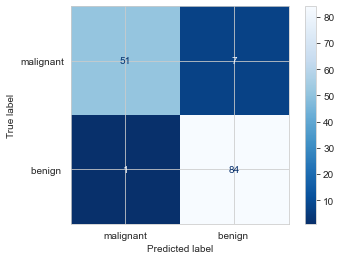

In [10]:
print('accuracy_score:',accuracy_score(scv_poly_predict,yTest)*100,
      '\nclassification_report:\n',classification_report(scv_poly_predict,yTest),
     '\nconfusion_matrix:\n',confusion_matrix(scv_poly_predict,yTest))
mat_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(scv_poly_predict,yTest),display_labels=diag)
mat_disp.plot(cmap=plt.cm.Blues_r)

accuracy_score: 93.00699300699301 
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.95      0.95      0.95        91

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143
 
confusion_matrix:
 [[47  5]
 [ 5 86]]


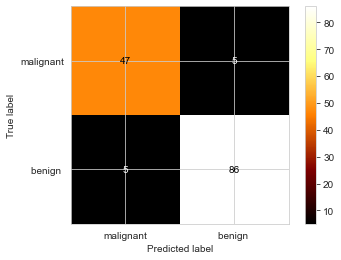

In [11]:
print('accuracy_score:',accuracy_score(scv_linear_predict,yTest)*100,
      '\nclassification_report:\n',classification_report(scv_linear_predict,yTest),
     '\nconfusion_matrix:\n',confusion_matrix(scv_linear_predict,yTest))
mat_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(scv_linear_predict,yTest),display_labels=diag)
mat_disp.plot(cmap=plt.cm.afmhot)

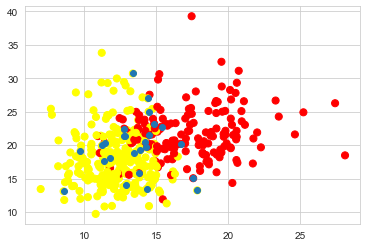

In [12]:
plt.scatter(xTrain.iloc[:, 0], xTrain.iloc[:,1], c=yTrain, s=50, cmap='autumn')
plt.scatter(svc_model_poly.support_vectors_[:,0],svc_model_poly.support_vectors_[:,1])
plt.show()

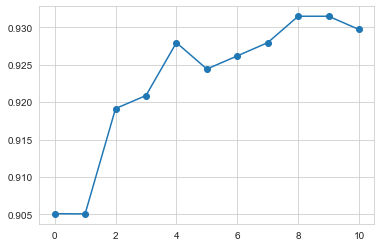

In [14]:
#using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
scores = []

for k in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y)
    scores.append(np.mean(score))
    
plt.plot(scores,marker='o')

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(xTrain,yTrain)
knn_y_predict = knn_model.predict(xTest)

accuracy_score: 93.7062937062937 
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.97      0.94      0.95        94

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143
 
confusion_matrix:
 [[46  3]
 [ 6 88]]


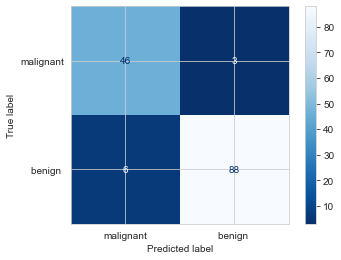

In [16]:
print('accuracy_score:',accuracy_score(knn_y_predict,yTest)*100,
      '\nclassification_report:\n',classification_report(knn_y_predict,yTest),
     '\nconfusion_matrix:\n',confusion_matrix(knn_y_predict,yTest))
mat_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(knn_y_predict,yTest),display_labels=diag)
mat_disp.plot(cmap=plt.cm.Blues_r)

In [17]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=5,min_samples_leaf=7)

In [18]:
dtc_model.fit(xTrain,yTrain)
dtc_y_predict = dtc_model.predict(xTest)

accuracy_score: 92.3076923076923 
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.95      0.93      0.94        92

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143
 
confusion_matrix:
 [[46  5]
 [ 6 86]]


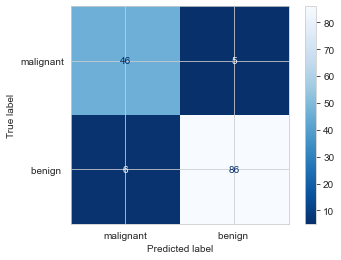

In [19]:
print('accuracy_score:',accuracy_score(dtc_y_predict,yTest)*100,
      '\nclassification_report:\n',classification_report(dtc_y_predict,yTest),
     '\nconfusion_matrix:\n',confusion_matrix(dtc_y_predict,yTest))
mat_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(dtc_y_predict,yTest),display_labels=diag)
mat_disp.plot(cmap=plt.cm.Blues_r)

In [20]:
from sklearn import tree
tree_ = tree.export_text(dtc_model)
print(tree_)


|--- feature_27 <= 0.14
|   |--- feature_22 <= 107.75
|   |   |--- feature_18 <= 0.02
|   |   |   |--- feature_11 <= 1.37
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  1.37
|   |   |   |   |--- class: 1
|   |   |--- feature_18 >  0.02
|   |   |   |--- class: 1
|   |--- feature_22 >  107.75
|   |   |--- feature_21 <= 19.91
|   |   |   |--- class: 1
|   |   |--- feature_21 >  19.91
|   |   |   |--- feature_10 <= 0.38
|   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  0.38
|   |   |   |   |--- class: 0
|--- feature_27 >  0.14
|   |--- feature_13 <= 21.93
|   |   |--- feature_1 <= 18.79
|   |   |   |--- class: 1
|   |   |--- feature_1 >  18.79
|   |   |   |--- class: 0
|   |--- feature_13 >  21.93
|   |   |--- feature_4 <= 0.09
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.09
|   |   |   |--- class: 0



Since it is a Binary Classification Using SVM is the 1st choice and by using poly kernel the output is perfect with Accuracy of 94.4% (also scaling is not required and there are no distance values between the columns) Followed by SVM using KNN with n-neighbors = 8 found using cross-Validation method got an accuracy of 93.7% and by using Decision Tree classifier the accuracy is 92.3% with tree depth of 5 Over all SVM and KNN have good outcome for the model with high accuracy and high precession